In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class MLP:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activations=None, weights=None, biases=None):
        if activations is None:
            self.activations = ["sigmoid"] * (len(hidden_layer_sizes)) + ["linear"]
        else:
            self.activations = activations
        if weights is None:
            self.weights = [np.random.randn(input_size, hidden_layer_sizes[0])]
            self.weights += [np.random.randn(hidden_layer_sizes[i], hidden_layer_sizes[i+1]) for i in range(len(hidden_layer_sizes)-1)]
            self.weights += [(np.random.randn(hidden_layer_sizes[-1], output_size))]
        else:
            self.weights = [np.array(layer) for layer in weights]
        if biases is None:
            self.biases = [np.random.randn(size) for size in hidden_layer_sizes]
            self.biases+= [(np.random.randn(output_size))]
        else:
            self.biases = biases
            
        self.activation_functions = {
            "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
            "linear": lambda x: x,
            "relu": lambda x: np.maximum(0, x)
        }
            
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
            

    def forward(self, x):
        activations = [x]
        for i in range(len(self.weights)):
            x = self.activation_functions[self.activations[i]](np.dot(x, self.weights[i]) + self.biases[i])
            activations.append(x)
        return activations
        
    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.forward(x)[-1])
        return np.array(predictions)
        
    def mse(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def backward(self, X, y, learning_rate):
        activations = self.forward(X)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y.reshape(-1, 1)
        for i in reversed(range(len(deltas) - 1)):
            if self.activations[i] == "sigmoid":
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * (activations[i+1] * (1 - activations[i+1]))
            elif self.activations[i] == "linear":
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T)
            elif self.activations[i] == "relu":
                deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * (activations[i+1] > 0)

        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, deltas[i])
            self.biases[i] -= learning_rate * np.mean(deltas[i], axis=0)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = self.mse(X, y)
                print(f"Epoch {epoch}: Loss = {loss}")

In [23]:
import pandas as pd
square_simple_df = pd.read_csv("dane/regression/square-simple-test.csv", index_col=0)
steps_large_df = pd.read_csv("dane/regression/steps-large-test.csv", index_col=0)

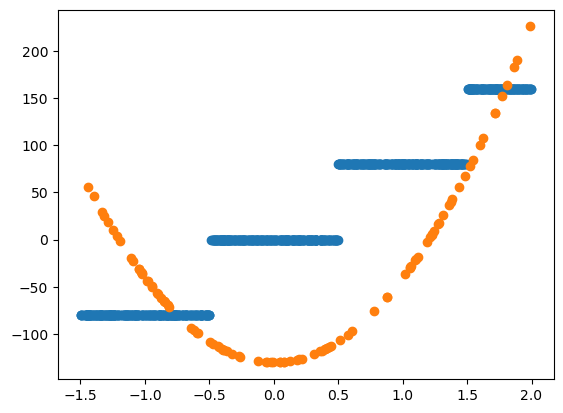

In [24]:
plt.plot(steps_large_df.x, steps_large_df.y, 'o')
plt.plot(square_simple_df.x, square_simple_df.y, 'o')

1 * 5, 

In [66]:
model1 = MLP(input_size=1, hidden_layer_sizes=[5, 5], output_size=1, weights=w, biases=b)

In [67]:
model1.train(square_simple_df.x.to_numpy().reshape(-1, 1), square_simple_df.y.to_numpy().reshape(-1, 1), learning_rate=0.00001, epochs=1000000)

Epoch 0: Loss = 18.864538881798723
Epoch 100: Loss = 18.86400319967501
Epoch 200: Loss = 18.86346755492554
Epoch 300: Loss = 18.862931947544766
Epoch 400: Loss = 18.86239637752696
Epoch 500: Loss = 18.861860844866627
Epoch 600: Loss = 18.861325349558538
Epoch 700: Loss = 18.860789891596163
Epoch 800: Loss = 18.86025447097489
Epoch 900: Loss = 18.85971908768797
Epoch 1000: Loss = 18.859183741730973
Epoch 1100: Loss = 18.858648433096842
Epoch 1200: Loss = 18.858113161780658
Epoch 1300: Loss = 18.857577927776873
Epoch 1400: Loss = 18.85704273107988
Epoch 1500: Loss = 18.856507571684677
Epoch 1600: Loss = 18.855972449584613
Epoch 1700: Loss = 18.855437364774996
Epoch 1800: Loss = 18.854902317250183
Epoch 1900: Loss = 18.854367307004786
Epoch 2000: Loss = 18.853832334032496
Epoch 2100: Loss = 18.853297398327864
Epoch 2200: Loss = 18.85276249988534
Epoch 2300: Loss = 18.852227638699922
Epoch 2400: Loss = 18.851692814766206
Epoch 2500: Loss = 18.851158028077972
Epoch 2600: Loss = 18.850623278

Epoch 22300: Loss = 18.745996795653312
Epoch 22400: Loss = 18.74546931149225
Epoch 22500: Loss = 18.744941863485522
Epoch 22600: Loss = 18.744414451628092
Epoch 22700: Loss = 18.743887075914223
Epoch 22800: Loss = 18.74335973633909
Epoch 22900: Loss = 18.742832432897316
Epoch 23000: Loss = 18.74230516558261
Epoch 23100: Loss = 18.74177793439115
Epoch 23200: Loss = 18.741250739317447
Epoch 23300: Loss = 18.740723580355947
Epoch 23400: Loss = 18.74019645750117
Epoch 23500: Loss = 18.7396693707477
Epoch 23600: Loss = 18.73914232009064
Epoch 23700: Loss = 18.738615305525016
Epoch 23800: Loss = 18.738088327044657
Epoch 23900: Loss = 18.737561384644494
Epoch 24000: Loss = 18.737034478319245
Epoch 24100: Loss = 18.736507608063516
Epoch 24200: Loss = 18.73598077387208
Epoch 24300: Loss = 18.735453975739365
Epoch 24400: Loss = 18.734927213659713
Epoch 24500: Loss = 18.734400487628548
Epoch 24600: Loss = 18.733873797641085
Epoch 24700: Loss = 18.733347143690477
Epoch 24800: Loss = 18.73282052577

Epoch 43600: Loss = 18.634450602127725
Epoch 43700: Loss = 18.633930700424767
Epoch 43800: Loss = 18.633410833767787
Epoch 43900: Loss = 18.632891002151712
Epoch 44000: Loss = 18.63237120557096
Epoch 44100: Loss = 18.631851444020874
Epoch 44200: Loss = 18.631331717496387
Epoch 44300: Loss = 18.630812025991656
Epoch 44400: Loss = 18.63029236950191
Epoch 44500: Loss = 18.629772748022674
Epoch 44600: Loss = 18.629253161549194
Epoch 44700: Loss = 18.6287336100759
Epoch 44800: Loss = 18.6282140935974
Epoch 44900: Loss = 18.62769461210957
Epoch 45000: Loss = 18.627175165606864
Epoch 45100: Loss = 18.626655754084226
Epoch 45200: Loss = 18.62613637753668
Epoch 45300: Loss = 18.62561703595902
Epoch 45400: Loss = 18.62509772934607
Epoch 45500: Loss = 18.62457845769307
Epoch 45600: Loss = 18.624059220994535
Epoch 45700: Loss = 18.623540019245056
Epoch 45800: Loss = 18.623020852440476
Epoch 45900: Loss = 18.622501720574945
Epoch 46000: Loss = 18.621982623644456
Epoch 46100: Loss = 18.6214635616436

Epoch 65500: Loss = 18.521420052708677
Epoch 65600: Loss = 18.520907706887414
Epoch 65700: Loss = 18.520395395027673
Epoch 65800: Loss = 18.519883117124742
Epoch 65900: Loss = 18.51937087317408
Epoch 66000: Loss = 18.518858663170395
Epoch 66100: Loss = 18.518346487109785
Epoch 66200: Loss = 18.51783434498762
Epoch 66300: Loss = 18.5173222367987
Epoch 66400: Loss = 18.51681016253809
Epoch 66500: Loss = 18.516298122200993
Epoch 66600: Loss = 18.51578611578231
Epoch 66700: Loss = 18.515274143277058
Epoch 66800: Loss = 18.514762204680395
Epoch 66900: Loss = 18.51425029998795
Epoch 67000: Loss = 18.51373842919565
Epoch 67100: Loss = 18.513226592297457
Epoch 67200: Loss = 18.51271478928924
Epoch 67300: Loss = 18.512203020166467
Epoch 67400: Loss = 18.511691284924567
Epoch 67500: Loss = 18.51117958355654
Epoch 67600: Loss = 18.51066791605955
Epoch 67700: Loss = 18.510156282427964
Epoch 67800: Loss = 18.50964468265731
Epoch 67900: Loss = 18.50913311674223
Epoch 68000: Loss = 18.508621584678238

Epoch 87200: Loss = 18.411028945913166
Epoch 87300: Loss = 18.41052385874352
Epoch 87400: Loss = 18.410018804515833
Epoch 87500: Loss = 18.40951378322568
Epoch 87600: Loss = 18.40900879486872
Epoch 87700: Loss = 18.40850383944061
Epoch 87800: Loss = 18.40799891693493
Epoch 87900: Loss = 18.407494027350253
Epoch 88000: Loss = 18.406989170679424
Epoch 88100: Loss = 18.40648434691808
Epoch 88200: Loss = 18.405979556062963
Epoch 88300: Loss = 18.405474798109648
Epoch 88400: Loss = 18.404970073052493
Epoch 88500: Loss = 18.40446538088688
Epoch 88600: Loss = 18.403960721608197
Epoch 88700: Loss = 18.403456095211745
Epoch 88800: Loss = 18.40295150169358
Epoch 88900: Loss = 18.402446941049373
Epoch 89000: Loss = 18.401942413274238
Epoch 89100: Loss = 18.401437918363943
Epoch 89200: Loss = 18.400933456313243
Epoch 89300: Loss = 18.400429027117422
Epoch 89400: Loss = 18.399924630772393
Epoch 89500: Loss = 18.399420267273427
Epoch 89600: Loss = 18.398915936615996
Epoch 89700: Loss = 18.3984116387

Epoch 108600: Loss = 18.303683794202392
Epoch 108700: Loss = 18.30318565404308
Epoch 108800: Loss = 18.302687545870764
Epoch 108900: Loss = 18.3021894696811
Epoch 109000: Loss = 18.301691425469247
Epoch 109100: Loss = 18.301193413231214
Epoch 109200: Loss = 18.300695432962296
Epoch 109300: Loss = 18.300197484658423
Epoch 109400: Loss = 18.29969956831538
Epoch 109500: Loss = 18.29920168392908
Epoch 109600: Loss = 18.298703831495708
Epoch 109700: Loss = 18.298206011008254
Epoch 109800: Loss = 18.297708222465353
Epoch 109900: Loss = 18.29721046586138
Epoch 110000: Loss = 18.29671274119108
Epoch 110100: Loss = 18.2962150484515
Epoch 110200: Loss = 18.295717387638042
Epoch 110300: Loss = 18.295219758746605
Epoch 110400: Loss = 18.29472216177227
Epoch 110500: Loss = 18.294224596711
Epoch 110600: Loss = 18.293727063558364
Epoch 110700: Loss = 18.29322956230996
Epoch 110800: Loss = 18.29273209296178
Epoch 110900: Loss = 18.292234655508818
Epoch 111000: Loss = 18.291737249947715
Epoch 111100: L

Epoch 129300: Loss = 18.201244509195003
Epoch 129400: Loss = 18.200752899023644
Epoch 129500: Loss = 18.200261319960614
Epoch 129600: Loss = 18.199769772001208
Epoch 129700: Loss = 18.199278255141316
Epoch 129800: Loss = 18.198786769376667
Epoch 129900: Loss = 18.198295314702893
Epoch 130000: Loss = 18.197803891116266
Epoch 130100: Loss = 18.197312498612366
Epoch 130200: Loss = 18.19682113718658
Epoch 130300: Loss = 18.19632980683562
Epoch 130400: Loss = 18.19583850755529
Epoch 130500: Loss = 18.195347239340997
Epoch 130600: Loss = 18.19485600218907
Epoch 130700: Loss = 18.194364796095087
Epoch 130800: Loss = 18.193873621054856
Epoch 130900: Loss = 18.193382477064908
Epoch 131000: Loss = 18.192891364120825
Epoch 131100: Loss = 18.192400282218642
Epoch 131200: Loss = 18.191909231353858
Epoch 131300: Loss = 18.19141821152247
Epoch 131400: Loss = 18.19092722271991
Epoch 131500: Loss = 18.190436264942615
Epoch 131600: Loss = 18.189945338186483
Epoch 131700: Loss = 18.189454442446944
Epoch 

Epoch 150200: Loss = 18.099168000125786
Epoch 150300: Loss = 18.098682802827906
Epoch 150400: Loss = 18.09819763579307
Epoch 150500: Loss = 18.097712499017096
Epoch 150600: Loss = 18.09722739249444
Epoch 150700: Loss = 18.096742316222027
Epoch 150800: Loss = 18.096257270196926
Epoch 150900: Loss = 18.095772254414104
Epoch 151000: Loss = 18.09528726886934
Epoch 151100: Loss = 18.0948023135593
Epoch 151200: Loss = 18.094317388480054
Epoch 151300: Loss = 18.093832493627534
Epoch 151400: Loss = 18.09334762899778
Epoch 151500: Loss = 18.092862794587052
Epoch 151600: Loss = 18.092377990390784
Epoch 151700: Loss = 18.091893216405882
Epoch 151800: Loss = 18.091408472628164
Epoch 151900: Loss = 18.090923759053833
Epoch 152000: Loss = 18.090439075678727
Epoch 152100: Loss = 18.08995442249956
Epoch 152200: Loss = 18.08946979951123
Epoch 152300: Loss = 18.08898520670954
Epoch 152400: Loss = 18.088500644091447
Epoch 152500: Loss = 18.08801611165258
Epoch 152600: Loss = 18.08753160938954
Epoch 15270

Epoch 172100: Loss = 17.993625447899273
Epoch 172200: Loss = 17.993146785317855
Epoch 172300: Loss = 17.99266815215484
Epoch 172400: Loss = 17.992189548406213
Epoch 172500: Loss = 17.991710974069214
Epoch 172600: Loss = 17.991232429139313
Epoch 172700: Loss = 17.990753913613062
Epoch 172800: Loss = 17.990275427486566
Epoch 172900: Loss = 17.989796970755805
Epoch 173000: Loss = 17.989318543417333
Epoch 173100: Loss = 17.988840145468192
Epoch 173200: Loss = 17.98836177690319
Epoch 173300: Loss = 17.98788343771922
Epoch 173400: Loss = 17.987405127912336
Epoch 173500: Loss = 17.986926847479182
Epoch 173600: Loss = 17.986448596416068
Epoch 173700: Loss = 17.985970374718903
Epoch 173800: Loss = 17.985492182384053
Epoch 173900: Loss = 17.985014019408023
Epoch 174000: Loss = 17.984535885786602
Epoch 174100: Loss = 17.984057781516757
Epoch 174200: Loss = 17.98357970659462
Epoch 174300: Loss = 17.983101661016303
Epoch 174400: Loss = 17.982623644777796
Epoch 174500: Loss = 17.98214565787601
Epoch

Epoch 193000: Loss = 17.894218839661708
Epoch 193100: Loss = 17.89374624513034
Epoch 193200: Loss = 17.893273679250502
Epoch 193300: Loss = 17.89280114201764
Epoch 193400: Loss = 17.892328633428516
Epoch 193500: Loss = 17.89185615347964
Epoch 193600: Loss = 17.891383702167605
Epoch 193700: Loss = 17.890911279488513
Epoch 193800: Loss = 17.890438885438545
Epoch 193900: Loss = 17.88996652001427
Epoch 194000: Loss = 17.889494183212335
Epoch 194100: Loss = 17.889021875029368
Epoch 194200: Loss = 17.888549595461757
Epoch 194300: Loss = 17.888077344505742
Epoch 194400: Loss = 17.88760512215696
Epoch 194500: Loss = 17.887132928412864
Epoch 194600: Loss = 17.886660763269315
Epoch 194700: Loss = 17.886188626722888
Epoch 194800: Loss = 17.885716518769865
Epoch 194900: Loss = 17.885244439408197
Epoch 195000: Loss = 17.884772388633113
Epoch 195100: Loss = 17.884300366440932
Epoch 195200: Loss = 17.883828372828077
Epoch 195300: Loss = 17.883356407790778
Epoch 195400: Loss = 17.882884471325628
Epoch

Epoch 214600: Loss = 17.79279782068545
Epoch 214700: Loss = 17.79233133270304
Epoch 214800: Loss = 17.791864872614397
Epoch 214900: Loss = 17.791398440414902
Epoch 215000: Loss = 17.790932036102532
Epoch 215100: Loss = 17.790465659673004
Epoch 215200: Loss = 17.789999311123417
Epoch 215300: Loss = 17.78953299045023
Epoch 215400: Loss = 17.789066697650295
Epoch 215500: Loss = 17.788600432719623
Epoch 215600: Loss = 17.7881341956554
Epoch 215700: Loss = 17.787667986453506
Epoch 215800: Loss = 17.787201805110257
Epoch 215900: Loss = 17.786735651622163
Epoch 216000: Loss = 17.786269525986125
Epoch 216100: Loss = 17.785803428198957
Epoch 216200: Loss = 17.785337358257287
Epoch 216300: Loss = 17.784871316157293
Epoch 216400: Loss = 17.78440530189551
Epoch 216500: Loss = 17.783939315469382
Epoch 216600: Loss = 17.783473356874957
Epoch 216700: Loss = 17.783007426109144
Epoch 216800: Loss = 17.78254152316855
Epoch 216900: Loss = 17.78207564804947
Epoch 217000: Loss = 17.781609800748594
Epoch 21

Epoch 235300: Loss = 17.696824581684314
Epoch 235400: Loss = 17.696363795576055
Epoch 235500: Loss = 17.69590303666658
Epoch 235600: Loss = 17.69544230495209
Epoch 235700: Loss = 17.694981600429678
Epoch 235800: Loss = 17.694520923096295
Epoch 235900: Loss = 17.69406027294865
Epoch 236000: Loss = 17.693599649983515
Epoch 236100: Loss = 17.693139054197083
Epoch 236200: Loss = 17.692678485585418
Epoch 236300: Loss = 17.692217944146556
Epoch 236400: Loss = 17.6917574298771
Epoch 236500: Loss = 17.691296942774155
Epoch 236600: Loss = 17.69083648283333
Epoch 236700: Loss = 17.690376050051874
Epoch 236800: Loss = 17.68991564442642
Epoch 236900: Loss = 17.689455265954074
Epoch 237000: Loss = 17.688994914630754
Epoch 237100: Loss = 17.688534590454193
Epoch 237200: Loss = 17.68807429342078
Epoch 237300: Loss = 17.68761402352724
Epoch 237400: Loss = 17.687153780769858
Epoch 237500: Loss = 17.686693565145642
Epoch 237600: Loss = 17.686233376651863
Epoch 237700: Loss = 17.685773215284676
Epoch 237

Epoch 257100: Loss = 17.59701100794349
Epoch 257200: Loss = 17.596556074577876
Epoch 257300: Loss = 17.596101167709993
Epoch 257400: Loss = 17.59564628733697
Epoch 257500: Loss = 17.595191433456247
Epoch 257600: Loss = 17.594736606063947
Epoch 257700: Loss = 17.594281805157497
Epoch 257800: Loss = 17.593827030732715
Epoch 257900: Loss = 17.59337228278714
Epoch 258000: Loss = 17.59291756131739
Epoch 258100: Loss = 17.592462866320062
Epoch 258200: Loss = 17.592008197792367
Epoch 258300: Loss = 17.59155355573094
Epoch 258400: Loss = 17.591098940133563
Epoch 258500: Loss = 17.590644350995984
Epoch 258600: Loss = 17.59018978831535
Epoch 258700: Loss = 17.589735252088357
Epoch 258800: Loss = 17.589280742312123
Epoch 258900: Loss = 17.58882625898346
Epoch 259000: Loss = 17.588371802100372
Epoch 259100: Loss = 17.587917371658904
Epoch 259200: Loss = 17.587462967655583
Epoch 259300: Loss = 17.587008590087454
Epoch 259400: Loss = 17.586554238951532
Epoch 259500: Loss = 17.586099914244475
Epoch 2

Epoch 278600: Loss = 17.499804834389423
Epoch 278700: Loss = 17.499355526702374
Epoch 278800: Loss = 17.4989062448516
Epoch 278900: Loss = 17.498456988832558
Epoch 279000: Loss = 17.49800775864251
Epoch 279100: Loss = 17.49755855427961
Epoch 279200: Loss = 17.497109375739743
Epoch 279300: Loss = 17.49666022302013
Epoch 279400: Loss = 17.496211096118383
Epoch 279500: Loss = 17.495761995031042
Epoch 279600: Loss = 17.495312919754596
Epoch 279700: Loss = 17.49486387028626
Epoch 279800: Loss = 17.494414846623155
Epoch 279900: Loss = 17.493965848762286
Epoch 280000: Loss = 17.493516876700447
Epoch 280100: Loss = 17.493067930435316
Epoch 280200: Loss = 17.49261900996304
Epoch 280300: Loss = 17.4921701152812
Epoch 280400: Loss = 17.491721246387115
Epoch 280500: Loss = 17.491272403277424
Epoch 280600: Loss = 17.490823585948256
Epoch 280700: Loss = 17.49037479439693
Epoch 280800: Loss = 17.489926028620275
Epoch 280900: Loss = 17.489477288615987
Epoch 281000: Loss = 17.4890285743806
Epoch 281100

Epoch 300300: Loss = 17.40290552374017
Epoch 300400: Loss = 17.402461752509115
Epoch 300500: Loss = 17.402018006471152
Epoch 300600: Loss = 17.401574285623543
Epoch 300700: Loss = 17.401130589963362
Epoch 300800: Loss = 17.400686919487313
Epoch 300900: Loss = 17.400243274192643
Epoch 301000: Loss = 17.39979965407599
Epoch 301100: Loss = 17.39935605913488
Epoch 301200: Loss = 17.39891248936655
Epoch 301300: Loss = 17.398468944768297
Epoch 301400: Loss = 17.398025425337554
Epoch 301500: Loss = 17.39758193107116
Epoch 301600: Loss = 17.39713846196587
Epoch 301700: Loss = 17.39669501801859
Epoch 301800: Loss = 17.39625159922682
Epoch 301900: Loss = 17.39580820558781
Epoch 302000: Loss = 17.395364837097922
Epoch 302100: Loss = 17.394921493755188
Epoch 302200: Loss = 17.394478175556245
Epoch 302300: Loss = 17.39403488249886
Epoch 302400: Loss = 17.39359161458015
Epoch 302500: Loss = 17.393148371796187
Epoch 302600: Loss = 17.392705154144597
Epoch 302700: Loss = 17.392261961622737
Epoch 30280

Epoch 321100: Loss = 17.31113921656677
Epoch 321200: Loss = 17.310700623818096
Epoch 321300: Loss = 17.310262055669586
Epoch 321400: Loss = 17.30982351211923
Epoch 321500: Loss = 17.309384993163793
Epoch 321600: Loss = 17.308946498801216
Epoch 321700: Loss = 17.30850802902821
Epoch 321800: Loss = 17.308069583842194
Epoch 321900: Loss = 17.30763116324006
Epoch 322000: Loss = 17.30719276721896
Epoch 322100: Loss = 17.30675439577682
Epoch 322200: Loss = 17.306316048910542
Epoch 322300: Loss = 17.305877726616217
Epoch 322400: Loss = 17.30543942889193
Epoch 322500: Loss = 17.30500115573456
Epoch 322600: Loss = 17.304562907141744
Epoch 322700: Loss = 17.304124683111013
Epoch 322800: Loss = 17.303686483638835
Epoch 322900: Loss = 17.30324830872243
Epoch 323000: Loss = 17.302810158359236
Epoch 323100: Loss = 17.30237203254666
Epoch 323200: Loss = 17.301933931281088
Epoch 323300: Loss = 17.30149585456069
Epoch 323400: Loss = 17.301057802382623
Epoch 323500: Loss = 17.30061977474376
Epoch 323600

Epoch 342700: Loss = 17.216969822004067
Epoch 342800: Loss = 17.216536478868854
Epoch 342900: Loss = 17.216103159740882
Epoch 343000: Loss = 17.21566986461814
Epoch 343100: Loss = 17.215236593498155
Epoch 343200: Loss = 17.214803346377927
Epoch 343300: Loss = 17.214370123254668
Epoch 343400: Loss = 17.213936924125015
Epoch 343500: Loss = 17.21350374898658
Epoch 343600: Loss = 17.213070597836897
Epoch 343700: Loss = 17.212637470673418
Epoch 343800: Loss = 17.21220436749275
Epoch 343900: Loss = 17.211771288292837
Epoch 344000: Loss = 17.211338233071057
Epoch 344100: Loss = 17.2109052018244
Epoch 344200: Loss = 17.210472194550103
Epoch 344300: Loss = 17.21003921124604
Epoch 344400: Loss = 17.209606251909292
Epoch 344500: Loss = 17.20917331653724
Epoch 344600: Loss = 17.208740405127436
Epoch 344700: Loss = 17.208307517677127
Epoch 344800: Loss = 17.207874654183534
Epoch 344900: Loss = 17.2074418146442
Epoch 345000: Loss = 17.207008999055724
Epoch 345100: Loss = 17.206576207415964
Epoch 345

Epoch 364000: Loss = 17.12520553607871
Epoch 364100: Loss = 17.124777246419107
Epoch 364200: Loss = 17.1243489802035
Epoch 364300: Loss = 17.123920737428705
Epoch 364400: Loss = 17.12349251809246
Epoch 364500: Loss = 17.12306432219183
Epoch 364600: Loss = 17.122636149723952
Epoch 364700: Loss = 17.1222080006865
Epoch 364800: Loss = 17.12177987507716
Epoch 364900: Loss = 17.121351772893355
Epoch 365000: Loss = 17.12092369413212
Epoch 365100: Loss = 17.1204956387913
Epoch 365200: Loss = 17.120067606868016
Epoch 365300: Loss = 17.11963959835921
Epoch 365400: Loss = 17.119211613263126
Epoch 365500: Loss = 17.1187836515768
Epoch 365600: Loss = 17.11835571329717
Epoch 365700: Loss = 17.11792779842227
Epoch 365800: Loss = 17.117499906949266
Epoch 365900: Loss = 17.1170720388753
Epoch 366000: Loss = 17.11664419419765
Epoch 366100: Loss = 17.116216372913613
Epoch 366200: Loss = 17.11578857502085
Epoch 366300: Loss = 17.115360800517408
Epoch 366400: Loss = 17.114933049399657
Epoch 366500: Loss =

Epoch 385900: Loss = 17.031965262032546
Epoch 386000: Loss = 17.031542045045036
Epoch 386100: Loss = 17.031118850940445
Epoch 386200: Loss = 17.030695679715944
Epoch 386300: Loss = 17.030272531369352
Epoch 386400: Loss = 17.029849405898002
Epoch 386500: Loss = 17.029426303300337
Epoch 386600: Loss = 17.029003223572865
Epoch 386700: Loss = 17.028580166713525
Epoch 386800: Loss = 17.02815713271987
Epoch 386900: Loss = 17.027734121589493
Epoch 387000: Loss = 17.02731113331947
Epoch 387100: Loss = 17.026888167906932
Epoch 387200: Loss = 17.026465225349604
Epoch 387300: Loss = 17.026042305645603
Epoch 387400: Loss = 17.025619408791403
Epoch 387500: Loss = 17.0251965347845
Epoch 387600: Loss = 17.024773683623067
Epoch 387700: Loss = 17.02435085530433
Epoch 387800: Loss = 17.023928049825376
Epoch 387900: Loss = 17.02350526718463
Epoch 388000: Loss = 17.02308250737938
Epoch 388100: Loss = 17.022659770406847
Epoch 388200: Loss = 17.022237056264565
Epoch 388300: Loss = 17.021814364950256
Epoch 3

Epoch 407600: Loss = 16.940659270753656
Epoch 407700: Loss = 16.940240961058972
Epoch 407800: Loss = 16.93982267371009
Epoch 407900: Loss = 16.939404408705197
Epoch 408000: Loss = 16.938986166041264
Epoch 408100: Loss = 16.938567945716233
Epoch 408200: Loss = 16.93814974772804
Epoch 408300: Loss = 16.937731572073268
Epoch 408400: Loss = 16.93731341874969
Epoch 408500: Loss = 16.936895287754577
Epoch 408600: Loss = 16.9364771790857
Epoch 408700: Loss = 16.936059092741072
Epoch 408800: Loss = 16.935641028717967
Epoch 408900: Loss = 16.935222987013983
Epoch 409000: Loss = 16.934804967627134
Epoch 409100: Loss = 16.934386970554478
Epoch 409200: Loss = 16.933968995793997
Epoch 409300: Loss = 16.933551043343126
Epoch 409400: Loss = 16.93313311319943
Epoch 409500: Loss = 16.93271520536112
Epoch 409600: Loss = 16.932297319824798
Epoch 409700: Loss = 16.931879456588316
Epoch 409800: Loss = 16.931461615649226
Epoch 409900: Loss = 16.93104379700475
Epoch 410000: Loss = 16.93062600065249
Epoch 410

Epoch 428800: Loss = 16.85247362312389
Epoch 428900: Loss = 16.852059996879134
Epoch 429000: Loss = 16.851646392471775
Epoch 429100: Loss = 16.851232809899955
Epoch 429200: Loss = 16.850819249161276
Epoch 429300: Loss = 16.85040571025295
Epoch 429400: Loss = 16.849992193172994
Epoch 429500: Loss = 16.849578697920073
Epoch 429600: Loss = 16.84916522449021
Epoch 429700: Loss = 16.848751772883194
Epoch 429800: Loss = 16.848338343093825
Epoch 429900: Loss = 16.8479249351216
Epoch 430000: Loss = 16.84751154896348
Epoch 430100: Loss = 16.847098184616424
Epoch 430200: Loss = 16.84668484207807
Epoch 430300: Loss = 16.846271521346647
Epoch 430400: Loss = 16.845858222419068
Epoch 430500: Loss = 16.8454449452945
Epoch 430600: Loss = 16.845031689969762
Epoch 430700: Loss = 16.84461845644299
Epoch 430800: Loss = 16.844205244711894
Epoch 430900: Loss = 16.84379205477334
Epoch 431000: Loss = 16.843378886625167
Epoch 431100: Loss = 16.842965740265303
Epoch 431200: Loss = 16.84255261569107
Epoch 431300

Epoch 450500: Loss = 16.763224581213173
Epoch 450600: Loss = 16.762815638977372
Epoch 450700: Loss = 16.76240671807504
Epoch 450800: Loss = 16.761997818502763
Epoch 450900: Loss = 16.761588940259436
Epoch 451000: Loss = 16.761180083343124
Epoch 451100: Loss = 16.760771247750366
Epoch 451200: Loss = 16.76036243347941
Epoch 451300: Loss = 16.759953640527648
Epoch 451400: Loss = 16.759544868892718
Epoch 451500: Loss = 16.75913611857249
Epoch 451600: Loss = 16.75872738956473
Epoch 451700: Loss = 16.758318681867742
Epoch 451800: Loss = 16.757909995478368
Epoch 451900: Loss = 16.757501330394618
Epoch 452000: Loss = 16.75709268661442
Epoch 452100: Loss = 16.756684064135346
Epoch 452200: Loss = 16.756275462955333
Epoch 452300: Loss = 16.75586688307197
Epoch 452400: Loss = 16.75545832448271
Epoch 452500: Loss = 16.75504978718561
Epoch 452600: Loss = 16.754641271177615
Epoch 452700: Loss = 16.754232776456856
Epoch 452800: Loss = 16.75382430302129
Epoch 452900: Loss = 16.753415850869285
Epoch 453

Epoch 472000: Loss = 16.675789054097194
Epoch 472100: Loss = 16.675384646288443
Epoch 472200: Loss = 16.67498025932752
Epoch 472300: Loss = 16.67457589321185
Epoch 472400: Loss = 16.67417154793921
Epoch 472500: Loss = 16.67376722350715
Epoch 472600: Loss = 16.673362919914148
Epoch 472700: Loss = 16.67295863715735
Epoch 472800: Loss = 16.67255437523497
Epoch 472900: Loss = 16.67215013414494
Epoch 473000: Loss = 16.671745913884493
Epoch 473100: Loss = 16.671341714451366
Epoch 473200: Loss = 16.670937535843883
Epoch 473300: Loss = 16.670533378059787
Epoch 473400: Loss = 16.67012924109668
Epoch 473500: Loss = 16.66972512495263
Epoch 473600: Loss = 16.669321029625358
Epoch 473700: Loss = 16.668916955112245
Epoch 473800: Loss = 16.66851290141132
Epoch 473900: Loss = 16.66810886852066
Epoch 474000: Loss = 16.667704856438
Epoch 474100: Loss = 16.667300865160986
Epoch 474200: Loss = 16.666896894686897
Epoch 474300: Loss = 16.666492945014095
Epoch 474400: Loss = 16.666089016140255
Epoch 474500: 

Epoch 493500: Loss = 16.589317366732953
Epoch 493600: Loss = 16.58891739045641
Epoch 493700: Loss = 16.58851743455599
Epoch 493800: Loss = 16.588117499029078
Epoch 493900: Loss = 16.587717583874053
Epoch 494000: Loss = 16.587317689088295
Epoch 494100: Loss = 16.586917814669395
Epoch 494200: Loss = 16.586517960615495
Epoch 494300: Loss = 16.586118126925452
Epoch 494400: Loss = 16.585718313595994
Epoch 494500: Loss = 16.58531852062488
Epoch 494600: Loss = 16.584918748010203
Epoch 494700: Loss = 16.58451899574949
Epoch 494800: Loss = 16.5841192638409
Epoch 494900: Loss = 16.583719552281693
Epoch 495000: Loss = 16.583319861070294
Epoch 495100: Loss = 16.582920190205076
Epoch 495200: Loss = 16.582520539683102
Epoch 495300: Loss = 16.582120909502795
Epoch 495400: Loss = 16.581721299661602
Epoch 495500: Loss = 16.58132171015693
Epoch 495600: Loss = 16.580922140987266
Epoch 495700: Loss = 16.580522592149332
Epoch 495800: Loss = 16.580123063641775
Epoch 495900: Loss = 16.57972355546273
Epoch 49

Epoch 514700: Loss = 16.504974756428552
Epoch 514800: Loss = 16.504579051852165
Epoch 514900: Loss = 16.50418336719857
Epoch 515000: Loss = 16.50378770246571
Epoch 515100: Loss = 16.503392057651325
Epoch 515200: Loss = 16.502996432754394
Epoch 515300: Loss = 16.50260082777193
Epoch 515400: Loss = 16.502205242701915
Epoch 515500: Loss = 16.501809677542674
Epoch 515600: Loss = 16.501414132291618
Epoch 515700: Loss = 16.501018606946904
Epoch 515800: Loss = 16.500623101506577
Epoch 515900: Loss = 16.500227615968164
Epoch 516000: Loss = 16.49983215032989
Epoch 516100: Loss = 16.499436704589744
Epoch 516200: Loss = 16.499041278744997
Epoch 516300: Loss = 16.498645872793976
Epoch 516400: Loss = 16.49825048673461
Epoch 516500: Loss = 16.49785512056453
Epoch 516600: Loss = 16.49745977428177
Epoch 516700: Loss = 16.497064447883755
Epoch 516800: Loss = 16.496669141369125
Epoch 516900: Loss = 16.4962738547354
Epoch 517000: Loss = 16.495878587980773
Epoch 517100: Loss = 16.495483341102407
Epoch 517

Epoch 536400: Loss = 16.419570263369426
Epoch 536500: Loss = 16.419178833130943
Epoch 536600: Loss = 16.41878742236447
Epoch 536700: Loss = 16.418396031067484
Epoch 536800: Loss = 16.418004659238076
Epoch 536900: Loss = 16.417613306873985
Epoch 537000: Loss = 16.417221973973227
Epoch 537100: Loss = 16.416830660533936
Epoch 537200: Loss = 16.416439366553497
Epoch 537300: Loss = 16.41604809203022
Epoch 537400: Loss = 16.415656836961833
Epoch 537500: Loss = 16.415265601346686
Epoch 537600: Loss = 16.414874385182653
Epoch 537700: Loss = 16.414483188467965
Epoch 537800: Loss = 16.41409201120043
Epoch 537900: Loss = 16.413700853378085
Epoch 538000: Loss = 16.41330971499916
Epoch 538100: Loss = 16.412918596060795
Epoch 538200: Loss = 16.412527496561708
Epoch 538300: Loss = 16.412136416499827
Epoch 538400: Loss = 16.411745355872995
Epoch 538500: Loss = 16.411354314678523
Epoch 538600: Loss = 16.41096329291416
Epoch 538700: Loss = 16.410572290577775
Epoch 538800: Loss = 16.410181307668413
Epoch

Epoch 557400: Loss = 16.33779411356216
Epoch 557500: Loss = 16.337406727677156
Epoch 557600: Loss = 16.337019360837647
Epoch 557700: Loss = 16.336632013042095
Epoch 557800: Loss = 16.336244684288012
Epoch 557900: Loss = 16.33585737457305
Epoch 558000: Loss = 16.335470083895792
Epoch 558100: Loss = 16.33508281225478
Epoch 558200: Loss = 16.334695559647596
Epoch 558300: Loss = 16.33430832607238
Epoch 558400: Loss = 16.333921111526696
Epoch 558500: Loss = 16.333533916008992
Epoch 558600: Loss = 16.333146739516526
Epoch 558700: Loss = 16.332759582048002
Epoch 558800: Loss = 16.3323724436008
Epoch 558900: Loss = 16.331985324173676
Epoch 559000: Loss = 16.33159822376471
Epoch 559100: Loss = 16.331211142371558
Epoch 559200: Loss = 16.330824079992144
Epoch 559300: Loss = 16.330437036624073
Epoch 559400: Loss = 16.33005001226613
Epoch 559500: Loss = 16.329663006915904
Epoch 559600: Loss = 16.329276020571662
Epoch 559700: Loss = 16.328889053230476
Epoch 559800: Loss = 16.32850210489127
Epoch 559

Epoch 578800: Loss = 16.25532439799862
Epoch 578900: Loss = 16.25494104260511
Epoch 579000: Loss = 16.254557705833918
Epoch 579100: Loss = 16.25417438768264
Epoch 579200: Loss = 16.253791088149363
Epoch 579300: Loss = 16.2534078072323
Epoch 579400: Loss = 16.253024544930067
Epoch 579500: Loss = 16.25264130123999
Epoch 579600: Loss = 16.252258076159695
Epoch 579700: Loss = 16.251874869687867
Epoch 579800: Loss = 16.251491681822404
Epoch 579900: Loss = 16.251108512561917
Epoch 580000: Loss = 16.2507253619038
Epoch 580100: Loss = 16.25034222984575
Epoch 580200: Loss = 16.249959116386275
Epoch 580300: Loss = 16.249576021524092
Epoch 580400: Loss = 16.24919294525655
Epoch 580500: Loss = 16.24880988758268
Epoch 580600: Loss = 16.248426848499317
Epoch 580700: Loss = 16.2480438280046
Epoch 580800: Loss = 16.247660826097107
Epoch 580900: Loss = 16.247277842773823
Epoch 581000: Loss = 16.246894878035217
Epoch 581100: Loss = 16.246511931877457
Epoch 581200: Loss = 16.246129004298872
Epoch 581300:

Epoch 600100: Loss = 16.174087062856557
Epoch 600200: Loss = 16.173707630174466
Epoch 600300: Loss = 16.173328215702867
Epoch 600400: Loss = 16.172948819439572
Epoch 600500: Loss = 16.172569441382958
Epoch 600600: Loss = 16.17219008153073
Epoch 600700: Loss = 16.17181073988143
Epoch 600800: Loss = 16.171431416433123
Epoch 600900: Loss = 16.171052111183823
Epoch 601000: Loss = 16.170672824131973
Epoch 601100: Loss = 16.17029355527502
Epoch 601200: Loss = 16.16991430461177
Epoch 601300: Loss = 16.16953507214041
Epoch 601400: Loss = 16.169155857858037
Epoch 601500: Loss = 16.16877666176408
Epoch 601600: Loss = 16.1683974838554
Epoch 601700: Loss = 16.168018324130095
Epoch 601800: Loss = 16.167639182586516
Epoch 601900: Loss = 16.167260059222826
Epoch 602000: Loss = 16.16688095403628
Epoch 602100: Loss = 16.16650186702634
Epoch 602200: Loss = 16.16612279819035
Epoch 602300: Loss = 16.16574374752677
Epoch 602400: Loss = 16.16536471503383
Epoch 602500: Loss = 16.16498570071026
Epoch 602600: 

Epoch 621900: Loss = 16.091798236908147
Epoch 622000: Loss = 16.091422729284794
Epoch 622100: Loss = 16.091047239460583
Epoch 622200: Loss = 16.09067176743343
Epoch 622300: Loss = 16.090296313201346
Epoch 622400: Loss = 16.089920876762548
Epoch 622500: Loss = 16.089545458115477
Epoch 622600: Loss = 16.08917005725764
Epoch 622700: Loss = 16.088794674187724
Epoch 622800: Loss = 16.088419308903735
Epoch 622900: Loss = 16.088043961403997
Epoch 623000: Loss = 16.087668631685833
Epoch 623100: Loss = 16.08729331974808
Epoch 623200: Loss = 16.086918025588844
Epoch 623300: Loss = 16.08654274920591
Epoch 623400: Loss = 16.086167490597656
Epoch 623500: Loss = 16.08579224976187
Epoch 623600: Loss = 16.085417026697115
Epoch 623700: Loss = 16.085041821401386
Epoch 623800: Loss = 16.08466663387275
Epoch 623900: Loss = 16.084291464109242
Epoch 624000: Loss = 16.08391631210966
Epoch 624100: Loss = 16.08354117787218
Epoch 624200: Loss = 16.083166061394238
Epoch 624300: Loss = 16.08279096267395
Epoch 624

Epoch 643300: Loss = 16.011842272560557
Epoch 643400: Loss = 16.011470531698183
Epoch 643500: Loss = 16.01109880824091
Epoch 643600: Loss = 16.01072710218607
Epoch 643700: Loss = 16.010355413531844
Epoch 643800: Loss = 16.009983742276194
Epoch 643900: Loss = 16.00961208841771
Epoch 644000: Loss = 16.00924045195412
Epoch 644100: Loss = 16.008868832883124
Epoch 644200: Loss = 16.008497231203748
Epoch 644300: Loss = 16.008125646913864
Epoch 644400: Loss = 16.007754080011363
Epoch 644500: Loss = 16.007382530494933
Epoch 644600: Loss = 16.00701099836238
Epoch 644700: Loss = 16.006639483611824
Epoch 644800: Loss = 16.00626798624261
Epoch 644900: Loss = 16.005896506251723
Epoch 645000: Loss = 16.005525043637117
Epoch 645100: Loss = 16.00515359839764
Epoch 645200: Loss = 16.004782170531097
Epoch 645300: Loss = 16.00441076003566
Epoch 645400: Loss = 16.004039366909627
Epoch 645500: Loss = 16.003667991151527
Epoch 645600: Loss = 16.003296632759206
Epoch 645700: Loss = 16.002925291730566
Epoch 64

Epoch 665100: Loss = 15.931211333545107
Epoch 665200: Loss = 15.930843343937497
Epoch 665300: Loss = 15.930475371340892
Epoch 665400: Loss = 15.930107415753037
Epoch 665500: Loss = 15.929739477171967
Epoch 665600: Loss = 15.929371555596397
Epoch 665700: Loss = 15.929003651024477
Epoch 665800: Loss = 15.928635763454055
Epoch 665900: Loss = 15.928267892883767
Epoch 666000: Loss = 15.92790003931206
Epoch 666100: Loss = 15.927532202736344
Epoch 666200: Loss = 15.927164383155466
Epoch 666300: Loss = 15.926796580568169
Epoch 666400: Loss = 15.926428794971443
Epoch 666500: Loss = 15.926061026364707
Epoch 666600: Loss = 15.925693274745338
Epoch 666700: Loss = 15.925325540111738
Epoch 666800: Loss = 15.924957822461572
Epoch 666900: Loss = 15.924590121794317
Epoch 667000: Loss = 15.92422243810797
Epoch 667100: Loss = 15.923854771400391
Epoch 667200: Loss = 15.923487121669844
Epoch 667300: Loss = 15.92311948891508
Epoch 667400: Loss = 15.92275187313305
Epoch 667500: Loss = 15.922384274322287
Epoc

Epoch 686800: Loss = 15.851753272397557
Epoch 686900: Loss = 15.851388932614222
Epoch 687000: Loss = 15.851024609458655
Epoch 687100: Loss = 15.850660302928818
Epoch 687200: Loss = 15.850296013022929
Epoch 687300: Loss = 15.849931739739903
Epoch 687400: Loss = 15.849567483077779
Epoch 687500: Loss = 15.849203243034383
Epoch 687600: Loss = 15.848839019608265
Epoch 687700: Loss = 15.848474812797628
Epoch 687800: Loss = 15.848110622600974
Epoch 687900: Loss = 15.84774644901633
Epoch 688000: Loss = 15.847382292042075
Epoch 688100: Loss = 15.847018151676753
Epoch 688200: Loss = 15.846654027918225
Epoch 688300: Loss = 15.84628992076514
Epoch 688400: Loss = 15.845925830215798
Epoch 688500: Loss = 15.845561756267921
Epoch 688600: Loss = 15.845197698920419
Epoch 688700: Loss = 15.844833658171233
Epoch 688800: Loss = 15.844469634017912
Epoch 688900: Loss = 15.84410562645882
Epoch 689000: Loss = 15.843741635492922
Epoch 689100: Loss = 15.843377661118415
Epoch 689200: Loss = 15.843013703333416
Epo

Epoch 708000: Loss = 15.774882417432018
Epoch 708100: Loss = 15.774521563978107
Epoch 708200: Loss = 15.77416072678589
Epoch 708300: Loss = 15.773799905853153
Epoch 708400: Loss = 15.77343910117874
Epoch 708500: Loss = 15.773078312760246
Epoch 708600: Loss = 15.772717540596739
Epoch 708700: Loss = 15.77235678468657
Epoch 708800: Loss = 15.771996045028239
Epoch 708900: Loss = 15.77163532161967
Epoch 709000: Loss = 15.77127461445935
Epoch 709100: Loss = 15.770913923545207
Epoch 709200: Loss = 15.77055324887524
Epoch 709300: Loss = 15.770192590448348
Epoch 709400: Loss = 15.769831948262336
Epoch 709500: Loss = 15.769471322316269
Epoch 709600: Loss = 15.769110712607908
Epoch 709700: Loss = 15.768750119135113
Epoch 709800: Loss = 15.768389541896525
Epoch 709900: Loss = 15.768028980890977
Epoch 710000: Loss = 15.767668436116066
Epoch 710100: Loss = 15.767307907571082
Epoch 710200: Loss = 15.766947395252858
Epoch 710300: Loss = 15.766586899160709
Epoch 710400: Loss = 15.76622641929275
Epoch 7

Epoch 728700: Loss = 15.700529989807817
Epoch 728800: Loss = 15.700172466324666
Epoch 728900: Loss = 15.699814958752839
Epoch 729000: Loss = 15.699457467091145
Epoch 729100: Loss = 15.699099991337675
Epoch 729200: Loss = 15.698742531490943
Epoch 729300: Loss = 15.698385087548914
Epoch 729400: Loss = 15.698027659510434
Epoch 729500: Loss = 15.697670247373198
Epoch 729600: Loss = 15.697312851136179
Epoch 729700: Loss = 15.69695547079714
Epoch 729800: Loss = 15.696598106354285
Epoch 729900: Loss = 15.696240757806224
Epoch 730000: Loss = 15.695883425151191
Epoch 730100: Loss = 15.695526108387616
Epoch 730200: Loss = 15.695168807513806
Epoch 730300: Loss = 15.694811522527973
Epoch 730400: Loss = 15.694454253427905
Epoch 730500: Loss = 15.694097000212851
Epoch 730600: Loss = 15.693739762881322
Epoch 730700: Loss = 15.69338254143053
Epoch 730800: Loss = 15.693025335858941
Epoch 730900: Loss = 15.692668146165463
Epoch 731000: Loss = 15.692310972348002
Epoch 731100: Loss = 15.691953814405384
Ep

Epoch 750100: Loss = 15.624379920274018
Epoch 750200: Loss = 15.624025763952577
Epoch 750300: Loss = 15.623671623187624
Epoch 750400: Loss = 15.623317497977846
Epoch 750500: Loss = 15.622963388321741
Epoch 750600: Loss = 15.622609294217138
Epoch 750700: Loss = 15.622255215662978
Epoch 750800: Loss = 15.621901152657781
Epoch 750900: Loss = 15.621547105199046
Epoch 751000: Loss = 15.621193073285568
Epoch 751100: Loss = 15.62083905691603
Epoch 751200: Loss = 15.620485056089047
Epoch 751300: Loss = 15.620131070802518
Epoch 751400: Loss = 15.619777101054684
Epoch 751500: Loss = 15.619423146844522
Epoch 751600: Loss = 15.619069208169584
Epoch 751700: Loss = 15.61871528502777
Epoch 751800: Loss = 15.618361377418342
Epoch 751900: Loss = 15.618007485340115
Epoch 752000: Loss = 15.617653608791827
Epoch 752100: Loss = 15.617299747770865
Epoch 752200: Loss = 15.616945902276022
Epoch 752300: Loss = 15.616592072305107
Epoch 752400: Loss = 15.616238257855947
Epoch 752500: Loss = 15.615884458928322
Ep

Epoch 771000: Loss = 15.550696947054725
Epoch 771100: Loss = 15.550346006726704
Epoch 771200: Loss = 15.549995081616123
Epoch 771300: Loss = 15.549644171721308
Epoch 771400: Loss = 15.549293277041494
Epoch 771500: Loss = 15.548942397575097
Epoch 771600: Loss = 15.548591533319975
Epoch 771700: Loss = 15.548240684274145
Epoch 771800: Loss = 15.547889850436412
Epoch 771900: Loss = 15.547539031804858
Epoch 772000: Loss = 15.547188228378891
Epoch 772100: Loss = 15.54683744015589
Epoch 772200: Loss = 15.546486667134436
Epoch 772300: Loss = 15.546135909313398
Epoch 772400: Loss = 15.545785166690749
Epoch 772500: Loss = 15.545434439264666
Epoch 772600: Loss = 15.545083727033477
Epoch 772700: Loss = 15.544733029995646
Epoch 772800: Loss = 15.544382348150075
Epoch 772900: Loss = 15.54403168149549
Epoch 773000: Loss = 15.54368103002973
Epoch 773100: Loss = 15.543330393751415
Epoch 773200: Loss = 15.542979772659134
Epoch 773300: Loss = 15.54262916675092
Epoch 773400: Loss = 15.54227857602496
Epoch

Epoch 792600: Loss = 15.475244544825816
Epoch 792700: Loss = 15.474896854486165
Epoch 792800: Loss = 15.474549179020496
Epoch 792900: Loss = 15.474201518427874
Epoch 793000: Loss = 15.473853872706579
Epoch 793100: Loss = 15.47350624185537
Epoch 793200: Loss = 15.473158625872001
Epoch 793300: Loss = 15.472811024755071
Epoch 793400: Loss = 15.472463438503077
Epoch 793500: Loss = 15.47211586711523
Epoch 793600: Loss = 15.471768310589745
Epoch 793700: Loss = 15.471420768924522
Epoch 793800: Loss = 15.47107324211788
Epoch 793900: Loss = 15.470725730167903
Epoch 794000: Loss = 15.470378233073104
Epoch 794100: Loss = 15.470030750831766
Epoch 794200: Loss = 15.469683283443068
Epoch 794300: Loss = 15.469335830905182
Epoch 794400: Loss = 15.46898839321638
Epoch 794500: Loss = 15.46864097037585
Epoch 794600: Loss = 15.468293562381415
Epoch 794700: Loss = 15.467946169231261
Epoch 794800: Loss = 15.467598790923788
Epoch 794900: Loss = 15.467251427457409
Epoch 795000: Loss = 15.466904078831186
Epoch

Epoch 813600: Loss = 15.40255361191141
Epoch 813700: Loss = 15.402209010923674
Epoch 813800: Loss = 15.401864424483927
Epoch 813900: Loss = 15.401519852590427
Epoch 814000: Loss = 15.401175295241865
Epoch 814100: Loss = 15.400830752435905
Epoch 814200: Loss = 15.400486224170965
Epoch 814300: Loss = 15.400141710445912
Epoch 814400: Loss = 15.399797211259138
Epoch 814500: Loss = 15.399452726609443
Epoch 814600: Loss = 15.399108256495154
Epoch 814700: Loss = 15.398763800914319
Epoch 814800: Loss = 15.398419359865404
Epoch 814900: Loss = 15.39807493334776
Epoch 815000: Loss = 15.39773052135892
Epoch 815100: Loss = 15.397386123897896
Epoch 815200: Loss = 15.397041740963061
Epoch 815300: Loss = 15.396697372552705
Epoch 815400: Loss = 15.3963530186653
Epoch 815500: Loss = 15.396008679298541
Epoch 815600: Loss = 15.395664354451142
Epoch 815700: Loss = 15.395320044121725
Epoch 815800: Loss = 15.394975748308717
Epoch 815900: Loss = 15.394631467011529
Epoch 816000: Loss = 15.394287200227687
Epoch

Epoch 834400: Loss = 15.331187521564846
Epoch 834500: Loss = 15.330845913543534
Epoch 834600: Loss = 15.330504319752386
Epoch 834700: Loss = 15.330162740190126
Epoch 834800: Loss = 15.32982117485548
Epoch 834900: Loss = 15.329479623746979
Epoch 835000: Loss = 15.329138086862947
Epoch 835100: Loss = 15.328796564202076
Epoch 835200: Loss = 15.3284550557627
Epoch 835300: Loss = 15.328113561543109
Epoch 835400: Loss = 15.327772081541776
Epoch 835500: Loss = 15.327430615757795
Epoch 835600: Loss = 15.327089164189125
Epoch 835700: Loss = 15.326747726833975
Epoch 835800: Loss = 15.326406303691288
Epoch 835900: Loss = 15.326064894759513
Epoch 836000: Loss = 15.32572350003697
Epoch 836100: Loss = 15.325382119522867
Epoch 836200: Loss = 15.325040753214969
Epoch 836300: Loss = 15.324699401112323
Epoch 836400: Loss = 15.324358063212676
Epoch 836500: Loss = 15.324016739515505
Epoch 836600: Loss = 15.323675430018625
Epoch 836700: Loss = 15.323334134720326
Epoch 836800: Loss = 15.322992853618873
Epoc

Epoch 856400: Loss = 15.256373944220641
Epoch 856500: Loss = 15.256035430843832
Epoch 856600: Loss = 15.255696931369611
Epoch 856700: Loss = 15.255358445796253
Epoch 856800: Loss = 15.255019974122439
Epoch 856900: Loss = 15.254681516346707
Epoch 857000: Loss = 15.254343072467568
Epoch 857100: Loss = 15.25400464248304
Epoch 857200: Loss = 15.253666226391985
Epoch 857300: Loss = 15.253327824193562
Epoch 857400: Loss = 15.252989435885581
Epoch 857500: Loss = 15.252651061467072
Epoch 857600: Loss = 15.252312700936239
Epoch 857700: Loss = 15.251974354291113
Epoch 857800: Loss = 15.251636021530445
Epoch 857900: Loss = 15.251297702653414
Epoch 858000: Loss = 15.25095939765814
Epoch 858100: Loss = 15.250621106543031
Epoch 858200: Loss = 15.250282829307118
Epoch 858300: Loss = 15.249944565948521
Epoch 858400: Loss = 15.249606316465604
Epoch 858500: Loss = 15.249268080857533
Epoch 858600: Loss = 15.248929859121638
Epoch 858700: Loss = 15.248591651258057
Epoch 858800: Loss = 15.248253457264573
Ep

Epoch 878200: Loss = 15.182904362489172
Epoch 878300: Loss = 15.182568845196293
Epoch 878400: Loss = 15.182233341487693
Epoch 878500: Loss = 15.181897851362317
Epoch 878600: Loss = 15.181562374818272
Epoch 878700: Loss = 15.181226911854289
Epoch 878800: Loss = 15.180891462468441
Epoch 878900: Loss = 15.180556026659888
Epoch 879000: Loss = 15.180220604426276
Epoch 879100: Loss = 15.179885195767204
Epoch 879200: Loss = 15.179549800680377
Epoch 879300: Loss = 15.17921441916542
Epoch 879400: Loss = 15.178879051220333
Epoch 879500: Loss = 15.178543696843809
Epoch 879600: Loss = 15.178208356034125
Epoch 879700: Loss = 15.177873028790362
Epoch 879800: Loss = 15.177537715111557
Epoch 879900: Loss = 15.177202414995124
Epoch 880000: Loss = 15.176867128440065
Epoch 880100: Loss = 15.176531855445008
Epoch 880200: Loss = 15.176196596008388
Epoch 880300: Loss = 15.175861350128683
Epoch 880400: Loss = 15.175526117805045
Epoch 880500: Loss = 15.175190899035256
Epoch 880600: Loss = 15.174855693817658
E

Epoch 899700: Loss = 15.111078310825551
Epoch 899800: Loss = 15.11074568124767
Epoch 899900: Loss = 15.110413064947723
Epoch 900000: Loss = 15.110080461923694
Epoch 900100: Loss = 15.109747872174971
Epoch 900200: Loss = 15.109415295699415
Epoch 900300: Loss = 15.109082732495608
Epoch 900400: Loss = 15.108750182562533
Epoch 900500: Loss = 15.108417645898792
Epoch 900600: Loss = 15.108085122503299
Epoch 900700: Loss = 15.107752612374293
Epoch 900800: Loss = 15.107420115510184
Epoch 900900: Loss = 15.107087631910208
Epoch 901000: Loss = 15.106755161573108
Epoch 901100: Loss = 15.106422704497055
Epoch 901200: Loss = 15.106090260680473
Epoch 901300: Loss = 15.10575783012228
Epoch 901400: Loss = 15.105425412820484
Epoch 901500: Loss = 15.105093008774112
Epoch 901600: Loss = 15.104760617981224
Epoch 901700: Loss = 15.104428240441642
Epoch 901800: Loss = 15.104095876152961
Epoch 901900: Loss = 15.103763525113918
Epoch 902000: Loss = 15.103431187322881
Epoch 902100: Loss = 15.10309886277846
Epo

Epoch 920300: Loss = 15.042834966327275
Epoch 920400: Loss = 15.042505042437888
Epoch 920500: Loss = 15.042175131538883
Epoch 920600: Loss = 15.04184523362934
Epoch 920700: Loss = 15.041515348707232
Epoch 920800: Loss = 15.041185476771634
Epoch 920900: Loss = 15.040855617821205
Epoch 921000: Loss = 15.04052577185454
Epoch 921100: Loss = 15.040195938870252
Epoch 921200: Loss = 15.039866118867193
Epoch 921300: Loss = 15.039536311843683
Epoch 921400: Loss = 15.039206517798238
Epoch 921500: Loss = 15.038876736729573
Epoch 921600: Loss = 15.038546968636254
Epoch 921700: Loss = 15.038217213517271
Epoch 921800: Loss = 15.037887471371391
Epoch 921900: Loss = 15.037557742196864
Epoch 922000: Loss = 15.037228025992533
Epoch 922100: Loss = 15.036898322756517
Epoch 922200: Loss = 15.03656863248754
Epoch 922300: Loss = 15.036238955184547
Epoch 922400: Loss = 15.035909290845769
Epoch 922500: Loss = 15.035579639470557
Epoch 922600: Loss = 15.035250001057058
Epoch 922700: Loss = 15.034920375604063
Epo

Epoch 941400: Loss = 14.973506718721312
Epoch 941500: Loss = 14.973179505561339
Epoch 941600: Loss = 14.972852305104563
Epoch 941700: Loss = 14.972525117349939
Epoch 941800: Loss = 14.972197942295892
Epoch 941900: Loss = 14.971870779941133
Epoch 942000: Loss = 14.971543630284346
Epoch 942100: Loss = 14.971216493323928
Epoch 942200: Loss = 14.970889369059325
Epoch 942300: Loss = 14.970562257489144
Epoch 942400: Loss = 14.970235158610985
Epoch 942500: Loss = 14.969908072423582
Epoch 942600: Loss = 14.969580998925926
Epoch 942700: Loss = 14.969253938116674
Epoch 942800: Loss = 14.968926889994789
Epoch 942900: Loss = 14.968599854558606
Epoch 943000: Loss = 14.968272831806823
Epoch 943100: Loss = 14.967945821737379
Epoch 943200: Loss = 14.967618824349827
Epoch 943300: Loss = 14.967291839642332
Epoch 943400: Loss = 14.966964867613862
Epoch 943500: Loss = 14.96663790826285
Epoch 943600: Loss = 14.966310961588011
Epoch 943700: Loss = 14.96598402758819
Epoch 943800: Loss = 14.965657106262192
Ep

Epoch 963000: Loss = 14.903121428891929
Epoch 963100: Loss = 14.902796928624406
Epoch 963200: Loss = 14.902472440773645
Epoch 963300: Loss = 14.902147965337505
Epoch 963400: Loss = 14.901823502314212
Epoch 963500: Loss = 14.901499051702
Epoch 963600: Loss = 14.901174613500562
Epoch 963700: Loss = 14.900850187708551
Epoch 963800: Loss = 14.900525774324565
Epoch 963900: Loss = 14.900201373347663
Epoch 964000: Loss = 14.89987698477671
Epoch 964100: Loss = 14.899552608609879
Epoch 964200: Loss = 14.899228244845608
Epoch 964300: Loss = 14.89890389348314
Epoch 964400: Loss = 14.898579554521227
Epoch 964500: Loss = 14.898255227958732
Epoch 964600: Loss = 14.897930913793962
Epoch 964700: Loss = 14.897606612025134
Epoch 964800: Loss = 14.897282322651073
Epoch 964900: Loss = 14.896958045671111
Epoch 965000: Loss = 14.896633781083551
Epoch 965100: Loss = 14.896309528887475
Epoch 965200: Loss = 14.895985289081342
Epoch 965300: Loss = 14.895661061663294
Epoch 965400: Loss = 14.895336846632599
Epoch

Epoch 984900: Loss = 14.832350000218518
Epoch 985000: Loss = 14.832028187981221
Epoch 985100: Loss = 14.83170638787567
Epoch 985200: Loss = 14.831384599901199
Epoch 985300: Loss = 14.83106282405616
Epoch 985400: Loss = 14.830741060339252
Epoch 985500: Loss = 14.830419308749423
Epoch 985600: Loss = 14.830097569285483
Epoch 985700: Loss = 14.829775841945684
Epoch 985800: Loss = 14.829454126728745
Epoch 985900: Loss = 14.82913242363407
Epoch 986000: Loss = 14.828810732660171
Epoch 986100: Loss = 14.82848905380594
Epoch 986200: Loss = 14.828167387069918
Epoch 986300: Loss = 14.827845732450733
Epoch 986400: Loss = 14.82752408994691
Epoch 986500: Loss = 14.827202459558116
Epoch 986600: Loss = 14.826880841282533
Epoch 986700: Loss = 14.826559235118085
Epoch 986800: Loss = 14.826237641064665
Epoch 986900: Loss = 14.825916059119715
Epoch 987000: Loss = 14.825594489282308
Epoch 987100: Loss = 14.825272931551368
Epoch 987200: Loss = 14.8249513859262
Epoch 987300: Loss = 14.824629852405193
Epoch 9

In [64]:
w = model1.weights

In [65]:
b = model1.biases

1 * 10

In [31]:
model1_2 = MLP(input_size=1, hidden_layer_sizes=[10], output_size=1)

In [33]:
model1_2.train(square_simple_df.x.to_numpy().reshape(-1, 1), square_simple_df.y.to_numpy().reshape(-1, 1), learning_rate=0.00001, epochs=500000)

Epoch 0: Loss = 5511.45912951119
Epoch 100: Loss = 5472.224017860323
Epoch 200: Loss = 5437.430706292587
Epoch 300: Loss = 5405.294110170021
Epoch 400: Loss = 5374.807700853145
Epoch 500: Loss = 5345.410590211258
Epoch 600: Loss = 5316.793612869785
Epoch 700: Loss = 5288.787856488026
Epoch 800: Loss = 5261.301392327235
Epoch 900: Loss = 5234.283786041695
Epoch 1000: Loss = 5207.706419618268
Epoch 1100: Loss = 5181.551712007259
Epoch 1200: Loss = 5155.807295885803
Epoch 1300: Loss = 5130.462924797954
Epoch 1400: Loss = 5105.508860727637
Epoch 1500: Loss = 5080.935025488483
Epoch 1600: Loss = 5056.730424565713
Epoch 1700: Loss = 5032.882147361999
Epoch 1800: Loss = 5009.371493453242
Epoch 1900: Loss = 4986.154943211403
Epoch 2000: Loss = 4963.06341349099
Epoch 2100: Loss = 4939.298415245156
Epoch 2200: Loss = 4911.812240222617
Epoch 2300: Loss = 4876.109338379015
Epoch 2400: Loss = 4835.497382761596
Epoch 2500: Loss = 4795.233049838501
Epoch 2600: Loss = 4756.053529676666
Epoch 2700: Los

Epoch 22200: Loss = 225.94381943447647
Epoch 22300: Loss = 224.15671796932278
Epoch 22400: Loss = 222.39715774294046
Epoch 22500: Loss = 220.66450791366967
Epoch 22600: Loss = 218.95815228936755
Epoch 22700: Loss = 217.27748883696884
Epoch 22800: Loss = 215.62192921223036
Epoch 22900: Loss = 213.9908983111999
Epoch 23000: Loss = 212.3838338452913
Epoch 23100: Loss = 210.80018594214732
Epoch 23200: Loss = 209.2394167748215
Epoch 23300: Loss = 207.7010002221123
Epoch 23400: Loss = 206.1844215631567
Epoch 23500: Loss = 204.6891772096236
Epoch 23600: Loss = 203.21477447896282
Epoch 23700: Loss = 201.76073141220672
Epoch 23800: Loss = 200.32657663966202
Epoch 23900: Loss = 198.91184929752922
Epoch 24000: Loss = 197.51609899790776
Epoch 24100: Loss = 196.13888585385084
Epoch 24200: Loss = 194.77978056000677
Epoch 24300: Loss = 193.43836452799712
Epoch 24400: Loss = 192.1142300739613
Epoch 24500: Loss = 190.80698065372837
Epoch 24600: Loss = 189.51623113887956
Epoch 24700: Loss = 188.24160812

Epoch 43900: Loss = 78.42149353857565
Epoch 44000: Loss = 78.1544378065316
Epoch 44100: Loss = 77.88873295057752
Epoch 44200: Loss = 77.62436766545437
Epoch 44300: Loss = 77.36133078184903
Epoch 44400: Loss = 77.09961126449787
Epoch 44500: Loss = 76.83919821032076
Epoch 44600: Loss = 76.58008084658627
Epoch 44700: Loss = 76.32224852910795
Epoch 44800: Loss = 76.06569074047052
Epoch 44900: Loss = 75.81039708828501
Epoch 45000: Loss = 75.55635730347164
Epoch 45100: Loss = 75.30356123857192
Epoch 45200: Loss = 75.05199886608571
Epoch 45300: Loss = 74.80166027683696
Epoch 45400: Loss = 74.5525356783639
Epoch 45500: Loss = 74.30461539333417
Epoch 45600: Loss = 74.057889857986
Epoch 45700: Loss = 73.81234962059146
Epoch 45800: Loss = 73.56798533994599
Epoch 45900: Loss = 73.32478778387772
Epoch 46000: Loss = 73.0827478277825
Epoch 46100: Loss = 72.84185645317804
Epoch 46200: Loss = 72.60210474628157
Epoch 46300: Loss = 72.36348389660907
Epoch 46400: Loss = 72.12598519559224
Epoch 46500: Loss

Epoch 66300: Loss = 39.88584641994219
Epoch 66400: Loss = 39.775402107827055
Epoch 66500: Loss = 39.665303075438494
Epoch 66600: Loss = 39.555547285588666
Epoch 66700: Loss = 39.446132708690754
Epoch 66800: Loss = 39.337057322979106
Epoch 66900: Loss = 39.22831911474213
Epoch 67000: Loss = 39.119916078568984
Epoch 67100: Loss = 39.01184621761022
Epoch 67200: Loss = 38.904107543851886
Epoch 67300: Loss = 38.7966980784038
Epoch 67400: Loss = 38.68961585180352
Epoch 67500: Loss = 38.58285890433336
Epoch 67600: Loss = 38.47642528635333
Epoch 67700: Loss = 38.3703130586498
Epoch 67800: Loss = 38.26452029279779
Epoch 67900: Loss = 38.159045071541165
Epoch 68000: Loss = 38.053885489186406
Epoch 68100: Loss = 37.94903965201514
Epoch 68200: Loss = 37.84450567870973
Epoch 68300: Loss = 37.74028170079821
Epoch 68400: Loss = 37.63636586311397
Epoch 68500: Loss = 37.532756324273116
Epoch 68600: Loss = 37.42945125716823
Epoch 68700: Loss = 37.32644884947939
Epoch 68800: Loss = 37.223747304202085
Epo

Epoch 88400: Loss = 22.322250273647125
Epoch 88500: Loss = 22.272328209125586
Epoch 88600: Loss = 22.222616220885488
Epoch 88700: Loss = 22.17311311358372
Epoch 88800: Loss = 22.123817701759734
Epoch 88900: Loss = 22.074728809675257
Epoch 89000: Loss = 22.025845271153194
Epoch 89100: Loss = 21.977165929414614
Epoch 89200: Loss = 21.928689636916104
Epoch 89300: Loss = 21.880415255187344
Epoch 89400: Loss = 21.832341654668912
Epoch 89500: Loss = 21.784467714553024
Epoch 89600: Loss = 21.736792322623977
Epoch 89700: Loss = 21.68931437510271
Epoch 89800: Loss = 21.642032776492805
Epoch 89900: Loss = 21.594946439429396
Epoch 90000: Loss = 21.5480542845317
Epoch 90100: Loss = 21.50135524025822
Epoch 90200: Loss = 21.454848242765557
Epoch 90300: Loss = 21.40853223577108
Epoch 90400: Loss = 21.36240617041887
Epoch 90500: Loss = 21.316469005150093
Epoch 90600: Loss = 21.270719705576354
Epoch 90700: Loss = 21.225157244357483
Epoch 90800: Loss = 21.179780601083472
Epoch 90900: Loss = 21.134588762

Epoch 110600: Loss = 14.837061914725178
Epoch 110700: Loss = 14.814496071932767
Epoch 110800: Loss = 14.791996717696705
Epoch 110900: Loss = 14.769563543706536
Epoch 111000: Loss = 14.747196243506021
Epoch 111100: Loss = 14.724894512479896
Epoch 111200: Loss = 14.702658047842883
Epoch 111300: Loss = 14.680486548627181
Epoch 111400: Loss = 14.658379715671359
Epoch 111500: Loss = 14.636337251607804
Epoch 111600: Loss = 14.614358860851926
Epoch 111700: Loss = 14.592444249589814
Epoch 111800: Loss = 14.570593125767177
Epoch 111900: Loss = 14.548805199077647
Epoch 112000: Loss = 14.527080180951573
Epoch 112100: Loss = 14.505417784544491
Epoch 112200: Loss = 14.483817724725988
Epoch 112300: Loss = 14.462279718068414
Epoch 112400: Loss = 14.440803482835726
Epoch 112500: Loss = 14.419388738972582
Epoch 112600: Loss = 14.398035208093068
Epoch 112700: Loss = 14.376742613470025
Epoch 112800: Loss = 14.355510680023862
Epoch 112900: Loss = 14.334339134312042
Epoch 113000: Loss = 14.313227704518177


Epoch 132500: Loss = 11.083366870821017
Epoch 132600: Loss = 11.070323322122029
Epoch 132700: Loss = 11.05730767374097
Epoch 132800: Loss = 11.04431983241045
Epoch 132900: Loss = 11.031359705305388
Epoch 133000: Loss = 11.018427200040183
Epoch 133100: Loss = 11.005522224665889
Epoch 133200: Loss = 10.992644687667898
Epoch 133300: Loss = 10.979794497962814
Epoch 133400: Loss = 10.96697156489627
Epoch 133500: Loss = 10.954175798240058
Epoch 133600: Loss = 10.941407108189683
Epoch 133700: Loss = 10.928665405361537
Epoch 133800: Loss = 10.915950600790683
Epoch 133900: Loss = 10.903262605928294
Epoch 134000: Loss = 10.890601332638555
Epoch 134100: Loss = 10.877966693197036
Epoch 134200: Loss = 10.86535860028759
Epoch 134300: Loss = 10.852776967000084
Epoch 134400: Loss = 10.840221706827968
Epoch 134500: Loss = 10.827692733665792
Epoch 134600: Loss = 10.815189961806853
Epoch 134700: Loss = 10.802713305940717
Epoch 134800: Loss = 10.790262681150985
Epoch 134900: Loss = 10.777838002912661
Epoc

Epoch 154700: Loss = 8.738692112618596
Epoch 154800: Loss = 8.730148106303405
Epoch 154900: Loss = 8.721618688155745
Epoch 155000: Loss = 8.713103820751746
Epoch 155100: Loss = 8.704603466800812
Epoch 155200: Loss = 8.69611758914516
Epoch 155300: Loss = 8.68764615075904
Epoch 155400: Loss = 8.679189114748185
Epoch 155500: Loss = 8.67074644434938
Epoch 155600: Loss = 8.66231810292944
Epoch 155700: Loss = 8.653904053984991
Epoch 155800: Loss = 8.645504261141781
Epoch 155900: Loss = 8.63711868815386
Epoch 156000: Loss = 8.628747298903289
Epoch 156100: Loss = 8.620390057399385
Epoch 156200: Loss = 8.61204692777809
Epoch 156300: Loss = 8.603717874301514
Epoch 156400: Loss = 8.595402861357341
Epoch 156500: Loss = 8.587101853458105
Epoch 156600: Loss = 8.578814815240825
Epoch 156700: Loss = 8.570541711466264
Epoch 156800: Loss = 8.562282507018391
Epoch 156900: Loss = 8.554037166904012
Epoch 157000: Loss = 8.545805656251838
Epoch 157100: Loss = 8.5375879403123
Epoch 157200: Loss = 8.5293839844

Epoch 177000: Loss = 7.137355073634866
Epoch 177100: Loss = 7.131331351428678
Epoch 177200: Loss = 7.125316316556092
Epoch 177300: Loss = 7.119309950686561
Epoch 177400: Loss = 7.113312235542469
Epoch 177500: Loss = 7.1073231528988
Epoch 177600: Loss = 7.10134268458319
Epoch 177700: Loss = 7.095370812475462
Epoch 177800: Loss = 7.08940751850761
Epoch 177900: Loss = 7.083452784663531
Epoch 178000: Loss = 7.077506592978847
Epoch 178100: Loss = 7.0715689255408005
Epoch 178200: Loss = 7.065639764487853
Epoch 178300: Loss = 7.059719092009744
Epoch 178400: Loss = 7.053806890347132
Epoch 178500: Loss = 7.047903141791568
Epoch 178600: Loss = 7.042007828685064
Epoch 178700: Loss = 7.036120933420127
Epoch 178800: Loss = 7.030242438439555
Epoch 178900: Loss = 7.02437232623616
Epoch 179000: Loss = 7.0185105793526406
Epoch 179100: Loss = 7.012657180381314
Epoch 179200: Loss = 7.006812111964092
Epoch 179300: Loss = 7.000975356792177
Epoch 179400: Loss = 6.995146897605991
Epoch 179500: Loss = 6.98932

Epoch 199200: Loss = 5.984712166099944
Epoch 199300: Loss = 5.980246490097003
Epoch 199400: Loss = 5.975786449246312
Epoch 199500: Loss = 5.971332033399542
Epoch 199600: Loss = 5.966883232433322
Epoch 199700: Loss = 5.962440036249104
Epoch 199800: Loss = 5.958002434773246
Epoch 199900: Loss = 5.953570417956658
Epoch 200000: Loss = 5.949143975774984
Epoch 200100: Loss = 5.944723098228456
Epoch 200200: Loss = 5.940307775341681
Epoch 200300: Loss = 5.9358979971638375
Epoch 200400: Loss = 5.931493753768293
Epoch 200500: Loss = 5.927095035252706
Epoch 200600: Loss = 5.922701831738916
Epoch 200700: Loss = 5.91831413337297
Epoch 200800: Loss = 5.913931930324768
Epoch 200900: Loss = 5.909555212788364
Epoch 201000: Loss = 5.905183970981557
Epoch 201100: Loss = 5.900818195146018
Epoch 201200: Loss = 5.896457875547054
Epoch 201300: Loss = 5.892103002473874
Epoch 201400: Loss = 5.887753566239047
Epoch 201500: Loss = 5.883409557178725
Epoch 201600: Loss = 5.87907096565255
Epoch 201700: Loss = 5.874

Epoch 221500: Loss = 5.112049894137236
Epoch 221600: Loss = 5.108628460348137
Epoch 221700: Loss = 5.105210899012344
Epoch 221800: Loss = 5.101797204048675
Epoch 221900: Loss = 5.0983873693890835
Epoch 222000: Loss = 5.094981388978456
Epoch 222100: Loss = 5.091579256774605
Epoch 222200: Loss = 5.088180966748296
Epoch 222300: Loss = 5.084786512883212
Epoch 222400: Loss = 5.081395889175721
Epoch 222500: Loss = 5.078009089635205
Epoch 222600: Loss = 5.0746261082836845
Epoch 222700: Loss = 5.0712469391559685
Epoch 222800: Loss = 5.06787157629957
Epoch 222900: Loss = 5.064500013774688
Epoch 223000: Loss = 5.0611322456540515
Epoch 223100: Loss = 5.057768266023114
Epoch 223200: Loss = 5.054408068979881
Epoch 223300: Loss = 5.05105164863484
Epoch 223400: Loss = 5.047698999111006
Epoch 223500: Loss = 5.044350114543863
Epoch 223600: Loss = 5.04100498908131
Epoch 223700: Loss = 5.037663616883623
Epoch 223800: Loss = 5.034325992123526
Epoch 223900: Loss = 5.030992108985977
Epoch 224000: Loss = 5.0

Epoch 243300: Loss = 4.4484832875902205
Epoch 243400: Loss = 4.445781532485789
Epoch 243500: Loss = 4.443082580709725
Epoch 243600: Loss = 4.440386428342059
Epoch 243700: Loss = 4.437693071470319
Epoch 243800: Loss = 4.435002506189465
Epoch 243900: Loss = 4.432314728601707
Epoch 244000: Loss = 4.429629734816638
Epoch 244100: Loss = 4.426947520951263
Epoch 244200: Loss = 4.4242680831298165
Epoch 244300: Loss = 4.421591417483915
Epoch 244400: Loss = 4.418917520152397
Epoch 244500: Loss = 4.416246387281345
Epoch 244600: Loss = 4.413578015024173
Epoch 244700: Loss = 4.4109123995414965
Epoch 244800: Loss = 4.408249537001073
Epoch 244900: Loss = 4.405589423577917
Epoch 245000: Loss = 4.4029320554541975
Epoch 245100: Loss = 4.400277428819291
Epoch 245200: Loss = 4.397625539869662
Epoch 245300: Loss = 4.394976384808893
Epoch 245400: Loss = 4.392329959847673
Epoch 245500: Loss = 4.389686261203838
Epoch 245600: Loss = 4.387045285102236
Epoch 245700: Loss = 4.384407027774809
Epoch 245800: Loss = 

Epoch 265300: Loss = 3.9154035953147854
Epoch 265400: Loss = 3.9132355821929963
Epoch 265500: Loss = 3.9110696611321822
Epoch 265600: Loss = 3.9089058294837056
Epoch 265700: Loss = 3.906744084603406
Epoch 265800: Loss = 3.904584423851524
Epoch 265900: Loss = 3.902426844592629
Epoch 266000: Loss = 3.900271344195821
Epoch 266100: Loss = 3.8981179200345757
Epoch 266200: Loss = 3.8959665694866965
Epoch 266300: Loss = 3.8938172899344607
Epoch 266400: Loss = 3.8916700787644
Epoch 266500: Loss = 3.889524933367502
Epoch 266600: Loss = 3.8873818511391063
Epoch 266700: Loss = 3.885240829478822
Epoch 266800: Loss = 3.883101865790613
Epoch 266900: Loss = 3.8809649574827643
Epoch 267000: Loss = 3.878830101968009
Epoch 267100: Loss = 3.8766972966631466
Epoch 267200: Loss = 3.874566538989439
Epoch 267300: Loss = 3.872437826372371
Epoch 267400: Loss = 3.8703111562417196
Epoch 267500: Loss = 3.8681865260315167
Epoch 267600: Loss = 3.8660639331800706
Epoch 267700: Loss = 3.863943375129925
Epoch 267800: 

Epoch 287400: Loss = 3.482822078357167
Epoch 287500: Loss = 3.481059049620439
Epoch 287600: Loss = 3.4792976203300334
Epoch 287700: Loss = 3.477537788619642
Epoch 287800: Loss = 3.4757795526257644
Epoch 287900: Loss = 3.474022910487638
Epoch 288000: Loss = 3.47226786034735
Epoch 288100: Loss = 3.470514400349727
Epoch 288200: Loss = 3.4687625286423245
Epoch 288300: Loss = 3.467012243375558
Epoch 288400: Loss = 3.4652635427024965
Epoch 288500: Loss = 3.463516424778993
Epoch 288600: Loss = 3.46177088776369
Epoch 288700: Loss = 3.4600269298178934
Epoch 288800: Loss = 3.4582845491056964
Epoch 288900: Loss = 3.4565437437939592
Epoch 289000: Loss = 3.4548045120521595
Epoch 289100: Loss = 3.4530668520525607
Epoch 289200: Loss = 3.4513307619701754
Epoch 289300: Loss = 3.4495962399826055
Epoch 289400: Loss = 3.447863284270302
Epoch 289500: Loss = 3.4461318930162945
Epoch 289600: Loss = 3.4444020644063977
Epoch 289700: Loss = 3.442673796629007
Epoch 289800: Loss = 3.4409470878752884
Epoch 289900:

Epoch 309300: Loss = 3.131916355325798
Epoch 309400: Loss = 3.1304634043201087
Epoch 309500: Loss = 3.1290117021921704
Epoch 309600: Loss = 3.1275612475746812
Epoch 309700: Loss = 3.126112039102192
Epoch 309800: Loss = 3.1246640754110326
Epoch 309900: Loss = 3.123217355139497
Epoch 310000: Loss = 3.1217718769275824
Epoch 310100: Loss = 3.1203276394172392
Epoch 310200: Loss = 3.1188846412521616
Epoch 310300: Loss = 3.1174428810778854
Epoch 310400: Loss = 3.1160023575417957
Epoch 310500: Loss = 3.114563069293075
Epoch 310600: Loss = 3.1131250149827094
Epoch 310700: Loss = 3.1116881932635336
Epoch 310800: Loss = 3.1102526027901485
Epoch 310900: Loss = 3.1088182422190123
Epoch 311000: Loss = 3.1073851102083228
Epoch 311100: Loss = 3.105953205418154
Epoch 311200: Loss = 3.1045225265102823
Epoch 311300: Loss = 3.1030930721483867
Epoch 311400: Loss = 3.1016648409978074
Epoch 311500: Loss = 3.100237831725829
Epoch 311600: Loss = 3.0988120430013635
Epoch 311700: Loss = 3.0973874734952616
Epoch 

Epoch 331200: Loss = 2.841331015789335
Epoch 331300: Loss = 2.8401218369647974
Epoch 331400: Loss = 2.838913646575004
Epoch 331500: Loss = 2.837706443589618
Epoch 331600: Loss = 2.83650022697959
Epoch 331700: Loss = 2.835294995717071
Epoch 331800: Loss = 2.8340907487755174
Epoch 331900: Loss = 2.8328874851296844
Epoch 332000: Loss = 2.8316852037555136
Epoch 332100: Loss = 2.830483903630343
Epoch 332200: Loss = 2.8292835837326296
Epoch 332300: Loss = 2.82808424304215
Epoch 332400: Loss = 2.8268858805399764
Epoch 332500: Loss = 2.8256884952084045
Epoch 332600: Loss = 2.824492086030999
Epoch 332700: Loss = 2.823296651992558
Epoch 332800: Loss = 2.822102192079095
Epoch 332900: Loss = 2.820908705277982
Epoch 333000: Loss = 2.81971619057775
Epoch 333100: Loss = 2.818524646968194
Epoch 333200: Loss = 2.817334073440347
Epoch 333300: Loss = 2.8161444689865114
Epoch 333400: Loss = 2.8149558326002055
Epoch 333500: Loss = 2.813768163276207
Epoch 333600: Loss = 2.8125814600104873
Epoch 333700: Loss

Epoch 352200: Loss = 2.6076212177543705
Epoch 352300: Loss = 2.6065987922747222
Epoch 352400: Loss = 2.605577164057421
Epoch 352500: Loss = 2.6045563323010965
Epoch 352600: Loss = 2.6035362962053954
Epoch 352700: Loss = 2.6025170549708125
Epoch 352800: Loss = 2.6014986077988307
Epoch 352900: Loss = 2.60048095389182
Epoch 353000: Loss = 2.5994640924531076
Epoch 353100: Loss = 2.5984480226868616
Epoch 353200: Loss = 2.597432743798285
Epoch 353300: Loss = 2.5964182549933987
Epoch 353400: Loss = 2.595404555479223
Epoch 353500: Loss = 2.5943916444636392
Epoch 353600: Loss = 2.5933795211555015
Epoch 353700: Loss = 2.5923681847644833
Epoch 353800: Loss = 2.591357634501246
Epoch 353900: Loss = 2.5903478695774034
Epoch 354000: Loss = 2.589338889205326
Epoch 354100: Loss = 2.588330692598471
Epoch 354200: Loss = 2.5873232789710796
Epoch 354300: Loss = 2.5863166475383843
Epoch 354400: Loss = 2.5853107975164433
Epoch 354500: Loss = 2.5843057281222572
Epoch 354600: Loss = 2.5833014385737636
Epoch 35

Epoch 373400: Loss = 2.4075157535869836
Epoch 373500: Loss = 2.406645778801008
Epoch 373600: Loss = 2.4057764502802415
Epoch 373700: Loss = 2.4049077673940618
Epoch 373800: Loss = 2.4040397295126383
Epoch 373900: Loss = 2.4031723360067576
Epoch 374000: Loss = 2.4023055862478713
Epoch 374100: Loss = 2.40143947960822
Epoch 374200: Loss = 2.4005740154606734
Epoch 374300: Loss = 2.3997091931788144
Epoch 374400: Loss = 2.398845012136902
Epoch 374500: Loss = 2.397981471709896
Epoch 374600: Loss = 2.3971185712734435
Epoch 374700: Loss = 2.396256310203865
Epoch 374800: Loss = 2.39539468787821
Epoch 374900: Loss = 2.394533703674129
Epoch 375000: Loss = 2.3936733569700586
Epoch 375100: Loss = 2.392813647145061
Epoch 375200: Loss = 2.3919545735788805
Epoch 375300: Loss = 2.39109613565196
Epoch 375400: Loss = 2.390238332745406
Epoch 375500: Loss = 2.389381164241079
Epoch 375600: Loss = 2.388524629521411
Epoch 375700: Loss = 2.3876687279695887
Epoch 375800: Loss = 2.386813458969397
Epoch 375900: Lo

Epoch 395800: Loss = 2.227684281480814
Epoch 395900: Loss = 2.2269445206425793
Epoch 396000: Loss = 2.2262052806686685
Epoch 396100: Loss = 2.2254665610643385
Epoch 396200: Loss = 2.2247283613353592
Epoch 396300: Loss = 2.2239906809879715
Epoch 396400: Loss = 2.223253519529007
Epoch 396500: Loss = 2.2225168764657948
Epoch 396600: Loss = 2.2217807513061607
Epoch 396700: Loss = 2.2210451435585035
Epoch 396800: Loss = 2.2203100527317003
Epoch 396900: Loss = 2.2195754783351704
Epoch 397000: Loss = 2.2188414198788764
Epoch 397100: Loss = 2.218107876873252
Epoch 397200: Loss = 2.2173748488293072
Epoch 397300: Loss = 2.2166423352585185
Epoch 397400: Loss = 2.215910335672901
Epoch 397500: Loss = 2.215178849585007
Epoch 397600: Loss = 2.2144478765078834
Epoch 397700: Loss = 2.2137174159550903
Epoch 397800: Loss = 2.212987467440755
Epoch 397900: Loss = 2.212258030479435
Epoch 398000: Loss = 2.2115291045862944
Epoch 398100: Loss = 2.210800689276923
Epoch 398200: Loss = 2.210072784067488
Epoch 398

Epoch 418100: Loss = 2.074758516831792
Epoch 418200: Loss = 2.0741235618933906
Epoch 418300: Loss = 2.0734890294493136
Epoch 418400: Loss = 2.0728549191081105
Epoch 418500: Loss = 2.072221230478723
Epoch 418600: Loss = 2.071587963170476
Epoch 418700: Loss = 2.0709551167931597
Epoch 418800: Loss = 2.0703226909568953
Epoch 418900: Loss = 2.069690685272252
Epoch 419000: Loss = 2.0690590993501954
Epoch 419100: Loss = 2.0684279328021087
Epoch 419200: Loss = 2.067797185239766
Epoch 419300: Loss = 2.0671668562753442
Epoch 419400: Loss = 2.0665369455214044
Epoch 419500: Loss = 2.065907452590924
Epoch 419600: Loss = 2.0652783770972887
Epoch 419700: Loss = 2.0646497186542816
Epoch 419800: Loss = 2.064021476876079
Epoch 419900: Loss = 2.063393651377258
Epoch 420000: Loss = 2.0627662417727994
Epoch 420100: Loss = 2.062139247678087
Epoch 420200: Loss = 2.0615126687088976
Epoch 420300: Loss = 2.060886504481412
Epoch 420400: Loss = 2.060260754612166
Epoch 420500: Loss = 2.059635418718179
Epoch 420600

Epoch 440500: Loss = 1.9423968196937573
Epoch 440600: Loss = 1.9418474326060697
Epoch 440700: Loss = 1.9412983896780802
Epoch 440800: Loss = 1.9407496905987696
Epoch 440900: Loss = 1.9402013350575666
Epoch 441000: Loss = 1.9396533227441828
Epoch 441100: Loss = 1.939105653348672
Epoch 441200: Loss = 1.9385583265613606
Epoch 441300: Loss = 1.938011342072908
Epoch 441400: Loss = 1.9374646995743043
Epoch 441500: Loss = 1.9369183987568181
Epoch 441600: Loss = 1.9363724393120694
Epoch 441700: Loss = 1.935826820931967
Epoch 441800: Loss = 1.935281543308751
Epoch 441900: Loss = 1.9347366061349758
Epoch 442000: Loss = 1.9341920091034854
Epoch 442100: Loss = 1.933647751907496
Epoch 442200: Loss = 1.9331038342404148
Epoch 442300: Loss = 1.9325602557961126
Epoch 442400: Loss = 1.932017016268652
Epoch 442500: Loss = 1.9314741153524835
Epoch 442600: Loss = 1.9309315527423194
Epoch 442700: Loss = 1.9303893281332145
Epoch 442800: Loss = 1.9298474412205127
Epoch 442900: Loss = 1.9293058916998793
Epoch 

Epoch 462500: Loss = 1.829306927986216
Epoch 462600: Loss = 1.8288262896061522
Epoch 462700: Loss = 1.828345934051634
Epoch 462800: Loss = 1.82786586107383
Epoch 462900: Loss = 1.8273860704241813
Epoch 463000: Loss = 1.8269065618543368
Epoch 463100: Loss = 1.8264273351162499
Epoch 463200: Loss = 1.8259483899621205
Epoch 463300: Loss = 1.8254697261443313
Epoch 463400: Loss = 1.8249913434155463
Epoch 463500: Loss = 1.824513241528716
Epoch 463600: Loss = 1.8240354202369937
Epoch 463700: Loss = 1.8235578792938234
Epoch 463800: Loss = 1.823080618452853
Epoch 463900: Loss = 1.822603637467976
Epoch 464000: Loss = 1.8221269360933894
Epoch 464100: Loss = 1.8216505140835033
Epoch 464200: Loss = 1.8211743711929418
Epoch 464300: Loss = 1.8206985071766264
Epoch 464400: Loss = 1.8202229217896895
Epoch 464500: Loss = 1.8197476147875489
Epoch 464600: Loss = 1.8192725859258123
Epoch 464700: Loss = 1.8187978349604155
Epoch 464800: Loss = 1.8183233616474386
Epoch 464900: Loss = 1.8178491657432918
Epoch 4

Epoch 484600: Loss = 1.7295428919846816
Epoch 484700: Loss = 1.7291191286657932
Epoch 484800: Loss = 1.7286955988208286
Epoch 484900: Loss = 1.728272302250271
Epoch 485000: Loss = 1.7278492387548239
Epoch 485100: Loss = 1.7274264081354316
Epoch 485200: Loss = 1.7270038101931713
Epoch 485300: Loss = 1.7265814447293446
Epoch 485400: Loss = 1.726159311545467
Epoch 485500: Loss = 1.725737410443221
Epoch 485600: Loss = 1.725315741224495
Epoch 485700: Loss = 1.7248943036913804
Epoch 485800: Loss = 1.7244730976461917
Epoch 485900: Loss = 1.7240521228913728
Epoch 486000: Loss = 1.723631379229622
Epoch 486100: Loss = 1.723210866463829
Epoch 486200: Loss = 1.7227905843970266
Epoch 486300: Loss = 1.7223705328325192
Epoch 486400: Loss = 1.721950711573755
Epoch 486500: Loss = 1.7215311204243875
Epoch 486600: Loss = 1.721111759188246
Epoch 486700: Loss = 1.720692627669433
Epoch 486800: Loss = 1.7202737256721403
Epoch 486900: Loss = 1.7198550530008319
Epoch 487000: Loss = 1.7194366094601006
Epoch 487

In [35]:
model1_2.biases

[array([-5.62841645,  7.01789232, -6.87259627,  2.90267785, -4.38631465,
         5.39302301, -5.87608216,  2.29299931,  6.24622276, -3.15410911]),
 array([0.59621493])]

In [163]:
#### Tutaj rozwiązanie z wagami dla 1 warstwy i 10 neuronów####
weights = [[[ 3.17757035,  5.39755898, -6.78157881, -1.4942937 ,  3.6407139 ,
         -4.12520695, -4.93819555, -4.53701721, -3.08948761,  8.25573596]],
 [[ -1.9517278 ],
        [-29.72385711],
        [-81.59945682],
        [-28.40259562],
        [155.78406348],
        [192.89698794],
        [ 48.9328099 ],
        [104.45571561],
        [-19.04048899],
        [143.66042623]]]
biases = [[ 5.69724871e+00,  8.23441345e+00,  9.82832157e+00, -5.04632306e-04,
        -3.70365344e+00, -6.75121478e+00, -2.09338537e+00, -4.54799423e+00,
         1.43422980e+00, -1.53966902e+01],
        [2.30287025]]
model1 = MLP(input_size=1, hidden_layer_sizes=[10], output_size=1, weights=weights, biases=biases)
model1.mse(square_simple_df.x.to_numpy().reshape(-1, 1), square_simple_df.y.to_numpy().reshape(-1, 1))

0.22695817348793934

In [ ]:
#### Rozwiązanie dla 2 warstw po 5 neuronów ####
#Tylko trzeba zmienić format
weights = [array([[ 2.5277771 , -1.874371  , -0.85394995, -0.85044506, -5.03857015]]),
 array([[-11.58778723, -11.12499261,  16.51432964, -18.8166609 ,
         -14.87307371],
        [ 10.54953919,   7.32083182, -21.25470409,  16.93736516,
          14.82365477],
        [  4.68280204,   4.67222443,  12.12847252,   8.79608198,
           3.99375672],
        [  3.74439149,   2.61788153,  16.59519591,   6.46896227,
           6.06413009],
        [  4.80636171,   5.15655424,  10.29237644,   5.48604562,
           6.46332653]]),
 array([[-28.45116632],
        [-26.18790667],
        [219.49988475],
        [-41.48862776],
        [-36.05547913]])]
biases = [array([-0.14225067,  4.45839245, -0.93463341, -1.81741615, -0.81901026]),
 array([-1.20964874, -0.58561357, -0.78237998,  0.60735939, -0.98472891]),
 array([1.61393835])]

# Drugi Dataset

1 warstwa 5 neuronów

In [118]:
model2 = MLP(input_size=1, hidden_layer_sizes=[5], output_size=1, weights=w2, biases=b2)

In [119]:
model2.train(steps_large_df.x.to_numpy().reshape(-1, 1), steps_large_df.y.to_numpy().reshape(-1, 1), learning_rate=0.00001, epochs=10000000)

Epoch 0: Loss = 27.06060587741843
Epoch 100: Loss = 27.060510944073112
Epoch 200: Loss = 27.060416011775793
Epoch 300: Loss = 27.060321080526357
Epoch 400: Loss = 27.060226150324958
Epoch 500: Loss = 27.060131221171506
Epoch 600: Loss = 27.060036293065977
Epoch 700: Loss = 27.059941366008317
Epoch 800: Loss = 27.05984643999855
Epoch 900: Loss = 27.059751515036645
Epoch 1000: Loss = 27.059656591122618
Epoch 1100: Loss = 27.05956166825644
Epoch 1200: Loss = 27.059466746438037
Epoch 1300: Loss = 27.059371825667448
Epoch 1400: Loss = 27.0592769059446
Epoch 1500: Loss = 27.059181987269564
Epoch 1600: Loss = 27.05908706964225
Epoch 1700: Loss = 27.058992153062636
Epoch 1800: Loss = 27.058897237530758
Epoch 1900: Loss = 27.058802323046503
Epoch 2000: Loss = 27.058707409609976
Epoch 2100: Loss = 27.058612497221066
Epoch 2200: Loss = 27.05851758587981
Epoch 2300: Loss = 27.058422675586176
Epoch 2400: Loss = 27.05832776634008
Epoch 2500: Loss = 27.058232858141626
Epoch 2600: Loss = 27.0581379509

Epoch 21600: Loss = 27.04012457905768
Epoch 21700: Loss = 27.040029871655847
Epoch 21800: Loss = 27.039935165298058
Epoch 21900: Loss = 27.03984045998432
Epoch 22000: Loss = 27.039745755714566
Epoch 22100: Loss = 27.03965105248887
Epoch 22200: Loss = 27.039556350307148
Epoch 22300: Loss = 27.03946164916936
Epoch 22400: Loss = 27.03936694907555
Epoch 22500: Loss = 27.03927225002568
Epoch 22600: Loss = 27.039177552019712
Epoch 22700: Loss = 27.039082855057647
Epoch 22800: Loss = 27.038988159139418
Epoch 22900: Loss = 27.03889346426509
Epoch 23000: Loss = 27.038798770434557
Epoch 23100: Loss = 27.0387040776479
Epoch 23200: Loss = 27.038609385905065
Epoch 23300: Loss = 27.03851469520593
Epoch 23400: Loss = 27.03842000555065
Epoch 23500: Loss = 27.038325316939048
Epoch 23600: Loss = 27.038230629371206
Epoch 23700: Loss = 27.038135942847106
Epoch 23800: Loss = 27.038041257366633
Epoch 23900: Loss = 27.0379465729299
Epoch 24000: Loss = 27.03785188953681
Epoch 24100: Loss = 27.037757207187337


Epoch 43100: Loss = 27.019786476573287
Epoch 43200: Loss = 27.01969199322648
Epoch 43300: Loss = 27.019597510919922
Epoch 43400: Loss = 27.01950302965342
Epoch 43500: Loss = 27.019408549427116
Epoch 43600: Loss = 27.019314070240878
Epoch 43700: Loss = 27.019219592094707
Epoch 43800: Loss = 27.019125114988622
Epoch 43900: Loss = 27.01903063892262
Epoch 44000: Loss = 27.018936163896644
Epoch 44100: Loss = 27.018841689910637
Epoch 44200: Loss = 27.01874721696467
Epoch 44300: Loss = 27.018652745058652
Epoch 44400: Loss = 27.01855827419259
Epoch 44500: Loss = 27.01846380436652
Epoch 44600: Loss = 27.018369335580356
Epoch 44700: Loss = 27.01827486783406
Epoch 44800: Loss = 27.018180401127708
Epoch 44900: Loss = 27.01808593546117
Epoch 45000: Loss = 27.017991470834538
Epoch 45100: Loss = 27.017897007247708
Epoch 45200: Loss = 27.017802544700725
Epoch 45300: Loss = 27.01770808319349
Epoch 45400: Loss = 27.01761362272607
Epoch 45500: Loss = 27.017519163298406
Epoch 45600: Loss = 27.017424704910

Epoch 64600: Loss = 26.999496456387728
Epoch 64700: Loss = 26.9994021962599
Epoch 64800: Loss = 26.99930793716838
Epoch 64900: Loss = 26.99921367911309
Epoch 65000: Loss = 26.999119422094044
Epoch 65100: Loss = 26.999025166111274
Epoch 65200: Loss = 26.998930911164653
Epoch 65300: Loss = 26.998836657254216
Epoch 65400: Loss = 26.998742404380003
Epoch 65500: Loss = 26.998648152541925
Epoch 65600: Loss = 26.99855390173997
Epoch 65700: Loss = 26.998459651974162
Epoch 65800: Loss = 26.998365403244378
Epoch 65900: Loss = 26.99827115555075
Epoch 66000: Loss = 26.998176908893168
Epoch 66100: Loss = 26.998082663271642
Epoch 66200: Loss = 26.99798841868615
Epoch 66300: Loss = 26.997894175136665
Epoch 66400: Loss = 26.99779993262316
Epoch 66500: Loss = 26.997705691145654
Epoch 66600: Loss = 26.997611450704063
Epoch 66700: Loss = 26.99751721129845
Epoch 66800: Loss = 26.997422972928725
Epoch 66900: Loss = 26.997328735594923
Epoch 67000: Loss = 26.997234499296994
Epoch 67100: Loss = 26.99714026403

Epoch 86100: Loss = 26.979254339185996
Epoch 86200: Loss = 26.97916030144522
Epoch 86300: Loss = 26.979066264736844
Epoch 86400: Loss = 26.97897222906093
Epoch 86500: Loss = 26.978878194417355
Epoch 86600: Loss = 26.978784160806182
Epoch 86700: Loss = 26.978690128227306
Epoch 86800: Loss = 26.978596096680775
Epoch 86900: Loss = 26.978502066166577
Epoch 87000: Loss = 26.97840803668467
Epoch 87100: Loss = 26.978314008235046
Epoch 87200: Loss = 26.97821998081769
Epoch 87300: Loss = 26.97812595443259
Epoch 87400: Loss = 26.978031929079663
Epoch 87500: Loss = 26.97793790475893
Epoch 87600: Loss = 26.977843881470463
Epoch 87700: Loss = 26.977749859214107
Epoch 87800: Loss = 26.97765583798992
Epoch 87900: Loss = 26.97756181779789
Epoch 88000: Loss = 26.97746779863797
Epoch 88100: Loss = 26.977373780510145
Epoch 88200: Loss = 26.97727976341438
Epoch 88300: Loss = 26.977185747350703
Epoch 88400: Loss = 26.977091732319067
Epoch 88500: Loss = 26.97699771831942
Epoch 88600: Loss = 26.9769037053518

Epoch 107700: Loss = 26.95896613038293
Epoch 107800: Loss = 26.958872315230145
Epoch 107900: Loss = 26.95877850110588
Epoch 108000: Loss = 26.958684688010198
Epoch 108100: Loss = 26.95859087594303
Epoch 108200: Loss = 26.958497064904353
Epoch 108300: Loss = 26.958403254894154
Epoch 108400: Loss = 26.958309445912462
Epoch 108500: Loss = 26.95821563795925
Epoch 108600: Loss = 26.958121831034447
Epoch 108700: Loss = 26.958028025138052
Epoch 108800: Loss = 26.957934220270094
Epoch 108900: Loss = 26.957840416430518
Epoch 109000: Loss = 26.957746613619285
Epoch 109100: Loss = 26.95765281183643
Epoch 109200: Loss = 26.957559011081898
Epoch 109300: Loss = 26.95746521135567
Epoch 109400: Loss = 26.957371412657714
Epoch 109500: Loss = 26.957277614988058
Epoch 109600: Loss = 26.957183818346685
Epoch 109700: Loss = 26.95709002273354
Epoch 109800: Loss = 26.956996228148597
Epoch 109900: Loss = 26.956902434591893
Epoch 110000: Loss = 26.95680864206336
Epoch 110100: Loss = 26.956714850563014
Epoch 11

Epoch 128700: Loss = 26.93928749305371
Epoch 128800: Loss = 26.939193893509035
Epoch 128900: Loss = 26.939100294989153
Epoch 129000: Loss = 26.939006697494108
Epoch 129100: Loss = 26.938913101023836
Epoch 129200: Loss = 26.93881950557836
Epoch 129300: Loss = 26.93872591115765
Epoch 129400: Loss = 26.938632317761652
Epoch 129500: Loss = 26.938538725390412
Epoch 129600: Loss = 26.938445134043867
Epoch 129700: Loss = 26.938351543722007
Epoch 129800: Loss = 26.938257954424852
Epoch 129900: Loss = 26.93816436615233
Epoch 130000: Loss = 26.938070778904425
Epoch 130100: Loss = 26.93797719268119
Epoch 130200: Loss = 26.937883607482473
Epoch 130300: Loss = 26.93779002330842
Epoch 130400: Loss = 26.937696440158888
Epoch 130500: Loss = 26.93760285803394
Epoch 130600: Loss = 26.937509276933522
Epoch 130700: Loss = 26.937415696857585
Epoch 130800: Loss = 26.937322117806158
Epoch 130900: Loss = 26.93722853977923
Epoch 131000: Loss = 26.937134962776703
Epoch 131100: Loss = 26.937041386798665
Epoch 13

Epoch 149900: Loss = 26.91946728325503
Epoch 150000: Loss = 26.919373900578954
Epoch 150100: Loss = 26.91928051892398
Epoch 150200: Loss = 26.91918713829003
Epoch 150300: Loss = 26.91909375867715
Epoch 150400: Loss = 26.919000380085322
Epoch 150500: Loss = 26.918907002514434
Epoch 150600: Loss = 26.918813625964585
Epoch 150700: Loss = 26.918720250435733
Epoch 150800: Loss = 26.91862687592783
Epoch 150900: Loss = 26.918533502440855
Epoch 151000: Loss = 26.918440129974808
Epoch 151100: Loss = 26.918346758529687
Epoch 151200: Loss = 26.918253388105448
Epoch 151300: Loss = 26.918160018702064
Epoch 151400: Loss = 26.918066650319556
Epoch 151500: Loss = 26.917973282957867
Epoch 151600: Loss = 26.917879916617004
Epoch 151700: Loss = 26.917786551296928
Epoch 151800: Loss = 26.917693186997635
Epoch 151900: Loss = 26.917599823719133
Epoch 152000: Loss = 26.917506461461347
Epoch 152100: Loss = 26.917413100224337
Epoch 152200: Loss = 26.917319740007983
Epoch 152300: Loss = 26.917226380812362
Epoch

Epoch 170800: Loss = 26.89997247180746
Epoch 170900: Loss = 26.899879302155153
Epoch 171000: Loss = 26.899786133520216
Epoch 171100: Loss = 26.899692965902652
Epoch 171200: Loss = 26.89959979930248
Epoch 171300: Loss = 26.89950663371969
Epoch 171400: Loss = 26.899413469154183
Epoch 171500: Loss = 26.89932030560602
Epoch 171600: Loss = 26.89922714307514
Epoch 171700: Loss = 26.89913398156155
Epoch 171800: Loss = 26.89904082106526
Epoch 171900: Loss = 26.898947661586206
Epoch 172000: Loss = 26.898854503124365
Epoch 172100: Loss = 26.898761345679738
Epoch 172200: Loss = 26.898668189252298
Epoch 172300: Loss = 26.89857503384205
Epoch 172400: Loss = 26.89848187944897
Epoch 172500: Loss = 26.898388726073016
Epoch 172600: Loss = 26.898295573714233
Epoch 172700: Loss = 26.898202422372485
Epoch 172800: Loss = 26.898109272047883
Epoch 172900: Loss = 26.898016122740326
Epoch 173000: Loss = 26.89792297444984
Epoch 173100: Loss = 26.8978298271764
Epoch 173200: Loss = 26.89773668091995
Epoch 173300:

Epoch 191800: Loss = 26.880429145130343
Epoch 191900: Loss = 26.88033618874881
Epoch 192000: Loss = 26.88024323338106
Epoch 192100: Loss = 26.88015027902701
Epoch 192200: Loss = 26.88005732568661
Epoch 192300: Loss = 26.87996437335995
Epoch 192400: Loss = 26.879871422046914
Epoch 192500: Loss = 26.879778471747546
Epoch 192600: Loss = 26.879685522461788
Epoch 192700: Loss = 26.879592574189658
Epoch 192800: Loss = 26.879499626931093
Epoch 192900: Loss = 26.879406680686117
Epoch 193000: Loss = 26.879313735454694
Epoch 193100: Loss = 26.879220791236783
Epoch 193200: Loss = 26.87912784803242
Epoch 193300: Loss = 26.87903490584154
Epoch 193400: Loss = 26.878941964664175
Epoch 193500: Loss = 26.87884902450027
Epoch 193600: Loss = 26.878756085349814
Epoch 193700: Loss = 26.87866314721277
Epoch 193800: Loss = 26.87857021008915
Epoch 193900: Loss = 26.87847727397894
Epoch 194000: Loss = 26.87838433888212
Epoch 194100: Loss = 26.878291404798635
Epoch 194200: Loss = 26.87819847172847
Epoch 194300:

Epoch 212800: Loss = 26.86093052477866
Epoch 212900: Loss = 26.860837780897775
Epoch 213000: Loss = 26.860745038027023
Epoch 213100: Loss = 26.86065229616629
Epoch 213200: Loss = 26.86055955531564
Epoch 213300: Loss = 26.860466815474975
Epoch 213400: Loss = 26.8603740766443
Epoch 213500: Loss = 26.86028133882362
Epoch 213600: Loss = 26.860188602012926
Epoch 213700: Loss = 26.860095866212163
Epoch 213800: Loss = 26.86000313142131
Epoch 213900: Loss = 26.8599103976404
Epoch 214000: Loss = 26.859817664869393
Epoch 214100: Loss = 26.859724933108257
Epoch 214200: Loss = 26.859632202356988
Epoch 214300: Loss = 26.859539472615566
Epoch 214400: Loss = 26.859446743883947
Epoch 214500: Loss = 26.859354016162175
Epoch 214600: Loss = 26.85926128945018
Epoch 214700: Loss = 26.859168563747932
Epoch 214800: Loss = 26.859075839055468
Epoch 214900: Loss = 26.85898311537275
Epoch 215000: Loss = 26.858890392699756
Epoch 215100: Loss = 26.858797671036466
Epoch 215200: Loss = 26.858704950382876
Epoch 21530

Epoch 234000: Loss = 26.841291386121323
Epoch 234100: Loss = 26.84119885598758
Epoch 234200: Loss = 26.841106326860203
Epoch 234300: Loss = 26.84101379873923
Epoch 234400: Loss = 26.840921271624616
Epoch 234500: Loss = 26.840828745516305
Epoch 234600: Loss = 26.840736220414385
Epoch 234700: Loss = 26.840643696318725
Epoch 234800: Loss = 26.840551173229382
Epoch 234900: Loss = 26.84045865114633
Epoch 235000: Loss = 26.840366130069487
Epoch 235100: Loss = 26.840273609998913
Epoch 235200: Loss = 26.840181090934536
Epoch 235300: Loss = 26.840088572876432
Epoch 235400: Loss = 26.83999605582447
Epoch 235500: Loss = 26.839903539778664
Epoch 235600: Loss = 26.839811024739056
Epoch 235700: Loss = 26.83971851070554
Epoch 235800: Loss = 26.839625997678166
Epoch 235900: Loss = 26.839533485656887
Epoch 236000: Loss = 26.83944097464171
Epoch 236100: Loss = 26.83934846463259
Epoch 236200: Loss = 26.83925595562954
Epoch 236300: Loss = 26.839163447632465
Epoch 236400: Loss = 26.839070940641484
Epoch 23

Epoch 255000: Loss = 26.821882117118978
Epoch 255100: Loss = 26.82178979794954
Epoch 255200: Loss = 26.821697479782937
Epoch 255300: Loss = 26.821605162619008
Epoch 255400: Loss = 26.821512846457924
Epoch 255500: Loss = 26.821420531299466
Epoch 255600: Loss = 26.82132821714373
Epoch 255700: Loss = 26.821235903990768
Epoch 255800: Loss = 26.821143591840404
Epoch 255900: Loss = 26.821051280692668
Epoch 256000: Loss = 26.82095897054764
Epoch 256100: Loss = 26.820866661405148
Epoch 256200: Loss = 26.82077435326533
Epoch 256300: Loss = 26.820682046128063
Epoch 256400: Loss = 26.820589739993352
Epoch 256500: Loss = 26.820497434861217
Epoch 256600: Loss = 26.820405130731604
Epoch 256700: Loss = 26.820312827604532
Epoch 256800: Loss = 26.820220525479918
Epoch 256900: Loss = 26.82012822435781
Epoch 257000: Loss = 26.820035924238198
Epoch 257100: Loss = 26.81994362512096
Epoch 257200: Loss = 26.819851327006187
Epoch 257300: Loss = 26.819759029893827
Epoch 257400: Loss = 26.819666733783855
Epoch 

Epoch 276200: Loss = 26.80233285433383
Epoch 276300: Loss = 26.802240747368188
Epoch 276400: Loss = 26.802148641401704
Epoch 276500: Loss = 26.80205653643433
Epoch 276600: Loss = 26.80196443246608
Epoch 276700: Loss = 26.80187232949691
Epoch 276800: Loss = 26.801780227526834
Epoch 276900: Loss = 26.801688126555725
Epoch 277000: Loss = 26.801596026583677
Epoch 277100: Loss = 26.801503927610664
Epoch 277200: Loss = 26.80141182963665
Epoch 277300: Loss = 26.8013197326616
Epoch 277400: Loss = 26.801227636685542
Epoch 277500: Loss = 26.801135541708433
Epoch 277600: Loss = 26.801043447730226
Epoch 277700: Loss = 26.800951354750946
Epoch 277800: Loss = 26.800859262770558
Epoch 277900: Loss = 26.800767171789012
Epoch 278000: Loss = 26.800675081806375
Epoch 278100: Loss = 26.800582992822562
Epoch 278200: Loss = 26.800490904837584
Epoch 278300: Loss = 26.800398817851427
Epoch 278400: Loss = 26.80030673186404
Epoch 278500: Loss = 26.800214646875435
Epoch 278600: Loss = 26.800122562885583
Epoch 27

Epoch 297100: Loss = 26.783104190062893
Epoch 297200: Loss = 26.783012291544843
Epoch 297300: Loss = 26.782920394022362
Epoch 297400: Loss = 26.78282849749544
Epoch 297500: Loss = 26.78273660196404
Epoch 297600: Loss = 26.78264470742818
Epoch 297700: Loss = 26.78255281388778
Epoch 297800: Loss = 26.78246092134287
Epoch 297900: Loss = 26.782369029793436
Epoch 298000: Loss = 26.782277139239426
Epoch 298100: Loss = 26.782185249680865
Epoch 298200: Loss = 26.78209336111769
Epoch 298300: Loss = 26.782001473549926
Epoch 298400: Loss = 26.78190958697755
Epoch 298500: Loss = 26.78181770140052
Epoch 298600: Loss = 26.781725816818827
Epoch 298700: Loss = 26.781633933232484
Epoch 298800: Loss = 26.781542050641406
Epoch 298900: Loss = 26.78145016904565
Epoch 299000: Loss = 26.781358288445183
Epoch 299100: Loss = 26.78126640883996
Epoch 299200: Loss = 26.781174530229954
Epoch 299300: Loss = 26.781082652615208
Epoch 299400: Loss = 26.780990775995637
Epoch 299500: Loss = 26.78089890037133
Epoch 29960

Epoch 318300: Loss = 26.763643944394484
Epoch 318400: Loss = 26.76355225655572
Epoch 318500: Loss = 26.763460569708847
Epoch 318600: Loss = 26.76336888385398
Epoch 318700: Loss = 26.763277198991048
Epoch 318800: Loss = 26.76318551511995
Epoch 318900: Loss = 26.763093832240813
Epoch 319000: Loss = 26.76300215035351
Epoch 319100: Loss = 26.7629104694581
Epoch 319200: Loss = 26.762818789554515
Epoch 319300: Loss = 26.762727110642764
Epoch 319400: Loss = 26.762635432722803
Epoch 319500: Loss = 26.762543755794646
Epoch 319600: Loss = 26.762452079858274
Epoch 319700: Loss = 26.762360404913633
Epoch 319800: Loss = 26.76226873096078
Epoch 319900: Loss = 26.762177057999608
Epoch 320000: Loss = 26.762085386030137
Epoch 320100: Loss = 26.76199371505237
Epoch 320200: Loss = 26.7619020450663
Epoch 320300: Loss = 26.761810376071864
Epoch 320400: Loss = 26.761718708069072
Epoch 320500: Loss = 26.76162704105789
Epoch 320600: Loss = 26.761535375038314
Epoch 320700: Loss = 26.761443710010354
Epoch 32080

Epoch 339400: Loss = 26.74431976117143
Epoch 339500: Loss = 26.7442282822614
Epoch 339600: Loss = 26.744136804339767
Epoch 339700: Loss = 26.744045327406557
Epoch 339800: Loss = 26.743953851461644
Epoch 339900: Loss = 26.743862376505103
Epoch 340000: Loss = 26.74377090253689
Epoch 340100: Loss = 26.743679429557016
Epoch 340200: Loss = 26.743587957565325
Epoch 340300: Loss = 26.743496486562023
Epoch 340400: Loss = 26.74340501654691
Epoch 340500: Loss = 26.743313547520085
Epoch 340600: Loss = 26.743222079481466
Epoch 340700: Loss = 26.74313061243102
Epoch 340800: Loss = 26.743039146368805
Epoch 340900: Loss = 26.742947681294783
Epoch 341000: Loss = 26.742856217208825
Epoch 341100: Loss = 26.742764754111118
Epoch 341200: Loss = 26.74267329200147
Epoch 341300: Loss = 26.7425818308799
Epoch 341400: Loss = 26.742490370746527
Epoch 341500: Loss = 26.74239891160115
Epoch 341600: Loss = 26.742307453443793
Epoch 341700: Loss = 26.742215996274464
Epoch 341800: Loss = 26.742124540093254
Epoch 3419

Epoch 360600: Loss = 26.724948312248575
Epoch 360700: Loss = 26.724857042500986
Epoch 360800: Loss = 26.72476577373822
Epoch 360900: Loss = 26.724674505960273
Epoch 361000: Loss = 26.724583239167114
Epoch 361100: Loss = 26.724491973358717
Epoch 361200: Loss = 26.724400708535065
Epoch 361300: Loss = 26.724309444696182
Epoch 361400: Loss = 26.724218181842012
Epoch 361500: Loss = 26.724126919972555
Epoch 361600: Loss = 26.72403565908778
Epoch 361700: Loss = 26.723944399187655
Epoch 361800: Loss = 26.723853140272233
Epoch 361900: Loss = 26.723761882341453
Epoch 362000: Loss = 26.723670625395265
Epoch 362100: Loss = 26.723579369433676
Epoch 362200: Loss = 26.723488114456664
Epoch 362300: Loss = 26.72339686046426
Epoch 362400: Loss = 26.723305607456414
Epoch 362500: Loss = 26.723214355433125
Epoch 362600: Loss = 26.723123104394308
Epoch 362700: Loss = 26.72303185434001
Epoch 362800: Loss = 26.722940605270217
Epoch 362900: Loss = 26.722849357184906
Epoch 363000: Loss = 26.72275811008399
Epoch

Epoch 381500: Loss = 26.70589431599021
Epoch 381600: Loss = 26.70580325170647
Epoch 381700: Loss = 26.705712188404142
Epoch 381800: Loss = 26.705621126083052
Epoch 381900: Loss = 26.70553006474328
Epoch 382000: Loss = 26.705439004384786
Epoch 382100: Loss = 26.70534794500754
Epoch 382200: Loss = 26.705256886611526
Epoch 382300: Loss = 26.70516582919677
Epoch 382400: Loss = 26.705074772763187
Epoch 382500: Loss = 26.704983717310782
Epoch 382600: Loss = 26.704892662839576
Epoch 382700: Loss = 26.70480160934957
Epoch 382800: Loss = 26.704710556840627
Epoch 382900: Loss = 26.704619505312856
Epoch 383000: Loss = 26.704528454766162
Epoch 383100: Loss = 26.704437405200586
Epoch 383200: Loss = 26.704346356616057
Epoch 383300: Loss = 26.704255309012574
Epoch 383400: Loss = 26.70416426239018
Epoch 383500: Loss = 26.704073216748775
Epoch 383600: Loss = 26.703982172088402
Epoch 383700: Loss = 26.703891128408962
Epoch 383800: Loss = 26.703800085710544
Epoch 383900: Loss = 26.703709043993047
Epoch 3

Epoch 402700: Loss = 26.68661061000279
Epoch 402800: Loss = 26.686519753386587
Epoch 402900: Loss = 26.686428897748172
Epoch 403000: Loss = 26.68633804308755
Epoch 403100: Loss = 26.68624718940469
Epoch 403200: Loss = 26.68615633669954
Epoch 403300: Loss = 26.68606548497214
Epoch 403400: Loss = 26.68597463422244
Epoch 403500: Loss = 26.68588378445046
Epoch 403600: Loss = 26.685792935656046
Epoch 403700: Loss = 26.685702087839402
Epoch 403800: Loss = 26.685611241000355
Epoch 403900: Loss = 26.68552039513894
Epoch 404000: Loss = 26.685429550255147
Epoch 404100: Loss = 26.685338706348897
Epoch 404200: Loss = 26.68524786342027
Epoch 404300: Loss = 26.685157021469212
Epoch 404400: Loss = 26.68506618049565
Epoch 404500: Loss = 26.684975340499598
Epoch 404600: Loss = 26.684884501481125
Epoch 404700: Loss = 26.684793663440068
Epoch 404800: Loss = 26.68470282637651
Epoch 404900: Loss = 26.68461199029044
Epoch 405000: Loss = 26.684521155181777
Epoch 405100: Loss = 26.684430321050545
Epoch 405200

Epoch 423400: Loss = 26.66782411371617
Epoch 423500: Loss = 26.66773345914857
Epoch 423600: Loss = 26.667642805555353
Epoch 423700: Loss = 26.66755215293644
Epoch 423800: Loss = 26.66746150129185
Epoch 423900: Loss = 26.667370850621584
Epoch 424000: Loss = 26.667280200925603
Epoch 424100: Loss = 26.667189552203855
Epoch 424200: Loss = 26.667098904456434
Epoch 424300: Loss = 26.66700825768321
Epoch 424400: Loss = 26.666917611884255
Epoch 424500: Loss = 26.666826967059475
Epoch 424600: Loss = 26.66673632320887
Epoch 424700: Loss = 26.666645680332447
Epoch 424800: Loss = 26.666555038430218
Epoch 424900: Loss = 26.666464397502086
Epoch 425000: Loss = 26.6663737575481
Epoch 425100: Loss = 26.666283118568224
Epoch 425200: Loss = 26.666192480562422
Epoch 425300: Loss = 26.666101843530715
Epoch 425400: Loss = 26.666011207473073
Epoch 425500: Loss = 26.665920572389474
Epoch 425600: Loss = 26.665829938279874
Epoch 425700: Loss = 26.6657393051443
Epoch 425800: Loss = 26.66564867298268
Epoch 42590

Epoch 444600: Loss = 26.648627111966313
Epoch 444700: Loss = 26.648536663592807
Epoch 444800: Loss = 26.64844621619011
Epoch 444900: Loss = 26.648355769758282
Epoch 445000: Loss = 26.648265324297334
Epoch 445100: Loss = 26.64817487980709
Epoch 445200: Loss = 26.648084436287675
Epoch 445300: Loss = 26.64799399373905
Epoch 445400: Loss = 26.647903552161175
Epoch 445500: Loss = 26.647813111554054
Epoch 445600: Loss = 26.647722671917666
Epoch 445700: Loss = 26.647632233251954
Epoch 445800: Loss = 26.647541795556922
Epoch 445900: Loss = 26.647451358832587
Epoch 446000: Loss = 26.64736092307897
Epoch 446100: Loss = 26.647270488295916
Epoch 446200: Loss = 26.647180054483517
Epoch 446300: Loss = 26.647089621641715
Epoch 446400: Loss = 26.64699918977051
Epoch 446500: Loss = 26.646908758869856
Epoch 446600: Loss = 26.646818328939823
Epoch 446700: Loss = 26.646727899980323
Epoch 446800: Loss = 26.64663747199134
Epoch 446900: Loss = 26.646547044972813
Epoch 447000: Loss = 26.646456618924844
Epoch 

Epoch 465600: Loss = 26.629654233957247
Epoch 465700: Loss = 26.629563989102913
Epoch 465800: Loss = 26.629473745215982
Epoch 465900: Loss = 26.629383502296452
Epoch 466000: Loss = 26.629293260344266
Epoch 466100: Loss = 26.629203019359455
Epoch 466200: Loss = 26.62911277934195
Epoch 466300: Loss = 26.629022540291828
Epoch 466400: Loss = 26.628932302208966
Epoch 466500: Loss = 26.628842065093444
Epoch 466600: Loss = 26.628751828945127
Epoch 466700: Loss = 26.628661593764132
Epoch 466800: Loss = 26.628571359550357
Epoch 466900: Loss = 26.62848112630382
Epoch 467000: Loss = 26.628390894024523
Epoch 467100: Loss = 26.62830066271237
Epoch 467200: Loss = 26.6282104323674
Epoch 467300: Loss = 26.62812020298961
Epoch 467400: Loss = 26.62802997457897
Epoch 467500: Loss = 26.62793974713544
Epoch 467600: Loss = 26.62784952065904
Epoch 467700: Loss = 26.62775929514973
Epoch 467800: Loss = 26.627669070607496
Epoch 467900: Loss = 26.627578847032296
Epoch 468000: Loss = 26.627488624424192
Epoch 4681

Epoch 486700: Loss = 26.610633977336498
Epoch 486800: Loss = 26.610543936242625
Epoch 486900: Loss = 26.610453896112695
Epoch 487000: Loss = 26.610363856946737
Epoch 487100: Loss = 26.610273818744663
Epoch 487200: Loss = 26.61018378150653
Epoch 487300: Loss = 26.610093745232277
Epoch 487400: Loss = 26.61000370992191
Epoch 487500: Loss = 26.609913675575385
Epoch 487600: Loss = 26.609823642192737
Epoch 487700: Loss = 26.609733609773894
Epoch 487800: Loss = 26.609643578318853
Epoch 487900: Loss = 26.60955354782759
Epoch 488000: Loss = 26.609463518300153
Epoch 488100: Loss = 26.609373489736477
Epoch 488200: Loss = 26.609283462136496
Epoch 488300: Loss = 26.609193435500273
Epoch 488400: Loss = 26.60910340982778
Epoch 488500: Loss = 26.609013385118967
Epoch 488600: Loss = 26.608923361373844
Epoch 488700: Loss = 26.60883333859237
Epoch 488800: Loss = 26.608743316774554
Epoch 488900: Loss = 26.60865329592037
Epoch 489000: Loss = 26.608563276029813
Epoch 489100: Loss = 26.608473257102823
Epoch 

Epoch 507700: Loss = 26.59174647689729
Epoch 507800: Loss = 26.591656637877286
Epoch 507900: Loss = 26.5915667998178
Epoch 508000: Loss = 26.591476962718858
Epoch 508100: Loss = 26.591387126580436
Epoch 508200: Loss = 26.59129729140253
Epoch 508300: Loss = 26.59120745718506
Epoch 508400: Loss = 26.591117623928046
Epoch 508500: Loss = 26.591027791631504
Epoch 508600: Loss = 26.59093796029539
Epoch 508700: Loss = 26.590848129919664
Epoch 508800: Loss = 26.590758300504316
Epoch 508900: Loss = 26.59066847204941
Epoch 509000: Loss = 26.590578644554814
Epoch 509100: Loss = 26.590488818020603
Epoch 509200: Loss = 26.590398992446666
Epoch 509300: Loss = 26.590309167833098
Epoch 509400: Loss = 26.590219344179808
Epoch 509500: Loss = 26.590129521486823
Epoch 509600: Loss = 26.590039699754087
Epoch 509700: Loss = 26.589949878981592
Epoch 509800: Loss = 26.58986005916934
Epoch 509900: Loss = 26.58977024031734
Epoch 510000: Loss = 26.58968042242548
Epoch 510100: Loss = 26.589590605493854
Epoch 5102

Epoch 528700: Loss = 26.572901337118296
Epoch 528800: Loss = 26.572811699456462
Epoch 528900: Loss = 26.572722062751748
Epoch 529000: Loss = 26.57263242700418
Epoch 529100: Loss = 26.572542792213667
Epoch 529200: Loss = 26.572453158380302
Epoch 529300: Loss = 26.572363525504006
Epoch 529400: Loss = 26.57227389358476
Epoch 529500: Loss = 26.57218426262255
Epoch 529600: Loss = 26.572094632617386
Epoch 529700: Loss = 26.57200500356925
Epoch 529800: Loss = 26.57191537547807
Epoch 529900: Loss = 26.571825748343887
Epoch 530000: Loss = 26.57173612216668
Epoch 530100: Loss = 26.571646496946386
Epoch 530200: Loss = 26.57155687268307
Epoch 530300: Loss = 26.571467249376635
Epoch 530400: Loss = 26.571377627027147
Epoch 530500: Loss = 26.571288005634496
Epoch 530600: Loss = 26.571198385198723
Epoch 530700: Loss = 26.571108765719824
Epoch 530800: Loss = 26.571019147197703
Epoch 530900: Loss = 26.570929529632448
Epoch 531000: Loss = 26.570839913023992
Epoch 531100: Loss = 26.570750297372335
Epoch 5

Epoch 549900: Loss = 26.553919534979343
Epoch 550000: Loss = 26.55383009987089
Epoch 550100: Loss = 26.553740665716113
Epoch 550200: Loss = 26.55365123251509
Epoch 550300: Loss = 26.55356180026774
Epoch 550400: Loss = 26.55347236897407
Epoch 550500: Loss = 26.55338293863401
Epoch 550600: Loss = 26.553293509247705
Epoch 550700: Loss = 26.553204080814933
Epoch 550800: Loss = 26.5531146533358
Epoch 550900: Loss = 26.553025226810284
Epoch 551000: Loss = 26.55293580123836
Epoch 551100: Loss = 26.55284637661995
Epoch 551200: Loss = 26.552756952955132
Epoch 551300: Loss = 26.552667530243824
Epoch 551400: Loss = 26.552578108486056
Epoch 551500: Loss = 26.552488687681745
Epoch 551600: Loss = 26.552399267830943
Epoch 551700: Loss = 26.552309848933643
Epoch 551800: Loss = 26.55222043098977
Epoch 551900: Loss = 26.552131013999322
Epoch 552000: Loss = 26.55204159796228
Epoch 552100: Loss = 26.551952182878654
Epoch 552200: Loss = 26.551862768748443
Epoch 552300: Loss = 26.55177335557159
Epoch 552400

Epoch 570900: Loss = 26.53515906728593
Epoch 571000: Loss = 26.53506983210773
Epoch 571100: Loss = 26.534980597879912
Epoch 571200: Loss = 26.534891364602395
Epoch 571300: Loss = 26.534802132275225
Epoch 571400: Loss = 26.534712900898313
Epoch 571500: Loss = 26.53462367047176
Epoch 571600: Loss = 26.534534440995465
Epoch 571700: Loss = 26.534445212469414
Epoch 571800: Loss = 26.534355984893644
Epoch 571900: Loss = 26.534266758268036
Epoch 572000: Loss = 26.534177532592725
Epoch 572100: Loss = 26.534088307867584
Epoch 572200: Loss = 26.533999084092628
Epoch 572300: Loss = 26.533909861267837
Epoch 572400: Loss = 26.533820639393184
Epoch 572500: Loss = 26.533731418468676
Epoch 572600: Loss = 26.53364219849431
Epoch 572700: Loss = 26.533552979470002
Epoch 572800: Loss = 26.533463761395794
Epoch 572900: Loss = 26.53337454427167
Epoch 573000: Loss = 26.533285328097584
Epoch 573100: Loss = 26.533196112873544
Epoch 573200: Loss = 26.533106898599538
Epoch 573300: Loss = 26.53301768527555
Epoch 

Epoch 591900: Loss = 26.516440511172586
Epoch 592000: Loss = 26.51635147521922
Epoch 592100: Loss = 26.516262440212877
Epoch 592200: Loss = 26.51617340615351
Epoch 592300: Loss = 26.516084373041128
Epoch 592400: Loss = 26.515995340875634
Epoch 592500: Loss = 26.515906309657197
Epoch 592600: Loss = 26.515817279385637
Epoch 592700: Loss = 26.51572825006097
Epoch 592800: Loss = 26.5156392216832
Epoch 592900: Loss = 26.515550194252317
Epoch 593000: Loss = 26.51546116776829
Epoch 593100: Loss = 26.515372142231154
Epoch 593200: Loss = 26.515283117640784
Epoch 593300: Loss = 26.51519409399729
Epoch 593400: Loss = 26.515105071300585
Epoch 593500: Loss = 26.51501604955065
Epoch 593600: Loss = 26.5149270287475
Epoch 593700: Loss = 26.51483800889108
Epoch 593800: Loss = 26.514748989981385
Epoch 593900: Loss = 26.514659972018467
Epoch 594000: Loss = 26.5145709550022
Epoch 594100: Loss = 26.514481938932658
Epoch 594200: Loss = 26.514392923809766
Epoch 594300: Loss = 26.51430390963355
Epoch 594400: 

Epoch 613100: Loss = 26.497586044934156
Epoch 613200: Loss = 26.497497209390918
Epoch 613300: Loss = 26.49740837479128
Epoch 613400: Loss = 26.497319541135287
Epoch 613500: Loss = 26.49723070842289
Epoch 613600: Loss = 26.4971418766541
Epoch 613700: Loss = 26.497053045828885
Epoch 613800: Loss = 26.496964215947266
Epoch 613900: Loss = 26.496875387009155
Epoch 614000: Loss = 26.49678655901458
Epoch 614100: Loss = 26.49669773196353
Epoch 614200: Loss = 26.496608905855954
Epoch 614300: Loss = 26.49652008069186
Epoch 614400: Loss = 26.49643125647123
Epoch 614500: Loss = 26.496342433194076
Epoch 614600: Loss = 26.496253610860368
Epoch 614700: Loss = 26.496164789470022
Epoch 614800: Loss = 26.496075969023142
Epoch 614900: Loss = 26.495987149519607
Epoch 615000: Loss = 26.49589833095947
Epoch 615100: Loss = 26.495809513342667
Epoch 615200: Loss = 26.495720696669217
Epoch 615300: Loss = 26.495631880939097
Epoch 615400: Loss = 26.495543066152276
Epoch 615500: Loss = 26.495454252308736
Epoch 615

Epoch 634200: Loss = 26.478862627244045
Epoch 634300: Loss = 26.478773990458542
Epoch 634400: Loss = 26.47868535461335
Epoch 634500: Loss = 26.478596719708445
Epoch 634600: Loss = 26.478508085743822
Epoch 634700: Loss = 26.478419452719493
Epoch 634800: Loss = 26.478330820635346
Epoch 634900: Loss = 26.478242189491482
Epoch 635000: Loss = 26.478153559287787
Epoch 635100: Loss = 26.478064930024303
Epoch 635200: Loss = 26.477976301700952
Epoch 635300: Loss = 26.47788767431786
Epoch 635400: Loss = 26.477799047874868
Epoch 635500: Loss = 26.477710422371988
Epoch 635600: Loss = 26.47762179780926
Epoch 635700: Loss = 26.477533174186622
Epoch 635800: Loss = 26.477444551504057
Epoch 635900: Loss = 26.477355929761583
Epoch 636000: Loss = 26.477267308959103
Epoch 636100: Loss = 26.477178689096736
Epoch 636200: Loss = 26.477090070174352
Epoch 636300: Loss = 26.47700145219201
Epoch 636400: Loss = 26.476912835149605
Epoch 636500: Loss = 26.47682421904723
Epoch 636600: Loss = 26.47673560388475
Epoch 

Epoch 655100: Loss = 26.460357953948645
Epoch 655200: Loss = 26.46026951334493
Epoch 655300: Loss = 26.460181073678243
Epoch 655400: Loss = 26.460092634948566
Epoch 655500: Loss = 26.46000419715587
Epoch 655600: Loss = 26.459915760300152
Epoch 655700: Loss = 26.459827324381383
Epoch 655800: Loss = 26.459738889399567
Epoch 655900: Loss = 26.45965045535467
Epoch 656000: Loss = 26.45956202224667
Epoch 656100: Loss = 26.459473590075557
Epoch 656200: Loss = 26.45938515884134
Epoch 656300: Loss = 26.45929672854399
Epoch 656400: Loss = 26.45920829918347
Epoch 656500: Loss = 26.45911987075981
Epoch 656600: Loss = 26.459031443272938
Epoch 656700: Loss = 26.458943016722856
Epoch 656800: Loss = 26.458854591109578
Epoch 656900: Loss = 26.45876616643306
Epoch 657000: Loss = 26.458677742693283
Epoch 657100: Loss = 26.458589319890233
Epoch 657200: Loss = 26.45850089802395
Epoch 657300: Loss = 26.45841247709436
Epoch 657400: Loss = 26.45832405710141
Epoch 657500: Loss = 26.458235638045196
Epoch 657600

Epoch 676200: Loss = 26.44171772202391
Epoch 676300: Loss = 26.441629478784066
Epoch 676400: Loss = 26.441541236477875
Epoch 676500: Loss = 26.441452995105422
Epoch 676600: Loss = 26.441364754666655
Epoch 676700: Loss = 26.44127651516151
Epoch 676800: Loss = 26.44118827659009
Epoch 676900: Loss = 26.441100038952282
Epoch 677000: Loss = 26.441011802248067
Epoch 677100: Loss = 26.440923566477494
Epoch 677200: Loss = 26.44083533164049
Epoch 677300: Loss = 26.440747097737063
Epoch 677400: Loss = 26.44065886476719
Epoch 677500: Loss = 26.440570632730882
Epoch 677600: Loss = 26.440482401628078
Epoch 677700: Loss = 26.44039417145883
Epoch 677800: Loss = 26.440305942223013
Epoch 677900: Loss = 26.440217713920713
Epoch 678000: Loss = 26.440129486551893
Epoch 678100: Loss = 26.440041260116487
Epoch 678200: Loss = 26.439953034614547
Epoch 678300: Loss = 26.439864810046057
Epoch 678400: Loss = 26.439776586410893
Epoch 678500: Loss = 26.439688363709166
Epoch 678600: Loss = 26.439600141940804
Epoch 

Epoch 697000: Loss = 26.42338320609989
Epoch 697100: Loss = 26.423295156737183
Epoch 697200: Loss = 26.42320710830493
Epoch 697300: Loss = 26.42311906080315
Epoch 697400: Loss = 26.423031014231846
Epoch 697500: Loss = 26.42294296859097
Epoch 697600: Loss = 26.42285492388043
Epoch 697700: Loss = 26.42276688010032
Epoch 697800: Loss = 26.42267883725062
Epoch 697900: Loss = 26.422590795331306
Epoch 698000: Loss = 26.422502754342307
Epoch 698100: Loss = 26.42241471428365
Epoch 698200: Loss = 26.422326675155336
Epoch 698300: Loss = 26.42223863695732
Epoch 698400: Loss = 26.422150599689573
Epoch 698500: Loss = 26.422062563352096
Epoch 698600: Loss = 26.421974527944897
Epoch 698700: Loss = 26.421886493467937
Epoch 698800: Loss = 26.421798459921234
Epoch 698900: Loss = 26.421710427304664
Epoch 699000: Loss = 26.42162239561831
Epoch 699100: Loss = 26.42153436486212
Epoch 699200: Loss = 26.421446335036116
Epoch 699300: Loss = 26.421358306140323
Epoch 699400: Loss = 26.421270278174568
Epoch 69950

Epoch 718000: Loss = 26.40491323558165
Epoch 718100: Loss = 26.404825381278133
Epoch 718200: Loss = 26.404737527901833
Epoch 718300: Loss = 26.404649675452692
Epoch 718400: Loss = 26.404561823930788
Epoch 718500: Loss = 26.404473973335993
Epoch 718600: Loss = 26.404386123668424
Epoch 718700: Loss = 26.404298274927978
Epoch 718800: Loss = 26.404210427114634
Epoch 718900: Loss = 26.404122580228417
Epoch 719000: Loss = 26.404034734269278
Epoch 719100: Loss = 26.40394688923729
Epoch 719200: Loss = 26.403859045132318
Epoch 719300: Loss = 26.403771201954342
Epoch 719400: Loss = 26.40368335970346
Epoch 719500: Loss = 26.40359551837956
Epoch 719600: Loss = 26.40350767798267
Epoch 719700: Loss = 26.403419838512797
Epoch 719800: Loss = 26.40333199996989
Epoch 719900: Loss = 26.40324416235392
Epoch 720000: Loss = 26.403156325664916
Epoch 720100: Loss = 26.40306848990282
Epoch 720200: Loss = 26.40298065506764
Epoch 720300: Loss = 26.402892821159337
Epoch 720400: Loss = 26.40280498817788
Epoch 7205

Epoch 738900: Loss = 26.386571816993587
Epoch 739000: Loss = 26.386484156142988
Epoch 739100: Loss = 26.386396496216424
Epoch 739200: Loss = 26.386308837213832
Epoch 739300: Loss = 26.386221179135205
Epoch 739400: Loss = 26.386133521980536
Epoch 739500: Loss = 26.38604586574983
Epoch 739600: Loss = 26.385958210442986
Epoch 739700: Loss = 26.385870556060038
Epoch 739800: Loss = 26.385782902601004
Epoch 739900: Loss = 26.385695250065808
Epoch 740000: Loss = 26.38560759845446
Epoch 740100: Loss = 26.385519947767023
Epoch 740200: Loss = 26.38543229800334
Epoch 740300: Loss = 26.385344649163518
Epoch 740400: Loss = 26.385257001247446
Epoch 740500: Loss = 26.38516935425516
Epoch 740600: Loss = 26.385081708186625
Epoch 740700: Loss = 26.384994063041848
Epoch 740800: Loss = 26.384906418820812
Epoch 740900: Loss = 26.384818775523453
Epoch 741000: Loss = 26.38473113314987
Epoch 741100: Loss = 26.384643491699894
Epoch 741200: Loss = 26.38455585117365
Epoch 741300: Loss = 26.384468211571033
Epoch 

Epoch 759900: Loss = 26.36818329200609
Epoch 760000: Loss = 26.36809582485672
Epoch 760100: Loss = 26.368008358628117
Epoch 760200: Loss = 26.367920893320303
Epoch 760300: Loss = 26.3678334289332
Epoch 760400: Loss = 26.367745965466842
Epoch 760500: Loss = 26.367658502921177
Epoch 760600: Loss = 26.367571041296202
Epoch 760700: Loss = 26.367483580591905
Epoch 760800: Loss = 26.367396120808273
Epoch 760900: Loss = 26.36730866194527
Epoch 761000: Loss = 26.367221204002888
Epoch 761100: Loss = 26.367133746981132
Epoch 761200: Loss = 26.367046290880005
Epoch 761300: Loss = 26.366958835699428
Epoch 761400: Loss = 26.366871381439413
Epoch 761500: Loss = 26.366783928099963
Epoch 761600: Loss = 26.36669647568109
Epoch 761700: Loss = 26.366609024182683
Epoch 761800: Loss = 26.36652157360483
Epoch 761900: Loss = 26.366434123947474
Epoch 762000: Loss = 26.366346675210508
Epoch 762100: Loss = 26.366259227394053
Epoch 762200: Loss = 26.36617178049807
Epoch 762300: Loss = 26.366084334522487
Epoch 76

Epoch 781100: Loss = 26.349660826267712
Epoch 781200: Loss = 26.349573553978857
Epoch 781300: Loss = 26.349486282607568
Epoch 781400: Loss = 26.349399012153764
Epoch 781500: Loss = 26.349311742617502
Epoch 781600: Loss = 26.34922447399869
Epoch 781700: Loss = 26.349137206297343
Epoch 781800: Loss = 26.349049939513463
Epoch 781900: Loss = 26.348962673647
Epoch 782000: Loss = 26.34887540869798
Epoch 782100: Loss = 26.348788144666337
Epoch 782200: Loss = 26.348700881552123
Epoch 782300: Loss = 26.348613619355262
Epoch 782400: Loss = 26.348526358075723
Epoch 782500: Loss = 26.348439097713555
Epoch 782600: Loss = 26.348351838268748
Epoch 782700: Loss = 26.348264579741212
Epoch 782800: Loss = 26.34817732213103
Epoch 782900: Loss = 26.348090065438054
Epoch 783000: Loss = 26.348002809662383
Epoch 783100: Loss = 26.347915554803965
Epoch 783200: Loss = 26.347828300862826
Epoch 783300: Loss = 26.347741047838834
Epoch 783400: Loss = 26.347653795732075
Epoch 783500: Loss = 26.347566544542527
Epoch 

Epoch 802200: Loss = 26.331266677619407
Epoch 802300: Loss = 26.331179598591394
Epoch 802400: Loss = 26.33109252047768
Epoch 802500: Loss = 26.331005443278286
Epoch 802600: Loss = 26.330918366993128
Epoch 802700: Loss = 26.330831291622264
Epoch 802800: Loss = 26.330744217165662
Epoch 802900: Loss = 26.3306571436233
Epoch 803000: Loss = 26.33057007099521
Epoch 803100: Loss = 26.330482999281244
Epoch 803200: Loss = 26.330395928481522
Epoch 803300: Loss = 26.330308858595977
Epoch 803400: Loss = 26.33022178962457
Epoch 803500: Loss = 26.33013472156735
Epoch 803600: Loss = 26.330047654424227
Epoch 803700: Loss = 26.32996058819526
Epoch 803800: Loss = 26.329873522880373
Epoch 803900: Loss = 26.32978645847958
Epoch 804000: Loss = 26.32969939499285
Epoch 804100: Loss = 26.32961233242022
Epoch 804200: Loss = 26.329525270761618
Epoch 804300: Loss = 26.32943821001704
Epoch 804400: Loss = 26.329351150186437
Epoch 804500: Loss = 26.329264091269856
Epoch 804600: Loss = 26.329177033267293
Epoch 80470

Epoch 823400: Loss = 26.31282634954349
Epoch 823500: Loss = 26.312739464011603
Epoch 823600: Loss = 26.312652579390846
Epoch 823700: Loss = 26.31256569568115
Epoch 823800: Loss = 26.312478812882578
Epoch 823900: Loss = 26.312391930995
Epoch 824000: Loss = 26.31230505001852
Epoch 824100: Loss = 26.31221816995306
Epoch 824200: Loss = 26.31213129079858
Epoch 824300: Loss = 26.31204441255517
Epoch 824400: Loss = 26.311957535222675
Epoch 824500: Loss = 26.311870658801183
Epoch 824600: Loss = 26.311783783290664
Epoch 824700: Loss = 26.311696908691054
Epoch 824800: Loss = 26.311610035002378
Epoch 824900: Loss = 26.31152316222461
Epoch 825000: Loss = 26.311436290357722
Epoch 825100: Loss = 26.311349419401736
Epoch 825200: Loss = 26.31126254935663
Epoch 825300: Loss = 26.311175680222345
Epoch 825400: Loss = 26.311088811998896
Epoch 825500: Loss = 26.3110019446863
Epoch 825600: Loss = 26.31091507828446
Epoch 825700: Loss = 26.310828212793457
Epoch 825800: Loss = 26.310741348213195
Epoch 825900: 

Epoch 844500: Loss = 26.294513664590347
Epoch 844600: Loss = 26.294426970967777
Epoch 844700: Loss = 26.294340278253102
Epoch 844800: Loss = 26.294253586446363
Epoch 844900: Loss = 26.294166895547534
Epoch 845000: Loss = 26.294080205556586
Epoch 845100: Loss = 26.293993516473503
Epoch 845200: Loss = 26.29390682829824
Epoch 845300: Loss = 26.293820141030846
Epoch 845400: Loss = 26.293733454671266
Epoch 845500: Loss = 26.293646769219464
Epoch 845600: Loss = 26.29356008467547
Epoch 845700: Loss = 26.29347340103927
Epoch 845800: Loss = 26.293386718310796
Epoch 845900: Loss = 26.293300036490102
Epoch 846000: Loss = 26.29321335557709
Epoch 846100: Loss = 26.293126675571862
Epoch 846200: Loss = 26.293039996474313
Epoch 846300: Loss = 26.292953318284418
Epoch 846400: Loss = 26.29286664100222
Epoch 846500: Loss = 26.292779964627663
Epoch 846600: Loss = 26.292693289160784
Epoch 846700: Loss = 26.292606614601468
Epoch 846800: Loss = 26.292519940949806
Epoch 846900: Loss = 26.292433268205762
Epoch

Epoch 865400: Loss = 26.276414409640044
Epoch 865500: Loss = 26.276327905447864
Epoch 865600: Loss = 26.27624140216042
Epoch 865700: Loss = 26.276154899777815
Epoch 865800: Loss = 26.27606839829988
Epoch 865900: Loss = 26.275981897726748
Epoch 866000: Loss = 26.27589539805836
Epoch 866100: Loss = 26.275808899294702
Epoch 866200: Loss = 26.275722401435683
Epoch 866300: Loss = 26.27563590448141
Epoch 866400: Loss = 26.275549408431782
Epoch 866500: Loss = 26.275462913286805
Epoch 866600: Loss = 26.275376419046474
Epoch 866700: Loss = 26.27528992571078
Epoch 866800: Loss = 26.27520343327969
Epoch 866900: Loss = 26.27511694175322
Epoch 867000: Loss = 26.275030451131308
Epoch 867100: Loss = 26.27494396141397
Epoch 867200: Loss = 26.274857472601184
Epoch 867300: Loss = 26.27477098469291
Epoch 867400: Loss = 26.274684497689165
Epoch 867500: Loss = 26.274598011589962
Epoch 867600: Loss = 26.274511526395226
Epoch 867700: Loss = 26.274425042104998
Epoch 867800: Loss = 26.2743385587192
Epoch 86790

Epoch 886500: Loss = 26.25818204767372
Epoch 886600: Loss = 26.258095734061577
Epoch 886700: Loss = 26.258009421351
Epoch 886800: Loss = 26.257923109542105
Epoch 886900: Loss = 26.257836798634795
Epoch 887000: Loss = 26.257750488629128
Epoch 887100: Loss = 26.25766417952502
Epoch 887200: Loss = 26.257577871322443
Epoch 887300: Loss = 26.257491564021468
Epoch 887400: Loss = 26.25740525762203
Epoch 887500: Loss = 26.257318952124077
Epoch 887600: Loss = 26.257232647527655
Epoch 887700: Loss = 26.25714634383269
Epoch 887800: Loss = 26.257060041039257
Epoch 887900: Loss = 26.256973739147263
Epoch 888000: Loss = 26.256887438156706
Epoch 888100: Loss = 26.256801138067612
Epoch 888200: Loss = 26.256714838879923
Epoch 888300: Loss = 26.25662854059364
Epoch 888400: Loss = 26.256542243208735
Epoch 888500: Loss = 26.25645594672519
Epoch 888600: Loss = 26.256369651143032
Epoch 888700: Loss = 26.256283356462212
Epoch 888800: Loss = 26.256197062682716
Epoch 888900: Loss = 26.25611076980454
Epoch 8890

Epoch 907300: Loss = 26.24024820489344
Epoch 907400: Loss = 26.24016207850261
Epoch 907500: Loss = 26.240075953010333
Epoch 907600: Loss = 26.239989828416576
Epoch 907700: Loss = 26.239903704721357
Epoch 907800: Loss = 26.23981758192466
Epoch 907900: Loss = 26.239731460026416
Epoch 908000: Loss = 26.239645339026687
Epoch 908100: Loss = 26.239559218925418
Epoch 908200: Loss = 26.239473099722556
Epoch 908300: Loss = 26.23938698141819
Epoch 908400: Loss = 26.23930086401218
Epoch 908500: Loss = 26.23921474750462
Epoch 908600: Loss = 26.23912863189545
Epoch 908700: Loss = 26.23904251718458
Epoch 908800: Loss = 26.238956403372136
Epoch 908900: Loss = 26.238870290458
Epoch 909000: Loss = 26.238784178442206
Epoch 909100: Loss = 26.23869806732473
Epoch 909200: Loss = 26.23861195710557
Epoch 909300: Loss = 26.238525847784665
Epoch 909400: Loss = 26.238439739362033
Epoch 909500: Loss = 26.238353631837658
Epoch 909600: Loss = 26.238267525211565
Epoch 909700: Loss = 26.238181419483645
Epoch 909800:

Epoch 928100: Loss = 26.22235323771916
Epoch 928200: Loss = 26.222267297908296
Epoch 928300: Loss = 26.222181358992913
Epoch 928400: Loss = 26.222095420972984
Epoch 928500: Loss = 26.222009483848517
Epoch 928600: Loss = 26.221923547619458
Epoch 928700: Loss = 26.221837612285846
Epoch 928800: Loss = 26.221751677847593
Epoch 928900: Loss = 26.22166574430473
Epoch 929000: Loss = 26.221579811657254
Epoch 929100: Loss = 26.221493879905186
Epoch 929200: Loss = 26.22140794904839
Epoch 929300: Loss = 26.221322019086955
Epoch 929400: Loss = 26.22123609002081
Epoch 929500: Loss = 26.221150161849984
Epoch 929600: Loss = 26.221064234574413
Epoch 929700: Loss = 26.220978308194137
Epoch 929800: Loss = 26.220892382709135
Epoch 929900: Loss = 26.22080645811933
Epoch 930000: Loss = 26.220720534424743
Epoch 930100: Loss = 26.220634611625414
Epoch 930200: Loss = 26.220548689721202
Epoch 930300: Loss = 26.22046276871224
Epoch 930400: Loss = 26.22037684859844
Epoch 930500: Loss = 26.220290929379768
Epoch 9

Epoch 949200: Loss = 26.20423975412299
Epoch 949300: Loss = 26.204154002930895
Epoch 949400: Loss = 26.20406825263116
Epoch 949500: Loss = 26.203982503223806
Epoch 949600: Loss = 26.20389675470879
Epoch 949700: Loss = 26.203811007086085
Epoch 949800: Loss = 26.203725260355647
Epoch 949900: Loss = 26.203639514517576
Epoch 950000: Loss = 26.203553769571744
Epoch 950100: Loss = 26.20346802551822
Epoch 950200: Loss = 26.203382282356902
Epoch 950300: Loss = 26.20329654008785
Epoch 950400: Loss = 26.203210798711012
Epoch 950500: Loss = 26.203125058226362
Epoch 950600: Loss = 26.203039318633927
Epoch 950700: Loss = 26.202953579933688
Epoch 950800: Loss = 26.20286784212556
Epoch 950900: Loss = 26.202782105209593
Epoch 951000: Loss = 26.202696369185738
Epoch 951100: Loss = 26.202610634054054
Epoch 951200: Loss = 26.20252489981446
Epoch 951300: Loss = 26.202439166466934
Epoch 951400: Loss = 26.20235343401154
Epoch 951500: Loss = 26.20226770244818
Epoch 951600: Loss = 26.202181971776845
Epoch 951

Epoch 970200: Loss = 26.186251564493745
Epoch 970300: Loss = 26.186166000377234
Epoch 970400: Loss = 26.18608043715008
Epoch 970500: Loss = 26.185994874812167
Epoch 970600: Loss = 26.185909313363524
Epoch 970700: Loss = 26.18582375280413
Epoch 970800: Loss = 26.185738193133954
Epoch 970900: Loss = 26.18565263435303
Epoch 971000: Loss = 26.185567076461297
Epoch 971100: Loss = 26.185481519458733
Epoch 971200: Loss = 26.18539596334537
Epoch 971300: Loss = 26.18531040812118
Epoch 971400: Loss = 26.1852248537861
Epoch 971500: Loss = 26.18513930034017
Epoch 971600: Loss = 26.185053747783336
Epoch 971700: Loss = 26.18496819611561
Epoch 971800: Loss = 26.184882645336963
Epoch 971900: Loss = 26.18479709544742
Epoch 972000: Loss = 26.184711546446895
Epoch 972100: Loss = 26.184625998335417
Epoch 972200: Loss = 26.184540451113005
Epoch 972300: Loss = 26.18445490477958
Epoch 972400: Loss = 26.184369359335193
Epoch 972500: Loss = 26.184283814779743
Epoch 972600: Loss = 26.184198271113274
Epoch 97270

Epoch 991400: Loss = 26.168131838839873
Epoch 991500: Loss = 26.168046462926814
Epoch 991600: Loss = 26.167961087899954
Epoch 991700: Loss = 26.16787571375927
Epoch 991800: Loss = 26.16779034050475
Epoch 991900: Loss = 26.167704968136434
Epoch 992000: Loss = 26.16761959665418
Epoch 992100: Loss = 26.16753422605806
Epoch 992200: Loss = 26.167448856348134
Epoch 992300: Loss = 26.167363487524234
Epoch 992400: Loss = 26.16727811958647
Epoch 992500: Loss = 26.167192752534742
Epoch 992600: Loss = 26.167107386369057
Epoch 992700: Loss = 26.167022021089434
Epoch 992800: Loss = 26.16693665669583
Epoch 992900: Loss = 26.16685129318823
Epoch 993000: Loss = 26.166765930566623
Epoch 993100: Loss = 26.166680568831037
Epoch 993200: Loss = 26.16659520798135
Epoch 993300: Loss = 26.16650984801769
Epoch 993400: Loss = 26.166424488939906
Epoch 993500: Loss = 26.166339130748064
Epoch 993600: Loss = 26.166253773442172
Epoch 993700: Loss = 26.16616841702213
Epoch 993800: Loss = 26.166083061488003
Epoch 9939

Epoch 1012300: Loss = 26.15030751365659
Epoch 1012400: Loss = 26.15022232264356
Epoch 1012500: Loss = 26.150137132513745
Epoch 1012600: Loss = 26.150051943267016
Epoch 1012700: Loss = 26.149966754903463
Epoch 1012800: Loss = 26.14988156742302
Epoch 1012900: Loss = 26.149796380825652
Epoch 1013000: Loss = 26.14971119511141
Epoch 1013100: Loss = 26.14962601028028
Epoch 1013200: Loss = 26.149540826332203
Epoch 1013300: Loss = 26.149455643267146
Epoch 1013400: Loss = 26.14937046108515
Epoch 1013500: Loss = 26.149285279786152
Epoch 1013600: Loss = 26.149200099370198
Epoch 1013700: Loss = 26.149114919837178
Epoch 1013800: Loss = 26.149029741187185
Epoch 1013900: Loss = 26.14894456342015
Epoch 1014000: Loss = 26.14885938653605
Epoch 1014100: Loss = 26.14877421053487
Epoch 1014200: Loss = 26.14868903541666
Epoch 1014300: Loss = 26.148603861181353
Epoch 1014400: Loss = 26.1485186878289
Epoch 1014500: Loss = 26.148433515359326
Epoch 1014600: Loss = 26.148348343772614
Epoch 1014700: Loss = 26.148

Epoch 1032500: Loss = 26.13311683860851
Epoch 1032600: Loss = 26.133031825701522
Epoch 1032700: Loss = 26.13294681367481
Epoch 1032800: Loss = 26.13286180252828
Epoch 1032900: Loss = 26.13277679226201
Epoch 1033000: Loss = 26.132691782875938
Epoch 1033100: Loss = 26.132606774370068
Epoch 1033200: Loss = 26.132521766744357
Epoch 1033300: Loss = 26.13243675999881
Epoch 1033400: Loss = 26.1323517541334
Epoch 1033500: Loss = 26.132266749148133
Epoch 1033600: Loss = 26.132181745042978
Epoch 1033700: Loss = 26.132096741817925
Epoch 1033800: Loss = 26.13201173947296
Epoch 1033900: Loss = 26.131926738008115
Epoch 1034000: Loss = 26.131841737423294
Epoch 1034100: Loss = 26.131756737718504
Epoch 1034200: Loss = 26.131671738893754
Epoch 1034300: Loss = 26.131586740949068
Epoch 1034400: Loss = 26.13150174388427
Epoch 1034500: Loss = 26.13141674769954
Epoch 1034600: Loss = 26.131331752394786
Epoch 1034700: Loss = 26.131246757969958
Epoch 1034800: Loss = 26.13116176442511
Epoch 1034900: Loss = 26.13

Epoch 1053100: Loss = 26.115622745522167
Epoch 1053200: Loss = 26.115537913642267
Epoch 1053300: Loss = 26.11545308263963
Epoch 1053400: Loss = 26.11536825251424
Epoch 1053500: Loss = 26.115283423266124
Epoch 1053600: Loss = 26.115198594895237
Epoch 1053700: Loss = 26.115113767401592
Epoch 1053800: Loss = 26.115028940785173
Epoch 1053900: Loss = 26.114944115045912
Epoch 1054000: Loss = 26.114859290183883
Epoch 1054100: Loss = 26.11477446619898
Epoch 1054200: Loss = 26.11468964309125
Epoch 1054300: Loss = 26.114604820860674
Epoch 1054400: Loss = 26.11451999950722
Epoch 1054500: Loss = 26.114435179030856
Epoch 1054600: Loss = 26.114350359431622
Epoch 1054700: Loss = 26.114265540709457
Epoch 1054800: Loss = 26.11418072286435
Epoch 1054900: Loss = 26.114095905896317
Epoch 1055000: Loss = 26.114011089805295
Epoch 1055100: Loss = 26.113926274591336
Epoch 1055200: Loss = 26.113841460254363
Epoch 1055300: Loss = 26.113756646794386
Epoch 1055400: Loss = 26.11367183421141
Epoch 1055500: Loss = 2

Epoch 1073500: Loss = 26.09833518708352
Epoch 1073600: Loss = 26.09825053387294
Epoch 1073700: Loss = 26.098165881536676
Epoch 1073800: Loss = 26.098081230074772
Epoch 1073900: Loss = 26.097996579487248
Epoch 1074000: Loss = 26.097911929774007
Epoch 1074100: Loss = 26.097827280935032
Epoch 1074200: Loss = 26.097742632970437
Epoch 1074300: Loss = 26.09765798588012
Epoch 1074400: Loss = 26.097573339664027
Epoch 1074500: Loss = 26.097488694322127
Epoch 1074600: Loss = 26.097404049854536
Epoch 1074700: Loss = 26.097319406261153
Epoch 1074800: Loss = 26.09723476354196
Epoch 1074900: Loss = 26.097150121697005
Epoch 1075000: Loss = 26.09706548072613
Epoch 1075100: Loss = 26.096980840629513
Epoch 1075200: Loss = 26.09689620140697
Epoch 1075300: Loss = 26.09681156305866
Epoch 1075400: Loss = 26.09672692558439
Epoch 1075500: Loss = 26.09664228898428
Epoch 1075600: Loss = 26.096557653258188
Epoch 1075700: Loss = 26.096473018406215
Epoch 1075800: Loss = 26.096388384428355
Epoch 1075900: Loss = 26.

Epoch 1094000: Loss = 26.080999541658354
Epoch 1094100: Loss = 26.08091506739398
Epoch 1094200: Loss = 26.080830594001014
Epoch 1094300: Loss = 26.080746121479503
Epoch 1094400: Loss = 26.080661649829384
Epoch 1094500: Loss = 26.080577179050742
Epoch 1094600: Loss = 26.08049270914345
Epoch 1094700: Loss = 26.080408240107474
Epoch 1094800: Loss = 26.08032377194292
Epoch 1094900: Loss = 26.080239304649613
Epoch 1095000: Loss = 26.080154838227745
Epoch 1095100: Loss = 26.080070372677124
Epoch 1095200: Loss = 26.079985907997834
Epoch 1095300: Loss = 26.07990144418979
Epoch 1095400: Loss = 26.07981698125305
Epoch 1095500: Loss = 26.079732519187566
Epoch 1095600: Loss = 26.079648057993303
Epoch 1095700: Loss = 26.079563597670287
Epoch 1095800: Loss = 26.079479138218492
Epoch 1095900: Loss = 26.079394679637886
Epoch 1096000: Loss = 26.079310221928484
Epoch 1096100: Loss = 26.079225765090204
Epoch 1096200: Loss = 26.079141309123095
Epoch 1096300: Loss = 26.079056854027147
Epoch 1096400: Loss =

Epoch 1114500: Loss = 26.063700519199365
Epoch 1114600: Loss = 26.06361622328356
Epoch 1114700: Loss = 26.063531928236277
Epoch 1114800: Loss = 26.06344763405746
Epoch 1114900: Loss = 26.063363340747163
Epoch 1115000: Loss = 26.063279048305418
Epoch 1115100: Loss = 26.06319475673206
Epoch 1115200: Loss = 26.063110466027208
Epoch 1115300: Loss = 26.06302617619083
Epoch 1115400: Loss = 26.062941887222863
Epoch 1115500: Loss = 26.062857599123323
Epoch 1115600: Loss = 26.062773311892148
Epoch 1115700: Loss = 26.062689025529398
Epoch 1115800: Loss = 26.06260474003502
Epoch 1115900: Loss = 26.06252045540898
Epoch 1116000: Loss = 26.062436171651328
Epoch 1116100: Loss = 26.062351888761995
Epoch 1116200: Loss = 26.062267606740992
Epoch 1116300: Loss = 26.062183325588276
Epoch 1116400: Loss = 26.06209904530386
Epoch 1116500: Loss = 26.06201476588773
Epoch 1116600: Loss = 26.061930487339865
Epoch 1116700: Loss = 26.06184620966023
Epoch 1116800: Loss = 26.06176193284882
Epoch 1116900: Loss = 26.0

Epoch 1135000: Loss = 26.046437997457282
Epoch 1135100: Loss = 26.046353879294987
Epoch 1135200: Loss = 26.04626976199836
Epoch 1135300: Loss = 26.046185645567334
Epoch 1135400: Loss = 26.046101530001927
Epoch 1135500: Loss = 26.0460174153021
Epoch 1135600: Loss = 26.045933301467883
Epoch 1135700: Loss = 26.045849188499208
Epoch 1135800: Loss = 26.045765076396084
Epoch 1135900: Loss = 26.045680965158514
Epoch 1136000: Loss = 26.04559685478644
Epoch 1136100: Loss = 26.045512745279918
Epoch 1136200: Loss = 26.045428636638878
Epoch 1136300: Loss = 26.04534452886327
Epoch 1136400: Loss = 26.045260421953223
Epoch 1136500: Loss = 26.045176315908552
Epoch 1136600: Loss = 26.04509221072935
Epoch 1136700: Loss = 26.04500810641555
Epoch 1136800: Loss = 26.044924002967228
Epoch 1136900: Loss = 26.044839900384197
Epoch 1137000: Loss = 26.044755798666642
Epoch 1137100: Loss = 26.04467169781437
Epoch 1137200: Loss = 26.044587597827555
Epoch 1137300: Loss = 26.044503498705996
Epoch 1137400: Loss = 26

Epoch 1155500: Loss = 26.029211854734147
Epoch 1155600: Loss = 26.029127913733134
Epoch 1155700: Loss = 26.029043973594852
Epoch 1155800: Loss = 26.028960034319322
Epoch 1155900: Loss = 26.028876095906533
Epoch 1156000: Loss = 26.028792158356417
Epoch 1156100: Loss = 26.02870822166904
Epoch 1156200: Loss = 26.028624285844337
Epoch 1156300: Loss = 26.02854035088227
Epoch 1156400: Loss = 26.02845641678288
Epoch 1156500: Loss = 26.028372483546207
Epoch 1156600: Loss = 26.02828855117209
Epoch 1156700: Loss = 26.028204619660567
Epoch 1156800: Loss = 26.028120689011665
Epoch 1156900: Loss = 26.028036759225376
Epoch 1157000: Loss = 26.02795283030165
Epoch 1157100: Loss = 26.02786890224042
Epoch 1157200: Loss = 26.02778497504177
Epoch 1157300: Loss = 26.02770104870569
Epoch 1157400: Loss = 26.027617123232105
Epoch 1157500: Loss = 26.027533198620993
Epoch 1157600: Loss = 26.027449274872385
Epoch 1157700: Loss = 26.02736535198623
Epoch 1157800: Loss = 26.027281429962567
Epoch 1157900: Loss = 26.

Epoch 1176100: Loss = 26.011938205451248
Epoch 1176200: Loss = 26.011854441881727
Epoch 1176300: Loss = 26.01177067917204
Epoch 1176400: Loss = 26.0116869173223
Epoch 1176500: Loss = 26.011603156332328
Epoch 1176600: Loss = 26.011519396202218
Epoch 1176700: Loss = 26.011435636931925
Epoch 1176800: Loss = 26.011351878521424
Epoch 1176900: Loss = 26.0112681209707
Epoch 1177000: Loss = 26.011184364279753
Epoch 1177100: Loss = 26.011100608448594
Epoch 1177200: Loss = 26.011016853477148
Epoch 1177300: Loss = 26.010933099365445
Epoch 1177400: Loss = 26.01084934611344
Epoch 1177500: Loss = 26.010765593721153
Epoch 1177600: Loss = 26.010681842188554
Epoch 1177700: Loss = 26.01059809151568
Epoch 1177800: Loss = 26.010514341702375
Epoch 1177900: Loss = 26.010430592748765
Epoch 1178000: Loss = 26.010346844654762
Epoch 1178100: Loss = 26.010263097420374
Epoch 1178200: Loss = 26.010179351045633
Epoch 1178300: Loss = 26.01009560553047
Epoch 1178400: Loss = 26.01001186087487
Epoch 1178500: Loss = 26.

Epoch 1196600: Loss = 25.994784633847917
Epoch 1196700: Loss = 25.994701046260182
Epoch 1196800: Loss = 25.994617459529515
Epoch 1196900: Loss = 25.99453387365577
Epoch 1197000: Loss = 25.99445028863904
Epoch 1197100: Loss = 25.99436670447931
Epoch 1197200: Loss = 25.994283121176473
Epoch 1197300: Loss = 25.99419953873065
Epoch 1197400: Loss = 25.994115957141716
Epoch 1197500: Loss = 25.994032376409688
Epoch 1197600: Loss = 25.993948796534564
Epoch 1197700: Loss = 25.99386521751636
Epoch 1197800: Loss = 25.993781639355
Epoch 1197900: Loss = 25.993698062050534
Epoch 1198000: Loss = 25.99361448560288
Epoch 1198100: Loss = 25.993530910012083
Epoch 1198200: Loss = 25.993447335278095
Epoch 1198300: Loss = 25.9933637614009
Epoch 1198400: Loss = 25.993280188380545
Epoch 1198500: Loss = 25.99319661621689
Epoch 1198600: Loss = 25.993113044910107
Epoch 1198700: Loss = 25.993029474459952
Epoch 1198800: Loss = 25.992945904866616
Epoch 1198900: Loss = 25.99286233612996
Epoch 1199000: Loss = 25.9927

Epoch 1217200: Loss = 25.977583666673112
Epoch 1217300: Loss = 25.977500255336984
Epoch 1217400: Loss = 25.977416844855032
Epoch 1217500: Loss = 25.977333435227237
Epoch 1217600: Loss = 25.977250026453536
Epoch 1217700: Loss = 25.977166618533957
Epoch 1217800: Loss = 25.977083211468532
Epoch 1217900: Loss = 25.976999805257137
Epoch 1218000: Loss = 25.97691639989981
Epoch 1218100: Loss = 25.976832995396567
Epoch 1218200: Loss = 25.976749591747385
Epoch 1218300: Loss = 25.97666618895219
Epoch 1218400: Loss = 25.976582787011047
Epoch 1218500: Loss = 25.97649938592391
Epoch 1218600: Loss = 25.976415985690736
Epoch 1218700: Loss = 25.976332586311532
Epoch 1218800: Loss = 25.976249187786316
Epoch 1218900: Loss = 25.976165790115047
Epoch 1219000: Loss = 25.97608239329767
Epoch 1219100: Loss = 25.975998997334283
Epoch 1219200: Loss = 25.975915602224774
Epoch 1219300: Loss = 25.975832207969166
Epoch 1219400: Loss = 25.97574881456739
Epoch 1219500: Loss = 25.97566542201952
Epoch 1219600: Loss = 

Epoch 1237700: Loss = 25.960502183602898
Epoch 1237800: Loss = 25.960418947079713
Epoch 1237900: Loss = 25.96033571140784
Epoch 1238000: Loss = 25.960252476587304
Epoch 1238100: Loss = 25.96016924261803
Epoch 1238200: Loss = 25.960086009500042
Epoch 1238300: Loss = 25.960002777233367
Epoch 1238400: Loss = 25.959919545817872
Epoch 1238500: Loss = 25.959836315253668
Epoch 1238600: Loss = 25.959753085540676
Epoch 1238700: Loss = 25.959669856678918
Epoch 1238800: Loss = 25.959586628668337
Epoch 1238900: Loss = 25.959503401508957
Epoch 1239000: Loss = 25.95942017520075
Epoch 1239100: Loss = 25.95933694974369
Epoch 1239200: Loss = 25.95925372513783
Epoch 1239300: Loss = 25.959170501383
Epoch 1239400: Loss = 25.959087278479345
Epoch 1239500: Loss = 25.959004056426785
Epoch 1239600: Loss = 25.958920835225317
Epoch 1239700: Loss = 25.95883761487497
Epoch 1239800: Loss = 25.958754395375625
Epoch 1239900: Loss = 25.95867117672736
Epoch 1240000: Loss = 25.95858795893011
Epoch 1240100: Loss = 25.95

Epoch 1257900: Loss = 25.94370567002692
Epoch 1258000: Loss = 25.943622605191923
Epoch 1258100: Loss = 25.943539541205485
Epoch 1258200: Loss = 25.943456478067613
Epoch 1258300: Loss = 25.94337341577826
Epoch 1258400: Loss = 25.943290354337357
Epoch 1258500: Loss = 25.943207293744955
Epoch 1258600: Loss = 25.943124234001107
Epoch 1258700: Loss = 25.94304117510565
Epoch 1258800: Loss = 25.942958117058655
Epoch 1258900: Loss = 25.94287505986014
Epoch 1259000: Loss = 25.942792003509982
Epoch 1259100: Loss = 25.942708948008306
Epoch 1259200: Loss = 25.94262589335497
Epoch 1259300: Loss = 25.94254283955003
Epoch 1259400: Loss = 25.942459786593457
Epoch 1259500: Loss = 25.942376734485265
Epoch 1259600: Loss = 25.94229368322539
Epoch 1259700: Loss = 25.942210632813808
Epoch 1259800: Loss = 25.942127583250613
Epoch 1259900: Loss = 25.942044534535686
Epoch 1260000: Loss = 25.941961486669047
Epoch 1260100: Loss = 25.941878439650697
Epoch 1260200: Loss = 25.94179539348057
Epoch 1260300: Loss = 25

Epoch 1278300: Loss = 25.926777994603487
Epoch 1278400: Loss = 25.926695102588493
Epoch 1278500: Loss = 25.926612211419233
Epoch 1278600: Loss = 25.92652932109576
Epoch 1278700: Loss = 25.926446431617947
Epoch 1278800: Loss = 25.9263635429859
Epoch 1278900: Loss = 25.92628065519957
Epoch 1279000: Loss = 25.92619776825888
Epoch 1279100: Loss = 25.92611488216388
Epoch 1279200: Loss = 25.926031996914542
Epoch 1279300: Loss = 25.92594911251084
Epoch 1279400: Loss = 25.92586622895277
Epoch 1279500: Loss = 25.925783346240344
Epoch 1279600: Loss = 25.925700464373463
Epoch 1279700: Loss = 25.92561758335227
Epoch 1279800: Loss = 25.925534703176584
Epoch 1279900: Loss = 25.92545182384643
Epoch 1280000: Loss = 25.92536894536186
Epoch 1280100: Loss = 25.925286067722865
Epoch 1280200: Loss = 25.92520319092938
Epoch 1280300: Loss = 25.92512031498139
Epoch 1280400: Loss = 25.925037439878892
Epoch 1280500: Loss = 25.92495456562191
Epoch 1280600: Loss = 25.924871692210314
Epoch 1280700: Loss = 25.92478

Epoch 1298500: Loss = 25.91005095877737
Epoch 1298600: Loss = 25.90996823732798
Epoch 1298700: Loss = 25.909885516721587
Epoch 1298800: Loss = 25.90980279695817
Epoch 1298900: Loss = 25.909720078037743
Epoch 1299000: Loss = 25.90963735996028
Epoch 1299100: Loss = 25.909554642725748
Epoch 1299200: Loss = 25.909471926334184
Epoch 1299300: Loss = 25.909389210785523
Epoch 1299400: Loss = 25.909306496079758
Epoch 1299500: Loss = 25.90922378221687
Epoch 1299600: Loss = 25.909141069196888
Epoch 1299700: Loss = 25.909058357019763
Epoch 1299800: Loss = 25.908975645685494
Epoch 1299900: Loss = 25.90889293519406
Epoch 1300000: Loss = 25.908810225545498
Epoch 1300100: Loss = 25.908727516739663
Epoch 1300200: Loss = 25.908644808776707
Epoch 1300300: Loss = 25.90856210165647
Epoch 1300400: Loss = 25.90847939537905
Epoch 1300500: Loss = 25.908396689944347
Epoch 1300600: Loss = 25.908313985352404
Epoch 1300700: Loss = 25.908231281603207
Epoch 1300800: Loss = 25.90814857869671
Epoch 1300900: Loss = 25.

Epoch 1318900: Loss = 25.893193219362775
Epoch 1319000: Loss = 25.893110669604653
Epoch 1319100: Loss = 25.89302812068673
Epoch 1319200: Loss = 25.892945572609104
Epoch 1319300: Loss = 25.89286302537162
Epoch 1319400: Loss = 25.892780478974345
Epoch 1319500: Loss = 25.892697933417235
Epoch 1319600: Loss = 25.892615388700303
Epoch 1319700: Loss = 25.892532844823545
Epoch 1319800: Loss = 25.892450301786905
Epoch 1319900: Loss = 25.892367759590396
Epoch 1320000: Loss = 25.892285218234015
Epoch 1320100: Loss = 25.892202677717712
Epoch 1320200: Loss = 25.892120138041495
Epoch 1320300: Loss = 25.892037599205352
Epoch 1320400: Loss = 25.891955061209277
Epoch 1320500: Loss = 25.891872524053234
Epoch 1320600: Loss = 25.89178998773722
Epoch 1320700: Loss = 25.89170745226123
Epoch 1320800: Loss = 25.891624917625247
Epoch 1320900: Loss = 25.89154238382924
Epoch 1321000: Loss = 25.89145985087324
Epoch 1321100: Loss = 25.89137731875719
Epoch 1321200: Loss = 25.89129478748108
Epoch 1321300: Loss = 25

Epoch 1339500: Loss = 25.876205691317743
Epoch 1339600: Loss = 25.8761233143624
Epoch 1339700: Loss = 25.876040938244586
Epoch 1339800: Loss = 25.875958562964144
Epoch 1339900: Loss = 25.875876188521172
Epoch 1340000: Loss = 25.87579381491561
Epoch 1340100: Loss = 25.875711442147438
Epoch 1340200: Loss = 25.875629070216643
Epoch 1340300: Loss = 25.87554669912324
Epoch 1340400: Loss = 25.875464328867135
Epoch 1340500: Loss = 25.875381959448422
Epoch 1340600: Loss = 25.875299590867026
Epoch 1340700: Loss = 25.875217223123016
Epoch 1340800: Loss = 25.87513485621622
Epoch 1340900: Loss = 25.875052490146764
Epoch 1341000: Loss = 25.874970124914523
Epoch 1341100: Loss = 25.874887760519616
Epoch 1341200: Loss = 25.87480539696189
Epoch 1341300: Loss = 25.874723034241455
Epoch 1341400: Loss = 25.874640672358225
Epoch 1341500: Loss = 25.874558311312196
Epoch 1341600: Loss = 25.87447595110339
Epoch 1341700: Loss = 25.87439359173172
Epoch 1341800: Loss = 25.874311233197258
Epoch 1341900: Loss = 25

Epoch 1359900: Loss = 25.859418113943846
Epoch 1360000: Loss = 25.859335907550065
Epoch 1360100: Loss = 25.859253701991022
Epoch 1360200: Loss = 25.859171497266637
Epoch 1360300: Loss = 25.859089293376908
Epoch 1360400: Loss = 25.859007090321903
Epoch 1360500: Loss = 25.858924888101505
Epoch 1360600: Loss = 25.85884268671578
Epoch 1360700: Loss = 25.858760486164677
Epoch 1360800: Loss = 25.85867828644817
Epoch 1360900: Loss = 25.858596087566305
Epoch 1361000: Loss = 25.858513889519013
Epoch 1361100: Loss = 25.858431692306272
Epoch 1361200: Loss = 25.858349495928092
Epoch 1361300: Loss = 25.858267300384504
Epoch 1361400: Loss = 25.85818510567542
Epoch 1361500: Loss = 25.858102911800845
Epoch 1361600: Loss = 25.858020718760773
Epoch 1361700: Loss = 25.857938526555213
Epoch 1361800: Loss = 25.85785633518412
Epoch 1361900: Loss = 25.857774144647518
Epoch 1362000: Loss = 25.857691954945377
Epoch 1362100: Loss = 25.85760976607763
Epoch 1362200: Loss = 25.857527578044355
Epoch 1362300: Loss =

Epoch 1380500: Loss = 25.84250120245276
Epoch 1380600: Loss = 25.842419167726064
Epoch 1380700: Loss = 25.842337133831307
Epoch 1380800: Loss = 25.842255100768526
Epoch 1380900: Loss = 25.842173068537594
Epoch 1381000: Loss = 25.842091037138626
Epoch 1381100: Loss = 25.842009006571534
Epoch 1381200: Loss = 25.84192697683634
Epoch 1381300: Loss = 25.841844947933012
Epoch 1381400: Loss = 25.841762919861562
Epoch 1381500: Loss = 25.84168089262192
Epoch 1381600: Loss = 25.841598866214117
Epoch 1381700: Loss = 25.841516840638167
Epoch 1381800: Loss = 25.841434815894004
Epoch 1381900: Loss = 25.841352791981585
Epoch 1382000: Loss = 25.841270768901
Epoch 1382100: Loss = 25.84118874665218
Epoch 1382200: Loss = 25.841106725235065
Epoch 1382300: Loss = 25.841024704649715
Epoch 1382400: Loss = 25.840942684896056
Epoch 1382500: Loss = 25.84086066597415
Epoch 1382600: Loss = 25.8407786478839
Epoch 1382700: Loss = 25.840696630625423
Epoch 1382800: Loss = 25.840614614198536
Epoch 1382900: Loss = 25.8

Epoch 1401000: Loss = 25.825701460691874
Epoch 1401100: Loss = 25.825619596236223
Epoch 1401200: Loss = 25.82553773260975
Epoch 1401300: Loss = 25.825455869812522
Epoch 1401400: Loss = 25.825374007844463
Epoch 1401500: Loss = 25.825292146705586
Epoch 1401600: Loss = 25.825210286395894
Epoch 1401700: Loss = 25.82512842691528
Epoch 1401800: Loss = 25.82504656826384
Epoch 1401900: Loss = 25.824964710441577
Epoch 1402000: Loss = 25.824882853448397
Epoch 1402100: Loss = 25.824800997284335
Epoch 1402200: Loss = 25.824719141949295
Epoch 1402300: Loss = 25.82463728744341
Epoch 1402400: Loss = 25.824555433766538
Epoch 1402500: Loss = 25.824473580918692
Epoch 1402600: Loss = 25.82439172889993
Epoch 1402700: Loss = 25.824309877710174
Epoch 1402800: Loss = 25.824228027349353
Epoch 1402900: Loss = 25.82414617781761
Epoch 1403000: Loss = 25.824064329114815
Epoch 1403100: Loss = 25.82398248124097
Epoch 1403200: Loss = 25.823900634196114
Epoch 1403300: Loss = 25.823818787980176
Epoch 1403400: Loss = 2

Epoch 1421500: Loss = 25.80893656744528
Epoch 1421600: Loss = 25.808854872701783
Epoch 1421700: Loss = 25.808773178784744
Epoch 1421800: Loss = 25.808691485694233
Epoch 1421900: Loss = 25.808609793430165
Epoch 1422000: Loss = 25.808528101992582
Epoch 1422100: Loss = 25.80844641138145
Epoch 1422200: Loss = 25.808364721596735
Epoch 1422300: Loss = 25.808283032638425
Epoch 1422400: Loss = 25.80820134450655
Epoch 1422500: Loss = 25.808119657201022
Epoch 1422600: Loss = 25.80803797072194
Epoch 1422700: Loss = 25.807956285069142
Epoch 1422800: Loss = 25.80787460024276
Epoch 1422900: Loss = 25.807792916242704
Epoch 1423000: Loss = 25.807711233068954
Epoch 1423100: Loss = 25.80762955072152
Epoch 1423200: Loss = 25.807547869200427
Epoch 1423300: Loss = 25.807466188505597
Epoch 1423400: Loss = 25.807384508637014
Epoch 1423500: Loss = 25.80730282959473
Epoch 1423600: Loss = 25.807221151378698
Epoch 1423700: Loss = 25.807139473988844
Epoch 1423800: Loss = 25.807057797425255
Epoch 1423900: Loss = 2

Epoch 1441900: Loss = 25.79228793481105
Epoch 1442000: Loss = 25.792206408399473
Epoch 1442100: Loss = 25.792124882811763
Epoch 1442200: Loss = 25.792043358047806
Epoch 1442300: Loss = 25.79196183410767
Epoch 1442400: Loss = 25.791880310991267
Epoch 1442500: Loss = 25.791798788698614
Epoch 1442600: Loss = 25.791717267229718
Epoch 1442700: Loss = 25.79163574658457
Epoch 1442800: Loss = 25.791554226763097
Epoch 1442900: Loss = 25.791472707765315
Epoch 1443000: Loss = 25.791391189591245
Epoch 1443100: Loss = 25.7913096722408
Epoch 1443200: Loss = 25.79122815571405
Epoch 1443300: Loss = 25.791146640010957
Epoch 1443400: Loss = 25.791065125131492
Epoch 1443500: Loss = 25.790983611075628
Epoch 1443600: Loss = 25.790902097843382
Epoch 1443700: Loss = 25.79082058543472
Epoch 1443800: Loss = 25.790739073849615
Epoch 1443900: Loss = 25.790657563088104
Epoch 1444000: Loss = 25.79057605315014
Epoch 1444100: Loss = 25.790494544035766
Epoch 1444200: Loss = 25.790413035744844
Epoch 1444300: Loss = 25

Epoch 1462100: Loss = 25.775836305902004
Epoch 1462200: Loss = 25.775754945631633
Epoch 1462300: Loss = 25.775673586182396
Epoch 1462400: Loss = 25.775592227554274
Epoch 1462500: Loss = 25.7755108697473
Epoch 1462600: Loss = 25.775429512761445
Epoch 1462700: Loss = 25.775348156596657
Epoch 1462800: Loss = 25.775266801252968
Epoch 1462900: Loss = 25.775185446730365
Epoch 1463000: Loss = 25.77510409302881
Epoch 1463100: Loss = 25.775022740148263
Epoch 1463200: Loss = 25.774941388088795
Epoch 1463300: Loss = 25.77486003685029
Epoch 1463400: Loss = 25.774778686432843
Epoch 1463500: Loss = 25.77469733683635
Epoch 1463600: Loss = 25.774615988060855
Epoch 1463700: Loss = 25.7745346401063
Epoch 1463800: Loss = 25.774453292972712
Epoch 1463900: Loss = 25.77437194666006
Epoch 1464000: Loss = 25.7742906011683
Epoch 1464100: Loss = 25.774209256497493
Epoch 1464200: Loss = 25.774127912647568
Epoch 1464300: Loss = 25.774046569618484
Epoch 1464400: Loss = 25.773965227410347
Epoch 1464500: Loss = 25.7

Epoch 1482600: Loss = 25.759174602110704
Epoch 1482700: Loss = 25.759093409901457
Epoch 1482800: Loss = 25.759012218510616
Epoch 1482900: Loss = 25.758931027938278
Epoch 1483000: Loss = 25.758849838184396
Epoch 1483100: Loss = 25.75876864924892
Epoch 1483200: Loss = 25.758687461131863
Epoch 1483300: Loss = 25.758606273833166
Epoch 1483400: Loss = 25.75852508735291
Epoch 1483500: Loss = 25.758443901690974
Epoch 1483600: Loss = 25.758362716847397
Epoch 1483700: Loss = 25.758281532822235
Epoch 1483800: Loss = 25.758200349615343
Epoch 1483900: Loss = 25.758119167226795
Epoch 1484000: Loss = 25.758037985656514
Epoch 1484100: Loss = 25.757956804904563
Epoch 1484200: Loss = 25.757875624970858
Epoch 1484300: Loss = 25.75779444585546
Epoch 1484400: Loss = 25.75771326755829
Epoch 1484500: Loss = 25.75763209007938
Epoch 1484600: Loss = 25.757550913418694
Epoch 1484700: Loss = 25.757469737576198
Epoch 1484800: Loss = 25.757388562551917
Epoch 1484900: Loss = 25.757307388345836
Epoch 1485000: Loss =

Epoch 1503000: Loss = 25.742628320314296
Epoch 1503100: Loss = 25.74254729480133
Epoch 1503200: Loss = 25.742466270104075
Epoch 1503300: Loss = 25.742385246222646
Epoch 1503400: Loss = 25.742304223157017
Epoch 1503500: Loss = 25.742223200907127
Epoch 1503600: Loss = 25.742142179472975
Epoch 1503700: Loss = 25.74206115885462
Epoch 1503800: Loss = 25.741980139051954
Epoch 1503900: Loss = 25.74189912006503
Epoch 1504000: Loss = 25.74181810189371
Epoch 1504100: Loss = 25.741737084538137
Epoch 1504200: Loss = 25.741656067998242
Epoch 1504300: Loss = 25.74157505227402
Epoch 1504400: Loss = 25.741494037365417
Epoch 1504500: Loss = 25.741413023272443
Epoch 1504600: Loss = 25.741332009995098
Epoch 1504700: Loss = 25.74125099753339
Epoch 1504800: Loss = 25.741169985887254
Epoch 1504900: Loss = 25.74108897505674
Epoch 1505000: Loss = 25.74100796504171
Epoch 1505100: Loss = 25.74092695584229
Epoch 1505200: Loss = 25.740845947458407
Epoch 1505300: Loss = 25.740764939890052
Epoch 1505400: Loss = 25.

Epoch 1523300: Loss = 25.726196849732087
Epoch 1523400: Loss = 25.72611598956076
Epoch 1523500: Loss = 25.726035130202625
Epoch 1523600: Loss = 25.72595427165763
Epoch 1523700: Loss = 25.725873413925786
Epoch 1523800: Loss = 25.725792557007065
Epoch 1523900: Loss = 25.725711700901442
Epoch 1524000: Loss = 25.72563084560894
Epoch 1524100: Loss = 25.72554999112954
Epoch 1524200: Loss = 25.72546913746321
Epoch 1524300: Loss = 25.725388284609945
Epoch 1524400: Loss = 25.72530743256972
Epoch 1524500: Loss = 25.725226581342547
Epoch 1524600: Loss = 25.7251457309284
Epoch 1524700: Loss = 25.725064881327256
Epoch 1524800: Loss = 25.72498403253912
Epoch 1524900: Loss = 25.724903184563985
Epoch 1525000: Loss = 25.72482233740181
Epoch 1525100: Loss = 25.72474149105256
Epoch 1525200: Loss = 25.724660645516284
Epoch 1525300: Loss = 25.72457980079299
Epoch 1525400: Loss = 25.724498956882563
Epoch 1525500: Loss = 25.724418113785052
Epoch 1525600: Loss = 25.72433727150047
Epoch 1525700: Loss = 25.7242

Epoch 1543900: Loss = 25.709556805911234
Epoch 1544000: Loss = 25.709476112979488
Epoch 1544100: Loss = 25.70939542085824
Epoch 1544200: Loss = 25.70931472954752
Epoch 1544300: Loss = 25.709234039047217
Epoch 1544400: Loss = 25.70915334935746
Epoch 1544500: Loss = 25.709072660478117
Epoch 1544600: Loss = 25.70899197240922
Epoch 1544700: Loss = 25.708911285150737
Epoch 1544800: Loss = 25.70883059870267
Epoch 1544900: Loss = 25.708749913065056
Epoch 1545000: Loss = 25.708669228237742
Epoch 1545100: Loss = 25.708588544220877
Epoch 1545200: Loss = 25.708507861014322
Epoch 1545300: Loss = 25.708427178618177
Epoch 1545400: Loss = 25.708346497032323
Epoch 1545500: Loss = 25.708265816256812
Epoch 1545600: Loss = 25.708185136291615
Epoch 1545700: Loss = 25.708104457136738
Epoch 1545800: Loss = 25.70802377879213
Epoch 1545900: Loss = 25.707943101257783
Epoch 1546000: Loss = 25.70786242453373
Epoch 1546100: Loss = 25.70778174861989
Epoch 1546200: Loss = 25.7077010735163
Epoch 1546300: Loss = 25.7

Epoch 1564400: Loss = 25.693031684360214
Epoch 1564500: Loss = 25.692951157312976
Epoch 1564600: Loss = 25.692870631073603
Epoch 1564700: Loss = 25.692790105642082
Epoch 1564800: Loss = 25.692709581018395
Epoch 1564900: Loss = 25.692629057202605
Epoch 1565000: Loss = 25.69254853419456
Epoch 1565100: Loss = 25.692468011994322
Epoch 1565200: Loss = 25.69238749060192
Epoch 1565300: Loss = 25.692306970017274
Epoch 1565400: Loss = 25.69222645024039
Epoch 1565500: Loss = 25.69214593127127
Epoch 1565600: Loss = 25.692065413109862
Epoch 1565700: Loss = 25.691984895756214
Epoch 1565800: Loss = 25.69190437921024
Epoch 1565900: Loss = 25.691823863472003
Epoch 1566000: Loss = 25.69174334854145
Epoch 1566100: Loss = 25.691662834418562
Epoch 1566200: Loss = 25.691582321103343
Epoch 1566300: Loss = 25.691501808595806
Epoch 1566400: Loss = 25.69142129689586
Epoch 1566500: Loss = 25.691340786003522
Epoch 1566600: Loss = 25.691260275918836
Epoch 1566700: Loss = 25.691179766641742
Epoch 1566800: Loss = 2

Epoch 1584800: Loss = 25.67662087656993
Epoch 1584900: Loss = 25.676540514062385
Epoch 1585000: Loss = 25.676460152360146
Epoch 1585100: Loss = 25.676379791463145
Epoch 1585200: Loss = 25.676299431371394
Epoch 1585300: Loss = 25.676219072084823
Epoch 1585400: Loss = 25.676138713603482
Epoch 1585500: Loss = 25.6760583559273
Epoch 1585600: Loss = 25.675977999056357
Epoch 1585700: Loss = 25.675897642990535
Epoch 1585800: Loss = 25.675817287729863
Epoch 1585900: Loss = 25.675736933274354
Epoch 1586000: Loss = 25.675656579623997
Epoch 1586100: Loss = 25.67557622677872
Epoch 1586200: Loss = 25.67549587473851
Epoch 1586300: Loss = 25.67541552350343
Epoch 1586400: Loss = 25.675335173073417
Epoch 1586500: Loss = 25.675254823448462
Epoch 1586600: Loss = 25.675174474628584
Epoch 1586700: Loss = 25.675094126613715
Epoch 1586800: Loss = 25.675013779403894
Epoch 1586900: Loss = 25.674933432999076
Epoch 1587000: Loss = 25.674853087399278
Epoch 1587100: Loss = 25.674772742604407
Epoch 1587200: Loss = 

Epoch 1605400: Loss = 25.660083184659165
Epoch 1605500: Loss = 25.66000298776477
Epoch 1605600: Loss = 25.659922791673008
Epoch 1605700: Loss = 25.659842596383825
Epoch 1605800: Loss = 25.659762401897282
Epoch 1605900: Loss = 25.659682208213344
Epoch 1606000: Loss = 25.659602015331945
Epoch 1606100: Loss = 25.659521823253133
Epoch 1606200: Loss = 25.659441631976883
Epoch 1606300: Loss = 25.659361441503176
Epoch 1606400: Loss = 25.65928125183195
Epoch 1606500: Loss = 25.65920106296325
Epoch 1606600: Loss = 25.659120874897056
Epoch 1606700: Loss = 25.65904068763337
Epoch 1606800: Loss = 25.658960501172164
Epoch 1606900: Loss = 25.658880315513393
Epoch 1607000: Loss = 25.658800130657085
Epoch 1607100: Loss = 25.658719946603203
Epoch 1607200: Loss = 25.658639763351754
Epoch 1607300: Loss = 25.658559580902736
Epoch 1607400: Loss = 25.658479399256088
Epoch 1607500: Loss = 25.658399218411834
Epoch 1607600: Loss = 25.658319038369935
Epoch 1607700: Loss = 25.658238859130442
Epoch 1607800: Loss 

Epoch 1625900: Loss = 25.64365958627523
Epoch 1626000: Loss = 25.643579553653876
Epoch 1626100: Loss = 25.643499521832585
Epoch 1626200: Loss = 25.64341949081126
Epoch 1626300: Loss = 25.64333946058993
Epoch 1626400: Loss = 25.64325943116864
Epoch 1626500: Loss = 25.643179402547293
Epoch 1626600: Loss = 25.643099374725914
Epoch 1626700: Loss = 25.643019347704488
Epoch 1626800: Loss = 25.64293932148295
Epoch 1626900: Loss = 25.64285929606141
Epoch 1627000: Loss = 25.642779271439732
Epoch 1627100: Loss = 25.642699247617966
Epoch 1627200: Loss = 25.64261922459609
Epoch 1627300: Loss = 25.64253920237406
Epoch 1627400: Loss = 25.64245918095193
Epoch 1627500: Loss = 25.642379160329604
Epoch 1627600: Loss = 25.64229914050716
Epoch 1627700: Loss = 25.642219121484537
Epoch 1627800: Loss = 25.642139103261687
Epoch 1627900: Loss = 25.642059085838692
Epoch 1628000: Loss = 25.641979069215427
Epoch 1628100: Loss = 25.64189905339195
Epoch 1628200: Loss = 25.641819038368233
Epoch 1628300: Loss = 25.64

Epoch 1646500: Loss = 25.627189740635703
Epoch 1646600: Loss = 25.62710987255241
Epoch 1646700: Loss = 25.62703000526649
Epoch 1646800: Loss = 25.626950138777993
Epoch 1646900: Loss = 25.62687027308691
Epoch 1647000: Loss = 25.626790408193212
Epoch 1647100: Loss = 25.62671054409689
Epoch 1647200: Loss = 25.626630680797923
Epoch 1647300: Loss = 25.626550818296256
Epoch 1647400: Loss = 25.626470956591955
Epoch 1647500: Loss = 25.626391095684987
Epoch 1647600: Loss = 25.62631123557532
Epoch 1647700: Loss = 25.62623137626289
Epoch 1647800: Loss = 25.626151517747825
Epoch 1647900: Loss = 25.626071660029996
Epoch 1648000: Loss = 25.62599180310941
Epoch 1648100: Loss = 25.625911946986097
Epoch 1648200: Loss = 25.625832091659987
Epoch 1648300: Loss = 25.625752237131127
Epoch 1648400: Loss = 25.625672383399454
Epoch 1648500: Loss = 25.625592530464985
Epoch 1648600: Loss = 25.625512678327663
Epoch 1648700: Loss = 25.625432826987563
Epoch 1648800: Loss = 25.625352976444578
Epoch 1648900: Loss = 2

Epoch 1666900: Loss = 25.61091314546679
Epoch 1667000: Loss = 25.610833439796508
Epoch 1667100: Loss = 25.61075373492106
Epoch 1667200: Loss = 25.610674030840485
Epoch 1667300: Loss = 25.610594327554733
Epoch 1667400: Loss = 25.610514625063782
Epoch 1667500: Loss = 25.61043492336758
Epoch 1667600: Loss = 25.610355222466264
Epoch 1667700: Loss = 25.610275522359714
Epoch 1667800: Loss = 25.610195823047892
Epoch 1667900: Loss = 25.610116124530812
Epoch 1668000: Loss = 25.610036426808513
Epoch 1668100: Loss = 25.609956729880942
Epoch 1668200: Loss = 25.609877033748017
Epoch 1668300: Loss = 25.609797338409884
Epoch 1668400: Loss = 25.609717643866375
Epoch 1668500: Loss = 25.609637950117556
Epoch 1668600: Loss = 25.609558257163453
Epoch 1668700: Loss = 25.60947856500396
Epoch 1668800: Loss = 25.609398873639133
Epoch 1668900: Loss = 25.60931918306886
Epoch 1669000: Loss = 25.6092394932933
Epoch 1669100: Loss = 25.60915980431227
Epoch 1669200: Loss = 25.609080116125856
Epoch 1669300: Loss = 25

Epoch 1687100: Loss = 25.5948287194026
Epoch 1687200: Loss = 25.594749174038036
Epoch 1687300: Loss = 25.594669629465795
Epoch 1687400: Loss = 25.5945900856859
Epoch 1687500: Loss = 25.594510542698263
Epoch 1687600: Loss = 25.594431000502876
Epoch 1687700: Loss = 25.59435145909981
Epoch 1687800: Loss = 25.594271918488943
Epoch 1687900: Loss = 25.594192378670385
Epoch 1688000: Loss = 25.594112839644048
Epoch 1688100: Loss = 25.59403330140992
Epoch 1688200: Loss = 25.59395376396802
Epoch 1688300: Loss = 25.59387422731833
Epoch 1688400: Loss = 25.593794691460754
Epoch 1688500: Loss = 25.593715156395437
Epoch 1688600: Loss = 25.593635622122214
Epoch 1688700: Loss = 25.593556088641183
Epoch 1688800: Loss = 25.593476555952265
Epoch 1688900: Loss = 25.59339702405545
Epoch 1689000: Loss = 25.593317492950767
Epoch 1689100: Loss = 25.593237962638185
Epoch 1689200: Loss = 25.59315843311769
Epoch 1689300: Loss = 25.59307890438923
Epoch 1689400: Loss = 25.59299937645287
Epoch 1689500: Loss = 25.592

Epoch 1707700: Loss = 25.578459086236254
Epoch 1707800: Loss = 25.578379703826258
Epoch 1707900: Loss = 25.578300322206015
Epoch 1708000: Loss = 25.578220941375527
Epoch 1708100: Loss = 25.578141561334753
Epoch 1708200: Loss = 25.57806218208366
Epoch 1708300: Loss = 25.577982803622337
Epoch 1708400: Loss = 25.577903425950666
Epoch 1708500: Loss = 25.577824049068667
Epoch 1708600: Loss = 25.57774467297632
Epoch 1708700: Loss = 25.577665297673654
Epoch 1708800: Loss = 25.577585923160623
Epoch 1708900: Loss = 25.577506549437196
Epoch 1709000: Loss = 25.577427176503377
Epoch 1709100: Loss = 25.577347804359217
Epoch 1709200: Loss = 25.577268433004612
Epoch 1709300: Loss = 25.57718906243959
Epoch 1709400: Loss = 25.577109692664095
Epoch 1709500: Loss = 25.5770303236782
Epoch 1709600: Loss = 25.57695095548179
Epoch 1709700: Loss = 25.576871588074958
Epoch 1709800: Loss = 25.57679222145767
Epoch 1709900: Loss = 25.57671285562979
Epoch 1710000: Loss = 25.576633490591448
Epoch 1710100: Loss = 25

Epoch 1728400: Loss = 25.562043747530367
Epoch 1728500: Loss = 25.56196452833381
Epoch 1728600: Loss = 25.56188530992437
Epoch 1728700: Loss = 25.56180609230212
Epoch 1728800: Loss = 25.56172687546705
Epoch 1728900: Loss = 25.561647659419066
Epoch 1729000: Loss = 25.561568444158254
Epoch 1729100: Loss = 25.56148922968455
Epoch 1729200: Loss = 25.561410015997936
Epoch 1729300: Loss = 25.561330803098418
Epoch 1729400: Loss = 25.561251590986007
Epoch 1729500: Loss = 25.561172379660626
Epoch 1729600: Loss = 25.561093169122323
Epoch 1729700: Loss = 25.56101395937105
Epoch 1729800: Loss = 25.560934750406815
Epoch 1729900: Loss = 25.560855542229646
Epoch 1730000: Loss = 25.560776334839442
Epoch 1730100: Loss = 25.560697128236207
Epoch 1730200: Loss = 25.560617922419954
Epoch 1730300: Loss = 25.560538717390724
Epoch 1730400: Loss = 25.560459513148434
Epoch 1730500: Loss = 25.560380309693056
Epoch 1730600: Loss = 25.56030110702462
Epoch 1730700: Loss = 25.560221905143102
Epoch 1730800: Loss = 2

Epoch 1749000: Loss = 25.54574119654548
Epoch 1749100: Loss = 25.545662139246474
Epoch 1749200: Loss = 25.54558308273212
Epoch 1749300: Loss = 25.545504027002366
Epoch 1749400: Loss = 25.545424972057198
Epoch 1749500: Loss = 25.545345917896675
Epoch 1749600: Loss = 25.545266864520677
Epoch 1749700: Loss = 25.54518781192923
Epoch 1749800: Loss = 25.545108760122435
Epoch 1749900: Loss = 25.545029709100106
Epoch 1750000: Loss = 25.544950658862355
Epoch 1750100: Loss = 25.544871609409114
Epoch 1750200: Loss = 25.54479256074038
Epoch 1750300: Loss = 25.54471351285613
Epoch 1750400: Loss = 25.544634465756374
Epoch 1750500: Loss = 25.544555419441075
Epoch 1750600: Loss = 25.54447637391026
Epoch 1750700: Loss = 25.544397329163903
Epoch 1750800: Loss = 25.544318285201907
Epoch 1750900: Loss = 25.544239242024407
Epoch 1751000: Loss = 25.544160199631275
Epoch 1751100: Loss = 25.544081158022568
Epoch 1751200: Loss = 25.54400211719825
Epoch 1751300: Loss = 25.54392307715828
Epoch 1751400: Loss = 25

Epoch 1769700: Loss = 25.52939304681579
Epoch 1769800: Loss = 25.529314151672725
Epoch 1769900: Loss = 25.529235257311726
Epoch 1770000: Loss = 25.5291563637328
Epoch 1770100: Loss = 25.529077470935942
Epoch 1770200: Loss = 25.528998578921158
Epoch 1770300: Loss = 25.528919687688376
Epoch 1770400: Loss = 25.528840797237578
Epoch 1770500: Loss = 25.52876190756884
Epoch 1770600: Loss = 25.52868301868213
Epoch 1770700: Loss = 25.52860413057733
Epoch 1770800: Loss = 25.528525243254535
Epoch 1770900: Loss = 25.528446356713673
Epoch 1771000: Loss = 25.528367470954805
Epoch 1771100: Loss = 25.52828858597785
Epoch 1771200: Loss = 25.528209701782803
Epoch 1771300: Loss = 25.52813081836969
Epoch 1771400: Loss = 25.52805193573844
Epoch 1771500: Loss = 25.527973053889124
Epoch 1771600: Loss = 25.52789417282166
Epoch 1771700: Loss = 25.52781529253604
Epoch 1771800: Loss = 25.527736413032283
Epoch 1771900: Loss = 25.52765753431037
Epoch 1772000: Loss = 25.527578656370277
Epoch 1772100: Loss = 25.527

Epoch 1790300: Loss = 25.51315714338524
Epoch 1790400: Loss = 25.51307840909202
Epoch 1790500: Loss = 25.512999675578328
Epoch 1790600: Loss = 25.51292094284421
Epoch 1790700: Loss = 25.51284221088962
Epoch 1790800: Loss = 25.51276347971457
Epoch 1790900: Loss = 25.512684749318982
Epoch 1791000: Loss = 25.51260601970293
Epoch 1791100: Loss = 25.512527290866338
Epoch 1791200: Loss = 25.51244856280924
Epoch 1791300: Loss = 25.512369835531572
Epoch 1791400: Loss = 25.51229110903336
Epoch 1791500: Loss = 25.512212383314584
Epoch 1791600: Loss = 25.51213365837522
Epoch 1791700: Loss = 25.512054934215296
Epoch 1791800: Loss = 25.511976210834753
Epoch 1791900: Loss = 25.51189748823356
Epoch 1792000: Loss = 25.511818766411785
Epoch 1792100: Loss = 25.51174004536939
Epoch 1792200: Loss = 25.511661325106303
Epoch 1792300: Loss = 25.511582605622536
Epoch 1792400: Loss = 25.511503886918106
Epoch 1792500: Loss = 25.51142516899304
Epoch 1792600: Loss = 25.511346451847214
Epoch 1792700: Loss = 25.511

Epoch 1810800: Loss = 25.49703289650642
Epoch 1810900: Loss = 25.496954321766783
Epoch 1811000: Loss = 25.496875747804218
Epoch 1811100: Loss = 25.49679717461871
Epoch 1811200: Loss = 25.49671860221021
Epoch 1811300: Loss = 25.49664003057874
Epoch 1811400: Loss = 25.49656145972426
Epoch 1811500: Loss = 25.496482889646792
Epoch 1811600: Loss = 25.496404320346286
Epoch 1811700: Loss = 25.496325751822738
Epoch 1811800: Loss = 25.49624718407615
Epoch 1811900: Loss = 25.496168617106534
Epoch 1812000: Loss = 25.496090050913818
Epoch 1812100: Loss = 25.496011485498048
Epoch 1812200: Loss = 25.495932920859165
Epoch 1812300: Loss = 25.49585435699718
Epoch 1812400: Loss = 25.49577579391209
Epoch 1812500: Loss = 25.49569723160387
Epoch 1812600: Loss = 25.495618670072485
Epoch 1812700: Loss = 25.49554010931799
Epoch 1812800: Loss = 25.495461549340302
Epoch 1812900: Loss = 25.495382990139458
Epoch 1813000: Loss = 25.49530443171541
Epoch 1813100: Loss = 25.49522587406815
Epoch 1813200: Loss = 25.495

Epoch 1831200: Loss = 25.48101972233282
Epoch 1831300: Loss = 25.48094130586033
Epoch 1831400: Loss = 25.480862890162367
Epoch 1831500: Loss = 25.480784475238956
Epoch 1831600: Loss = 25.480706061090096
Epoch 1831700: Loss = 25.48062764771579
Epoch 1831800: Loss = 25.480549235116023
Epoch 1831900: Loss = 25.48047082329078
Epoch 1832000: Loss = 25.480392412240036
Epoch 1832100: Loss = 25.480314001963713
Epoch 1832200: Loss = 25.48023559246192
Epoch 1832300: Loss = 25.480157183734534
Epoch 1832400: Loss = 25.480078775781703
Epoch 1832500: Loss = 25.480000368603257
Epoch 1832600: Loss = 25.479921962199224
Epoch 1832700: Loss = 25.479843556569627
Epoch 1832800: Loss = 25.47976515171445
Epoch 1832900: Loss = 25.479686747633647
Epoch 1833000: Loss = 25.47960834432727
Epoch 1833100: Loss = 25.479529941795192
Epoch 1833200: Loss = 25.479451540037473
Epoch 1833300: Loss = 25.47937313905411
Epoch 1833400: Loss = 25.47929473884507
Epoch 1833500: Loss = 25.479216339410396
Epoch 1833600: Loss = 25.

Epoch 1851700: Loss = 25.464960524663837
Epoch 1851800: Loss = 25.464882266725755
Epoch 1851900: Loss = 25.46480400955976
Epoch 1852000: Loss = 25.4647257531658
Epoch 1852100: Loss = 25.46464749754391
Epoch 1852200: Loss = 25.46456924269408
Epoch 1852300: Loss = 25.46449098861633
Epoch 1852400: Loss = 25.464412735310596
Epoch 1852500: Loss = 25.46433448277689
Epoch 1852600: Loss = 25.464256231015188
Epoch 1852700: Loss = 25.464177980025507
Epoch 1852800: Loss = 25.464099729807742
Epoch 1852900: Loss = 25.46402148036196
Epoch 1853000: Loss = 25.4639432316882
Epoch 1853100: Loss = 25.463864983786348
Epoch 1853200: Loss = 25.463786736656456
Epoch 1853300: Loss = 25.46370849029846
Epoch 1853400: Loss = 25.463630244712398
Epoch 1853500: Loss = 25.46355199989823
Epoch 1853600: Loss = 25.463473755855922
Epoch 1853700: Loss = 25.463395512585503
Epoch 1853800: Loss = 25.463317270086975
Epoch 1853900: Loss = 25.46323902836028
Epoch 1854000: Loss = 25.463160787405435
Epoch 1854100: Loss = 25.4630

Epoch 1872200: Loss = 25.44893377474491
Epoch 1872300: Loss = 25.448855674833688
Epoch 1872400: Loss = 25.448777575692105
Epoch 1872500: Loss = 25.44869947732012
Epoch 1872600: Loss = 25.448621379717732
Epoch 1872700: Loss = 25.44854328288491
Epoch 1872800: Loss = 25.44846518682169
Epoch 1872900: Loss = 25.448387091527998
Epoch 1873000: Loss = 25.44830899700387
Epoch 1873100: Loss = 25.4482309032493
Epoch 1873200: Loss = 25.448152810264215
Epoch 1873300: Loss = 25.44807471804866
Epoch 1873400: Loss = 25.44799662660264
Epoch 1873500: Loss = 25.447918535926103
Epoch 1873600: Loss = 25.447840446019022
Epoch 1873700: Loss = 25.447762356881405
Epoch 1873800: Loss = 25.447684268513296
Epoch 1873900: Loss = 25.447606180914555
Epoch 1874000: Loss = 25.447528094085303
Epoch 1874100: Loss = 25.447450008025434
Epoch 1874200: Loss = 25.447371922734963
Epoch 1874300: Loss = 25.447293838213945
Epoch 1874400: Loss = 25.447215754462253
Epoch 1874500: Loss = 25.447137671479954
Epoch 1874600: Loss = 25.

Epoch 1892500: Loss = 25.43309525583551
Epoch 1892600: Loss = 25.433017311911474
Epoch 1892700: Loss = 25.43293936875462
Epoch 1892800: Loss = 25.432861426364916
Epoch 1892900: Loss = 25.432783484742433
Epoch 1893000: Loss = 25.432705543887014
Epoch 1893100: Loss = 25.432627603798792
Epoch 1893200: Loss = 25.432549664477683
Epoch 1893300: Loss = 25.43247172592367
Epoch 1893400: Loss = 25.43239378813679
Epoch 1893500: Loss = 25.432315851116996
Epoch 1893600: Loss = 25.432237914864267
Epoch 1893700: Loss = 25.432159979378607
Epoch 1893800: Loss = 25.432082044659996
Epoch 1893900: Loss = 25.432004110708455
Epoch 1894000: Loss = 25.431926177523934
Epoch 1894100: Loss = 25.43184824510644
Epoch 1894200: Loss = 25.431770313455935
Epoch 1894300: Loss = 25.431692382572436
Epoch 1894400: Loss = 25.4316144524559
Epoch 1894500: Loss = 25.431536523106374
Epoch 1894600: Loss = 25.431458594523736
Epoch 1894700: Loss = 25.431380666708108
Epoch 1894800: Loss = 25.431302739659404
Epoch 1894900: Loss = 2

Epoch 1912900: Loss = 25.417210564021577
Epoch 1913000: Loss = 25.417132776356063
Epoch 1913100: Loss = 25.41705498945529
Epoch 1913200: Loss = 25.416977203319206
Epoch 1913300: Loss = 25.41689941794788
Epoch 1913400: Loss = 25.416821633341307
Epoch 1913500: Loss = 25.416743849499383
Epoch 1913600: Loss = 25.41666606642215
Epoch 1913700: Loss = 25.41658828410964
Epoch 1913800: Loss = 25.416510502561746
Epoch 1913900: Loss = 25.41643272177853
Epoch 1914000: Loss = 25.416354941759938
Epoch 1914100: Loss = 25.416277162505985
Epoch 1914200: Loss = 25.416199384016682
Epoch 1914300: Loss = 25.416121606291945
Epoch 1914400: Loss = 25.416043829331816
Epoch 1914500: Loss = 25.415966053136273
Epoch 1914600: Loss = 25.415888277705285
Epoch 1914700: Loss = 25.41581050303889
Epoch 1914800: Loss = 25.415732729137034
Epoch 1914900: Loss = 25.415654955999678
Epoch 1915000: Loss = 25.415577183626883
Epoch 1915100: Loss = 25.415499412018576
Epoch 1915200: Loss = 25.41542164117473
Epoch 1915300: Loss = 2

Epoch 1933600: Loss = 25.401124805124983
Epoch 1933700: Loss = 25.401047175508737
Epoch 1933800: Loss = 25.400969546654824
Epoch 1933900: Loss = 25.400891918563058
Epoch 1934000: Loss = 25.40081429123364
Epoch 1934100: Loss = 25.400736664666482
Epoch 1934200: Loss = 25.400659038861527
Epoch 1934300: Loss = 25.40058141381886
Epoch 1934400: Loss = 25.400503789538302
Epoch 1934500: Loss = 25.400426166020036
Epoch 1934600: Loss = 25.40034854326395
Epoch 1934700: Loss = 25.40027092127003
Epoch 1934800: Loss = 25.4001933000383
Epoch 1934900: Loss = 25.400115679568668
Epoch 1935000: Loss = 25.400038059861245
Epoch 1935100: Loss = 25.399960440915894
Epoch 1935200: Loss = 25.39988282273272
Epoch 1935300: Loss = 25.399805205311605
Epoch 1935400: Loss = 25.3997275886526
Epoch 1935500: Loss = 25.39964997275569
Epoch 1935600: Loss = 25.399572357620904
Epoch 1935700: Loss = 25.3994947432481
Epoch 1935800: Loss = 25.399417129637403
Epoch 1935900: Loss = 25.399339516788675
Epoch 1936000: Loss = 25.399

Epoch 1953900: Loss = 25.385381605901784
Epoch 1954000: Loss = 25.385304130786718
Epoch 1954100: Loss = 25.385226656431527
Epoch 1954200: Loss = 25.385149182836166
Epoch 1954300: Loss = 25.3850717100007
Epoch 1954400: Loss = 25.38499423792506
Epoch 1954500: Loss = 25.38491676660929
Epoch 1954600: Loss = 25.38483929605331
Epoch 1954700: Loss = 25.384761826257183
Epoch 1954800: Loss = 25.38468435722086
Epoch 1954900: Loss = 25.384606888944255
Epoch 1955000: Loss = 25.384529421427512
Epoch 1955100: Loss = 25.384451954670453
Epoch 1955200: Loss = 25.384374488673203
Epoch 1955300: Loss = 25.38429702343567
Epoch 1955400: Loss = 25.38421955895784
Epoch 1955500: Loss = 25.384142095239792
Epoch 1955600: Loss = 25.384064632281397
Epoch 1955700: Loss = 25.383987170082744
Epoch 1955800: Loss = 25.38390970864369
Epoch 1955900: Loss = 25.38383224796436
Epoch 1956000: Loss = 25.383754788044673
Epoch 1956100: Loss = 25.383677328884627
Epoch 1956200: Loss = 25.38359987048427
Epoch 1956300: Loss = 25.38

Epoch 1974300: Loss = 25.36959240008394
Epoch 1974400: Loss = 25.36951507974044
Epoch 1974500: Loss = 25.36943776015439
Epoch 1974600: Loss = 25.3693604413258
Epoch 1974700: Loss = 25.36928312325474
Epoch 1974800: Loss = 25.369205805941032
Epoch 1974900: Loss = 25.369128489384785
Epoch 1975000: Loss = 25.369051173585937
Epoch 1975100: Loss = 25.368973858544514
Epoch 1975200: Loss = 25.36889654426047
Epoch 1975300: Loss = 25.36881923073385
Epoch 1975400: Loss = 25.36874191796451
Epoch 1975500: Loss = 25.36866460595264
Epoch 1975600: Loss = 25.36858729469806
Epoch 1975700: Loss = 25.368509984200806
Epoch 1975800: Loss = 25.36843267446087
Epoch 1975900: Loss = 25.36835536547825
Epoch 1976000: Loss = 25.368278057252944
Epoch 1976100: Loss = 25.368200749784933
Epoch 1976200: Loss = 25.368123443074175
Epoch 1976300: Loss = 25.368046137120704
Epoch 1976400: Loss = 25.367968831924497
Epoch 1976500: Loss = 25.367891527485472
Epoch 1976600: Loss = 25.367814223803723
Epoch 1976700: Loss = 25.3677

Epoch 1994900: Loss = 25.3536803865447
Epoch 1995000: Loss = 25.353603221993072
Epoch 1995100: Loss = 25.35352605819655
Epoch 1995200: Loss = 25.353448895155015
Epoch 1995300: Loss = 25.353371732868553
Epoch 1995400: Loss = 25.353294571337088
Epoch 1995500: Loss = 25.353217410560625
Epoch 1995600: Loss = 25.353140250539163
Epoch 1995700: Loss = 25.353063091272702
Epoch 1995800: Loss = 25.352985932761214
Epoch 1995900: Loss = 25.352908775004668
Epoch 1996000: Loss = 25.352831618003094
Epoch 1996100: Loss = 25.352754461756447
Epoch 1996200: Loss = 25.352677306264724
Epoch 1996300: Loss = 25.35260015152795
Epoch 1996400: Loss = 25.352522997546053
Epoch 1996500: Loss = 25.35244584431904
Epoch 1996600: Loss = 25.352368691846948
Epoch 1996700: Loss = 25.3522915401297
Epoch 1996800: Loss = 25.352214389167276
Epoch 1996900: Loss = 25.35213723895976
Epoch 1997000: Loss = 25.352060089507052
Epoch 1997100: Loss = 25.351982940809147
Epoch 1997200: Loss = 25.351905792866063
Epoch 1997300: Loss = 25

Epoch 2015300: Loss = 25.3379544358962
Epoch 2015400: Loss = 25.337877425133808
Epoch 2015500: Loss = 25.3378004151241
Epoch 2015600: Loss = 25.33772340586707
Epoch 2015700: Loss = 25.33764639736263
Epoch 2015800: Loss = 25.337569389610884
Epoch 2015900: Loss = 25.33749238261176
Epoch 2016000: Loss = 25.33741537636525
Epoch 2016100: Loss = 25.337338370871326
Epoch 2016200: Loss = 25.337261366130004
Epoch 2016300: Loss = 25.337184362141233
Epoch 2016400: Loss = 25.33710735890504
Epoch 2016500: Loss = 25.33703035642145
Epoch 2016600: Loss = 25.336953354690333
Epoch 2016700: Loss = 25.336876353711784
Epoch 2016800: Loss = 25.336799353485773
Epoch 2016900: Loss = 25.33672235401222
Epoch 2017000: Loss = 25.336645355291203
Epoch 2017100: Loss = 25.33656835732261
Epoch 2017200: Loss = 25.33649136010657
Epoch 2017300: Loss = 25.33641436364294
Epoch 2017400: Loss = 25.336337367931748
Epoch 2017500: Loss = 25.33626037297303
Epoch 2017600: Loss = 25.33618337876674
Epoch 2017700: Loss = 25.3361063

Epoch 2035900: Loss = 25.322106094759853
Epoch 2036000: Loss = 25.322029238801697
Epoch 2036100: Loss = 25.32195238359377
Epoch 2036200: Loss = 25.32187552913616
Epoch 2036300: Loss = 25.321798675428735
Epoch 2036400: Loss = 25.321721822471613
Epoch 2036500: Loss = 25.321644970264657
Epoch 2036600: Loss = 25.321568118807928
Epoch 2036700: Loss = 25.321491268101397
Epoch 2036800: Loss = 25.321414418145075
Epoch 2036900: Loss = 25.321337568938954
Epoch 2037000: Loss = 25.321260720482968
Epoch 2037100: Loss = 25.321183872777148
Epoch 2037200: Loss = 25.32110702582147
Epoch 2037300: Loss = 25.32103017961591
Epoch 2037400: Loss = 25.320953334160514
Epoch 2037500: Loss = 25.32087648945517
Epoch 2037600: Loss = 25.320799645499953
Epoch 2037700: Loss = 25.320722802294814
Epoch 2037800: Loss = 25.320645959839784
Epoch 2037900: Loss = 25.320569118134788
Epoch 2038000: Loss = 25.32049227717983
Epoch 2038100: Loss = 25.320415436974965
Epoch 2038200: Loss = 25.320338597520095
Epoch 2038300: Loss = 

Epoch 2056600: Loss = 25.306212891063367
Epoch 2056700: Loss = 25.30613619016421
Epoch 2056800: Loss = 25.306059490012906
Epoch 2056900: Loss = 25.305982790609452
Epoch 2057000: Loss = 25.30590609195388
Epoch 2057100: Loss = 25.30582939404608
Epoch 2057200: Loss = 25.305752696886163
Epoch 2057300: Loss = 25.30567600047405
Epoch 2057400: Loss = 25.305599304809732
Epoch 2057500: Loss = 25.305522609893202
Epoch 2057600: Loss = 25.30544591572447
Epoch 2057700: Loss = 25.30536922230349
Epoch 2057800: Loss = 25.305292529630265
Epoch 2057900: Loss = 25.30521583770479
Epoch 2058000: Loss = 25.30513914652704
Epoch 2058100: Loss = 25.305062456097044
Epoch 2058200: Loss = 25.304985766414706
Epoch 2058300: Loss = 25.304909077480115
Epoch 2058400: Loss = 25.304832389293182
Epoch 2058500: Loss = 25.30475570185391
Epoch 2058600: Loss = 25.304679015162336
Epoch 2058700: Loss = 25.304602329218437
Epoch 2058800: Loss = 25.304525644022135
Epoch 2058900: Loss = 25.304448959573477
Epoch 2059000: Loss = 25.

Epoch 2077100: Loss = 25.290504828390592
Epoch 2077200: Loss = 25.290428280563685
Epoch 2077300: Loss = 25.29035173348226
Epoch 2077400: Loss = 25.29027518714635
Epoch 2077500: Loss = 25.29019864155595
Epoch 2077600: Loss = 25.29012209671097
Epoch 2077700: Loss = 25.2900455526115
Epoch 2077800: Loss = 25.28996900925742
Epoch 2077900: Loss = 25.289892466648816
Epoch 2078000: Loss = 25.28981592478564
Epoch 2078100: Loss = 25.289739383667875
Epoch 2078200: Loss = 25.289662843295496
Epoch 2078300: Loss = 25.28958630366849
Epoch 2078400: Loss = 25.28950976478688
Epoch 2078500: Loss = 25.289433226650626
Epoch 2078600: Loss = 25.289356689259744
Epoch 2078700: Loss = 25.28928015261422
Epoch 2078800: Loss = 25.28920361671398
Epoch 2078900: Loss = 25.28912708155912
Epoch 2079000: Loss = 25.28905054714957
Epoch 2079100: Loss = 25.288974013485277
Epoch 2079200: Loss = 25.288897480566323
Epoch 2079300: Loss = 25.288820948392612
Epoch 2079400: Loss = 25.288744416964146
Epoch 2079500: Loss = 25.28866

Epoch 2097600: Loss = 25.27482809611609
Epoch 2097700: Loss = 25.274751700877335
Epoch 2097800: Loss = 25.27467530638171
Epoch 2097900: Loss = 25.274598912629198
Epoch 2098000: Loss = 25.27452251961984
Epoch 2098100: Loss = 25.274446127353617
Epoch 2098200: Loss = 25.274369735830465
Epoch 2098300: Loss = 25.27429334505042
Epoch 2098400: Loss = 25.274216955013458
Epoch 2098500: Loss = 25.274140565719534
Epoch 2098600: Loss = 25.27406417716869
Epoch 2098700: Loss = 25.273987789360888
Epoch 2098800: Loss = 25.273911402296115
Epoch 2098900: Loss = 25.273835015974356
Epoch 2099000: Loss = 25.27375863039563
Epoch 2099100: Loss = 25.273682245559897
Epoch 2099200: Loss = 25.27360586146717
Epoch 2099300: Loss = 25.27352947811741
Epoch 2099400: Loss = 25.27345309551061
Epoch 2099500: Loss = 25.273376713646794
Epoch 2099600: Loss = 25.273300332525853
Epoch 2099700: Loss = 25.273223952147898
Epoch 2099800: Loss = 25.273147572512812
Epoch 2099900: Loss = 25.27307119362069
Epoch 2100000: Loss = 25.2

Epoch 2117900: Loss = 25.259335083691653
Epoch 2118000: Loss = 25.259258839077308
Epoch 2118100: Loss = 25.259182595203765
Epoch 2118200: Loss = 25.259106352071075
Epoch 2118300: Loss = 25.25903010967918
Epoch 2118400: Loss = 25.258953868028076
Epoch 2118500: Loss = 25.25887762711774
Epoch 2118600: Loss = 25.2588013869482
Epoch 2118700: Loss = 25.25872514751937
Epoch 2118800: Loss = 25.25864890883133
Epoch 2118900: Loss = 25.258572670883993
Epoch 2119000: Loss = 25.25849643367738
Epoch 2119100: Loss = 25.258420197211482
Epoch 2119200: Loss = 25.258343961486286
Epoch 2119300: Loss = 25.25826772650177
Epoch 2119400: Loss = 25.258191492257968
Epoch 2119500: Loss = 25.2581152587548
Epoch 2119600: Loss = 25.25803902599228
Epoch 2119700: Loss = 25.257962793970407
Epoch 2119800: Loss = 25.25788656268919
Epoch 2119900: Loss = 25.257810332148562
Epoch 2120000: Loss = 25.25773410234854
Epoch 2120100: Loss = 25.257657873289165
Epoch 2120200: Loss = 25.25758164497033
Epoch 2120300: Loss = 25.25750

Epoch 2138300: Loss = 25.24379650598955
Epoch 2138400: Loss = 25.243720412267457
Epoch 2138500: Loss = 25.243644319283817
Epoch 2138600: Loss = 25.243568227038686
Epoch 2138700: Loss = 25.243492135532055
Epoch 2138800: Loss = 25.243416044763862
Epoch 2138900: Loss = 25.243339954734104
Epoch 2139000: Loss = 25.243263865442824
Epoch 2139100: Loss = 25.24318777688995
Epoch 2139200: Loss = 25.24311168907551
Epoch 2139300: Loss = 25.243035601999484
Epoch 2139400: Loss = 25.242959515661862
Epoch 2139500: Loss = 25.242883430062612
Epoch 2139600: Loss = 25.24280734520174
Epoch 2139700: Loss = 25.24273126107923
Epoch 2139800: Loss = 25.242655177695106
Epoch 2139900: Loss = 25.24257909504927
Epoch 2140000: Loss = 25.242503013141786
Epoch 2140100: Loss = 25.242426931972606
Epoch 2140200: Loss = 25.242350851541765
Epoch 2140300: Loss = 25.242274771849218
Epoch 2140400: Loss = 25.242198692894902
Epoch 2140500: Loss = 25.242122614678916
Epoch 2140600: Loss = 25.242046537201162
Epoch 2140700: Loss = 

Epoch 2158700: Loss = 25.22828866222087
Epoch 2158800: Loss = 25.228212718917618
Epoch 2158900: Loss = 25.22813677635053
Epoch 2159000: Loss = 25.228060834519624
Epoch 2159100: Loss = 25.227984893424892
Epoch 2159200: Loss = 25.227908953066308
Epoch 2159300: Loss = 25.22783301344386
Epoch 2159400: Loss = 25.227757074557527
Epoch 2159500: Loss = 25.227681136407323
Epoch 2159600: Loss = 25.227605198993224
Epoch 2159700: Loss = 25.22752926231522
Epoch 2159800: Loss = 25.22745332637326
Epoch 2159900: Loss = 25.22737739116746
Epoch 2160000: Loss = 25.22730145669763
Epoch 2160100: Loss = 25.227225522963927
Epoch 2160200: Loss = 25.227149589966217
Epoch 2160300: Loss = 25.227073657704526
Epoch 2160400: Loss = 25.226997726178862
Epoch 2160500: Loss = 25.22692179538923
Epoch 2160600: Loss = 25.22684586533555
Epoch 2160700: Loss = 25.226769936017867
Epoch 2160800: Loss = 25.226694007436134
Epoch 2160900: Loss = 25.226618079590363
Epoch 2161000: Loss = 25.226542152480587
Epoch 2161100: Loss = 25.

Epoch 2179100: Loss = 25.212811456023
Epoch 2179200: Loss = 25.212735662667242
Epoch 2179300: Loss = 25.212659870045385
Epoch 2179400: Loss = 25.212584078157327
Epoch 2179500: Loss = 25.212508287003196
Epoch 2179600: Loss = 25.21243249658288
Epoch 2179700: Loss = 25.21235670689638
Epoch 2179800: Loss = 25.212280917943755
Epoch 2179900: Loss = 25.212205129724914
Epoch 2180000: Loss = 25.212129342239837
Epoch 2180100: Loss = 25.212053555488573
Epoch 2180200: Loss = 25.211977769471144
Epoch 2180300: Loss = 25.211901984187403
Epoch 2180400: Loss = 25.211826199637457
Epoch 2180500: Loss = 25.211750415821232
Epoch 2180600: Loss = 25.211674632738767
Epoch 2180700: Loss = 25.211598850389997
Epoch 2180800: Loss = 25.211523068774934
Epoch 2180900: Loss = 25.211447287893616
Epoch 2181000: Loss = 25.21137150774594
Epoch 2181100: Loss = 25.21129572833197
Epoch 2181200: Loss = 25.21121994965164
Epoch 2181300: Loss = 25.211144171704966
Epoch 2181400: Loss = 25.21106839449194
Epoch 2181500: Loss = 25.

Epoch 2199600: Loss = 25.19728914756204
Epoch 2199700: Loss = 25.197213504416002
Epoch 2199800: Loss = 25.197137862001494
Epoch 2199900: Loss = 25.19706222031859
Epoch 2200000: Loss = 25.19698657936721
Epoch 2200100: Loss = 25.196910939147383
Epoch 2200200: Loss = 25.19683529965911
Epoch 2200300: Loss = 25.196759660902295
Epoch 2200400: Loss = 25.19668402287698
Epoch 2200500: Loss = 25.19660838558322
Epoch 2200600: Loss = 25.196532749020896
Epoch 2200700: Loss = 25.196457113190032
Epoch 2200800: Loss = 25.196381478090675
Epoch 2200900: Loss = 25.19630584372273
Epoch 2201000: Loss = 25.196230210086263
Epoch 2201100: Loss = 25.19615457718117
Epoch 2201200: Loss = 25.196078945007482
Epoch 2201300: Loss = 25.196003313565278
Epoch 2201400: Loss = 25.195927682854418
Epoch 2201500: Loss = 25.19585205287493
Epoch 2201600: Loss = 25.195776423626818
Epoch 2201700: Loss = 25.195700795110067
Epoch 2201800: Loss = 25.195625167324668
Epoch 2201900: Loss = 25.19554954027063
Epoch 2202000: Loss = 25.1

Epoch 2220000: Loss = 25.181873078052007
Epoch 2220100: Loss = 25.181797583914364
Epoch 2220200: Loss = 25.18172209050604
Epoch 2220300: Loss = 25.181646597826965
Epoch 2220400: Loss = 25.181571105877165
Epoch 2220500: Loss = 25.181495614656647
Epoch 2220600: Loss = 25.181420124165328
Epoch 2220700: Loss = 25.1813446344033
Epoch 2220800: Loss = 25.18126914537041
Epoch 2220900: Loss = 25.181193657066746
Epoch 2221000: Loss = 25.18111816949233
Epoch 2221100: Loss = 25.181042682647057
Epoch 2221200: Loss = 25.18096719653098
Epoch 2221300: Loss = 25.18089171114405
Epoch 2221400: Loss = 25.180816226486293
Epoch 2221500: Loss = 25.180740742557607
Epoch 2221600: Loss = 25.18066525935811
Epoch 2221700: Loss = 25.180589776887718
Epoch 2221800: Loss = 25.18051429514645
Epoch 2221900: Loss = 25.18043881413428
Epoch 2222000: Loss = 25.180363333851144
Epoch 2222100: Loss = 25.180287854297116
Epoch 2222200: Loss = 25.180212375472156
Epoch 2222300: Loss = 25.180136897376244
Epoch 2222400: Loss = 25.1

Epoch 2240700: Loss = 25.16626132438644
Epoch 2240800: Loss = 25.166185980972816
Epoch 2240900: Loss = 25.166110638286163
Epoch 2241000: Loss = 25.166035296326484
Epoch 2241100: Loss = 25.165959955093776
Epoch 2241200: Loss = 25.165884614587988
Epoch 2241300: Loss = 25.165809274809153
Epoch 2241400: Loss = 25.165733935757213
Epoch 2241500: Loss = 25.16565859743222
Epoch 2241600: Loss = 25.165583259834094
Epoch 2241700: Loss = 25.165507922962846
Epoch 2241800: Loss = 25.16543258681847
Epoch 2241900: Loss = 25.165357251401
Epoch 2242000: Loss = 25.165281916710384
Epoch 2242100: Loss = 25.16520658274654
Epoch 2242200: Loss = 25.165131249509585
Epoch 2242300: Loss = 25.16505591699943
Epoch 2242400: Loss = 25.16498058521608
Epoch 2242500: Loss = 25.16490525415954
Epoch 2242600: Loss = 25.164829923829792
Epoch 2242700: Loss = 25.164754594226814
Epoch 2242800: Loss = 25.164679265350607
Epoch 2242900: Loss = 25.164603937201115
Epoch 2243000: Loss = 25.164528609778394
Epoch 2243100: Loss = 25.1

Epoch 2261200: Loss = 25.150831109913472
Epoch 2261300: Loss = 25.15075591529727
Epoch 2261400: Loss = 25.150680721405827
Epoch 2261500: Loss = 25.150605528239065
Epoch 2261600: Loss = 25.150530335796905
Epoch 2261700: Loss = 25.15045514407949
Epoch 2261800: Loss = 25.150379953086695
Epoch 2261900: Loss = 25.15030476281856
Epoch 2262000: Loss = 25.15022957327502
Epoch 2262100: Loss = 25.15015438445613
Epoch 2262200: Loss = 25.150079196361872
Epoch 2262300: Loss = 25.15000400899216
Epoch 2262400: Loss = 25.149928822347057
Epoch 2262500: Loss = 25.14985363642653
Epoch 2262600: Loss = 25.149778451230603
Epoch 2262700: Loss = 25.14970326675917
Epoch 2262800: Loss = 25.149628083012306
Epoch 2262900: Loss = 25.149552899989963
Epoch 2263000: Loss = 25.149477717692164
Epoch 2263100: Loss = 25.14940253611883
Epoch 2263200: Loss = 25.149327355270028
Epoch 2263300: Loss = 25.149252175145726
Epoch 2263400: Loss = 25.149176995745858
Epoch 2263500: Loss = 25.149101817070484
Epoch 2263600: Loss = 25.

Epoch 2281600: Loss = 25.13550639835638
Epoch 2281700: Loss = 25.135431351349187
Epoch 2281800: Loss = 25.13535630506445
Epoch 2281900: Loss = 25.135281259502175
Epoch 2282000: Loss = 25.135206214662226
Epoch 2282100: Loss = 25.135131170544767
Epoch 2282200: Loss = 25.135056127149653
Epoch 2282300: Loss = 25.134981084476937
Epoch 2282400: Loss = 25.134906042526634
Epoch 2282500: Loss = 25.134831001298675
Epoch 2282600: Loss = 25.13475596079306
Epoch 2282700: Loss = 25.13468092100974
Epoch 2282800: Loss = 25.134605881948822
Epoch 2282900: Loss = 25.1345308436102
Epoch 2283000: Loss = 25.134455805993873
Epoch 2283100: Loss = 25.134380769099877
Epoch 2283200: Loss = 25.134305732928098
Epoch 2283300: Loss = 25.134230697478632
Epoch 2283400: Loss = 25.134155662751393
Epoch 2283500: Loss = 25.13408062874648
Epoch 2283600: Loss = 25.134005595463773
Epoch 2283700: Loss = 25.1339305629033
Epoch 2283800: Loss = 25.13385553106504
Epoch 2283900: Loss = 25.133780499948998
Epoch 2284000: Loss = 25.1

Epoch 2302400: Loss = 25.11991215724443
Epoch 2302500: Loss = 25.119837260267364
Epoch 2302600: Loss = 25.119762364010487
Epoch 2302700: Loss = 25.11968746847369
Epoch 2302800: Loss = 25.11961257365709
Epoch 2302900: Loss = 25.11953767956056
Epoch 2303000: Loss = 25.1194627861841
Epoch 2303100: Loss = 25.119387893527808
Epoch 2303200: Loss = 25.119313001591554
Epoch 2303300: Loss = 25.119238110375374
Epoch 2303400: Loss = 25.11916321987927
Epoch 2303500: Loss = 25.119088330103196
Epoch 2303600: Loss = 25.119013441047166
Epoch 2303700: Loss = 25.118938552711192
Epoch 2303800: Loss = 25.1188636650952
Epoch 2303900: Loss = 25.118788778199225
Epoch 2304000: Loss = 25.118713892023262
Epoch 2304100: Loss = 25.118639006567225
Epoch 2304200: Loss = 25.11856412183122
Epoch 2304300: Loss = 25.118489237815144
Epoch 2304400: Loss = 25.118414354519015
Epoch 2304500: Loss = 25.11833947194286
Epoch 2304600: Loss = 25.11826459008657
Epoch 2304700: Loss = 25.118189708950275
Epoch 2304800: Loss = 25.118

Epoch 2322800: Loss = 25.104648069997587
Epoch 2322900: Loss = 25.104573319703377
Epoch 2323000: Loss = 25.104498570127102
Epoch 2323100: Loss = 25.104423821268682
Epoch 2323200: Loss = 25.10434907312821
Epoch 2323300: Loss = 25.104274325705532
Epoch 2323400: Loss = 25.10419957900077
Epoch 2323500: Loss = 25.10412483301385
Epoch 2323600: Loss = 25.10405008774477
Epoch 2323700: Loss = 25.10397534319355
Epoch 2323800: Loss = 25.103900599360124
Epoch 2323900: Loss = 25.10382585624454
Epoch 2324000: Loss = 25.103751113846716
Epoch 2324100: Loss = 25.103676372166728
Epoch 2324200: Loss = 25.10360163120445
Epoch 2324300: Loss = 25.103526890960012
Epoch 2324400: Loss = 25.10345215143331
Epoch 2324500: Loss = 25.10337741262435
Epoch 2324600: Loss = 25.1033026745331
Epoch 2324700: Loss = 25.103227937159595
Epoch 2324800: Loss = 25.103153200503826
Epoch 2324900: Loss = 25.103078464565698
Epoch 2325000: Loss = 25.103003729345293
Epoch 2325100: Loss = 25.10292899484259
Epoch 2325200: Loss = 25.102

Epoch 2343200: Loss = 25.089413859766626
Epoch 2343300: Loss = 25.089339255699578
Epoch 2343400: Loss = 25.08926465234819
Epoch 2343500: Loss = 25.089190049712528
Epoch 2343600: Loss = 25.089115447792494
Epoch 2343700: Loss = 25.089040846588084
Epoch 2343800: Loss = 25.08896624609932
Epoch 2343900: Loss = 25.08889164632622
Epoch 2344000: Loss = 25.08881704726872
Epoch 2344100: Loss = 25.088742448926805
Epoch 2344200: Loss = 25.088667851300492
Epoch 2344300: Loss = 25.088593254389764
Epoch 2344400: Loss = 25.088518658194612
Epoch 2344500: Loss = 25.08844406271502
Epoch 2344600: Loss = 25.088369467950944
Epoch 2344700: Loss = 25.088294873902452
Epoch 2344800: Loss = 25.088220280569484
Epoch 2344900: Loss = 25.088145687952025
Epoch 2345000: Loss = 25.088071096050058
Epoch 2345100: Loss = 25.087996504863593
Epoch 2345200: Loss = 25.087921914392616
Epoch 2345300: Loss = 25.087847324637135
Epoch 2345400: Loss = 25.08777273559707
Epoch 2345500: Loss = 25.08769814727246
Epoch 2345600: Loss = 2

Epoch 2363700: Loss = 25.074134975492356
Epoch 2363800: Loss = 25.07406051791216
Epoch 2363900: Loss = 25.073986061045414
Epoch 2364000: Loss = 25.073911604892118
Epoch 2364100: Loss = 25.07383714945222
Epoch 2364200: Loss = 25.07376269472576
Epoch 2364300: Loss = 25.073688240712706
Epoch 2364400: Loss = 25.07361378741306
Epoch 2364500: Loss = 25.073539334826755
Epoch 2364600: Loss = 25.073464882953864
Epoch 2364700: Loss = 25.073390431794333
Epoch 2364800: Loss = 25.07331598134815
Epoch 2364900: Loss = 25.073241531615306
Epoch 2365000: Loss = 25.073167082595795
Epoch 2365100: Loss = 25.073092634289583
Epoch 2365200: Loss = 25.073018186696675
Epoch 2365300: Loss = 25.072943739817102
Epoch 2365400: Loss = 25.0728692936508
Epoch 2365500: Loss = 25.072794848197795
Epoch 2365600: Loss = 25.072720403458007
Epoch 2365700: Loss = 25.072645959431547
Epoch 2365800: Loss = 25.072571516118252
Epoch 2365900: Loss = 25.072497073518235
Epoch 2366000: Loss = 25.072422631631408
Epoch 2366100: Loss = 2

Epoch 2383900: Loss = 25.059109013360715
Epoch 2384000: Loss = 25.059034699677294
Epoch 2384100: Loss = 25.058960386705177
Epoch 2384200: Loss = 25.05888607444422
Epoch 2384300: Loss = 25.05881176289454
Epoch 2384400: Loss = 25.0587374520561
Epoch 2384500: Loss = 25.058663141928903
Epoch 2384600: Loss = 25.05858883251288
Epoch 2384700: Loss = 25.058514523808043
Epoch 2384800: Loss = 25.058440215814407
Epoch 2384900: Loss = 25.05836590853193
Epoch 2385000: Loss = 25.05829160196064
Epoch 2385100: Loss = 25.058217296100512
Epoch 2385200: Loss = 25.05814299095148
Epoch 2385300: Loss = 25.058068686513636
Epoch 2385400: Loss = 25.05799438278689
Epoch 2385500: Loss = 25.057920079771236
Epoch 2385600: Loss = 25.05784577746671
Epoch 2385700: Loss = 25.05777147587323
Epoch 2385800: Loss = 25.057697174990864
Epoch 2385900: Loss = 25.057622874819543
Epoch 2386000: Loss = 25.057548575359316
Epoch 2386100: Loss = 25.057474276610133
Epoch 2386200: Loss = 25.05739997857193
Epoch 2386300: Loss = 25.057

Epoch 2404400: Loss = 25.04388956544699
Epoch 2404500: Loss = 25.043815397346325
Epoch 2404600: Loss = 25.04374122995471
Epoch 2404700: Loss = 25.043667063272107
Epoch 2404800: Loss = 25.043592897298563
Epoch 2404900: Loss = 25.043518732034045
Epoch 2405000: Loss = 25.043444567478502
Epoch 2405100: Loss = 25.043370403631982
Epoch 2405200: Loss = 25.043296240494435
Epoch 2405300: Loss = 25.04322207806582
Epoch 2405400: Loss = 25.043147916346214
Epoch 2405500: Loss = 25.043073755335577
Epoch 2405600: Loss = 25.042999595033855
Epoch 2405700: Loss = 25.042925435441074
Epoch 2405800: Loss = 25.042851276557197
Epoch 2405900: Loss = 25.04277711838225
Epoch 2406000: Loss = 25.042702960916202
Epoch 2406100: Loss = 25.042628804159015
Epoch 2406200: Loss = 25.042554648110706
Epoch 2406300: Loss = 25.0424804927713
Epoch 2406400: Loss = 25.042406338140726
Epoch 2406500: Loss = 25.042332184218978
Epoch 2406600: Loss = 25.04225803100609
Epoch 2406700: Loss = 25.04218387850203
Epoch 2406800: Loss = 25

Epoch 2424800: Loss = 25.02877393948464
Epoch 2424900: Loss = 25.02869991580735
Epoch 2425000: Loss = 25.028625892836914
Epoch 2425100: Loss = 25.028551870573292
Epoch 2425200: Loss = 25.028477849016532
Epoch 2425300: Loss = 25.028403828166578
Epoch 2425400: Loss = 25.028329808023447
Epoch 2425500: Loss = 25.02825578858716
Epoch 2425600: Loss = 25.02818176985762
Epoch 2425700: Loss = 25.028107751834852
Epoch 2425800: Loss = 25.028033734518868
Epoch 2425900: Loss = 25.02795971790968
Epoch 2426000: Loss = 25.02788570200719
Epoch 2426100: Loss = 25.027811686811496
Epoch 2426200: Loss = 25.02773767232249
Epoch 2426300: Loss = 25.027663658540213
Epoch 2426400: Loss = 25.027589645464626
Epoch 2426500: Loss = 25.02751563309573
Epoch 2426600: Loss = 25.027441621433557
Epoch 2426700: Loss = 25.02736761047804
Epoch 2426800: Loss = 25.027293600229203
Epoch 2426900: Loss = 25.027219590686983
Epoch 2427000: Loss = 25.027145581851425
Epoch 2427100: Loss = 25.027071573722537
Epoch 2427200: Loss = 25.

Epoch 2445000: Loss = 25.013835492075376
Epoch 2445100: Loss = 25.013761610965833
Epoch 2445200: Loss = 25.013687730560925
Epoch 2445300: Loss = 25.01361385086071
Epoch 2445400: Loss = 25.0135399718652
Epoch 2445500: Loss = 25.0134660935743
Epoch 2445600: Loss = 25.01339221598809
Epoch 2445700: Loss = 25.013318339106526
Epoch 2445800: Loss = 25.013244462929585
Epoch 2445900: Loss = 25.01317058745727
Epoch 2446000: Loss = 25.013096712689535
Epoch 2446100: Loss = 25.013022838626444
Epoch 2446200: Loss = 25.012948965267903
Epoch 2446300: Loss = 25.01287509261398
Epoch 2446400: Loss = 25.012801220664596
Epoch 2446500: Loss = 25.01272734941978
Epoch 2446600: Loss = 25.012653478879468
Epoch 2446700: Loss = 25.01257960904373
Epoch 2446800: Loss = 25.01250573991253
Epoch 2446900: Loss = 25.012431871485823
Epoch 2447000: Loss = 25.012358003763634
Epoch 2447100: Loss = 25.012284136745933
Epoch 2447200: Loss = 25.012210270432714
Epoch 2447300: Loss = 25.012136404823984
Epoch 2447400: Loss = 25.01

Epoch 2465600: Loss = 24.998630847825552
Epoch 2465700: Loss = 24.998557111658048
Epoch 2465800: Loss = 24.998483376193043
Epoch 2465900: Loss = 24.99840964143048
Epoch 2466000: Loss = 24.998335907370418
Epoch 2466100: Loss = 24.998262174012865
Epoch 2466200: Loss = 24.998188441357712
Epoch 2466300: Loss = 24.998114709405023
Epoch 2466400: Loss = 24.998040978154776
Epoch 2466500: Loss = 24.997967247606972
Epoch 2466600: Loss = 24.997893517761558
Epoch 2466700: Loss = 24.99781978861855
Epoch 2466800: Loss = 24.997746060177956
Epoch 2466900: Loss = 24.99767233243969
Epoch 2467000: Loss = 24.99759860540386
Epoch 2467100: Loss = 24.99752487907038
Epoch 2467200: Loss = 24.99745115343922
Epoch 2467300: Loss = 24.99737742851041
Epoch 2467400: Loss = 24.99730370428396
Epoch 2467500: Loss = 24.997229980759798
Epoch 2467600: Loss = 24.997156257937977
Epoch 2467700: Loss = 24.99708253581841
Epoch 2467800: Loss = 24.99700881440116
Epoch 2467900: Loss = 24.996935093686183
Epoch 2468000: Loss = 24.9

Epoch 2486000: Loss = 24.98360320080489
Epoch 2486100: Loss = 24.98352960772747
Epoch 2486200: Loss = 24.98345601535041
Epoch 2486300: Loss = 24.98338242367366
Epoch 2486400: Loss = 24.983308832697222
Epoch 2486500: Loss = 24.983235242421078
Epoch 2486600: Loss = 24.98316165284523
Epoch 2486700: Loss = 24.983088063969653
Epoch 2486800: Loss = 24.983014475794384
Epoch 2486900: Loss = 24.982940888319355
Epoch 2487000: Loss = 24.98286730154458
Epoch 2487100: Loss = 24.982793715470013
Epoch 2487200: Loss = 24.9827201300957
Epoch 2487300: Loss = 24.982646545421602
Epoch 2487400: Loss = 24.98257296144776
Epoch 2487500: Loss = 24.98249937817405
Epoch 2487600: Loss = 24.982425795600562
Epoch 2487700: Loss = 24.982352213727246
Epoch 2487800: Loss = 24.982278632554074
Epoch 2487900: Loss = 24.98220505208109
Epoch 2488000: Loss = 24.98213147230823
Epoch 2488100: Loss = 24.98205789323552
Epoch 2488200: Loss = 24.981984314862935
Epoch 2488300: Loss = 24.981910737190443
Epoch 2488400: Loss = 24.9818

Epoch 2506600: Loss = 24.9684577992429
Epoch 2506700: Loss = 24.968384350211235
Epoch 2506800: Loss = 24.968310901877675
Epoch 2506900: Loss = 24.968237454242335
Epoch 2507000: Loss = 24.968164007305077
Epoch 2507100: Loss = 24.968090561065946
Epoch 2507200: Loss = 24.96801711552491
Epoch 2507300: Loss = 24.96794367068202
Epoch 2507400: Loss = 24.96787022653721
Epoch 2507500: Loss = 24.967796783090492
Epoch 2507600: Loss = 24.96772334034182
Epoch 2507700: Loss = 24.96764989829124
Epoch 2507800: Loss = 24.967576456938733
Epoch 2507900: Loss = 24.96750301628422
Epoch 2508000: Loss = 24.967429576327728
Epoch 2508100: Loss = 24.96735613706933
Epoch 2508200: Loss = 24.967282698508896
Epoch 2508300: Loss = 24.967209260646452
Epoch 2508400: Loss = 24.967135823482018
Epoch 2508500: Loss = 24.967062387015538
Epoch 2508600: Loss = 24.966988951247085
Epoch 2508700: Loss = 24.966915516176503
Epoch 2508800: Loss = 24.96684208180394
Epoch 2508900: Loss = 24.966768648129285
Epoch 2509000: Loss = 24.9

Epoch 2527000: Loss = 24.95348863814872
Epoch 2527100: Loss = 24.953415331323217
Epoch 2527200: Loss = 24.9533420251937
Epoch 2527300: Loss = 24.953268719760214
Epoch 2527400: Loss = 24.953195415022662
Epoch 2527500: Loss = 24.95312211098108
Epoch 2527600: Loss = 24.953048807635547
Epoch 2527700: Loss = 24.952975504985936
Epoch 2527800: Loss = 24.952902203032224
Epoch 2527900: Loss = 24.952828901774506
Epoch 2528000: Loss = 24.95275560121271
Epoch 2528100: Loss = 24.952682301346808
Epoch 2528200: Loss = 24.95260900217681
Epoch 2528300: Loss = 24.95253570370272
Epoch 2528400: Loss = 24.952462405924493
Epoch 2528500: Loss = 24.952389108842176
Epoch 2528600: Loss = 24.95231581245572
Epoch 2528700: Loss = 24.95224251676513
Epoch 2528800: Loss = 24.952169221770337
Epoch 2528900: Loss = 24.952095927471404
Epoch 2529000: Loss = 24.95202263386827
Epoch 2529100: Loss = 24.951949340960994
Epoch 2529200: Loss = 24.951876048749465
Epoch 2529300: Loss = 24.951802757233757
Epoch 2529400: Loss = 24.9

Epoch 2547400: Loss = 24.9385484427173
Epoch 2547500: Loss = 24.93847527766086
Epoch 2547600: Loss = 24.938402113298274
Epoch 2547700: Loss = 24.938328949629547
Epoch 2547800: Loss = 24.938255786654693
Epoch 2547900: Loss = 24.93818262437368
Epoch 2548000: Loss = 24.938109462786485
Epoch 2548100: Loss = 24.938036301893103
Epoch 2548200: Loss = 24.937963141693558
Epoch 2548300: Loss = 24.937889982187794
Epoch 2548400: Loss = 24.937816823375847
Epoch 2548500: Loss = 24.937743665257656
Epoch 2548600: Loss = 24.93767050783319
Epoch 2548700: Loss = 24.937597351102593
Epoch 2548800: Loss = 24.937524195065635
Epoch 2548900: Loss = 24.937451039722475
Epoch 2549000: Loss = 24.937377885073015
Epoch 2549100: Loss = 24.93730473111727
Epoch 2549200: Loss = 24.937231577855258
Epoch 2549300: Loss = 24.93715842528691
Epoch 2549400: Loss = 24.937085273412244
Epoch 2549500: Loss = 24.9370121222313
Epoch 2549600: Loss = 24.936938971743974
Epoch 2549700: Loss = 24.936865821950303
Epoch 2549800: Loss = 24.

Epoch 2567800: Loss = 24.923637123966962
Epoch 2567900: Loss = 24.923564100244345
Epoch 2568000: Loss = 24.923491077213413
Epoch 2568100: Loss = 24.923418054874237
Epoch 2568200: Loss = 24.923345033226788
Epoch 2568300: Loss = 24.92327201227108
Epoch 2568400: Loss = 24.92319899200705
Epoch 2568500: Loss = 24.923125972434693
Epoch 2568600: Loss = 24.92305295355403
Epoch 2568700: Loss = 24.922979935365053
Epoch 2568800: Loss = 24.92290691786769
Epoch 2568900: Loss = 24.922833901062035
Epoch 2569000: Loss = 24.92276088494798
Epoch 2569100: Loss = 24.922687869525543
Epoch 2569200: Loss = 24.922614854794787
Epoch 2569300: Loss = 24.9225418407556
Epoch 2569400: Loss = 24.922468827408032
Epoch 2569500: Loss = 24.92239581475204
Epoch 2569600: Loss = 24.922322802787594
Epoch 2569700: Loss = 24.92224979151477
Epoch 2569800: Loss = 24.92217678093344
Epoch 2569900: Loss = 24.92210377104369
Epoch 2570000: Loss = 24.922030761845477
Epoch 2570100: Loss = 24.92195775333881
Epoch 2570200: Loss = 24.921

Epoch 2588300: Loss = 24.90868171046098
Epoch 2588400: Loss = 24.9086088283283
Epoch 2588500: Loss = 24.90853594688524
Epoch 2588600: Loss = 24.90846306613172
Epoch 2588700: Loss = 24.90839018606781
Epoch 2588800: Loss = 24.908317306693526
Epoch 2588900: Loss = 24.90824442800876
Epoch 2589000: Loss = 24.90817155001361
Epoch 2589100: Loss = 24.90809867270798
Epoch 2589200: Loss = 24.908025796091867
Epoch 2589300: Loss = 24.90795292016531
Epoch 2589400: Loss = 24.90788004492828
Epoch 2589500: Loss = 24.9078071703807
Epoch 2589600: Loss = 24.907734296522687
Epoch 2589700: Loss = 24.90766142335417
Epoch 2589800: Loss = 24.90758855087506
Epoch 2589900: Loss = 24.90751567908551
Epoch 2590000: Loss = 24.90744280798534
Epoch 2590100: Loss = 24.907369937574643
Epoch 2590200: Loss = 24.90729706785333
Epoch 2590300: Loss = 24.907224198821552
Epoch 2590400: Loss = 24.90715133047913
Epoch 2590500: Loss = 24.907078462826107
Epoch 2590600: Loss = 24.907005595862486
Epoch 2590700: Loss = 24.9069327295

Epoch 2608800: Loss = 24.893755278397794
Epoch 2608900: Loss = 24.893682537419124
Epoch 2609000: Loss = 24.8936097971279
Epoch 2609100: Loss = 24.893537057524203
Epoch 2609200: Loss = 24.893464318607947
Epoch 2609300: Loss = 24.893391580379145
Epoch 2609400: Loss = 24.893318842837843
Epoch 2609500: Loss = 24.893246105983906
Epoch 2609600: Loss = 24.89317336981743
Epoch 2609700: Loss = 24.893100634338364
Epoch 2609800: Loss = 24.893027899546723
Epoch 2609900: Loss = 24.89295516544248
Epoch 2610000: Loss = 24.89288243202563
Epoch 2610100: Loss = 24.89280969929613
Epoch 2610200: Loss = 24.89273696725399
Epoch 2610300: Loss = 24.892664235899232
Epoch 2610400: Loss = 24.892591505231866
Epoch 2610500: Loss = 24.89251877525178
Epoch 2610600: Loss = 24.892446045958998
Epoch 2610700: Loss = 24.89237331735356
Epoch 2610800: Loss = 24.89230058943541
Epoch 2610900: Loss = 24.892227862204585
Epoch 2611000: Loss = 24.892155135661035
Epoch 2611100: Loss = 24.892082409804736
Epoch 2611200: Loss = 24.8

Epoch 2629200: Loss = 24.878930339538993
Epoch 2629300: Loss = 24.87885773859475
Epoch 2629400: Loss = 24.87878513833597
Epoch 2629500: Loss = 24.878712538762557
Epoch 2629600: Loss = 24.87863993987446
Epoch 2629700: Loss = 24.878567341671786
Epoch 2629800: Loss = 24.878494744154427
Epoch 2629900: Loss = 24.87842214732241
Epoch 2630000: Loss = 24.878349551175706
Epoch 2630100: Loss = 24.878276955714306
Epoch 2630200: Loss = 24.878204360938238
Epoch 2630300: Loss = 24.878131766847456
Epoch 2630400: Loss = 24.878059173441976
Epoch 2630500: Loss = 24.87798658072173
Epoch 2630600: Loss = 24.877913988686757
Epoch 2630700: Loss = 24.8778413973371
Epoch 2630800: Loss = 24.87776880667262
Epoch 2630900: Loss = 24.8776962166934
Epoch 2631000: Loss = 24.877623627399394
Epoch 2631100: Loss = 24.87755103879059
Epoch 2631200: Loss = 24.877478450867017
Epoch 2631300: Loss = 24.8774058636286
Epoch 2631400: Loss = 24.87733327707539
Epoch 2631500: Loss = 24.877260691207333
Epoch 2631600: Loss = 24.87718

Epoch 2649700: Loss = 24.864061462894046
Epoch 2649800: Loss = 24.86398900223952
Epoch 2649900: Loss = 24.863916542268257
Epoch 2650000: Loss = 24.863844082980265
Epoch 2650100: Loss = 24.86377162437557
Epoch 2650200: Loss = 24.863699166454058
Epoch 2650300: Loss = 24.86362670921587
Epoch 2650400: Loss = 24.863554252660837
Epoch 2650500: Loss = 24.863481796789063
Epoch 2650600: Loss = 24.863409341600484
Epoch 2650700: Loss = 24.863336887095127
Epoch 2650800: Loss = 24.86326443327298
Epoch 2650900: Loss = 24.86319198013397
Epoch 2651000: Loss = 24.863119527678172
Epoch 2651100: Loss = 24.863047075905495
Epoch 2651200: Loss = 24.862974624815973
Epoch 2651300: Loss = 24.862902174409598
Epoch 2651400: Loss = 24.862829724686375
Epoch 2651500: Loss = 24.862757275646228
Epoch 2651600: Loss = 24.862684827289232
Epoch 2651700: Loss = 24.862612379615303
Epoch 2651800: Loss = 24.862539932624465
Epoch 2651900: Loss = 24.862467486316717
Epoch 2652000: Loss = 24.862395040692057
Epoch 2652100: Loss =

Epoch 2670200: Loss = 24.849221301680483
Epoch 2670300: Loss = 24.84914898088502
Epoch 2670400: Loss = 24.849076660770763
Epoch 2670500: Loss = 24.849004341337686
Epoch 2670600: Loss = 24.848932022585778
Epoch 2670700: Loss = 24.848859704514997
Epoch 2670800: Loss = 24.848787387125373
Epoch 2670900: Loss = 24.84871507041691
Epoch 2671000: Loss = 24.848642754389562
Epoch 2671100: Loss = 24.848570439043318
Epoch 2671200: Loss = 24.84849812437818
Epoch 2671300: Loss = 24.84842581039416
Epoch 2671400: Loss = 24.8483534970912
Epoch 2671500: Loss = 24.848281184469315
Epoch 2671600: Loss = 24.848208872528534
Epoch 2671700: Loss = 24.84813656126876
Epoch 2671800: Loss = 24.84806425069002
Epoch 2671900: Loss = 24.84799194079233
Epoch 2672000: Loss = 24.8479196315757
Epoch 2672100: Loss = 24.84784732304007
Epoch 2672200: Loss = 24.847775015185434
Epoch 2672300: Loss = 24.847702708011774
Epoch 2672400: Loss = 24.847630401519094
Epoch 2672500: Loss = 24.84755809570742
Epoch 2672600: Loss = 24.8474

Epoch 2690800: Loss = 24.834337586449355
Epoch 2690900: Loss = 24.8342654057633
Epoch 2691000: Loss = 24.834193225756344
Epoch 2691100: Loss = 24.834121046428475
Epoch 2691200: Loss = 24.834048867779668
Epoch 2691300: Loss = 24.83397668980993
Epoch 2691400: Loss = 24.83390451251925
Epoch 2691500: Loss = 24.83383233590758
Epoch 2691600: Loss = 24.833760159974947
Epoch 2691700: Loss = 24.833687984721333
Epoch 2691800: Loss = 24.833615810146743
Epoch 2691900: Loss = 24.833543636251125
Epoch 2692000: Loss = 24.833471463034527
Epoch 2692100: Loss = 24.833399290496892
Epoch 2692200: Loss = 24.833327118638213
Epoch 2692300: Loss = 24.833254947458503
Epoch 2692400: Loss = 24.833182776957717
Epoch 2692500: Loss = 24.83311060713592
Epoch 2692600: Loss = 24.833038437992997
Epoch 2692700: Loss = 24.832966269529038
Epoch 2692800: Loss = 24.832894101743964
Epoch 2692900: Loss = 24.83282193463776
Epoch 2693000: Loss = 24.832749768210462
Epoch 2693100: Loss = 24.83267760246206
Epoch 2693200: Loss = 24

Epoch 2711300: Loss = 24.819554731213437
Epoch 2711400: Loss = 24.819482689528602
Epoch 2711500: Loss = 24.819410648520773
Epoch 2711600: Loss = 24.81933860818998
Epoch 2711700: Loss = 24.819266568536158
Epoch 2711800: Loss = 24.819194529559283
Epoch 2711900: Loss = 24.819122491259407
Epoch 2712000: Loss = 24.819050453636482
Epoch 2712100: Loss = 24.818978416690502
Epoch 2712200: Loss = 24.81890638042149
Epoch 2712300: Loss = 24.818834344829373
Epoch 2712400: Loss = 24.818762309914202
Epoch 2712500: Loss = 24.81869027567596
Epoch 2712600: Loss = 24.818618242114525
Epoch 2712700: Loss = 24.818546209230057
Epoch 2712800: Loss = 24.818474177022438
Epoch 2712900: Loss = 24.81840214549171
Epoch 2713000: Loss = 24.818330114637874
Epoch 2713100: Loss = 24.818258084460833
Epoch 2713200: Loss = 24.81818605496065
Epoch 2713300: Loss = 24.81811402613731
Epoch 2713400: Loss = 24.818041997990782
Epoch 2713500: Loss = 24.81796997052104
Epoch 2713600: Loss = 24.817897943728113
Epoch 2713700: Loss = 2

Epoch 2731700: Loss = 24.804872231602968
Epoch 2731800: Loss = 24.80480032781917
Epoch 2731900: Loss = 24.804728424710266
Epoch 2732000: Loss = 24.804656522276325
Epoch 2732100: Loss = 24.80458462051733
Epoch 2732200: Loss = 24.804512719433188
Epoch 2732300: Loss = 24.80444081902403
Epoch 2732400: Loss = 24.80436891928976
Epoch 2732500: Loss = 24.804297020230376
Epoch 2732600: Loss = 24.804225121845857
Epoch 2732700: Loss = 24.804153224136222
Epoch 2732800: Loss = 24.804081327101457
Epoch 2732900: Loss = 24.804009430741512
Epoch 2733000: Loss = 24.80393753505644
Epoch 2733100: Loss = 24.803865640046176
Epoch 2733200: Loss = 24.80379374571075
Epoch 2733300: Loss = 24.803721852050117
Epoch 2733400: Loss = 24.803649959064305
Epoch 2733500: Loss = 24.80357806675326
Epoch 2733600: Loss = 24.803506175116997
Epoch 2733700: Loss = 24.803434284155507
Epoch 2733800: Loss = 24.80336239386881
Epoch 2733900: Loss = 24.80329050425679
Epoch 2734000: Loss = 24.80321861531954
Epoch 2734100: Loss = 24.8

Epoch 2752400: Loss = 24.79000252431088
Epoch 2752500: Loss = 24.78993076002731
Epoch 2752600: Loss = 24.78985899641663
Epoch 2752700: Loss = 24.789787233478805
Epoch 2752800: Loss = 24.78971547121381
Epoch 2752900: Loss = 24.789643709621675
Epoch 2753000: Loss = 24.78957194870236
Epoch 2753100: Loss = 24.78950018845585
Epoch 2753200: Loss = 24.789428428882186
Epoch 2753300: Loss = 24.789356669981316
Epoch 2753400: Loss = 24.78928491175318
Epoch 2753500: Loss = 24.789213154197846
Epoch 2753600: Loss = 24.78914139731532
Epoch 2753700: Loss = 24.78906964110552
Epoch 2753800: Loss = 24.788997885568495
Epoch 2753900: Loss = 24.788926130704166
Epoch 2754000: Loss = 24.788854376512624
Epoch 2754100: Loss = 24.788782622993764
Epoch 2754200: Loss = 24.788710870147618
Epoch 2754300: Loss = 24.788639117974153
Epoch 2754400: Loss = 24.78856736647339
Epoch 2754500: Loss = 24.788495615645328
Epoch 2754600: Loss = 24.788423865489925
Epoch 2754700: Loss = 24.788352116007157
Epoch 2754800: Loss = 24.7

Epoch 2773100: Loss = 24.77516164925114
Epoch 2773200: Loss = 24.775090024037876
Epoch 2773300: Loss = 24.775018399495313
Epoch 2773400: Loss = 24.77494677562359
Epoch 2773500: Loss = 24.774875152422595
Epoch 2773600: Loss = 24.774803529892445
Epoch 2773700: Loss = 24.774731908032958
Epoch 2773800: Loss = 24.774660286844313
Epoch 2773900: Loss = 24.77458866632633
Epoch 2774000: Loss = 24.77451704647912
Epoch 2774100: Loss = 24.774445427302602
Epoch 2774200: Loss = 24.774373808796796
Epoch 2774300: Loss = 24.774302190961674
Epoch 2774400: Loss = 24.774230573797233
Epoch 2774500: Loss = 24.77415895730348
Epoch 2774600: Loss = 24.77408734148041
Epoch 2774700: Loss = 24.77401572632796
Epoch 2774800: Loss = 24.773944111846184
Epoch 2774900: Loss = 24.77387249803503
Epoch 2775000: Loss = 24.773800884894516
Epoch 2775100: Loss = 24.77372927242463
Epoch 2775200: Loss = 24.77365766062532
Epoch 2775300: Loss = 24.773586049496632
Epoch 2775400: Loss = 24.773514439038525
Epoch 2775500: Loss = 24.7

Epoch 2793400: Loss = 24.760635470563344
Epoch 2793500: Loss = 24.76056398131698
Epoch 2793600: Loss = 24.76049249273937
Epoch 2793700: Loss = 24.76042100483057
Epoch 2793800: Loss = 24.76034951759049
Epoch 2793900: Loss = 24.760278031019162
Epoch 2794000: Loss = 24.76020654511654
Epoch 2794100: Loss = 24.76013505988266
Epoch 2794200: Loss = 24.760063575317478
Epoch 2794300: Loss = 24.759992091421037
Epoch 2794400: Loss = 24.759920608193273
Epoch 2794500: Loss = 24.759849125634187
Epoch 2794600: Loss = 24.75977764374375
Epoch 2794700: Loss = 24.759706162522004
Epoch 2794800: Loss = 24.75963468196889
Epoch 2794900: Loss = 24.759563202084404
Epoch 2795000: Loss = 24.75949172286859
Epoch 2795100: Loss = 24.759420244321348
Epoch 2795200: Loss = 24.759348766442795
Epoch 2795300: Loss = 24.75927728923277
Epoch 2795400: Loss = 24.759205812691352
Epoch 2795500: Loss = 24.759134336818537
Epoch 2795600: Loss = 24.759062861614286
Epoch 2795700: Loss = 24.7589913870786
Epoch 2795800: Loss = 24.758

Epoch 2814200: Loss = 24.745780089930594
Epoch 2814300: Loss = 24.745708739574685
Epoch 2814400: Loss = 24.74563738988548
Epoch 2814500: Loss = 24.745566040862986
Epoch 2814600: Loss = 24.745494692507165
Epoch 2814700: Loss = 24.745423344817972
Epoch 2814800: Loss = 24.745351997795485
Epoch 2814900: Loss = 24.74528065143964
Epoch 2815000: Loss = 24.745209305750482
Epoch 2815100: Loss = 24.745137960727952
Epoch 2815200: Loss = 24.745066616371986
Epoch 2815300: Loss = 24.744995272682676
Epoch 2815400: Loss = 24.744923929659993
Epoch 2815500: Loss = 24.74485258730391
Epoch 2815600: Loss = 24.744781245614387
Epoch 2815700: Loss = 24.74470990459144
Epoch 2815800: Loss = 24.744638564235043
Epoch 2815900: Loss = 24.74456722454521
Epoch 2816000: Loss = 24.74449588552198
Epoch 2816100: Loss = 24.74442454716522
Epoch 2816200: Loss = 24.744353209475026
Epoch 2816300: Loss = 24.744281872451356
Epoch 2816400: Loss = 24.744210536094155
Epoch 2816500: Loss = 24.74413920040346
Epoch 2816600: Loss = 24

Epoch 2834800: Loss = 24.731095979874983
Epoch 2834900: Loss = 24.73102476665129
Epoch 2835000: Loss = 24.730953554092295
Epoch 2835100: Loss = 24.73088234219801
Epoch 2835200: Loss = 24.730811130968316
Epoch 2835300: Loss = 24.730739920403256
Epoch 2835400: Loss = 24.730668710502805
Epoch 2835500: Loss = 24.730597501267045
Epoch 2835600: Loss = 24.730526292695888
Epoch 2835700: Loss = 24.730455084789277
Epoch 2835800: Loss = 24.730383877547215
Epoch 2835900: Loss = 24.73031267096982
Epoch 2836000: Loss = 24.73024146505699
Epoch 2836100: Loss = 24.73017025980872
Epoch 2836200: Loss = 24.73009905522494
Epoch 2836300: Loss = 24.730027851305667
Epoch 2836400: Loss = 24.72995664805101
Epoch 2836500: Loss = 24.729885445460898
Epoch 2836600: Loss = 24.729814243535273
Epoch 2836700: Loss = 24.729743042274094
Epoch 2836800: Loss = 24.729671841677412
Epoch 2836900: Loss = 24.729600641745183
Epoch 2837000: Loss = 24.729529442477528
Epoch 2837100: Loss = 24.729458243874294
Epoch 2837200: Loss = 2

Epoch 2855400: Loss = 24.716440076095502
Epoch 2855500: Loss = 24.716368999585196
Epoch 2855600: Loss = 24.71629792373746
Epoch 2855700: Loss = 24.716226848552434
Epoch 2855800: Loss = 24.716155774029996
Epoch 2855900: Loss = 24.716084700170185
Epoch 2856000: Loss = 24.71601362697292
Epoch 2856100: Loss = 24.715942554438275
Epoch 2856200: Loss = 24.715871482566207
Epoch 2856300: Loss = 24.715800411356724
Epoch 2856400: Loss = 24.715729340809773
Epoch 2856500: Loss = 24.715658270925392
Epoch 2856600: Loss = 24.715587201703574
Epoch 2856700: Loss = 24.715516133144227
Epoch 2856800: Loss = 24.71544506524744
Epoch 2856900: Loss = 24.71537399801315
Epoch 2857000: Loss = 24.71530293144135
Epoch 2857100: Loss = 24.715231865532065
Epoch 2857200: Loss = 24.715160800285258
Epoch 2857300: Loss = 24.715089735700907
Epoch 2857400: Loss = 24.71501867177904
Epoch 2857500: Loss = 24.71494760851963
Epoch 2857600: Loss = 24.71487654592263
Epoch 2857700: Loss = 24.714805483988084
Epoch 2857800: Loss = 24

Epoch 2875900: Loss = 24.70188323334364
Epoch 2876000: Loss = 24.70181229246879
Epoch 2876100: Loss = 24.701741352254626
Epoch 2876200: Loss = 24.701670412701052
Epoch 2876300: Loss = 24.70159947380803
Epoch 2876400: Loss = 24.701528535575676
Epoch 2876500: Loss = 24.70145759800385
Epoch 2876600: Loss = 24.70138666109267
Epoch 2876700: Loss = 24.701315724842004
Epoch 2876800: Loss = 24.701244789251927
Epoch 2876900: Loss = 24.70117385432237
Epoch 2877000: Loss = 24.701102920053405
Epoch 2877100: Loss = 24.70103198644493
Epoch 2877200: Loss = 24.700961053496986
Epoch 2877300: Loss = 24.700890121209543
Epoch 2877400: Loss = 24.700819189582603
Epoch 2877500: Loss = 24.70074825861612
Epoch 2877600: Loss = 24.70067732831014
Epoch 2877700: Loss = 24.70060639866465
Epoch 2877800: Loss = 24.70053546967961
Epoch 2877900: Loss = 24.700464541355014
Epoch 2878000: Loss = 24.70039361369088
Epoch 2878100: Loss = 24.700322686687155
Epoch 2878200: Loss = 24.700251760343843
Epoch 2878300: Loss = 24.700

Epoch 2896200: Loss = 24.68749576714624
Epoch 2896300: Loss = 24.687424960178188
Epoch 2896400: Loss = 24.68735415386873
Epoch 2896500: Loss = 24.687283348217875
Epoch 2896600: Loss = 24.687212543225723
Epoch 2896700: Loss = 24.687141738892134
Epoch 2896800: Loss = 24.687070935217157
Epoch 2896900: Loss = 24.687000132200797
Epoch 2897000: Loss = 24.686929329843004
Epoch 2897100: Loss = 24.686858528143787
Epoch 2897200: Loss = 24.686787727103148
Epoch 2897300: Loss = 24.686716926721008
Epoch 2897400: Loss = 24.68664612699748
Epoch 2897500: Loss = 24.686575327932463
Epoch 2897600: Loss = 24.686504529525983
Epoch 2897700: Loss = 24.686433731777992
Epoch 2897800: Loss = 24.68636293468853
Epoch 2897900: Loss = 24.686292138257574
Epoch 2898000: Loss = 24.68622134248507
Epoch 2898100: Loss = 24.686150547371064
Epoch 2898200: Loss = 24.686079752915553
Epoch 2898300: Loss = 24.68600895911847
Epoch 2898400: Loss = 24.68593816597984
Epoch 2898500: Loss = 24.685867373499644
Epoch 2898600: Loss = 2

Epoch 2916400: Loss = 24.673206117520422
Epoch 2916500: Loss = 24.673135443400525
Epoch 2916600: Loss = 24.67306476993734
Epoch 2916700: Loss = 24.672994097130772
Epoch 2916800: Loss = 24.67292342498088
Epoch 2916900: Loss = 24.672852753487668
Epoch 2917000: Loss = 24.672782082651057
Epoch 2917100: Loss = 24.672711412471088
Epoch 2917200: Loss = 24.67264074294769
Epoch 2917300: Loss = 24.67257007408095
Epoch 2917400: Loss = 24.67249940587078
Epoch 2917500: Loss = 24.672428738317222
Epoch 2917600: Loss = 24.67235807142027
Epoch 2917700: Loss = 24.672287405179873
Epoch 2917800: Loss = 24.67221673959597
Epoch 2917900: Loss = 24.672146074668714
Epoch 2918000: Loss = 24.672075410397962
Epoch 2918100: Loss = 24.67200474678373
Epoch 2918200: Loss = 24.671934083826027
Epoch 2918300: Loss = 24.671863421524794
Epoch 2918400: Loss = 24.67179275988014
Epoch 2918500: Loss = 24.671722098891934
Epoch 2918600: Loss = 24.671651438560183
Epoch 2918700: Loss = 24.67158077888499
Epoch 2918800: Loss = 24.6

Epoch 2937200: Loss = 24.658520023185236
Epoch 2937300: Loss = 24.658449485445445
Epoch 2937400: Loss = 24.658378948360202
Epoch 2937500: Loss = 24.65830841192966
Epoch 2937600: Loss = 24.658237876153763
Epoch 2937700: Loss = 24.658167341032488
Epoch 2937800: Loss = 24.658096806565883
Epoch 2937900: Loss = 24.65802627275381
Epoch 2938000: Loss = 24.65795573959637
Epoch 2938100: Loss = 24.657885207093553
Epoch 2938200: Loss = 24.65781467524528
Epoch 2938300: Loss = 24.657744144051627
Epoch 2938400: Loss = 24.65767361351249
Epoch 2938500: Loss = 24.657603083627954
Epoch 2938600: Loss = 24.657532554397907
Epoch 2938700: Loss = 24.657462025822483
Epoch 2938800: Loss = 24.657391497901497
Epoch 2938900: Loss = 24.65732097063505
Epoch 2939000: Loss = 24.657250444023123
Epoch 2939100: Loss = 24.657179918065683
Epoch 2939200: Loss = 24.657109392762763
Epoch 2939300: Loss = 24.657038868114274
Epoch 2939400: Loss = 24.65696834412027
Epoch 2939500: Loss = 24.65689782078073
Epoch 2939600: Loss = 24

Epoch 2957800: Loss = 24.644003058069856
Epoch 2957900: Loss = 24.6439326549862
Epoch 2958000: Loss = 24.643862252555255
Epoch 2958100: Loss = 24.643791850776957
Epoch 2958200: Loss = 24.643721449651327
Epoch 2958300: Loss = 24.6436510491783
Epoch 2958400: Loss = 24.643580649357947
Epoch 2958500: Loss = 24.643510250190186
Epoch 2958600: Loss = 24.643439851675062
Epoch 2958700: Loss = 24.643369453812536
Epoch 2958800: Loss = 24.64329905660261
Epoch 2958900: Loss = 24.643228660045278
Epoch 2959000: Loss = 24.643158264140514
Epoch 2959100: Loss = 24.643087868888347
Epoch 2959200: Loss = 24.643017474288687
Epoch 2959300: Loss = 24.642947080341617
Epoch 2959400: Loss = 24.642876687047032
Epoch 2959500: Loss = 24.642806294405002
Epoch 2959600: Loss = 24.642735902415488
Epoch 2959700: Loss = 24.642665511078494
Epoch 2959800: Loss = 24.64259512039402
Epoch 2959900: Loss = 24.642524730361977
Epoch 2960000: Loss = 24.642454340982475
Epoch 2960100: Loss = 24.642383952255418
Epoch 2960200: Loss = 

Epoch 2978600: Loss = 24.629373253183697
Epoch 2978700: Loss = 24.62930298564888
Epoch 2978800: Loss = 24.629232718764708
Epoch 2978900: Loss = 24.629162452531194
Epoch 2979000: Loss = 24.629092186948366
Epoch 2979100: Loss = 24.629021922016154
Epoch 2979200: Loss = 24.628951657734582
Epoch 2979300: Loss = 24.628881394103654
Epoch 2979400: Loss = 24.628811131123328
Epoch 2979500: Loss = 24.628740868793617
Epoch 2979600: Loss = 24.62867060711445
Epoch 2979700: Loss = 24.628600346085943
Epoch 2979800: Loss = 24.628530085707943
Epoch 2979900: Loss = 24.628459825980595
Epoch 2980000: Loss = 24.628389566903703
Epoch 2980100: Loss = 24.628319308477447
Epoch 2980200: Loss = 24.6282490507017
Epoch 2980300: Loss = 24.628178793576495
Epoch 2980400: Loss = 24.628108537101777
Epoch 2980500: Loss = 24.628038281277576
Epoch 2980600: Loss = 24.6279680261039
Epoch 2980700: Loss = 24.627897771580677
Epoch 2980800: Loss = 24.627827517707985
Epoch 2980900: Loss = 24.627757264485748
Epoch 2981000: Loss = 

Epoch 2999400: Loss = 24.614771599458447
Epoch 2999500: Loss = 24.61470146705732
Epoch 2999600: Loss = 24.614631335304882
Epoch 2999700: Loss = 24.614561204201156
Epoch 2999800: Loss = 24.614491073746045
Epoch 2999900: Loss = 24.614420943939635
Epoch 3000000: Loss = 24.614350814781826
Epoch 3000100: Loss = 24.61428068627267
Epoch 3000200: Loss = 24.614210558412147
Epoch 3000300: Loss = 24.614140431200205
Epoch 3000400: Loss = 24.614070304636893
Epoch 3000500: Loss = 24.614000178722133
Epoch 3000600: Loss = 24.613930053456045
Epoch 3000700: Loss = 24.613859928838487
Epoch 3000800: Loss = 24.613789804869487
Epoch 3000900: Loss = 24.61371968154906
Epoch 3001000: Loss = 24.613649558877178
Epoch 3001100: Loss = 24.61357943685383
Epoch 3001200: Loss = 24.61350931547904
Epoch 3001300: Loss = 24.613439194752722
Epoch 3001400: Loss = 24.613369074674967
Epoch 3001500: Loss = 24.613298955245654
Epoch 3001600: Loss = 24.61322883646487
Epoch 3001700: Loss = 24.61315871833253
Epoch 3001800: Loss = 2

Epoch 3020200: Loss = 24.600198010737703
Epoch 3020300: Loss = 24.600128013056988
Epoch 3020400: Loss = 24.60005801602298
Epoch 3020500: Loss = 24.599988019635642
Epoch 3020600: Loss = 24.599918023894993
Epoch 3020700: Loss = 24.599848028800974
Epoch 3020800: Loss = 24.59977803435367
Epoch 3020900: Loss = 24.599708040552972
Epoch 3021000: Loss = 24.599638047398933
Epoch 3021100: Loss = 24.599568054891527
Epoch 3021200: Loss = 24.599498063030754
Epoch 3021300: Loss = 24.599428071816583
Epoch 3021400: Loss = 24.59935808124901
Epoch 3021500: Loss = 24.59928809132802
Epoch 3021600: Loss = 24.599218102053637
Epoch 3021700: Loss = 24.59914811342583
Epoch 3021800: Loss = 24.599078125444574
Epoch 3021900: Loss = 24.59900813810988
Epoch 3022000: Loss = 24.598938151421752
Epoch 3022100: Loss = 24.598868165380086
Epoch 3022200: Loss = 24.598798179985064
Epoch 3022300: Loss = 24.59872819523644
Epoch 3022400: Loss = 24.598658211134428
Epoch 3022500: Loss = 24.598588227678878
Epoch 3022600: Loss = 2

Epoch 3040900: Loss = 24.585722265235937
Epoch 3041000: Loss = 24.585652401219182
Epoch 3041100: Loss = 24.585582537847195
Epoch 3041200: Loss = 24.585512675119897
Epoch 3041300: Loss = 24.58544281303731
Epoch 3041400: Loss = 24.58537295159947
Epoch 3041500: Loss = 24.58530309080628
Epoch 3041600: Loss = 24.58523323065779
Epoch 3041700: Loss = 24.585163371153982
Epoch 3041800: Loss = 24.585093512294815
Epoch 3041900: Loss = 24.58502365408035
Epoch 3042000: Loss = 24.584953796510504
Epoch 3042100: Loss = 24.584883939585286
Epoch 3042200: Loss = 24.58481408330472
Epoch 3042300: Loss = 24.584744227668764
Epoch 3042400: Loss = 24.584674372677416
Epoch 3042500: Loss = 24.58460451833065
Epoch 3042600: Loss = 24.584534664628492
Epoch 3042700: Loss = 24.584464811570903
Epoch 3042800: Loss = 24.58439495915792
Epoch 3042900: Loss = 24.584325107389486
Epoch 3043000: Loss = 24.584255256265607
Epoch 3043100: Loss = 24.58418540578625
Epoch 3043200: Loss = 24.58411555595145
Epoch 3043300: Loss = 24.5

Epoch 3061600: Loss = 24.57127414632709
Epoch 3061700: Loss = 24.571204415568275
Epoch 3061800: Loss = 24.571134685452247
Epoch 3061900: Loss = 24.571064955978976
Epoch 3062000: Loss = 24.57099522714848
Epoch 3062100: Loss = 24.570925498960722
Epoch 3062200: Loss = 24.570855771415697
Epoch 3062300: Loss = 24.570786044513365
Epoch 3062400: Loss = 24.570716318253783
Epoch 3062500: Loss = 24.570646592636937
Epoch 3062600: Loss = 24.570576867662755
Epoch 3062700: Loss = 24.570507143331284
Epoch 3062800: Loss = 24.570437419642484
Epoch 3062900: Loss = 24.57036769659634
Epoch 3063000: Loss = 24.570297974192854
Epoch 3063100: Loss = 24.570228252432038
Epoch 3063200: Loss = 24.570158531313904
Epoch 3063300: Loss = 24.570088810838378
Epoch 3063400: Loss = 24.57001909100548
Epoch 3063500: Loss = 24.56994937181516
Epoch 3063600: Loss = 24.569879653267467
Epoch 3063700: Loss = 24.56980993536237
Epoch 3063800: Loss = 24.569740218099877
Epoch 3063900: Loss = 24.569670501479955
Epoch 3064000: Loss = 

Epoch 3082300: Loss = 24.556853570129928
Epoch 3082400: Loss = 24.556783972224657
Epoch 3082500: Loss = 24.55671437496022
Epoch 3082600: Loss = 24.556644778336565
Epoch 3082700: Loss = 24.556575182353768
Epoch 3082800: Loss = 24.556505587011753
Epoch 3082900: Loss = 24.556435992310522
Epoch 3083000: Loss = 24.556366398250063
Epoch 3083100: Loss = 24.556296804830374
Epoch 3083200: Loss = 24.556227212051454
Epoch 3083300: Loss = 24.55615761991329
Epoch 3083400: Loss = 24.556088028415854
Epoch 3083500: Loss = 24.556018437559175
Epoch 3083600: Loss = 24.5559488473432
Epoch 3083700: Loss = 24.555879257767906
Epoch 3083800: Loss = 24.555809668833376
Epoch 3083900: Loss = 24.555740080539486
Epoch 3084000: Loss = 24.555670492886268
Epoch 3084100: Loss = 24.555600905873785
Epoch 3084200: Loss = 24.555531319501963
Epoch 3084300: Loss = 24.55546173377077
Epoch 3084400: Loss = 24.555392148680227
Epoch 3084500: Loss = 24.555322564230337
Epoch 3084600: Loss = 24.55525298042104
Epoch 3084700: Loss = 

Epoch 3102900: Loss = 24.542529919198206
Epoch 3103000: Loss = 24.542460453104837
Epoch 3103100: Loss = 24.542390987650347
Epoch 3103200: Loss = 24.542321522834733
Epoch 3103300: Loss = 24.542252058658043
Epoch 3103400: Loss = 24.54218259512021
Epoch 3103500: Loss = 24.542113132221203
Epoch 3103600: Loss = 24.54204366996107
Epoch 3103700: Loss = 24.54197420833978
Epoch 3103800: Loss = 24.541904747357282
Epoch 3103900: Loss = 24.54183528701361
Epoch 3104000: Loss = 24.541765827308765
Epoch 3104100: Loss = 24.541696368242718
Epoch 3104200: Loss = 24.541626909815445
Epoch 3104300: Loss = 24.541557452027018
Epoch 3104400: Loss = 24.541487994877265
Epoch 3104500: Loss = 24.54141853836631
Epoch 3104600: Loss = 24.541349082494122
Epoch 3104700: Loss = 24.54127962726068
Epoch 3104800: Loss = 24.541210172665973
Epoch 3104900: Loss = 24.54114071870997
Epoch 3105000: Loss = 24.541071265392688
Epoch 3105100: Loss = 24.541001812714146
Epoch 3105200: Loss = 24.540932360674255
Epoch 3105300: Loss = 2

Epoch 3123200: Loss = 24.52844138863064
Epoch 3123300: Loss = 24.528372052040954
Epoch 3123400: Loss = 24.528302716088266
Epoch 3123500: Loss = 24.52823338077256
Epoch 3123600: Loss = 24.528164046093874
Epoch 3123700: Loss = 24.528094712052113
Epoch 3123800: Loss = 24.52802537864734
Epoch 3123900: Loss = 24.527956045879517
Epoch 3124000: Loss = 24.527886713748615
Epoch 3124100: Loss = 24.527817382254653
Epoch 3124200: Loss = 24.527748051397605
Epoch 3124300: Loss = 24.527678721177466
Epoch 3124400: Loss = 24.52760939159427
Epoch 3124500: Loss = 24.527540062647947
Epoch 3124600: Loss = 24.527470734338493
Epoch 3124700: Loss = 24.527401406665938
Epoch 3124800: Loss = 24.52733207963022
Epoch 3124900: Loss = 24.527262753231398
Epoch 3125000: Loss = 24.527193427469413
Epoch 3125100: Loss = 24.527124102344235
Epoch 3125200: Loss = 24.5270547778559
Epoch 3125300: Loss = 24.526985454004446
Epoch 3125400: Loss = 24.526916130789694
Epoch 3125500: Loss = 24.52684680821183
Epoch 3125600: Loss = 24

Epoch 3143500: Loss = 24.514379108479197
Epoch 3143600: Loss = 24.514309901008986
Epoch 3143700: Loss = 24.514240694173882
Epoch 3143800: Loss = 24.514171487973872
Epoch 3143900: Loss = 24.514102282408953
Epoch 3144000: Loss = 24.51403307747909
Epoch 3144100: Loss = 24.513963873184377
Epoch 3144200: Loss = 24.513894669524653
Epoch 3144300: Loss = 24.513825466500013
Epoch 3144400: Loss = 24.51375626411038
Epoch 3144500: Loss = 24.51368706235582
Epoch 3144600: Loss = 24.513617861236277
Epoch 3144700: Loss = 24.513548660751763
Epoch 3144800: Loss = 24.51347946090222
Epoch 3144900: Loss = 24.513410261687692
Epoch 3145000: Loss = 24.513341063108154
Epoch 3145100: Loss = 24.51327186516356
Epoch 3145200: Loss = 24.513202667853957
Epoch 3145300: Loss = 24.513133471179355
Epoch 3145400: Loss = 24.513064275139644
Epoch 3145500: Loss = 24.51299507973488
Epoch 3145600: Loss = 24.512925884965057
Epoch 3145700: Loss = 24.512856690830194
Epoch 3145800: Loss = 24.512787497330212
Epoch 3145900: Loss = 

Epoch 3164000: Loss = 24.500204844066857
Epoch 3164100: Loss = 24.50013576659983
Epoch 3164200: Loss = 24.500066689766026
Epoch 3164300: Loss = 24.499997613565498
Epoch 3164400: Loss = 24.49992853799804
Epoch 3164500: Loss = 24.499859463063846
Epoch 3164600: Loss = 24.49979038876281
Epoch 3164700: Loss = 24.499721315094888
Epoch 3164800: Loss = 24.499652242060154
Epoch 3164900: Loss = 24.499583169658568
Epoch 3165000: Loss = 24.49951409789014
Epoch 3165100: Loss = 24.49944502675475
Epoch 3165200: Loss = 24.499375956252564
Epoch 3165300: Loss = 24.499306886383437
Epoch 3165400: Loss = 24.49923781714744
Epoch 3165500: Loss = 24.499168748544484
Epoch 3165600: Loss = 24.499099680574655
Epoch 3165700: Loss = 24.49903061323783
Epoch 3165800: Loss = 24.49896154653412
Epoch 3165900: Loss = 24.498892480463468
Epoch 3166000: Loss = 24.498823415025804
Epoch 3166100: Loss = 24.498754350221194
Epoch 3166200: Loss = 24.49868528604963
Epoch 3166300: Loss = 24.498616222511068
Epoch 3166400: Loss = 24.

Epoch 3184500: Loss = 24.486057190637524
Epoch 3184600: Loss = 24.48598824278499
Epoch 3184700: Loss = 24.485919295563825
Epoch 3184800: Loss = 24.485850348973948
Epoch 3184900: Loss = 24.485781403015345
Epoch 3185000: Loss = 24.485712457688074
Epoch 3185100: Loss = 24.485643512992063
Epoch 3185200: Loss = 24.48557456892732
Epoch 3185300: Loss = 24.48550562549384
Epoch 3185400: Loss = 24.485436682691585
Epoch 3185500: Loss = 24.48536774052061
Epoch 3185600: Loss = 24.485298798980832
Epoch 3185700: Loss = 24.485229858072312
Epoch 3185800: Loss = 24.48516091779499
Epoch 3185900: Loss = 24.48509197814887
Epoch 3186000: Loss = 24.48502303913395
Epoch 3186100: Loss = 24.484954100750247
Epoch 3186200: Loss = 24.484885162997664
Epoch 3186300: Loss = 24.48481622587628
Epoch 3186400: Loss = 24.484747289386046
Epoch 3186500: Loss = 24.48467835352697
Epoch 3186600: Loss = 24.484609418299005
Epoch 3186700: Loss = 24.48454048370225
Epoch 3186800: Loss = 24.484471549736554
Epoch 3186900: Loss = 24.4

Epoch 3205100: Loss = 24.471867250039963
Epoch 3205200: Loss = 24.47179843204425
Epoch 3205300: Loss = 24.471729614677947
Epoch 3205400: Loss = 24.471660797941073
Epoch 3205500: Loss = 24.47159198183359
Epoch 3205600: Loss = 24.47152316635553
Epoch 3205700: Loss = 24.471454351506807
Epoch 3205800: Loss = 24.471385537287468
Epoch 3205900: Loss = 24.471316723697505
Epoch 3206000: Loss = 24.47124791073693
Epoch 3206100: Loss = 24.471179098405656
Epoch 3206200: Loss = 24.47111028670374
Epoch 3206300: Loss = 24.47104147563116
Epoch 3206400: Loss = 24.47097266518791
Epoch 3206500: Loss = 24.470903855373976
Epoch 3206600: Loss = 24.47083504618932
Epoch 3206700: Loss = 24.47076623763398
Epoch 3206800: Loss = 24.47069742970789
Epoch 3206900: Loss = 24.47062862241109
Epoch 3207000: Loss = 24.470559815743556
Epoch 3207100: Loss = 24.470491009705317
Epoch 3207200: Loss = 24.470422204296298
Epoch 3207300: Loss = 24.470353399516483
Epoch 3207400: Loss = 24.470284595365932
Epoch 3207500: Loss = 24.47

Epoch 3225800: Loss = 24.45763533147498
Epoch 3225900: Loss = 24.457566643574214
Epoch 3226000: Loss = 24.457497956300962
Epoch 3226100: Loss = 24.457429269655254
Epoch 3226200: Loss = 24.457360583637076
Epoch 3226300: Loss = 24.457291898246357
Epoch 3226400: Loss = 24.457223213483136
Epoch 3226500: Loss = 24.4571545293474
Epoch 3226600: Loss = 24.45708584583912
Epoch 3226700: Loss = 24.457017162958355
Epoch 3226800: Loss = 24.45694848070496
Epoch 3226900: Loss = 24.456879799079054
Epoch 3227000: Loss = 24.45681111808058
Epoch 3227100: Loss = 24.45674243770953
Epoch 3227200: Loss = 24.45667375796591
Epoch 3227300: Loss = 24.456605078849684
Epoch 3227400: Loss = 24.456536400360864
Epoch 3227500: Loss = 24.456467722499443
Epoch 3227600: Loss = 24.456399045265382
Epoch 3227700: Loss = 24.456330368658687
Epoch 3227800: Loss = 24.456261692679394
Epoch 3227900: Loss = 24.4561930173274
Epoch 3228000: Loss = 24.45612434260278
Epoch 3228100: Loss = 24.456055668505478
Epoch 3228200: Loss = 24.45

Epoch 3246300: Loss = 24.443567420479653
Epoch 3246400: Loss = 24.443498861031024
Epoch 3246500: Loss = 24.443430302207993
Epoch 3246600: Loss = 24.44336174401066
Epoch 3246700: Loss = 24.443293186438932
Epoch 3246800: Loss = 24.44322462949281
Epoch 3246900: Loss = 24.443156073172343
Epoch 3247000: Loss = 24.443087517477487
Epoch 3247100: Loss = 24.443018962408203
Epoch 3247200: Loss = 24.442950407964542
Epoch 3247300: Loss = 24.44288185414645
Epoch 3247400: Loss = 24.442813300953944
Epoch 3247500: Loss = 24.442744748387014
Epoch 3247600: Loss = 24.44267619644564
Epoch 3247700: Loss = 24.442607645129776
Epoch 3247800: Loss = 24.44253909443945
Epoch 3247900: Loss = 24.44247054437467
Epoch 3248000: Loss = 24.44240199493547
Epoch 3248100: Loss = 24.442333446121726
Epoch 3248200: Loss = 24.442264897933477
Epoch 3248300: Loss = 24.442196350370736
Epoch 3248400: Loss = 24.442127803433454
Epoch 3248500: Loss = 24.44205925712169
Epoch 3248600: Loss = 24.441990711435363
Epoch 3248700: Loss = 24

Epoch 3266700: Loss = 24.429594235125116
Epoch 3266800: Loss = 24.429525803122246
Epoch 3266900: Loss = 24.429457371743155
Epoch 3267000: Loss = 24.42938894098788
Epoch 3267100: Loss = 24.429320510856392
Epoch 3267200: Loss = 24.429252081348693
Epoch 3267300: Loss = 24.42918365246473
Epoch 3267400: Loss = 24.42911522420453
Epoch 3267500: Loss = 24.429046796568066
Epoch 3267600: Loss = 24.428978369555413
Epoch 3267700: Loss = 24.42890994316643
Epoch 3267800: Loss = 24.428841517401167
Epoch 3267900: Loss = 24.42877309225964
Epoch 3268000: Loss = 24.428704667741805
Epoch 3268100: Loss = 24.42863624384769
Epoch 3268200: Loss = 24.428567820577236
Epoch 3268300: Loss = 24.42849939793043
Epoch 3268400: Loss = 24.428430975907357
Epoch 3268500: Loss = 24.428362554507874
Epoch 3268600: Loss = 24.428294133732088
Epoch 3268700: Loss = 24.428225713579938
Epoch 3268800: Loss = 24.4281572940514
Epoch 3268900: Loss = 24.42808887514651
Epoch 3269000: Loss = 24.42802045686521
Epoch 3269100: Loss = 24.42

Epoch 3287200: Loss = 24.415578705459275
Epoch 3287300: Loss = 24.415510401146893
Epoch 3287400: Loss = 24.41544209745642
Epoch 3287500: Loss = 24.415373794387953
Epoch 3287600: Loss = 24.415305491941318
Epoch 3287700: Loss = 24.415237190116667
Epoch 3287800: Loss = 24.415168888913954
Epoch 3287900: Loss = 24.415100588333097
Epoch 3288000: Loss = 24.41503228837419
Epoch 3288100: Loss = 24.414963989037116
Epoch 3288200: Loss = 24.414895690321938
Epoch 3288300: Loss = 24.414827392228645
Epoch 3288400: Loss = 24.414759094757155
Epoch 3288500: Loss = 24.414690797907564
Epoch 3288600: Loss = 24.414622501679776
Epoch 3288700: Loss = 24.414554206073866
Epoch 3288800: Loss = 24.414485911089752
Epoch 3288900: Loss = 24.41441761672745
Epoch 3289000: Loss = 24.41434932298698
Epoch 3289100: Loss = 24.414281029868302
Epoch 3289200: Loss = 24.41421273737138
Epoch 3289300: Loss = 24.414144445496262
Epoch 3289400: Loss = 24.41407615424289
Epoch 3289500: Loss = 24.41400786361131
Epoch 3289600: Loss = 2

Epoch 3307800: Loss = 24.401521136610345
Epoch 3307900: Loss = 24.401452960229072
Epoch 3308000: Loss = 24.401384784467883
Epoch 3308100: Loss = 24.401316609326827
Epoch 3308200: Loss = 24.40124843480579
Epoch 3308300: Loss = 24.40118026090482
Epoch 3308400: Loss = 24.401112087623922
Epoch 3308500: Loss = 24.401043914963108
Epoch 3308600: Loss = 24.400975742922302
Epoch 3308700: Loss = 24.400907571501506
Epoch 3308800: Loss = 24.400839400700722
Epoch 3308900: Loss = 24.40077123051999
Epoch 3309000: Loss = 24.40070306095926
Epoch 3309100: Loss = 24.400634892018527
Epoch 3309200: Loss = 24.400566723697736
Epoch 3309300: Loss = 24.400498555996982
Epoch 3309400: Loss = 24.40043038891616
Epoch 3309500: Loss = 24.4003622224553
Epoch 3309600: Loss = 24.40029405661441
Epoch 3309700: Loss = 24.400225891393443
Epoch 3309800: Loss = 24.40015772679243
Epoch 3309900: Loss = 24.400089562811264
Epoch 3310000: Loss = 24.40002139945007
Epoch 3310100: Loss = 24.399953236708768
Epoch 3310200: Loss = 24.3

Epoch 3328300: Loss = 24.387557931880007
Epoch 3328400: Loss = 24.38748988242997
Epoch 3328500: Loss = 24.387421833598214
Epoch 3328600: Loss = 24.387353785384672
Epoch 3328700: Loss = 24.387285737789373
Epoch 3328800: Loss = 24.387217690812324
Epoch 3328900: Loss = 24.38714964445344
Epoch 3329000: Loss = 24.387081598712776
Epoch 3329100: Loss = 24.387013553590368
Epoch 3329200: Loss = 24.38694550908612
Epoch 3329300: Loss = 24.38687746520005
Epoch 3329400: Loss = 24.386809421932167
Epoch 3329500: Loss = 24.386741379282366
Epoch 3329600: Loss = 24.38667333725081
Epoch 3329700: Loss = 24.38660529583739
Epoch 3329800: Loss = 24.386537255042054
Epoch 3329900: Loss = 24.386469214864896
Epoch 3330000: Loss = 24.386401175305856
Epoch 3330100: Loss = 24.38633313636487
Epoch 3330200: Loss = 24.386265098042045
Epoch 3330300: Loss = 24.386197060337267
Epoch 3330400: Loss = 24.386129023250632
Epoch 3330500: Loss = 24.386060986782038
Epoch 3330600: Loss = 24.385992950931474
Epoch 3330700: Loss = 2

Epoch 3348800: Loss = 24.37362070963266
Epoch 3348900: Loss = 24.373552786737413
Epoch 3349000: Loss = 24.373484864458657
Epoch 3349100: Loss = 24.37341694279624
Epoch 3349200: Loss = 24.37334902175026
Epoch 3349300: Loss = 24.373281101320686
Epoch 3349400: Loss = 24.37321318150746
Epoch 3349500: Loss = 24.373145262310636
Epoch 3349600: Loss = 24.373077343730195
Epoch 3349700: Loss = 24.37300942576607
Epoch 3349800: Loss = 24.372941508418315
Epoch 3349900: Loss = 24.372873591686897
Epoch 3350000: Loss = 24.37280567557183
Epoch 3350100: Loss = 24.372737760073047
Epoch 3350200: Loss = 24.372669845190597
Epoch 3350300: Loss = 24.372601930924464
Epoch 3350400: Loss = 24.372534017274592
Epoch 3350500: Loss = 24.372466104241052
Epoch 3350600: Loss = 24.372398191823756
Epoch 3350700: Loss = 24.372330280022762
Epoch 3350800: Loss = 24.372262368837976
Epoch 3350900: Loss = 24.372194458269487
Epoch 3351000: Loss = 24.372126548317233
Epoch 3351100: Loss = 24.3720586389812
Epoch 3351200: Loss = 24

Epoch 3369400: Loss = 24.359641596137273
Epoch 3369500: Loss = 24.359573800036532
Epoch 3369600: Loss = 24.35950600455036
Epoch 3369700: Loss = 24.3594382096788
Epoch 3369800: Loss = 24.35937041542173
Epoch 3369900: Loss = 24.35930262177933
Epoch 3370000: Loss = 24.359234828751447
Epoch 3370100: Loss = 24.359167036338064
Epoch 3370200: Loss = 24.359099244539195
Epoch 3370300: Loss = 24.35903145335486
Epoch 3370400: Loss = 24.358963662785143
Epoch 3370500: Loss = 24.358895872829873
Epoch 3370600: Loss = 24.35882808348909
Epoch 3370700: Loss = 24.35876029476279
Epoch 3370800: Loss = 24.3586925066509
Epoch 3370900: Loss = 24.358624719153564
Epoch 3371000: Loss = 24.358556932270712
Epoch 3371100: Loss = 24.358489146002338
Epoch 3371200: Loss = 24.358421360348338
Epoch 3371300: Loss = 24.358353575308794
Epoch 3371400: Loss = 24.358285790883617
Epoch 3371500: Loss = 24.35821800707286
Epoch 3371600: Loss = 24.358150223876525
Epoch 3371700: Loss = 24.358082441294663
Epoch 3371800: Loss = 24.35

Epoch 3389800: Loss = 24.34582390482985
Epoch 3389900: Loss = 24.34575623392095
Epoch 3390000: Loss = 24.345688563624797
Epoch 3390100: Loss = 24.345620893941415
Epoch 3390200: Loss = 24.34555322487081
Epoch 3390300: Loss = 24.345485556412974
Epoch 3390400: Loss = 24.345417888567884
Epoch 3390500: Loss = 24.345350221335497
Epoch 3390600: Loss = 24.345282554715833
Epoch 3390700: Loss = 24.3452148887089
Epoch 3390800: Loss = 24.345147223314687
Epoch 3390900: Loss = 24.34507955853313
Epoch 3391000: Loss = 24.345011894364287
Epoch 3391100: Loss = 24.344944230808114
Epoch 3391200: Loss = 24.344876567864603
Epoch 3391300: Loss = 24.344808905533778
Epoch 3391400: Loss = 24.344741243815594
Epoch 3391500: Loss = 24.34467358271004
Epoch 3391600: Loss = 24.344605922217184
Epoch 3391700: Loss = 24.344538262336894
Epoch 3391800: Loss = 24.34447060306919
Epoch 3391900: Loss = 24.344402944414185
Epoch 3392000: Loss = 24.34433528637173
Epoch 3392100: Loss = 24.344267628941882
Epoch 3392200: Loss = 24.

Epoch 3410600: Loss = 24.331761534570955
Epoch 3410700: Loss = 24.331693990929402
Epoch 3410800: Loss = 24.331626447898756
Epoch 3410900: Loss = 24.331558905479056
Epoch 3411000: Loss = 24.331491363670317
Epoch 3411100: Loss = 24.331423822472455
Epoch 3411200: Loss = 24.331356281885512
Epoch 3411300: Loss = 24.331288741909447
Epoch 3411400: Loss = 24.331221202544267
Epoch 3411500: Loss = 24.33115366378999
Epoch 3411600: Loss = 24.33108612564655
Epoch 3411700: Loss = 24.331018588113984
Epoch 3411800: Loss = 24.330951051192294
Epoch 3411900: Loss = 24.330883514881425
Epoch 3412000: Loss = 24.330815979181384
Epoch 3412100: Loss = 24.330748444092155
Epoch 3412200: Loss = 24.330680909613765
Epoch 3412300: Loss = 24.33061337574617
Epoch 3412400: Loss = 24.33054584248939
Epoch 3412500: Loss = 24.330478309843418
Epoch 3412600: Loss = 24.33041077780819
Epoch 3412700: Loss = 24.33034324638376
Epoch 3412800: Loss = 24.33027571557006
Epoch 3412900: Loss = 24.33020818536715
Epoch 3413000: Loss = 24

Epoch 3431100: Loss = 24.317927850340872
Epoch 3431200: Loss = 24.3178604317579
Epoch 3431300: Loss = 24.317793013783994
Epoch 3431400: Loss = 24.317725596419308
Epoch 3431500: Loss = 24.317658179663695
Epoch 3431600: Loss = 24.31759076351718
Epoch 3431700: Loss = 24.31752334797977
Epoch 3431800: Loss = 24.317455933051523
Epoch 3431900: Loss = 24.317388518732265
Epoch 3432000: Loss = 24.317321105022124
Epoch 3432100: Loss = 24.317253691921046
Epoch 3432200: Loss = 24.317186279429006
Epoch 3432300: Loss = 24.31711886754603
Epoch 3432400: Loss = 24.317051456272075
Epoch 3432500: Loss = 24.316984045607185
Epoch 3432600: Loss = 24.316916635551305
Epoch 3432700: Loss = 24.31684922610443
Epoch 3432800: Loss = 24.316781817266584
Epoch 3432900: Loss = 24.316714409037726
Epoch 3433000: Loss = 24.316647001417856
Epoch 3433100: Loss = 24.316579594406925
Epoch 3433200: Loss = 24.316512188005003
Epoch 3433300: Loss = 24.31644478221202
Epoch 3433400: Loss = 24.316377377027994
Epoch 3433500: Loss = 2

Epoch 3451500: Loss = 24.304187059956405
Epoch 3451600: Loss = 24.30411976545565
Epoch 3451700: Loss = 24.30405247156221
Epoch 3451800: Loss = 24.303985178276136
Epoch 3451900: Loss = 24.303917885597386
Epoch 3452000: Loss = 24.303850593525997
Epoch 3452100: Loss = 24.303783302061873
Epoch 3452200: Loss = 24.30371601120506
Epoch 3452300: Loss = 24.30364872095558
Epoch 3452400: Loss = 24.303581431313333
Epoch 3452500: Loss = 24.3035141422784
Epoch 3452600: Loss = 24.303446853850705
Epoch 3452700: Loss = 24.30337956603032
Epoch 3452800: Loss = 24.303312278817206
Epoch 3452900: Loss = 24.303244992211273
Epoch 3453000: Loss = 24.30317770621258
Epoch 3453100: Loss = 24.303110420821135
Epoch 3453200: Loss = 24.303043136036912
Epoch 3453300: Loss = 24.302975851859877
Epoch 3453400: Loss = 24.302908568290018
Epoch 3453500: Loss = 24.302841285327386
Epoch 3453600: Loss = 24.30277400297196
Epoch 3453700: Loss = 24.302706721223675
Epoch 3453800: Loss = 24.302639440082558
Epoch 3453900: Loss = 24.

Epoch 3471800: Loss = 24.29053871676731
Epoch 3471900: Loss = 24.29047154537924
Epoch 3472000: Loss = 24.290404374596733
Epoch 3472100: Loss = 24.290337204419778
Epoch 3472200: Loss = 24.290270034848422
Epoch 3472300: Loss = 24.290202865882573
Epoch 3472400: Loss = 24.29013569752229
Epoch 3472500: Loss = 24.290068529767524
Epoch 3472600: Loss = 24.290001362618312
Epoch 3472700: Loss = 24.28993419607462
Epoch 3472800: Loss = 24.289867030136424
Epoch 3472900: Loss = 24.289799864803687
Epoch 3473000: Loss = 24.289732700076467
Epoch 3473100: Loss = 24.289665535954775
Epoch 3473200: Loss = 24.289598372438512
Epoch 3473300: Loss = 24.289531209527674
Epoch 3473400: Loss = 24.289464047222374
Epoch 3473500: Loss = 24.289396885522443
Epoch 3473600: Loss = 24.289329724427997
Epoch 3473700: Loss = 24.289262563938973
Epoch 3473800: Loss = 24.28919540405533
Epoch 3473900: Loss = 24.289128244777146
Epoch 3474000: Loss = 24.289061086104354
Epoch 3474100: Loss = 24.288993928036952
Epoch 3474200: Loss =

Epoch 3492100: Loss = 24.276915329170368
Epoch 3492200: Loss = 24.27684828053599
Epoch 3492300: Loss = 24.27678123250539
Epoch 3492400: Loss = 24.276714185078617
Epoch 3492500: Loss = 24.27664713825565
Epoch 3492600: Loss = 24.276580092036443
Epoch 3492700: Loss = 24.27651304642103
Epoch 3492800: Loss = 24.276446001409365
Epoch 3492900: Loss = 24.276378957001487
Epoch 3493000: Loss = 24.276311913197315
Epoch 3493100: Loss = 24.276244869996905
Epoch 3493200: Loss = 24.276177827400257
Epoch 3493300: Loss = 24.276110785407315
Epoch 3493400: Loss = 24.276043744018082
Epoch 3493500: Loss = 24.275976703232583
Epoch 3493600: Loss = 24.27590966305078
Epoch 3493700: Loss = 24.275842623472634
Epoch 3493800: Loss = 24.275775584498202
Epoch 3493900: Loss = 24.275708546127397
Epoch 3494000: Loss = 24.275641508360295
Epoch 3494100: Loss = 24.27557447119683
Epoch 3494200: Loss = 24.275507434637024
Epoch 3494300: Loss = 24.275440398680857
Epoch 3494400: Loss = 24.27537336332831
Epoch 3494500: Loss = 2

Epoch 3512500: Loss = 24.263249898192996
Epoch 3512600: Loss = 24.263182972556752
Epoch 3512700: Loss = 24.263116047522544
Epoch 3512800: Loss = 24.26304912309038
Epoch 3512900: Loss = 24.262982199260232
Epoch 3513000: Loss = 24.26291527603209
Epoch 3513100: Loss = 24.262848353405985
Epoch 3513200: Loss = 24.262781431381896
Epoch 3513300: Loss = 24.26271450995979
Epoch 3513400: Loss = 24.26264758913966
Epoch 3513500: Loss = 24.262580668921508
Epoch 3513600: Loss = 24.26251374930528
Epoch 3513700: Loss = 24.262446830291076
Epoch 3513800: Loss = 24.262379911878806
Epoch 3513900: Loss = 24.26231299406849
Epoch 3514000: Loss = 24.262246076860052
Epoch 3514100: Loss = 24.262179160253588
Epoch 3514200: Loss = 24.262112244249025
Epoch 3514300: Loss = 24.262045328846362
Epoch 3514400: Loss = 24.261978414045604
Epoch 3514500: Loss = 24.261911499846722
Epoch 3514600: Loss = 24.261844586249744
Epoch 3514700: Loss = 24.26177767325462
Epoch 3514800: Loss = 24.261710760861398
Epoch 3514900: Loss = 2

Epoch 3533100: Loss = 24.24947591690765
Epoch 3533200: Loss = 24.249409115110414
Epoch 3533300: Loss = 24.249342313913463
Epoch 3533400: Loss = 24.24927551331672
Epoch 3533500: Loss = 24.249208713320257
Epoch 3533600: Loss = 24.249141913924017
Epoch 3533700: Loss = 24.24907511512802
Epoch 3533800: Loss = 24.249008316932247
Epoch 3533900: Loss = 24.248941519336697
Epoch 3534000: Loss = 24.248874722341338
Epoch 3534100: Loss = 24.248807925946235
Epoch 3534200: Loss = 24.24874113015127
Epoch 3534300: Loss = 24.248674334956494
Epoch 3534400: Loss = 24.248607540361867
Epoch 3534500: Loss = 24.24854074636745
Epoch 3534600: Loss = 24.248473952973185
Epoch 3534700: Loss = 24.248407160179042
Epoch 3534800: Loss = 24.24834036798507
Epoch 3534900: Loss = 24.24827357639117
Epoch 3535000: Loss = 24.248206785397482
Epoch 3535100: Loss = 24.248139995003847
Epoch 3535200: Loss = 24.248073205210314
Epoch 3535300: Loss = 24.248006416016878
Epoch 3535400: Loss = 24.247939627423555
Epoch 3535500: Loss = 2

Epoch 3553600: Loss = 24.23579408790611
Epoch 3553700: Loss = 24.235727408984047
Epoch 3553800: Loss = 24.23566073066042
Epoch 3553900: Loss = 24.23559405293534
Epoch 3554000: Loss = 24.23552737580872
Epoch 3554100: Loss = 24.235460699280615
Epoch 3554200: Loss = 24.235394023350953
Epoch 3554300: Loss = 24.23532734801979
Epoch 3554400: Loss = 24.235260673287065
Epoch 3554500: Loss = 24.235193999152777
Epoch 3554600: Loss = 24.23512732561693
Epoch 3554700: Loss = 24.235060652679472
Epoch 3554800: Loss = 24.234993980340523
Epoch 3554900: Loss = 24.23492730859994
Epoch 3555000: Loss = 24.23486063745777
Epoch 3555100: Loss = 24.234793966913955
Epoch 3555200: Loss = 24.23472729696858
Epoch 3555300: Loss = 24.23466062762155
Epoch 3555400: Loss = 24.234593958872896
Epoch 3555500: Loss = 24.2345272907226
Epoch 3555600: Loss = 24.234460623170683
Epoch 3555700: Loss = 24.2343939562171
Epoch 3555800: Loss = 24.234327289861817
Epoch 3555900: Loss = 24.234260624104923
Epoch 3556000: Loss = 24.23419

Epoch 3574000: Loss = 24.222203968531822
Epoch 3574100: Loss = 24.222137411527715
Epoch 3574200: Loss = 24.22207085512042
Epoch 3574300: Loss = 24.22200429930983
Epoch 3574400: Loss = 24.22193774409601
Epoch 3574500: Loss = 24.22187118947893
Epoch 3574600: Loss = 24.221804635458565
Epoch 3574700: Loss = 24.221738082034907
Epoch 3574800: Loss = 24.221671529207956
Epoch 3574900: Loss = 24.22160497697775
Epoch 3575000: Loss = 24.221538425344182
Epoch 3575100: Loss = 24.22147187430734
Epoch 3575200: Loss = 24.221405323867156
Epoch 3575300: Loss = 24.22133877402363
Epoch 3575400: Loss = 24.221272224776744
Epoch 3575500: Loss = 24.22120567612656
Epoch 3575600: Loss = 24.221139128072988
Epoch 3575700: Loss = 24.221072580616042
Epoch 3575800: Loss = 24.22100603375574
Epoch 3575900: Loss = 24.220939487492032
Epoch 3576000: Loss = 24.220872941824958
Epoch 3576100: Loss = 24.22080639675445
Epoch 3576200: Loss = 24.22073985228053
Epoch 3576300: Loss = 24.220673308403242
Epoch 3576400: Loss = 24.22

Epoch 3594600: Loss = 24.208505814039373
Epoch 3594700: Loss = 24.208439379787833
Epoch 3594800: Loss = 24.20837294613136
Epoch 3594900: Loss = 24.208306513069818
Epoch 3595000: Loss = 24.208240080603286
Epoch 3595100: Loss = 24.208173648731798
Epoch 3595200: Loss = 24.208107217455176
Epoch 3595300: Loss = 24.208040786773584
Epoch 3595400: Loss = 24.207974356686933
Epoch 3595500: Loss = 24.20790792719521
Epoch 3595600: Loss = 24.20784149829841
Epoch 3595700: Loss = 24.207775069996547
Epoch 3595800: Loss = 24.207708642289653
Epoch 3595900: Loss = 24.20764221517761
Epoch 3596000: Loss = 24.207575788660506
Epoch 3596100: Loss = 24.20750936273831
Epoch 3596200: Loss = 24.207442937410953
Epoch 3596300: Loss = 24.207376512678476
Epoch 3596400: Loss = 24.2073100885409
Epoch 3596500: Loss = 24.20724366499817
Epoch 3596600: Loss = 24.207177242050292
Epoch 3596700: Loss = 24.207110819697263
Epoch 3596800: Loss = 24.20704439793903
Epoch 3596900: Loss = 24.206977976775676
Epoch 3597000: Loss = 24.

Epoch 3615200: Loss = 24.194832909544548
Epoch 3615300: Loss = 24.194766597684577
Epoch 3615400: Loss = 24.194700286417852
Epoch 3615500: Loss = 24.19463397574434
Epoch 3615600: Loss = 24.194567665664064
Epoch 3615700: Loss = 24.194501356177085
Epoch 3615800: Loss = 24.194435047283285
Epoch 3615900: Loss = 24.194368738982725
Epoch 3616000: Loss = 24.19430243127533
Epoch 3616100: Loss = 24.19423612416115
Epoch 3616200: Loss = 24.19416981764017
Epoch 3616300: Loss = 24.194103511712342
Epoch 3616400: Loss = 24.194037206377708
Epoch 3616500: Loss = 24.193970901636202
Epoch 3616600: Loss = 24.19390459748788
Epoch 3616700: Loss = 24.1938382939327
Epoch 3616800: Loss = 24.193771990970628
Epoch 3616900: Loss = 24.193705688601725
Epoch 3617000: Loss = 24.193639386825932
Epoch 3617100: Loss = 24.193573085643234
Epoch 3617200: Loss = 24.19350678505364
Epoch 3617300: Loss = 24.19344048505716
Epoch 3617400: Loss = 24.193374185653724
Epoch 3617500: Loss = 24.193307886843424
Epoch 3617600: Loss = 24.

Epoch 3635700: Loss = 24.18125137123707
Epoch 3635800: Loss = 24.18118518081746
Epoch 3635900: Loss = 24.181118990989365
Epoch 3636000: Loss = 24.18105280175278
Epoch 3636100: Loss = 24.180986613107695
Epoch 3636200: Loss = 24.180920425054147
Epoch 3636300: Loss = 24.18085423759203
Epoch 3636400: Loss = 24.180788050721407
Epoch 3636500: Loss = 24.180721864442262
Epoch 3636600: Loss = 24.180655678754594
Epoch 3636700: Loss = 24.180589493658385
Epoch 3636800: Loss = 24.180523309153585
Epoch 3636900: Loss = 24.18045712524027
Epoch 3637000: Loss = 24.18039094191835
Epoch 3637100: Loss = 24.18032475918784
Epoch 3637200: Loss = 24.180258577048757
Epoch 3637300: Loss = 24.180192395501074
Epoch 3637400: Loss = 24.180126214544796
Epoch 3637500: Loss = 24.18006003417993
Epoch 3637600: Loss = 24.179993854406398
Epoch 3637700: Loss = 24.179927675224253
Epoch 3637800: Loss = 24.179861496633457
Epoch 3637900: Loss = 24.179795318634014
Epoch 3638000: Loss = 24.17972914122596
Epoch 3638100: Loss = 24.

Epoch 3656200: Loss = 24.167694691998825
Epoch 3656300: Loss = 24.167628622664807
Epoch 3656400: Loss = 24.16756255392066
Epoch 3656500: Loss = 24.16749648576623
Epoch 3656600: Loss = 24.16743041820161
Epoch 3656700: Loss = 24.167364351226755
Epoch 3656800: Loss = 24.16729828484167
Epoch 3656900: Loss = 24.167232219046326
Epoch 3657000: Loss = 24.167166153840725
Epoch 3657100: Loss = 24.167100089224828
Epoch 3657200: Loss = 24.167034025198706
Epoch 3657300: Loss = 24.16696796176227
Epoch 3657400: Loss = 24.16690189891557
Epoch 3657500: Loss = 24.166835836658546
Epoch 3657600: Loss = 24.166769774991216
Epoch 3657700: Loss = 24.16670371391358
Epoch 3657800: Loss = 24.16663765342565
Epoch 3657900: Loss = 24.166571593527337
Epoch 3658000: Loss = 24.166505534218732
Epoch 3658100: Loss = 24.166439475499768
Epoch 3658200: Loss = 24.166373417370465
Epoch 3658300: Loss = 24.166307359830764
Epoch 3658400: Loss = 24.166241302880728
Epoch 3658500: Loss = 24.166175246520222
Epoch 3658600: Loss = 24

Epoch 3676600: Loss = 24.15422874843866
Epoch 3676700: Loss = 24.154162799248873
Epoch 3676800: Loss = 24.154096850647164
Epoch 3676900: Loss = 24.154030902633515
Epoch 3677000: Loss = 24.15396495520797
Epoch 3677100: Loss = 24.15389900837047
Epoch 3677200: Loss = 24.15383306212102
Epoch 3677300: Loss = 24.153767116459576
Epoch 3677400: Loss = 24.15370117138621
Epoch 3677500: Loss = 24.15363522690082
Epoch 3677600: Loss = 24.153569283003467
Epoch 3677700: Loss = 24.153503339694165
Epoch 3677800: Loss = 24.153437396972812
Epoch 3677900: Loss = 24.153371454839434
Epoch 3678000: Loss = 24.15330551329408
Epoch 3678100: Loss = 24.153239572336673
Epoch 3678200: Loss = 24.153173631967235
Epoch 3678300: Loss = 24.153107692185767
Epoch 3678400: Loss = 24.153041752992262
Epoch 3678500: Loss = 24.15297581438665
Epoch 3678600: Loss = 24.15290987636898
Epoch 3678700: Loss = 24.152843938939267
Epoch 3678800: Loss = 24.15277800209743
Epoch 3678900: Loss = 24.15271206584354
Epoch 3679000: Loss = 24.15

Epoch 3697200: Loss = 24.140655620690584
Epoch 3697300: Loss = 24.140589792469168
Epoch 3697400: Loss = 24.140523964834102
Epoch 3697500: Loss = 24.14045813778545
Epoch 3697600: Loss = 24.140392311323083
Epoch 3697700: Loss = 24.140326485447062
Epoch 3697800: Loss = 24.140260660157374
Epoch 3697900: Loss = 24.14019483545398
Epoch 3698000: Loss = 24.14012901133694
Epoch 3698100: Loss = 24.14006318780622
Epoch 3698200: Loss = 24.139997364861745
Epoch 3698300: Loss = 24.139931542503593
Epoch 3698400: Loss = 24.13986572073166
Epoch 3698500: Loss = 24.139799899546087
Epoch 3698600: Loss = 24.139734078946685
Epoch 3698700: Loss = 24.139668258933543
Epoch 3698800: Loss = 24.139602439506678
Epoch 3698900: Loss = 24.139536620666064
Epoch 3699000: Loss = 24.13947080241166
Epoch 3699100: Loss = 24.13940498474345
Epoch 3699200: Loss = 24.139339167661447
Epoch 3699300: Loss = 24.13927335116571
Epoch 3699400: Loss = 24.13920753525611
Epoch 3699500: Loss = 24.139141719932702
Epoch 3699600: Loss = 24.

Epoch 3717900: Loss = 24.127041668511165
Epoch 3718000: Loss = 24.12697596148879
Epoch 3718100: Loss = 24.126910255051023
Epoch 3718200: Loss = 24.12684454919785
Epoch 3718300: Loss = 24.126778843929365
Epoch 3718400: Loss = 24.12671313924546
Epoch 3718500: Loss = 24.126647435146154
Epoch 3718600: Loss = 24.12658173163147
Epoch 3718700: Loss = 24.126516028701346
Epoch 3718800: Loss = 24.126450326355787
Epoch 3718900: Loss = 24.12638462459485
Epoch 3719000: Loss = 24.126318923418417
Epoch 3719100: Loss = 24.1262532228266
Epoch 3719200: Loss = 24.126187522819276
Epoch 3719300: Loss = 24.1261218233965
Epoch 3719400: Loss = 24.12605612455828
Epoch 3719500: Loss = 24.125990426304572
Epoch 3719600: Loss = 24.125924728635344
Epoch 3719700: Loss = 24.125859031550647
Epoch 3719800: Loss = 24.125793335050485
Epoch 3719900: Loss = 24.125727639134734
Epoch 3720000: Loss = 24.125661943803504
Epoch 3720100: Loss = 24.125596249056755
Epoch 3720200: Loss = 24.125530554894453
Epoch 3720300: Loss = 24.1

Epoch 3738200: Loss = 24.113715118374333
Epoch 3738300: Loss = 24.113649529863107
Epoch 3738400: Loss = 24.11358394193486
Epoch 3738500: Loss = 24.1135183545895
Epoch 3738600: Loss = 24.113452767827155
Epoch 3738700: Loss = 24.113387181647692
Epoch 3738800: Loss = 24.113321596051158
Epoch 3738900: Loss = 24.1132560110375
Epoch 3739000: Loss = 24.11319042660679
Epoch 3739100: Loss = 24.113124842758968
Epoch 3739200: Loss = 24.113059259494033
Epoch 3739300: Loss = 24.112993676812003
Epoch 3739400: Loss = 24.112928094712785
Epoch 3739500: Loss = 24.112862513196454
Epoch 3739600: Loss = 24.11279693226299
Epoch 3739700: Loss = 24.112731351912366
Epoch 3739800: Loss = 24.112665772144595
Epoch 3739900: Loss = 24.11260019295963
Epoch 3740000: Loss = 24.11253461435747
Epoch 3740100: Loss = 24.112469036338158
Epoch 3740200: Loss = 24.11240345890166
Epoch 3740300: Loss = 24.112337882047918
Epoch 3740400: Loss = 24.11227230577701
Epoch 3740500: Loss = 24.112206730088793
Epoch 3740600: Loss = 24.11

Epoch 3758700: Loss = 24.100281651431096
Epoch 3758800: Loss = 24.10021618225251
Epoch 3758900: Loss = 24.100150713655143
Epoch 3759000: Loss = 24.100085245639058
Epoch 3759100: Loss = 24.100019778204178
Epoch 3759200: Loss = 24.099954311350583
Epoch 3759300: Loss = 24.09988884507816
Epoch 3759400: Loss = 24.09982337938699
Epoch 3759500: Loss = 24.099757914277035
Epoch 3759600: Loss = 24.09969244974826
Epoch 3759700: Loss = 24.099626985800732
Epoch 3759800: Loss = 24.099561522434335
Epoch 3759900: Loss = 24.099496059649116
Epoch 3760000: Loss = 24.099430597445068
Epoch 3760100: Loss = 24.099365135822232
Epoch 3760200: Loss = 24.0992996747805
Epoch 3760300: Loss = 24.099234214319928
Epoch 3760400: Loss = 24.0991687544405
Epoch 3760500: Loss = 24.09910329514215
Epoch 3760600: Loss = 24.09903783642496
Epoch 3760700: Loss = 24.09897237828891
Epoch 3760800: Loss = 24.098906920733892
Epoch 3760900: Loss = 24.09884146376005
Epoch 3761000: Loss = 24.098776007367224
Epoch 3761100: Loss = 24.098

Epoch 3779300: Loss = 24.086807262113876
Epoch 3779400: Loss = 24.086741912500962
Epoch 3779500: Loss = 24.08667656346756
Epoch 3779600: Loss = 24.086611215013757
Epoch 3779700: Loss = 24.08654586713951
Epoch 3779800: Loss = 24.08648051984474
Epoch 3779900: Loss = 24.08641517312957
Epoch 3780000: Loss = 24.086349826993885
Epoch 3780100: Loss = 24.086284481437737
Epoch 3780200: Loss = 24.08621913646108
Epoch 3780300: Loss = 24.086153792063925
Epoch 3780400: Loss = 24.08608844824629
Epoch 3780500: Loss = 24.086023105008124
Epoch 3780600: Loss = 24.085957762349416
Epoch 3780700: Loss = 24.085892420270195
Epoch 3780800: Loss = 24.085827078770397
Epoch 3780900: Loss = 24.085761737850067
Epoch 3781000: Loss = 24.08569639750918
Epoch 3781100: Loss = 24.085631057747722
Epoch 3781200: Loss = 24.08556571856573
Epoch 3781300: Loss = 24.0855003799631
Epoch 3781400: Loss = 24.085435041939892
Epoch 3781500: Loss = 24.085369704496095
Epoch 3781600: Loss = 24.085304367631696
Epoch 3781700: Loss = 24.0

Epoch 3799800: Loss = 24.073422698551674
Epoch 3799900: Loss = 24.07335746757801
Epoch 3800000: Loss = 24.073292237182237
Epoch 3800100: Loss = 24.073227007364338
Epoch 3800200: Loss = 24.073161778124277
Epoch 3800300: Loss = 24.07309654946209
Epoch 3800400: Loss = 24.073031321377748
Epoch 3800500: Loss = 24.07296609387127
Epoch 3800600: Loss = 24.07290086694261
Epoch 3800700: Loss = 24.0728356405918
Epoch 3800800: Loss = 24.072770414818777
Epoch 3800900: Loss = 24.072705189623598
Epoch 3801000: Loss = 24.072639965006164
Epoch 3801100: Loss = 24.0725747409666
Epoch 3801200: Loss = 24.07250951750478
Epoch 3801300: Loss = 24.072444294620745
Epoch 3801400: Loss = 24.072379072314494
Epoch 3801500: Loss = 24.072313850585974
Epoch 3801600: Loss = 24.072248629435226
Epoch 3801700: Loss = 24.0721834088622
Epoch 3801800: Loss = 24.072118188866945
Epoch 3801900: Loss = 24.072052969449395
Epoch 3802000: Loss = 24.071987750609573
Epoch 3802100: Loss = 24.071922532347497
Epoch 3802200: Loss = 24.07

Epoch 3820100: Loss = 24.060192648031602
Epoch 3820200: Loss = 24.06012753420094
Epoch 3820300: Loss = 24.060062420946494
Epoch 3820400: Loss = 24.059997308268276
Epoch 3820500: Loss = 24.059932196166287
Epoch 3820600: Loss = 24.05986708464046
Epoch 3820700: Loss = 24.059801973690842
Epoch 3820800: Loss = 24.0597368633174
Epoch 3820900: Loss = 24.05967175352018
Epoch 3821000: Loss = 24.059606644299098
Epoch 3821100: Loss = 24.059541535654162
Epoch 3821200: Loss = 24.059476427585388
Epoch 3821300: Loss = 24.059411320092792
Epoch 3821400: Loss = 24.0593462131763
Epoch 3821500: Loss = 24.059281106835957
Epoch 3821600: Loss = 24.0592160010717
Epoch 3821700: Loss = 24.059150895883587
Epoch 3821800: Loss = 24.05908579127155
Epoch 3821900: Loss = 24.059020687235652
Epoch 3822000: Loss = 24.058955583775816
Epoch 3822100: Loss = 24.058890480892085
Epoch 3822200: Loss = 24.05882537858438
Epoch 3822300: Loss = 24.058760276852784
Epoch 3822400: Loss = 24.058695175697174
Epoch 3822500: Loss = 24.05

Epoch 3840500: Loss = 24.04692134657653
Epoch 3840600: Loss = 24.046856350127616
Epoch 3840700: Loss = 24.046791354253237
Epoch 3840800: Loss = 24.04672635895347
Epoch 3840900: Loss = 24.046661364228207
Epoch 3841000: Loss = 24.046596370077502
Epoch 3841100: Loss = 24.046531376501374
Epoch 3841200: Loss = 24.04646638349972
Epoch 3841300: Loss = 24.0464013910726
Epoch 3841400: Loss = 24.04633639921996
Epoch 3841500: Loss = 24.046271407941852
Epoch 3841600: Loss = 24.046206417238242
Epoch 3841700: Loss = 24.0461414271091
Epoch 3841800: Loss = 24.04607643755446
Epoch 3841900: Loss = 24.046011448574276
Epoch 3842000: Loss = 24.04594646016856
Epoch 3842100: Loss = 24.045881472337314
Epoch 3842200: Loss = 24.04581648508044
Epoch 3842300: Loss = 24.045751498398065
Epoch 3842400: Loss = 24.045686512290157
Epoch 3842500: Loss = 24.045621526756634
Epoch 3842600: Loss = 24.045556541797495
Epoch 3842700: Loss = 24.045491557412802
Epoch 3842800: Loss = 24.04542657360247
Epoch 3842900: Loss = 24.045

Epoch 3860700: Loss = 24.03380371721226
Epoch 3860800: Loss = 24.033738836661396
Epoch 3860900: Loss = 24.033673956683444
Epoch 3861000: Loss = 24.033609077278374
Epoch 3861100: Loss = 24.03354419844626
Epoch 3861200: Loss = 24.033479320187062
Epoch 3861300: Loss = 24.033414442500767
Epoch 3861400: Loss = 24.033349565387354
Epoch 3861500: Loss = 24.033284688846827
Epoch 3861600: Loss = 24.033219812879143
Epoch 3861700: Loss = 24.03315493748435
Epoch 3861800: Loss = 24.033090062662378
Epoch 3861900: Loss = 24.033025188413305
Epoch 3862000: Loss = 24.03296031473708
Epoch 3862100: Loss = 24.032895441633656
Epoch 3862200: Loss = 24.032830569103105
Epoch 3862300: Loss = 24.032765697145315
Epoch 3862400: Loss = 24.03270082576036
Epoch 3862500: Loss = 24.032635954948173
Epoch 3862600: Loss = 24.03257108470882
Epoch 3862700: Loss = 24.032506215042254
Epoch 3862800: Loss = 24.032441345948406
Epoch 3862900: Loss = 24.03237647742741
Epoch 3863000: Loss = 24.032311609479134
Epoch 3863100: Loss = 2

Epoch 3881300: Loss = 24.0204504095644
Epoch 3881400: Loss = 24.020385646866714
Epoch 3881500: Loss = 24.020320884740293
Epoch 3881600: Loss = 24.02025612318518
Epoch 3881700: Loss = 24.020191362201288
Epoch 3881800: Loss = 24.02012660178862
Epoch 3881900: Loss = 24.020061841947218
Epoch 3882000: Loss = 24.01999708267705
Epoch 3882100: Loss = 24.01993232397807
Epoch 3882200: Loss = 24.019867565850333
Epoch 3882300: Loss = 24.019802808293782
Epoch 3882400: Loss = 24.019738051308426
Epoch 3882500: Loss = 24.019673294894243
Epoch 3882600: Loss = 24.01960853905126
Epoch 3882700: Loss = 24.01954378377945
Epoch 3882800: Loss = 24.0194790290788
Epoch 3882900: Loss = 24.019414274949277
Epoch 3883000: Loss = 24.019349521390982
Epoch 3883100: Loss = 24.019284768403747
Epoch 3883200: Loss = 24.019220015987653
Epoch 3883300: Loss = 24.019155264142718
Epoch 3883400: Loss = 24.019090512868864
Epoch 3883500: Loss = 24.019025762166137
Epoch 3883600: Loss = 24.018961012034538
Epoch 3883700: Loss = 24.0

Epoch 3901700: Loss = 24.00725063669664
Epoch 3901800: Loss = 24.007185990371063
Epoch 3901900: Loss = 24.00712134461513
Epoch 3902000: Loss = 24.00705669942881
Epoch 3902100: Loss = 24.006992054812144
Epoch 3902200: Loss = 24.006927410765012
Epoch 3902300: Loss = 24.006862767287515
Epoch 3902400: Loss = 24.006798124379603
Epoch 3902500: Loss = 24.0067334820413
Epoch 3902600: Loss = 24.006668840272518
Epoch 3902700: Loss = 24.00660419907334
Epoch 3902800: Loss = 24.00653955844367
Epoch 3902900: Loss = 24.00647491838358
Epoch 3903000: Loss = 24.006410278893032
Epoch 3903100: Loss = 24.00634563997204
Epoch 3903200: Loss = 24.006281001620497
Epoch 3903300: Loss = 24.00621636383853
Epoch 3903400: Loss = 24.006151726626044
Epoch 3903500: Loss = 24.006087089983048
Epoch 3903600: Loss = 24.006022453909594
Epoch 3903700: Loss = 24.005957818405573
Epoch 3903800: Loss = 24.005893183471084
Epoch 3903900: Loss = 24.005828549106003
Epoch 3904000: Loss = 24.005763915310414
Epoch 3904100: Loss = 24.0

Epoch 3922200: Loss = 23.994010039534306
Epoch 3922300: Loss = 23.993945509814917
Epoch 3922400: Loss = 23.99388098066349
Epoch 3922500: Loss = 23.993816452080036
Epoch 3922600: Loss = 23.99375192406457
Epoch 3922700: Loss = 23.993687396617045
Epoch 3922800: Loss = 23.993622869737496
Epoch 3922900: Loss = 23.99355834342591
Epoch 3923000: Loss = 23.9934938176822
Epoch 3923100: Loss = 23.99342929250649
Epoch 3923200: Loss = 23.99336476789867
Epoch 3923300: Loss = 23.99330024385876
Epoch 3923400: Loss = 23.99323572038677
Epoch 3923500: Loss = 23.99317119748266
Epoch 3923600: Loss = 23.99310667514643
Epoch 3923700: Loss = 23.9930421533781
Epoch 3923800: Loss = 23.99297763217766
Epoch 3923900: Loss = 23.99291311154508
Epoch 3924000: Loss = 23.992848591480318
Epoch 3924100: Loss = 23.992784071983483
Epoch 3924200: Loss = 23.992719553054414
Epoch 3924300: Loss = 23.99265503469322
Epoch 3924400: Loss = 23.99259051689984
Epoch 3924500: Loss = 23.992525999674275
Epoch 3924600: Loss = 23.99246148

Epoch 3942500: Loss = 23.98092214094381
Epoch 3942600: Loss = 23.980857726361915
Epoch 3942700: Loss = 23.980793312346375
Epoch 3942800: Loss = 23.98072889889719
Epoch 3942900: Loss = 23.980664486014362
Epoch 3943000: Loss = 23.980600073697858
Epoch 3943100: Loss = 23.980535661947716
Epoch 3943200: Loss = 23.980471250763927
Epoch 3943300: Loss = 23.980406840146372
Epoch 3943400: Loss = 23.980342430095195
Epoch 3943500: Loss = 23.980278020610292
Epoch 3943600: Loss = 23.980213611691664
Epoch 3943700: Loss = 23.980149203339373
Epoch 3943800: Loss = 23.98008479555335
Epoch 3943900: Loss = 23.98002038833358
Epoch 3944000: Loss = 23.979955981680053
Epoch 3944100: Loss = 23.97989157559281
Epoch 3944200: Loss = 23.97982717007181
Epoch 3944300: Loss = 23.979762765117034
Epoch 3944400: Loss = 23.979698360728538
Epoch 3944500: Loss = 23.979633956906262
Epoch 3944600: Loss = 23.979569553650148
Epoch 3944700: Loss = 23.979505150960257
Epoch 3944800: Loss = 23.979440748836588
Epoch 3944900: Loss = 

Epoch 3962900: Loss = 23.96779328232864
Epoch 3963000: Loss = 23.967728983120846
Epoch 3963100: Loss = 23.967664684477757
Epoch 3963200: Loss = 23.96760038639944
Epoch 3963300: Loss = 23.96753608888585
Epoch 3963400: Loss = 23.967471791936987
Epoch 3963500: Loss = 23.967407495552838
Epoch 3963600: Loss = 23.967343199733364
Epoch 3963700: Loss = 23.967278904478633
Epoch 3963800: Loss = 23.967214609788577
Epoch 3963900: Loss = 23.967150315663165
Epoch 3964000: Loss = 23.967086022102478
Epoch 3964100: Loss = 23.96702172910642
Epoch 3964200: Loss = 23.966957436675024
Epoch 3964300: Loss = 23.966893144808314
Epoch 3964400: Loss = 23.966828853506225
Epoch 3964500: Loss = 23.966764562768766
Epoch 3964600: Loss = 23.966700272595908
Epoch 3964700: Loss = 23.966635982987693
Epoch 3964800: Loss = 23.966571693944125
Epoch 3964900: Loss = 23.966507405465077
Epoch 3965000: Loss = 23.966443117550668
Epoch 3965100: Loss = 23.96637883020087
Epoch 3965200: Loss = 23.966314543415614
Epoch 3965300: Loss =

Epoch 3983300: Loss = 23.95468792650231
Epoch 3983400: Loss = 23.9546237423385
Epoch 3983500: Loss = 23.954559558737817
Epoch 3983600: Loss = 23.954495375700244
Epoch 3983700: Loss = 23.954431193225822
Epoch 3983800: Loss = 23.954367011314467
Epoch 3983900: Loss = 23.954302829966196
Epoch 3984000: Loss = 23.95423864918107
Epoch 3984100: Loss = 23.954174468958982
Epoch 3984200: Loss = 23.954110289299983
Epoch 3984300: Loss = 23.954046110204054
Epoch 3984400: Loss = 23.953981931671187
Epoch 3984500: Loss = 23.95391775370136
Epoch 3984600: Loss = 23.953853576294584
Epoch 3984700: Loss = 23.953789399450848
Epoch 3984800: Loss = 23.953725223170157
Epoch 3984900: Loss = 23.95366104745243
Epoch 3985000: Loss = 23.953596872297755
Epoch 3985100: Loss = 23.953532697706088
Epoch 3985200: Loss = 23.9534685236774
Epoch 3985300: Loss = 23.953404350211702
Epoch 3985400: Loss = 23.953340177308956
Epoch 3985500: Loss = 23.95327600496923
Epoch 3985600: Loss = 23.95321183319245
Epoch 3985700: Loss = 23.9

Epoch 4003700: Loss = 23.94160600624977
Epoch 4003800: Loss = 23.94154193680109
Epoch 4003900: Loss = 23.941477867913964
Epoch 4004000: Loss = 23.941413799588307
Epoch 4004100: Loss = 23.941349731824214
Epoch 4004200: Loss = 23.941285664621535
Epoch 4004300: Loss = 23.94122159798036
Epoch 4004400: Loss = 23.941157531900704
Epoch 4004500: Loss = 23.941093466382537
Epoch 4004600: Loss = 23.941029401425812
Epoch 4004700: Loss = 23.940965337030537
Epoch 4004800: Loss = 23.940901273196694
Epoch 4004900: Loss = 23.940837209924325
Epoch 4005000: Loss = 23.940773147213374
Epoch 4005100: Loss = 23.94070908506386
Epoch 4005200: Loss = 23.940645023475742
Epoch 4005300: Loss = 23.940580962449076
Epoch 4005400: Loss = 23.940516901983784
Epoch 4005500: Loss = 23.940452842079896
Epoch 4005600: Loss = 23.940388782737397
Epoch 4005700: Loss = 23.940324723956284
Epoch 4005800: Loss = 23.94026066573653
Epoch 4005900: Loss = 23.94019660807818
Epoch 4006000: Loss = 23.940132550981122
Epoch 4006100: Loss = 

Epoch 4023900: Loss = 23.92867536641576
Epoch 4024000: Loss = 23.928611410234748
Epoch 4024100: Loss = 23.928547454613685
Epoch 4024200: Loss = 23.928483499552556
Epoch 4024300: Loss = 23.928419545051344
Epoch 4024400: Loss = 23.92835559111004
Epoch 4024500: Loss = 23.928291637728652
Epoch 4024600: Loss = 23.928227684907142
Epoch 4024700: Loss = 23.928163732645547
Epoch 4024800: Loss = 23.92809978094379
Epoch 4024900: Loss = 23.928035829801935
Epoch 4025000: Loss = 23.9279718792199
Epoch 4025100: Loss = 23.927907929197794
Epoch 4025200: Loss = 23.92784397973548
Epoch 4025300: Loss = 23.927780030833027
Epoch 4025400: Loss = 23.92771608249039
Epoch 4025500: Loss = 23.927652134707596
Epoch 4025600: Loss = 23.927588187484606
Epoch 4025700: Loss = 23.927524240821427
Epoch 4025800: Loss = 23.92746029471806
Epoch 4025900: Loss = 23.927396349174494
Epoch 4026000: Loss = 23.927332404190683
Epoch 4026100: Loss = 23.927268459766662
Epoch 4026200: Loss = 23.927204515902435
Epoch 4026300: Loss = 23

Epoch 4044400: Loss = 23.915576046451555
Epoch 4044500: Loss = 23.91551220489328
Epoch 4044600: Loss = 23.91544836389337
Epoch 4044700: Loss = 23.915384523451788
Epoch 4044800: Loss = 23.915320683568517
Epoch 4044900: Loss = 23.915256844243537
Epoch 4045000: Loss = 23.915193005476855
Epoch 4045100: Loss = 23.915129167268468
Epoch 4045200: Loss = 23.915065329618358
Epoch 4045300: Loss = 23.915001492526542
Epoch 4045400: Loss = 23.914937655992954
Epoch 4045500: Loss = 23.914873820017696
Epoch 4045600: Loss = 23.91480998460065
Epoch 4045700: Loss = 23.914746149741802
Epoch 4045800: Loss = 23.914682315441276
Epoch 4045900: Loss = 23.914618481698923
Epoch 4046000: Loss = 23.9145546485148
Epoch 4046100: Loss = 23.91449081588892
Epoch 4046200: Loss = 23.91442698382119
Epoch 4046300: Loss = 23.91436315231168
Epoch 4046400: Loss = 23.914299321360343
Epoch 4046500: Loss = 23.91423549096724
Epoch 4046600: Loss = 23.91417166113227
Epoch 4046700: Loss = 23.914107831855503
Epoch 4046800: Loss = 23.9

Epoch 4064900: Loss = 23.902500190643163
Epoch 4065000: Loss = 23.902436463379374
Epoch 4065100: Loss = 23.902372736672326
Epoch 4065200: Loss = 23.902309010521996
Epoch 4065300: Loss = 23.902245284928387
Epoch 4065400: Loss = 23.902181559891474
Epoch 4065500: Loss = 23.90211783541127
Epoch 4065600: Loss = 23.902054111487733
Epoch 4065700: Loss = 23.901990388120918
Epoch 4065800: Loss = 23.901926665310768
Epoch 4065900: Loss = 23.9018629430573
Epoch 4066000: Loss = 23.901799221360456
Epoch 4066100: Loss = 23.901735500220273
Epoch 4066200: Loss = 23.90167177963676
Epoch 4066300: Loss = 23.901608059609885
Epoch 4066400: Loss = 23.901544340139633
Epoch 4066500: Loss = 23.90148062122597
Epoch 4066600: Loss = 23.901416902868966
Epoch 4066700: Loss = 23.901353185068555
Epoch 4066800: Loss = 23.90128946782472
Epoch 4066900: Loss = 23.90122575113752
Epoch 4067000: Loss = 23.90116203500684
Epoch 4067100: Loss = 23.90109831943283
Epoch 4067200: Loss = 23.90103460441532
Epoch 4067300: Loss = 23.9

Epoch 4085500: Loss = 23.889384118524006
Epoch 4085600: Loss = 23.889320505782788
Epoch 4085700: Loss = 23.889256893596684
Epoch 4085800: Loss = 23.889193281965756
Epoch 4085900: Loss = 23.889129670889865
Epoch 4086000: Loss = 23.889066060369156
Epoch 4086100: Loss = 23.88900245040352
Epoch 4086200: Loss = 23.888938840992967
Epoch 4086300: Loss = 23.8888752321375
Epoch 4086400: Loss = 23.888811623837107
Epoch 4086500: Loss = 23.888748016091828
Epoch 4086600: Loss = 23.88868440890156
Epoch 4086700: Loss = 23.888620802266367
Epoch 4086800: Loss = 23.88855719618621
Epoch 4086900: Loss = 23.8884935906611
Epoch 4087000: Loss = 23.88842998569102
Epoch 4087100: Loss = 23.888366381275944
Epoch 4087200: Loss = 23.88830277741588
Epoch 4087300: Loss = 23.88823917411087
Epoch 4087400: Loss = 23.88817557136079
Epoch 4087500: Loss = 23.888111969165774
Epoch 4087600: Loss = 23.888048367525734
Epoch 4087700: Loss = 23.887984766440606
Epoch 4087800: Loss = 23.887921165910516
Epoch 4087900: Loss = 23.88

Epoch 4106100: Loss = 23.876291604314734
Epoch 4106200: Loss = 23.87622810576712
Epoch 4106300: Loss = 23.876164607773088
Epoch 4106400: Loss = 23.87610111033252
Epoch 4106500: Loss = 23.876037613445543
Epoch 4106600: Loss = 23.875974117112005
Epoch 4106700: Loss = 23.875910621332014
Epoch 4106800: Loss = 23.87584712610556
Epoch 4106900: Loss = 23.875783631432533
Epoch 4107000: Loss = 23.875720137313024
Epoch 4107100: Loss = 23.87565664374698
Epoch 4107200: Loss = 23.87559315073442
Epoch 4107300: Loss = 23.87552965827527
Epoch 4107400: Loss = 23.875466166369623
Epoch 4107500: Loss = 23.87540267501743
Epoch 4107600: Loss = 23.875339184218667
Epoch 4107700: Loss = 23.875275693973304
Epoch 4107800: Loss = 23.87521220428137
Epoch 4107900: Loss = 23.875148715142878
Epoch 4108000: Loss = 23.875085226557772
Epoch 4108100: Loss = 23.875021738526062
Epoch 4108200: Loss = 23.874958251047754
Epoch 4108300: Loss = 23.874894764122818
Epoch 4108400: Loss = 23.87483127775127
Epoch 4108500: Loss = 23.

Epoch 4126600: Loss = 23.863285965614864
Epoch 4126700: Loss = 23.863222580381233
Epoch 4126800: Loss = 23.863159195699552
Epoch 4126900: Loss = 23.863095811569806
Epoch 4127000: Loss = 23.86303242799203
Epoch 4127100: Loss = 23.862969044966192
Epoch 4127200: Loss = 23.862905662492263
Epoch 4127300: Loss = 23.862842280570277
Epoch 4127400: Loss = 23.862778899200194
Epoch 4127500: Loss = 23.862715518382068
Epoch 4127600: Loss = 23.862652138115745
Epoch 4127700: Loss = 23.86258875840133
Epoch 4127800: Loss = 23.86252537923882
Epoch 4127900: Loss = 23.862462000628206
Epoch 4128000: Loss = 23.862398622569426
Epoch 4128100: Loss = 23.86233524506252
Epoch 4128200: Loss = 23.862271868107456
Epoch 4128300: Loss = 23.862208491704223
Epoch 4128400: Loss = 23.862145115852847
Epoch 4128500: Loss = 23.862081740553265
Epoch 4128600: Loss = 23.862018365805525
Epoch 4128700: Loss = 23.861954991609586
Epoch 4128800: Loss = 23.861891617965433
Epoch 4128900: Loss = 23.861828244873127
Epoch 4129000: Loss 

Epoch 4147000: Loss = 23.850366796078326
Epoch 4147100: Loss = 23.850303523284996
Epoch 4147200: Loss = 23.850240251042074
Epoch 4147300: Loss = 23.850176979349513
Epoch 4147400: Loss = 23.850113708207314
Epoch 4147500: Loss = 23.8500504376155
Epoch 4147600: Loss = 23.84998716757407
Epoch 4147700: Loss = 23.849923898082988
Epoch 4147800: Loss = 23.849860629142245
Epoch 4147900: Loss = 23.849797360751857
Epoch 4148000: Loss = 23.849734092911806
Epoch 4148100: Loss = 23.849670825622077
Epoch 4148200: Loss = 23.849607558882646
Epoch 4148300: Loss = 23.849544292693555
Epoch 4148400: Loss = 23.84948102705476
Epoch 4148500: Loss = 23.849417761966194
Epoch 4148600: Loss = 23.849354497427964
Epoch 4148700: Loss = 23.849291233439967
Epoch 4148800: Loss = 23.84922797000228
Epoch 4148900: Loss = 23.849164707114813
Epoch 4149000: Loss = 23.84910144477763
Epoch 4149100: Loss = 23.849038182990746
Epoch 4149200: Loss = 23.848974921754042
Epoch 4149300: Loss = 23.848911661067564
Epoch 4149400: Loss = 

Epoch 4167400: Loss = 23.83747053197657
Epoch 4167500: Loss = 23.837407371304668
Epoch 4167600: Loss = 23.837344211181552
Epoch 4167700: Loss = 23.837281051607327
Epoch 4167800: Loss = 23.83721789258192
Epoch 4167900: Loss = 23.837154734105287
Epoch 4168000: Loss = 23.83709157617746
Epoch 4168100: Loss = 23.83702841879843
Epoch 4168200: Loss = 23.836965261968196
Epoch 4168300: Loss = 23.83690210568672
Epoch 4168400: Loss = 23.83683894995403
Epoch 4168500: Loss = 23.836775794770116
Epoch 4168600: Loss = 23.83671264013491
Epoch 4168700: Loss = 23.836649486048504
Epoch 4168800: Loss = 23.8365863325108
Epoch 4168900: Loss = 23.83652317952184
Epoch 4169000: Loss = 23.836460027081607
Epoch 4169100: Loss = 23.836396875190097
Epoch 4169200: Loss = 23.836333723847254
Epoch 4169300: Loss = 23.836270573053177
Epoch 4169400: Loss = 23.836207422807767
Epoch 4169500: Loss = 23.836144273111024
Epoch 4169600: Loss = 23.83608112396301
Epoch 4169700: Loss = 23.83601797536362
Epoch 4169800: Loss = 23.835

Epoch 4187900: Loss = 23.824534059508167
Epoch 4188000: Loss = 23.82447101118728
Epoch 4188100: Loss = 23.824407963413645
Epoch 4188200: Loss = 23.824344916187233
Epoch 4188300: Loss = 23.824281869508134
Epoch 4188400: Loss = 23.824218823376267
Epoch 4188500: Loss = 23.82415577779163
Epoch 4188600: Loss = 23.82409273275423
Epoch 4188700: Loss = 23.82402968826405
Epoch 4188800: Loss = 23.823966644321068
Epoch 4188900: Loss = 23.82390360092532
Epoch 4189000: Loss = 23.82384055807675
Epoch 4189100: Loss = 23.823777515775404
Epoch 4189200: Loss = 23.82371447402123
Epoch 4189300: Loss = 23.82365143281426
Epoch 4189400: Loss = 23.823588392154385
Epoch 4189500: Loss = 23.823525352041734
Epoch 4189600: Loss = 23.82346231247623
Epoch 4189700: Loss = 23.823399273457856
Epoch 4189800: Loss = 23.82333623498663
Epoch 4189900: Loss = 23.823273197062555
Epoch 4190000: Loss = 23.823210159685594
Epoch 4190100: Loss = 23.82314712285574
Epoch 4190200: Loss = 23.823084086573004
Epoch 4190300: Loss = 23.82

Epoch 4208500: Loss = 23.811557650085554
Epoch 4208600: Loss = 23.811494714341737
Epoch 4208700: Loss = 23.811431779143682
Epoch 4208800: Loss = 23.811368844491255
Epoch 4208900: Loss = 23.811305910384597
Epoch 4209000: Loss = 23.81124297682358
Epoch 4209100: Loss = 23.811180043808264
Epoch 4209200: Loss = 23.81111711133858
Epoch 4209300: Loss = 23.811054179414576
Epoch 4209400: Loss = 23.810991248036224
Epoch 4209500: Loss = 23.810928317203537
Epoch 4209600: Loss = 23.81086538691644
Epoch 4209700: Loss = 23.810802457175008
Epoch 4209800: Loss = 23.810739527979216
Epoch 4209900: Loss = 23.810676599329003
Epoch 4210000: Loss = 23.810613671224363
Epoch 4210100: Loss = 23.810550743665424
Epoch 4210200: Loss = 23.810487816652024
Epoch 4210300: Loss = 23.81042489018418
Epoch 4210400: Loss = 23.810361964261972
Epoch 4210500: Loss = 23.81029903888527
Epoch 4210600: Loss = 23.81023611405417
Epoch 4210700: Loss = 23.81017318976862
Epoch 4210800: Loss = 23.810110266028598
Epoch 4210900: Loss = 2

Epoch 4229000: Loss = 23.798667222609485
Epoch 4229100: Loss = 23.79860439857721
Epoch 4229200: Loss = 23.798541575089033
Epoch 4229300: Loss = 23.798478752145062
Epoch 4229400: Loss = 23.79841592974521
Epoch 4229500: Loss = 23.79835310788949
Epoch 4229600: Loss = 23.798290286577895
Epoch 4229700: Loss = 23.798227465810406
Epoch 4229800: Loss = 23.798164645587036
Epoch 4229900: Loss = 23.798101825907782
Epoch 4230000: Loss = 23.798039006772616
Epoch 4230100: Loss = 23.797976188181536
Epoch 4230200: Loss = 23.797913370134527
Epoch 4230300: Loss = 23.79785055263161
Epoch 4230400: Loss = 23.79778773567275
Epoch 4230500: Loss = 23.797724919257938
Epoch 4230600: Loss = 23.797662103387214
Epoch 4230700: Loss = 23.797599288060486
Epoch 4230800: Loss = 23.79753647327782
Epoch 4230900: Loss = 23.797473659039163
Epoch 4231000: Loss = 23.797410845344544
Epoch 4231100: Loss = 23.797348032193916
Epoch 4231200: Loss = 23.797285219587312
Epoch 4231300: Loss = 23.79722240752468
Epoch 4231400: Loss = 2

Epoch 4249600: Loss = 23.78573695098045
Epoch 4249700: Loss = 23.785674238885033
Epoch 4249800: Loss = 23.78561152733228
Epoch 4249900: Loss = 23.785548816322166
Epoch 4250000: Loss = 23.7854861058546
Epoch 4250100: Loss = 23.78542339592964
Epoch 4250200: Loss = 23.785360686547243
Epoch 4250300: Loss = 23.785297977707383
Epoch 4250400: Loss = 23.785235269410112
Epoch 4250500: Loss = 23.7851725616554
Epoch 4250600: Loss = 23.785109854443203
Epoch 4250700: Loss = 23.78504714777354
Epoch 4250800: Loss = 23.78498444164646
Epoch 4250900: Loss = 23.784921736061886
Epoch 4251000: Loss = 23.78485903101979
Epoch 4251100: Loss = 23.784796326520222
Epoch 4251200: Loss = 23.78473362256314
Epoch 4251300: Loss = 23.784670919148535
Epoch 4251400: Loss = 23.78460821627644
Epoch 4251500: Loss = 23.78454551394679
Epoch 4251600: Loss = 23.78448281215964
Epoch 4251700: Loss = 23.78442011091491
Epoch 4251800: Loss = 23.784357410212696
Epoch 4251900: Loss = 23.78429471005291
Epoch 4252000: Loss = 23.7842320

Epoch 4269900: Loss = 23.77301751032038
Epoch 4270000: Loss = 23.772954908219727
Epoch 4270100: Loss = 23.77289230666019
Epoch 4270200: Loss = 23.772829705641673
Epoch 4270300: Loss = 23.77276710516425
Epoch 4270400: Loss = 23.772704505227868
Epoch 4270500: Loss = 23.772641905832565
Epoch 4270600: Loss = 23.772579306978283
Epoch 4270700: Loss = 23.772516708665073
Epoch 4270800: Loss = 23.77245411089286
Epoch 4270900: Loss = 23.772391513661685
Epoch 4271000: Loss = 23.772328916971485
Epoch 4271100: Loss = 23.77226632082233
Epoch 4271200: Loss = 23.772203725214162
Epoch 4271300: Loss = 23.772141130146995
Epoch 4271400: Loss = 23.77207853562078
Epoch 4271500: Loss = 23.77201594163555
Epoch 4271600: Loss = 23.771953348191328
Epoch 4271700: Loss = 23.771890755288013
Epoch 4271800: Loss = 23.771828162925683
Epoch 4271900: Loss = 23.771765571104297
Epoch 4272000: Loss = 23.77170297982382
Epoch 4272100: Loss = 23.77164038908433
Epoch 4272200: Loss = 23.771577798885733
Epoch 4272300: Loss = 23.

Epoch 4290400: Loss = 23.76019538310314
Epoch 4290500: Loss = 23.76013289176769
Epoch 4290600: Loss = 23.760070400971767
Epoch 4290700: Loss = 23.760007910715395
Epoch 4290800: Loss = 23.759945420998548
Epoch 4290900: Loss = 23.75988293182125
Epoch 4291000: Loss = 23.759820443183468
Epoch 4291100: Loss = 23.759757955085178
Epoch 4291200: Loss = 23.75969546752641
Epoch 4291300: Loss = 23.759632980507124
Epoch 4291400: Loss = 23.759570494027322
Epoch 4291500: Loss = 23.759508008087032
Epoch 4291600: Loss = 23.75944552268615
Epoch 4291700: Loss = 23.759383037824794
Epoch 4291800: Loss = 23.759320553502913
Epoch 4291900: Loss = 23.759258069720413
Epoch 4292000: Loss = 23.75919558647738
Epoch 4292100: Loss = 23.75913310377381
Epoch 4292200: Loss = 23.75907062160968
Epoch 4292300: Loss = 23.759008139984928
Epoch 4292400: Loss = 23.758945658899588
Epoch 4292500: Loss = 23.758883178353724
Epoch 4292600: Loss = 23.758820698347183
Epoch 4292700: Loss = 23.758758218880093
Epoch 4292800: Loss = 23

Epoch 4311000: Loss = 23.747333549862343
Epoch 4311100: Loss = 23.747271169516516
Epoch 4311200: Loss = 23.74720878970872
Epoch 4311300: Loss = 23.7471464104389
Epoch 4311400: Loss = 23.747084031707164
Epoch 4311500: Loss = 23.747021653513354
Epoch 4311600: Loss = 23.746959275857552
Epoch 4311700: Loss = 23.746896898739713
Epoch 4311800: Loss = 23.746834522159865
Epoch 4311900: Loss = 23.746772146117976
Epoch 4312000: Loss = 23.74670977061398
Epoch 4312100: Loss = 23.746647395648026
Epoch 4312200: Loss = 23.746585021219957
Epoch 4312300: Loss = 23.74652264732984
Epoch 4312400: Loss = 23.746460273977615
Epoch 4312500: Loss = 23.746397901163355
Epoch 4312600: Loss = 23.74633552888699
Epoch 4312700: Loss = 23.746273157148526
Epoch 4312800: Loss = 23.74621078594794
Epoch 4312900: Loss = 23.746148415285262
Epoch 4313000: Loss = 23.746086045160467
Epoch 4313100: Loss = 23.746023675573543
Epoch 4313200: Loss = 23.745961306524464
Epoch 4313300: Loss = 23.745898938013248
Epoch 4313400: Loss = 2

Epoch 4331400: Loss = 23.734619089092945
Epoch 4331500: Loss = 23.734556818348363
Epoch 4331600: Loss = 23.734494548140294
Epoch 4331700: Loss = 23.734432278468763
Epoch 4331800: Loss = 23.73437000933373
Epoch 4331900: Loss = 23.7343077407351
Epoch 4332000: Loss = 23.734245472672963
Epoch 4332100: Loss = 23.734183205147318
Epoch 4332200: Loss = 23.734120938158135
Epoch 4332300: Loss = 23.734058671705366
Epoch 4332400: Loss = 23.733996405789043
Epoch 4332500: Loss = 23.733934140409204
Epoch 4332600: Loss = 23.733871875565747
Epoch 4332700: Loss = 23.733809611258692
Epoch 4332800: Loss = 23.733747347488062
Epoch 4332900: Loss = 23.733685084253857
Epoch 4333000: Loss = 23.733622821556054
Epoch 4333100: Loss = 23.733560559394608
Epoch 4333200: Loss = 23.73349829776959
Epoch 4333300: Loss = 23.733436036680892
Epoch 4333400: Loss = 23.733373776128595
Epoch 4333500: Loss = 23.733311516112664
Epoch 4333600: Loss = 23.73324925663304
Epoch 4333700: Loss = 23.73318699768983
Epoch 4333800: Loss = 

Epoch 4351900: Loss = 23.7218647942304
Epoch 4352000: Loss = 23.721802633313935
Epoch 4352100: Loss = 23.721740472932485
Epoch 4352200: Loss = 23.721678313085974
Epoch 4352300: Loss = 23.721616153774463
Epoch 4352400: Loss = 23.721553994997876
Epoch 4352500: Loss = 23.721491836756293
Epoch 4352600: Loss = 23.721429679049624
Epoch 4352700: Loss = 23.721367521877927
Epoch 4352800: Loss = 23.721305365241133
Epoch 4352900: Loss = 23.721243209139306
Epoch 4353000: Loss = 23.721181053572355
Epoch 4353100: Loss = 23.72111889854035
Epoch 4353200: Loss = 23.721056744043214
Epoch 4353300: Loss = 23.72099459008102
Epoch 4353400: Loss = 23.72093243665371
Epoch 4353500: Loss = 23.720870283761222
Epoch 4353600: Loss = 23.720808131403682
Epoch 4353700: Loss = 23.72074597958096
Epoch 4353800: Loss = 23.720683828293122
Epoch 4353900: Loss = 23.720621677540166
Epoch 4354000: Loss = 23.720559527322003
Epoch 4354100: Loss = 23.720497377638708
Epoch 4354200: Loss = 23.720435228490203
Epoch 4354300: Loss = 

Epoch 4372100: Loss = 23.70931913988365
Epoch 4372200: Loss = 23.70925708688481
Epoch 4372300: Loss = 23.709195034419476
Epoch 4372400: Loss = 23.70913298248763
Epoch 4372500: Loss = 23.709070931089272
Epoch 4372600: Loss = 23.70900888022437
Epoch 4372700: Loss = 23.708946829892987
Epoch 4372800: Loss = 23.70888478009501
Epoch 4372900: Loss = 23.708822730830498
Epoch 4373000: Loss = 23.708760682099484
Epoch 4373100: Loss = 23.708698633901868
Epoch 4373200: Loss = 23.708636586237677
Epoch 4373300: Loss = 23.70857453910691
Epoch 4373400: Loss = 23.70851249250958
Epoch 4373500: Loss = 23.708450446445656
Epoch 4373600: Loss = 23.708388400915123
Epoch 4373700: Loss = 23.708326355918032
Epoch 4373800: Loss = 23.708264311454265
Epoch 4373900: Loss = 23.708202267523927
Epoch 4374000: Loss = 23.70814022412691
Epoch 4374100: Loss = 23.708078181263318
Epoch 4374200: Loss = 23.708016138933033
Epoch 4374300: Loss = 23.707954097136135
Epoch 4374400: Loss = 23.70789205587259
Epoch 4374500: Loss = 23.

Epoch 4392600: Loss = 23.696609420194164
Epoch 4392700: Loss = 23.696547476409112
Epoch 4392800: Loss = 23.696485533156032
Epoch 4392900: Loss = 23.696423590435
Epoch 4393000: Loss = 23.696361648245862
Epoch 4393100: Loss = 23.696299706588775
Epoch 4393200: Loss = 23.696237765463614
Epoch 4393300: Loss = 23.696175824870444
Epoch 4393400: Loss = 23.696113884809208
Epoch 4393500: Loss = 23.69605194527987
Epoch 4393600: Loss = 23.695990006282546
Epoch 4393700: Loss = 23.695928067817114
Epoch 4393800: Loss = 23.6958661298836
Epoch 4393900: Loss = 23.695804192481994
Epoch 4394000: Loss = 23.695742255612327
Epoch 4394100: Loss = 23.695680319274533
Epoch 4394200: Loss = 23.69561838346865
Epoch 4394300: Loss = 23.69555644819466
Epoch 4394400: Loss = 23.695494513452513
Epoch 4394500: Loss = 23.695432579242233
Epoch 4394600: Loss = 23.69537064556385
Epoch 4394700: Loss = 23.695308712417308
Epoch 4394800: Loss = 23.695246779802613
Epoch 4394900: Loss = 23.695184847719787
Epoch 4395000: Loss = 23.

Epoch 4413300: Loss = 23.68379838870062
Epoch 4413400: Loss = 23.6837365548827
Epoch 4413500: Loss = 23.68367472159519
Epoch 4413600: Loss = 23.683612888838216
Epoch 4413700: Loss = 23.68355105661168
Epoch 4413800: Loss = 23.683489224915633
Epoch 4413900: Loss = 23.683427393750012
Epoch 4414000: Loss = 23.683365563114855
Epoch 4414100: Loss = 23.68330373301014
Epoch 4414200: Loss = 23.683241903435817
Epoch 4414300: Loss = 23.683180074391956
Epoch 4414400: Loss = 23.6831182458785
Epoch 4414500: Loss = 23.683056417895447
Epoch 4414600: Loss = 23.68299459044281
Epoch 4414700: Loss = 23.682932763520583
Epoch 4414800: Loss = 23.682870937128683
Epoch 4414900: Loss = 23.68280911126722
Epoch 4415000: Loss = 23.6827472859361
Epoch 4415100: Loss = 23.6826854611354
Epoch 4415200: Loss = 23.68262363686497
Epoch 4415300: Loss = 23.682561813124945
Epoch 4415400: Loss = 23.68249998991528
Epoch 4415500: Loss = 23.682438167235905
Epoch 4415600: Loss = 23.6823763450869
Epoch 4415700: Loss = 23.682314523

Epoch 4433800: Loss = 23.671133538101216
Epoch 4433900: Loss = 23.671071812879873
Epoch 4434000: Loss = 23.67101008818751
Epoch 4434100: Loss = 23.670948364024145
Epoch 4434200: Loss = 23.670886640389792
Epoch 4434300: Loss = 23.670824917284364
Epoch 4434400: Loss = 23.670763194707902
Epoch 4434500: Loss = 23.670701472660397
Epoch 4434600: Loss = 23.67063975114184
Epoch 4434700: Loss = 23.67057803015222
Epoch 4434800: Loss = 23.670516309691543
Epoch 4434900: Loss = 23.670454589759796
Epoch 4435000: Loss = 23.67039287035694
Epoch 4435100: Loss = 23.670331151482998
Epoch 4435200: Loss = 23.67026943313796
Epoch 4435300: Loss = 23.670207715321848
Epoch 4435400: Loss = 23.670145998034606
Epoch 4435500: Loss = 23.670084281276242
Epoch 4435600: Loss = 23.670022565046747
Epoch 4435700: Loss = 23.66996084934615
Epoch 4435800: Loss = 23.66989913417439
Epoch 4435900: Loss = 23.669837419531476
Epoch 4436000: Loss = 23.669775705417383
Epoch 4436100: Loss = 23.669713991832193
Epoch 4436200: Loss = 2

Epoch 4454200: Loss = 23.65855253610097
Epoch 4454300: Loss = 23.658490918643395
Epoch 4454400: Loss = 23.658429301713312
Epoch 4454500: Loss = 23.658367685310772
Epoch 4454600: Loss = 23.6583060694357
Epoch 4454700: Loss = 23.65824445408812
Epoch 4454800: Loss = 23.65818283926803
Epoch 4454900: Loss = 23.65812122497541
Epoch 4455000: Loss = 23.658059611210238
Epoch 4455100: Loss = 23.65799799797259
Epoch 4455200: Loss = 23.65793638526234
Epoch 4455300: Loss = 23.657874773079573
Epoch 4455400: Loss = 23.65781316142422
Epoch 4455500: Loss = 23.657751550296286
Epoch 4455600: Loss = 23.657689939695796
Epoch 4455700: Loss = 23.657628329622703
Epoch 4455800: Loss = 23.65756672007702
Epoch 4455900: Loss = 23.657505111058775
Epoch 4456000: Loss = 23.657443502567883
Epoch 4456100: Loss = 23.657381894604427
Epoch 4456200: Loss = 23.657320287168293
Epoch 4456300: Loss = 23.657258680259567
Epoch 4456400: Loss = 23.657197073878205
Epoch 4456500: Loss = 23.65713546802416
Epoch 4456600: Loss = 23.65

Epoch 4474900: Loss = 23.645808958906493
Epoch 4475000: Loss = 23.645747450489566
Epoch 4475100: Loss = 23.645685942598597
Epoch 4475200: Loss = 23.645624435233664
Epoch 4475300: Loss = 23.64556292839472
Epoch 4475400: Loss = 23.645501422081768
Epoch 4475500: Loss = 23.645439916294848
Epoch 4475600: Loss = 23.64537841103389
Epoch 4475700: Loss = 23.645316906298852
Epoch 4475800: Loss = 23.64525540208981
Epoch 4475900: Loss = 23.64519389840674
Epoch 4476000: Loss = 23.64513239524962
Epoch 4476100: Loss = 23.645070892618413
Epoch 4476200: Loss = 23.645009390513174
Epoch 4476300: Loss = 23.644947888933842
Epoch 4476400: Loss = 23.644886387880447
Epoch 4476500: Loss = 23.644824887352936
Epoch 4476600: Loss = 23.644763387351357
Epoch 4476700: Loss = 23.644701887875705
Epoch 4476800: Loss = 23.644640388925914
Epoch 4476900: Loss = 23.64457889050202
Epoch 4477000: Loss = 23.644517392604005
Epoch 4477100: Loss = 23.64445589523187
Epoch 4477200: Loss = 23.644394398385558
Epoch 4477300: Loss = 2

Epoch 4495600: Loss = 23.6330879212739
Epoch 4495700: Loss = 23.63302652158856
Epoch 4495800: Loss = 23.632965122427777
Epoch 4495900: Loss = 23.632903723791483
Epoch 4496000: Loss = 23.632842325679732
Epoch 4496100: Loss = 23.632780928092455
Epoch 4496200: Loss = 23.63271953102968
Epoch 4496300: Loss = 23.63265813449142
Epoch 4496400: Loss = 23.632596738477616
Epoch 4496500: Loss = 23.632535342988312
Epoch 4496600: Loss = 23.63247394802345
Epoch 4496700: Loss = 23.632412553583062
Epoch 4496800: Loss = 23.63235115966711
Epoch 4496900: Loss = 23.632289766275612
Epoch 4497000: Loss = 23.632228373408562
Epoch 4497100: Loss = 23.632166981065936
Epoch 4497200: Loss = 23.632105589247725
Epoch 4497300: Loss = 23.63204419795398
Epoch 4497400: Loss = 23.631982807184585
Epoch 4497500: Loss = 23.631921416939644
Epoch 4497600: Loss = 23.63186002721906
Epoch 4497700: Loss = 23.6317986380229
Epoch 4497800: Loss = 23.6317372493511
Epoch 4497900: Loss = 23.631675861203664
Epoch 4498000: Loss = 23.6316

Epoch 4516100: Loss = 23.620511943457316
Epoch 4516200: Loss = 23.620450651149724
Epoch 4516300: Loss = 23.62038935936518
Epoch 4516400: Loss = 23.62032806810367
Epoch 4516500: Loss = 23.620266777365234
Epoch 4516600: Loss = 23.620205487149807
Epoch 4516700: Loss = 23.620144197457396
Epoch 4516800: Loss = 23.62008290828803
Epoch 4516900: Loss = 23.62002161964165
Epoch 4517000: Loss = 23.619960331518318
Epoch 4517100: Loss = 23.619899043917947
Epoch 4517200: Loss = 23.61983775684058
Epoch 4517300: Loss = 23.61977647028622
Epoch 4517400: Loss = 23.619715184254787
Epoch 4517500: Loss = 23.619653898746357
Epoch 4517600: Loss = 23.61959261376089
Epoch 4517700: Loss = 23.619531329298386
Epoch 4517800: Loss = 23.619470045358817
Epoch 4517900: Loss = 23.619408761942186
Epoch 4518000: Loss = 23.619347479048475
Epoch 4518100: Loss = 23.61928619667768
Epoch 4518200: Loss = 23.61922491482985
Epoch 4518300: Loss = 23.61916363350493
Epoch 4518400: Loss = 23.61910235270291
Epoch 4518500: Loss = 23.61

Epoch 4536600: Loss = 23.60795794737769
Epoch 4536700: Loss = 23.607896762147057
Epoch 4536800: Loss = 23.607835577438017
Epoch 4536900: Loss = 23.607774393250562
Epoch 4537000: Loss = 23.607713209584645
Epoch 4537100: Loss = 23.607652026440373
Epoch 4537200: Loss = 23.607590843817608
Epoch 4537300: Loss = 23.607529661716416
Epoch 4537400: Loss = 23.607468480136784
Epoch 4537500: Loss = 23.607407299078673
Epoch 4537600: Loss = 23.607346118542125
Epoch 4537700: Loss = 23.607284938527084
Epoch 4537800: Loss = 23.607223759033573
Epoch 4537900: Loss = 23.607162580061544
Epoch 4538000: Loss = 23.60710140161106
Epoch 4538100: Loss = 23.607040223682038
Epoch 4538200: Loss = 23.6069790462745
Epoch 4538300: Loss = 23.606917869388507
Epoch 4538400: Loss = 23.60685669302396
Epoch 4538500: Loss = 23.60679551718088
Epoch 4538600: Loss = 23.60673434185925
Epoch 4538700: Loss = 23.606673167059082
Epoch 4538800: Loss = 23.606611992780408
Epoch 4538900: Loss = 23.60655081902309
Epoch 4539000: Loss = 23

Epoch 4557300: Loss = 23.595303715109424
Epoch 4557400: Loss = 23.59524263769639
Epoch 4557500: Loss = 23.595181560803496
Epoch 4557600: Loss = 23.59512048443064
Epoch 4557700: Loss = 23.595059408577963
Epoch 4557800: Loss = 23.594998333245382
Epoch 4557900: Loss = 23.594937258432864
Epoch 4558000: Loss = 23.594876184140425
Epoch 4558100: Loss = 23.594815110368067
Epoch 4558200: Loss = 23.59475403711583
Epoch 4558300: Loss = 23.594692964383597
Epoch 4558400: Loss = 23.59463189217141
Epoch 4558500: Loss = 23.594570820479298
Epoch 4558600: Loss = 23.594509749307228
Epoch 4558700: Loss = 23.59444867865517
Epoch 4558800: Loss = 23.594387608523157
Epoch 4558900: Loss = 23.59432653891117
Epoch 4559000: Loss = 23.594265469819156
Epoch 4559100: Loss = 23.594204401247183
Epoch 4559200: Loss = 23.594143333195213
Epoch 4559300: Loss = 23.594082265663207
Epoch 4559400: Loss = 23.59402119865118
Epoch 4559500: Loss = 23.593960132159175
Epoch 4559600: Loss = 23.593899066187085
Epoch 4559700: Loss = 2

Epoch 4577900: Loss = 23.582732740136553
Epoch 4578000: Loss = 23.58267176971815
Epoch 4578100: Loss = 23.582610799818386
Epoch 4578200: Loss = 23.582549830437273
Epoch 4578300: Loss = 23.582488861574788
Epoch 4578400: Loss = 23.582427893230975
Epoch 4578500: Loss = 23.58236692540576
Epoch 4578600: Loss = 23.582305958099184
Epoch 4578700: Loss = 23.582244991311207
Epoch 4578800: Loss = 23.582184025041855
Epoch 4578900: Loss = 23.582123059291103
Epoch 4579000: Loss = 23.582062094058898
Epoch 4579100: Loss = 23.582001129345343
Epoch 4579200: Loss = 23.58194016515036
Epoch 4579300: Loss = 23.58187920147392
Epoch 4579400: Loss = 23.581818238316075
Epoch 4579500: Loss = 23.581757275676768
Epoch 4579600: Loss = 23.581696313556062
Epoch 4579700: Loss = 23.581635351953846
Epoch 4579800: Loss = 23.58157439087018
Epoch 4579900: Loss = 23.58151343030507
Epoch 4580000: Loss = 23.581452470258444
Epoch 4580100: Loss = 23.581391510730345
Epoch 4580200: Loss = 23.581330551720757
Epoch 4580300: Loss = 

Epoch 4598500: Loss = 23.570183775255092
Epoch 4598600: Loss = 23.570122911531012
Epoch 4598700: Loss = 23.570062048324164
Epoch 4598800: Loss = 23.570001185634474
Epoch 4598900: Loss = 23.56994032346199
Epoch 4599000: Loss = 23.569879461806668
Epoch 4599100: Loss = 23.569818600668555
Epoch 4599200: Loss = 23.569757740047585
Epoch 4599300: Loss = 23.569696879943738
Epoch 4599400: Loss = 23.569636020357066
Epoch 4599500: Loss = 23.569575161287553
Epoch 4599600: Loss = 23.569514302735165
Epoch 4599700: Loss = 23.569453444699946
Epoch 4599800: Loss = 23.569392587181813
Epoch 4599900: Loss = 23.56933173018082
Epoch 4600000: Loss = 23.569270873696937
Epoch 4600100: Loss = 23.569210017730153
Epoch 4600200: Loss = 23.56914916228047
Epoch 4600300: Loss = 23.569088307347887
Epoch 4600400: Loss = 23.56902745293234
Epoch 4600500: Loss = 23.568966599033935
Epoch 4600600: Loss = 23.568905745652547
Epoch 4600700: Loss = 23.568844892788263
Epoch 4600800: Loss = 23.56878404044098
Epoch 4600900: Loss =

Epoch 4619100: Loss = 23.5576567587253
Epoch 4619200: Loss = 23.557596001396423
Epoch 4619300: Loss = 23.557535244583285
Epoch 4619400: Loss = 23.55747448828591
Epoch 4619500: Loss = 23.55741373250426
Epoch 4619600: Loss = 23.557352977238313
Epoch 4619700: Loss = 23.55729222248814
Epoch 4619800: Loss = 23.557231468253644
Epoch 4619900: Loss = 23.557170714534877
Epoch 4620000: Loss = 23.55710996133181
Epoch 4620100: Loss = 23.557049208644443
Epoch 4620200: Loss = 23.556988456472766
Epoch 4620300: Loss = 23.556927704816758
Epoch 4620400: Loss = 23.55686695367645
Epoch 4620500: Loss = 23.55680620305179
Epoch 4620600: Loss = 23.556745452942803
Epoch 4620700: Loss = 23.55668470334948
Epoch 4620800: Loss = 23.556623954271817
Epoch 4620900: Loss = 23.55656320570979
Epoch 4621000: Loss = 23.556502457663395
Epoch 4621100: Loss = 23.55644171013259
Epoch 4621200: Loss = 23.556380963117448
Epoch 4621300: Loss = 23.556320216617916
Epoch 4621400: Loss = 23.556259470633965
Epoch 4621500: Loss = 23.55

Epoch 4639600: Loss = 23.54521228078541
Epoch 4639700: Loss = 23.545151629039374
Epoch 4639800: Loss = 23.545090977807654
Epoch 4639900: Loss = 23.545030327090238
Epoch 4640000: Loss = 23.544969676887117
Epoch 4640100: Loss = 23.5449090271983
Epoch 4640200: Loss = 23.544848378023786
Epoch 4640300: Loss = 23.544787729363545
Epoch 4640400: Loss = 23.54472708121757
Epoch 4640500: Loss = 23.544666433585864
Epoch 4640600: Loss = 23.54460578646845
Epoch 4640700: Loss = 23.544545139865257
Epoch 4640800: Loss = 23.54448449377634
Epoch 4640900: Loss = 23.54442384820162
Epoch 4641000: Loss = 23.54436320314113
Epoch 4641100: Loss = 23.544302558594925
Epoch 4641200: Loss = 23.544241914562917
Epoch 4641300: Loss = 23.544181271045094
Epoch 4641400: Loss = 23.54412062804149
Epoch 4641500: Loss = 23.54405998555206
Epoch 4641600: Loss = 23.54399934357687
Epoch 4641700: Loss = 23.543938702115863
Epoch 4641800: Loss = 23.543878061169004
Epoch 4641900: Loss = 23.54381742073629
Epoch 4642000: Loss = 23.543

Epoch 4660000: Loss = 23.532849964292385
Epoch 4660100: Loss = 23.53278941732224
Epoch 4660200: Loss = 23.532728870865075
Epoch 4660300: Loss = 23.532668324920756
Epoch 4660400: Loss = 23.53260777948934
Epoch 4660500: Loss = 23.532547234570764
Epoch 4660600: Loss = 23.532486690165037
Epoch 4660700: Loss = 23.53242614627219
Epoch 4660800: Loss = 23.532365602892202
Epoch 4660900: Loss = 23.532305060025063
Epoch 4661000: Loss = 23.532244517670723
Epoch 4661100: Loss = 23.53218397582925
Epoch 4661200: Loss = 23.532123434500573
Epoch 4661300: Loss = 23.532062893684724
Epoch 4661400: Loss = 23.532002353381714
Epoch 4661500: Loss = 23.53194181359146
Epoch 4661600: Loss = 23.531881274314014
Epoch 4661700: Loss = 23.531820735549342
Epoch 4661800: Loss = 23.531760197297466
Epoch 4661900: Loss = 23.53169965955839
Epoch 4662000: Loss = 23.531639122332038
Epoch 4662100: Loss = 23.531578585618472
Epoch 4662200: Loss = 23.53151804941765
Epoch 4662300: Loss = 23.531457513729578
Epoch 4662400: Loss = 2

Epoch 4680300: Loss = 23.520569435625543
Epoch 4680400: Loss = 23.520508992629797
Epoch 4680500: Loss = 23.520448550145566
Epoch 4680600: Loss = 23.5203881081728
Epoch 4680700: Loss = 23.520327666711502
Epoch 4680800: Loss = 23.52026722576168
Epoch 4680900: Loss = 23.520206785323296
Epoch 4681000: Loss = 23.52014634539634
Epoch 4681100: Loss = 23.520085905980864
Epoch 4681200: Loss = 23.520025467076763
Epoch 4681300: Loss = 23.519965028684116
Epoch 4681400: Loss = 23.519904590802884
Epoch 4681500: Loss = 23.519844153433098
Epoch 4681600: Loss = 23.519783716574683
Epoch 4681700: Loss = 23.519723280227655
Epoch 4681800: Loss = 23.519662844392016
Epoch 4681900: Loss = 23.51960240906777
Epoch 4682000: Loss = 23.519541974254878
Epoch 4682100: Loss = 23.51948153995339
Epoch 4682200: Loss = 23.519421106163254
Epoch 4682300: Loss = 23.51936067288447
Epoch 4682400: Loss = 23.519300240117015
Epoch 4682500: Loss = 23.519239807860963
Epoch 4682600: Loss = 23.519179376116174
Epoch 4682700: Loss = 2

Epoch 4700900: Loss = 23.508128968442985
Epoch 4701000: Loss = 23.508068630665665
Epoch 4701100: Loss = 23.508008293398373
Epoch 4701200: Loss = 23.50794795664116
Epoch 4701300: Loss = 23.507887620393987
Epoch 4701400: Loss = 23.507827284656788
Epoch 4701500: Loss = 23.507766949429666
Epoch 4701600: Loss = 23.507706614712585
Epoch 4701700: Loss = 23.507646280505476
Epoch 4701800: Loss = 23.5075859468084
Epoch 4701900: Loss = 23.50752561362128
Epoch 4702000: Loss = 23.507465280944167
Epoch 4702100: Loss = 23.507404948777015
Epoch 4702200: Loss = 23.50734461711984
Epoch 4702300: Loss = 23.50728428597268
Epoch 4702400: Loss = 23.507223955335473
Epoch 4702500: Loss = 23.507163625208182
Epoch 4702600: Loss = 23.50710329559084
Epoch 4702700: Loss = 23.50704296648348
Epoch 4702800: Loss = 23.506982637886047
Epoch 4702900: Loss = 23.506922309798536
Epoch 4703000: Loss = 23.506861982220908
Epoch 4703100: Loss = 23.506801655153243
Epoch 4703200: Loss = 23.506741328595453
Epoch 4703300: Loss = 23

Epoch 4721600: Loss = 23.495649913283884
Epoch 4721700: Loss = 23.495589680939993
Epoch 4721800: Loss = 23.49552944910471
Epoch 4721900: Loss = 23.495469217778066
Epoch 4722000: Loss = 23.49540898695998
Epoch 4722100: Loss = 23.49534875665057
Epoch 4722200: Loss = 23.49528852684968
Epoch 4722300: Loss = 23.495228297557414
Epoch 4722400: Loss = 23.495168068773737
Epoch 4722500: Loss = 23.495107840498598
Epoch 4722600: Loss = 23.49504761273206
Epoch 4722700: Loss = 23.494987385474086
Epoch 4722800: Loss = 23.494927158724636
Epoch 4722900: Loss = 23.494866932483735
Epoch 4723000: Loss = 23.49480670675139
Epoch 4723100: Loss = 23.494746481527596
Epoch 4723200: Loss = 23.494686256812297
Epoch 4723300: Loss = 23.494626032605556
Epoch 4723400: Loss = 23.494565808907286
Epoch 4723500: Loss = 23.494505585717533
Epoch 4723600: Loss = 23.494445363036288
Epoch 4723700: Loss = 23.494385140863514
Epoch 4723800: Loss = 23.494324919199247
Epoch 4723900: Loss = 23.494264698043438
Epoch 4724000: Loss = 

Epoch 4742300: Loss = 23.48319265240349
Epoch 4742400: Loss = 23.483132525197668
Epoch 4742500: Loss = 23.48307239849906
Epoch 4742600: Loss = 23.483012272307604
Epoch 4742700: Loss = 23.48295214662334
Epoch 4742800: Loss = 23.482892021446286
Epoch 4742900: Loss = 23.482831896776403
Epoch 4743000: Loss = 23.482771772613653
Epoch 4743100: Loss = 23.482711648958073
Epoch 4743200: Loss = 23.48265152580966
Epoch 4743300: Loss = 23.482591403168357
Epoch 4743400: Loss = 23.48253128103424
Epoch 4743500: Loss = 23.482471159407197
Epoch 4743600: Loss = 23.482411038287324
Epoch 4743700: Loss = 23.482350917674527
Epoch 4743800: Loss = 23.482290797568893
Epoch 4743900: Loss = 23.4822306779703
Epoch 4744000: Loss = 23.48217055887883
Epoch 4744100: Loss = 23.482110440294427
Epoch 4744200: Loss = 23.48205032221715
Epoch 4744300: Loss = 23.481990204646912
Epoch 4744400: Loss = 23.481930087583745
Epoch 4744500: Loss = 23.481869971027635
Epoch 4744600: Loss = 23.481809854978614
Epoch 4744700: Loss = 23.

Epoch 4762900: Loss = 23.47081714764803
Epoch 4763000: Loss = 23.470757124780263
Epoch 4763100: Loss = 23.470697102418278
Epoch 4763200: Loss = 23.47063708056208
Epoch 4763300: Loss = 23.47057705921165
Epoch 4763400: Loss = 23.470517038366985
Epoch 4763500: Loss = 23.47045701802807
Epoch 4763600: Loss = 23.470396998194925
Epoch 4763700: Loss = 23.470336978867564
Epoch 4763800: Loss = 23.470276960045886
Epoch 4763900: Loss = 23.470216941729923
Epoch 4764000: Loss = 23.470156923919728
Epoch 4764100: Loss = 23.470096906615254
Epoch 4764200: Loss = 23.470036889816452
Epoch 4764300: Loss = 23.469976873523393
Epoch 4764400: Loss = 23.46991685773601
Epoch 4764500: Loss = 23.469856842454313
Epoch 4764600: Loss = 23.469796827678337
Epoch 4764700: Loss = 23.469736813408023
Epoch 4764800: Loss = 23.469676799643334
Epoch 4764900: Loss = 23.46961678638437
Epoch 4765000: Loss = 23.469556773631048
Epoch 4765100: Loss = 23.46949676138333
Epoch 4765200: Loss = 23.46943674964131
Epoch 4765300: Loss = 23

Epoch 4783200: Loss = 23.4586428662437
Epoch 4783300: Loss = 23.458582945910486
Epoch 4783400: Loss = 23.458523026081703
Epoch 4783500: Loss = 23.4584631067573
Epoch 4783600: Loss = 23.45840318793729
Epoch 4783700: Loss = 23.458343269621643
Epoch 4783800: Loss = 23.458283351810397
Epoch 4783900: Loss = 23.45822343450356
Epoch 4784000: Loss = 23.458163517700953
Epoch 4784100: Loss = 23.458103601402783
Epoch 4784200: Loss = 23.458043685608942
Epoch 4784300: Loss = 23.457983770319462
Epoch 4784400: Loss = 23.45792385553431
Epoch 4784500: Loss = 23.45786394125346
Epoch 4784600: Loss = 23.45780402747693
Epoch 4784700: Loss = 23.45774411420477
Epoch 4784800: Loss = 23.457684201436802
Epoch 4784900: Loss = 23.457624289173218
Epoch 4785000: Loss = 23.457564377413895
Epoch 4785100: Loss = 23.457504466158884
Epoch 4785200: Loss = 23.457444555408124
Epoch 4785300: Loss = 23.45738464516164
Epoch 4785400: Loss = 23.457324735419412
Epoch 4785500: Loss = 23.45726482618143
Epoch 4785600: Loss = 23.457

Epoch 4803700: Loss = 23.446369735314963
Epoch 4803800: Loss = 23.44630991824146
Epoch 4803900: Loss = 23.44625010167104
Epoch 4804000: Loss = 23.44619028560353
Epoch 4804100: Loss = 23.446130470039076
Epoch 4804200: Loss = 23.44607065497759
Epoch 4804300: Loss = 23.446010840419106
Epoch 4804400: Loss = 23.445951026363563
Epoch 4804500: Loss = 23.44589121281098
Epoch 4804600: Loss = 23.445831399761367
Epoch 4804700: Loss = 23.44577158721468
Epoch 4804800: Loss = 23.445711775170995
Epoch 4804900: Loss = 23.4456519636302
Epoch 4805000: Loss = 23.445592152592358
Epoch 4805100: Loss = 23.445532342057398
Epoch 4805200: Loss = 23.4454725320254
Epoch 4805300: Loss = 23.44541272249631
Epoch 4805400: Loss = 23.445352913470117
Epoch 4805500: Loss = 23.445293104946813
Epoch 4805600: Loss = 23.445233296926432
Epoch 4805700: Loss = 23.4451734894089
Epoch 4805800: Loss = 23.44511368239422
Epoch 4805900: Loss = 23.44505387588248
Epoch 4806000: Loss = 23.444994069873548
Epoch 4806100: Loss = 23.444934

Epoch 4823900: Loss = 23.434296888810156
Epoch 4824000: Loss = 23.434237173206178
Epoch 4824100: Loss = 23.434177458103793
Epoch 4824200: Loss = 23.434117743503034
Epoch 4824300: Loss = 23.43405802940392
Epoch 4824400: Loss = 23.4339983158064
Epoch 4824500: Loss = 23.43393860271053
Epoch 4824600: Loss = 23.433878890116215
Epoch 4824700: Loss = 23.433819178023548
Epoch 4824800: Loss = 23.433759466432406
Epoch 4824900: Loss = 23.43369975534289
Epoch 4825000: Loss = 23.433640044754938
Epoch 4825100: Loss = 23.43358033466856
Epoch 4825200: Loss = 23.43352062508376
Epoch 4825300: Loss = 23.43346091600043
Epoch 4825400: Loss = 23.43340120741874
Epoch 4825500: Loss = 23.433341499338574
Epoch 4825600: Loss = 23.433281791759935
Epoch 4825700: Loss = 23.433222084682846
Epoch 4825800: Loss = 23.433162378107244
Epoch 4825900: Loss = 23.43310267203318
Epoch 4826000: Loss = 23.433042966460597
Epoch 4826100: Loss = 23.432983261389555
Epoch 4826200: Loss = 23.432923556819972
Epoch 4826300: Loss = 23.4

Epoch 4844200: Loss = 23.42218489696327
Epoch 4844300: Loss = 23.422125283052914
Epoch 4844400: Loss = 23.42206566964284
Epoch 4844500: Loss = 23.422006056733014
Epoch 4844600: Loss = 23.421946444323446
Epoch 4844700: Loss = 23.421886832414085
Epoch 4844800: Loss = 23.421827221004968
Epoch 4844900: Loss = 23.421767610096172
Epoch 4845000: Loss = 23.421707999687502
Epoch 4845100: Loss = 23.42164838977909
Epoch 4845200: Loss = 23.421588780370893
Epoch 4845300: Loss = 23.42152917146289
Epoch 4845400: Loss = 23.42146956305509
Epoch 4845500: Loss = 23.42140995514747
Epoch 4845600: Loss = 23.42135034774002
Epoch 4845700: Loss = 23.421290740832767
Epoch 4845800: Loss = 23.42123113442572
Epoch 4845900: Loss = 23.42117152851882
Epoch 4846000: Loss = 23.42111192311207
Epoch 4846100: Loss = 23.421052318205433
Epoch 4846200: Loss = 23.42099271379899
Epoch 4846300: Loss = 23.42093310989264
Epoch 4846400: Loss = 23.420873506486473
Epoch 4846500: Loss = 23.42081390358039
Epoch 4846600: Loss = 23.4207

Epoch 4865000: Loss = 23.40979596337129
Epoch 4865100: Loss = 23.40973645337122
Epoch 4865200: Loss = 23.40967694387004
Epoch 4865300: Loss = 23.409617434867688
Epoch 4865400: Loss = 23.409557926364208
Epoch 4865500: Loss = 23.4094984183596
Epoch 4865600: Loss = 23.40943891085382
Epoch 4865700: Loss = 23.409379403846874
Epoch 4865800: Loss = 23.409319897338733
Epoch 4865900: Loss = 23.40926039132943
Epoch 4866000: Loss = 23.409200885818944
Epoch 4866100: Loss = 23.409141380807235
Epoch 4866200: Loss = 23.409081876294366
Epoch 4866300: Loss = 23.409022372280262
Epoch 4866400: Loss = 23.408962868764952
Epoch 4866500: Loss = 23.408903365748397
Epoch 4866600: Loss = 23.40884386323063
Epoch 4866700: Loss = 23.408784361211627
Epoch 4866800: Loss = 23.408724859691386
Epoch 4866900: Loss = 23.408665358669886
Epoch 4867000: Loss = 23.40860585814715
Epoch 4867100: Loss = 23.40854635812314
Epoch 4867200: Loss = 23.408486858597875
Epoch 4867300: Loss = 23.40842735957133
Epoch 4867400: Loss = 23.40

Epoch 4885600: Loss = 23.39754742728409
Epoch 4885700: Loss = 23.397488019908792
Epoch 4885800: Loss = 23.397428613031014
Epoch 4885900: Loss = 23.397369206650744
Epoch 4886000: Loss = 23.39730980076787
Epoch 4886100: Loss = 23.397250395382517
Epoch 4886200: Loss = 23.397190990494614
Epoch 4886300: Loss = 23.39713158610414
Epoch 4886400: Loss = 23.397072182211154
Epoch 4886500: Loss = 23.3970127788156
Epoch 4886600: Loss = 23.396953375917445
Epoch 4886700: Loss = 23.396893973516708
Epoch 4886800: Loss = 23.39683457161344
Epoch 4886900: Loss = 23.396775170207533
Epoch 4887000: Loss = 23.396715769299075
Epoch 4887100: Loss = 23.396656368887992
Epoch 4887200: Loss = 23.396596968974286
Epoch 4887300: Loss = 23.396537569557992
Epoch 4887400: Loss = 23.396478170639064
Epoch 4887500: Loss = 23.396418772217512
Epoch 4887600: Loss = 23.39635937429333
Epoch 4887700: Loss = 23.396299976866477
Epoch 4887800: Loss = 23.39624057993701
Epoch 4887900: Loss = 23.396181183504854
Epoch 4888000: Loss = 23

Epoch 4906300: Loss = 23.385260697748024
Epoch 4906400: Loss = 23.385201393209705
Epoch 4906500: Loss = 23.385142089167537
Epoch 4906600: Loss = 23.38508278562143
Epoch 4906700: Loss = 23.38502348257143
Epoch 4906800: Loss = 23.384964180017505
Epoch 4906900: Loss = 23.384904877959638
Epoch 4907000: Loss = 23.384845576397886
Epoch 4907100: Loss = 23.38478627533215
Epoch 4907200: Loss = 23.384726974762497
Epoch 4907300: Loss = 23.38466767468889
Epoch 4907400: Loss = 23.38460837511134
Epoch 4907500: Loss = 23.384549076029824
Epoch 4907600: Loss = 23.384489777444294
Epoch 4907700: Loss = 23.384430479354823
Epoch 4907800: Loss = 23.384371181761374
Epoch 4907900: Loss = 23.38431188466392
Epoch 4908000: Loss = 23.38425258806246
Epoch 4908100: Loss = 23.384193291956986
Epoch 4908200: Loss = 23.384133996347536
Epoch 4908300: Loss = 23.38407470123406
Epoch 4908400: Loss = 23.384015406616538
Epoch 4908500: Loss = 23.38395611249502
Epoch 4908600: Loss = 23.383896818869456
Epoch 4908700: Loss = 23.

Epoch 4926700: Loss = 23.373172834956495
Epoch 4926800: Loss = 23.37311363148535
Epoch 4926900: Loss = 23.373054428508926
Epoch 4927000: Loss = 23.372995226027257
Epoch 4927100: Loss = 23.372936024040303
Epoch 4927200: Loss = 23.372876822548086
Epoch 4927300: Loss = 23.37281762155059
Epoch 4927400: Loss = 23.372758421047784
Epoch 4927500: Loss = 23.37269922103972
Epoch 4927600: Loss = 23.372640021526337
Epoch 4927700: Loss = 23.372580822507615
Epoch 4927800: Loss = 23.372521623983594
Epoch 4927900: Loss = 23.372462425954282
Epoch 4928000: Loss = 23.372403228419625
Epoch 4928100: Loss = 23.372344031379633
Epoch 4928200: Loss = 23.37228483483426
Epoch 4928300: Loss = 23.37222563878362
Epoch 4928400: Loss = 23.372166443227574
Epoch 4928500: Loss = 23.37210724816618
Epoch 4928600: Loss = 23.372048053599435
Epoch 4928700: Loss = 23.3719888595273
Epoch 4928800: Loss = 23.371929665949786
Epoch 4928900: Loss = 23.37187047286689
Epoch 4929000: Loss = 23.371811280278607
Epoch 4929100: Loss = 23.

Epoch 4947400: Loss = 23.36092825522847
Epoch 4947500: Loss = 23.360869154028215
Epoch 4947600: Loss = 23.36081005332133
Epoch 4947700: Loss = 23.36075095310782
Epoch 4947800: Loss = 23.36069185338766
Epoch 4947900: Loss = 23.360632754160864
Epoch 4948000: Loss = 23.36057365542739
Epoch 4948100: Loss = 23.360514557187287
Epoch 4948200: Loss = 23.360455459440505
Epoch 4948300: Loss = 23.360396362187032
Epoch 4948400: Loss = 23.360337265426924
Epoch 4948500: Loss = 23.36027816916007
Epoch 4948600: Loss = 23.3602190733866
Epoch 4948700: Loss = 23.3601599781064
Epoch 4948800: Loss = 23.360100883319443
Epoch 4948900: Loss = 23.360041789025818
Epoch 4949000: Loss = 23.359982695225458
Epoch 4949100: Loss = 23.35992360191837
Epoch 4949200: Loss = 23.35986450910458
Epoch 4949300: Loss = 23.359805416784035
Epoch 4949400: Loss = 23.359746324956735
Epoch 4949500: Loss = 23.359687233622687
Epoch 4949600: Loss = 23.359628142781876
Epoch 4949700: Loss = 23.35956905243433
Epoch 4949800: Loss = 23.3595

Epoch 4968000: Loss = 23.34876381606294
Epoch 4968100: Loss = 23.34870481635806
Epoch 4968200: Loss = 23.348645817145176
Epoch 4968300: Loss = 23.34858681842434
Epoch 4968400: Loss = 23.34852782019546
Epoch 4968500: Loss = 23.348468822458614
Epoch 4968600: Loss = 23.348409825213732
Epoch 4968700: Loss = 23.34835082846083
Epoch 4968800: Loss = 23.348291832199916
Epoch 4968900: Loss = 23.34823283643096
Epoch 4969000: Loss = 23.34817384115397
Epoch 4969100: Loss = 23.348114846368908
Epoch 4969200: Loss = 23.34805585207583
Epoch 4969300: Loss = 23.347996858274655
Epoch 4969400: Loss = 23.34793786496546
Epoch 4969500: Loss = 23.34787887214815
Epoch 4969600: Loss = 23.34781987982276
Epoch 4969700: Loss = 23.347760887989313
Epoch 4969800: Loss = 23.347701896647763
Epoch 4969900: Loss = 23.347642905798082
Epoch 4970000: Loss = 23.347583915440342
Epoch 4970100: Loss = 23.347524925574465
Epoch 4970200: Loss = 23.347465936200486
Epoch 4970300: Loss = 23.34740694731838
Epoch 4970400: Loss = 23.347

Epoch 4988600: Loss = 23.336620256254655
Epoch 4988700: Loss = 23.336561357765397
Epoch 4988800: Loss = 23.336502459766816
Epoch 4988900: Loss = 23.336443562258932
Epoch 4989000: Loss = 23.336384665241596
Epoch 4989100: Loss = 23.336325768714968
Epoch 4989200: Loss = 23.336266872678934
Epoch 4989300: Loss = 23.336207977133547
Epoch 4989400: Loss = 23.336149082078766
Epoch 4989500: Loss = 23.336090187514646
Epoch 4989600: Loss = 23.336031293441046
Epoch 4989700: Loss = 23.335972399858086
Epoch 4989800: Loss = 23.335913506765735
Epoch 4989900: Loss = 23.33585461416396
Epoch 4990000: Loss = 23.335795722052737
Epoch 4990100: Loss = 23.335736830432122
Epoch 4990200: Loss = 23.335677939302034
Epoch 4990300: Loss = 23.335619048662572
Epoch 4990400: Loss = 23.33556015851359
Epoch 4990500: Loss = 23.33550126885517
Epoch 4990600: Loss = 23.335442379687315
Epoch 4990700: Loss = 23.335383491010013
Epoch 4990800: Loss = 23.33532460282319
Epoch 4990900: Loss = 23.335265715126905
Epoch 4991000: Loss 

Epoch 5009200: Loss = 23.324497518283003
Epoch 5009300: Loss = 23.324438720730686
Epoch 5009400: Loss = 23.324379923667696
Epoch 5009500: Loss = 23.324321127094017
Epoch 5009600: Loss = 23.3242623310096
Epoch 5009700: Loss = 23.324203535414476
Epoch 5009800: Loss = 23.32414474030865
Epoch 5009900: Loss = 23.324085945692087
Epoch 5010000: Loss = 23.324027151564792
Epoch 5010100: Loss = 23.323968357926788
Epoch 5010200: Loss = 23.32390956477797
Epoch 5010300: Loss = 23.323850772118462
Epoch 5010400: Loss = 23.323791979948183
Epoch 5010500: Loss = 23.323733188267113
Epoch 5010600: Loss = 23.323674397075322
Epoch 5010700: Loss = 23.32361560637268
Epoch 5010800: Loss = 23.32355681615931
Epoch 5010900: Loss = 23.32349802643511
Epoch 5011000: Loss = 23.323439237200176
Epoch 5011100: Loss = 23.3233804484544
Epoch 5011200: Loss = 23.323321660197823
Epoch 5011300: Loss = 23.323262872430373
Epoch 5011400: Loss = 23.323204085152152
Epoch 5011500: Loss = 23.323145298363066
Epoch 5011600: Loss = 23.

Epoch 5029600: Loss = 23.312512940090112
Epoch 5029700: Loss = 23.312454242221136
Epoch 5029800: Loss = 23.312395544840093
Epoch 5029900: Loss = 23.31233684794706
Epoch 5030000: Loss = 23.312278151541978
Epoch 5030100: Loss = 23.31221945562484
Epoch 5030200: Loss = 23.312160760195646
Epoch 5030300: Loss = 23.312102065254425
Epoch 5030400: Loss = 23.3120433708011
Epoch 5030500: Loss = 23.31198467683575
Epoch 5030600: Loss = 23.3119259833583
Epoch 5030700: Loss = 23.311867290368756
Epoch 5030800: Loss = 23.311808597867106
Epoch 5030900: Loss = 23.3117499058534
Epoch 5031000: Loss = 23.31169121432757
Epoch 5031100: Loss = 23.311632523289635
Epoch 5031200: Loss = 23.311573832739604
Epoch 5031300: Loss = 23.311515142677397
Epoch 5031400: Loss = 23.3114564531031
Epoch 5031500: Loss = 23.311397764016668
Epoch 5031600: Loss = 23.311339075418086
Epoch 5031700: Loss = 23.311280387307356
Epoch 5031800: Loss = 23.31122169968446
Epoch 5031900: Loss = 23.31116301254938
Epoch 5032000: Loss = 23.31110

Epoch 5050000: Loss = 23.30054866973784
Epoch 5050100: Loss = 23.30049007128091
Epoch 5050200: Loss = 23.30043147331054
Epoch 5050300: Loss = 23.30037287582684
Epoch 5050400: Loss = 23.300314278829752
Epoch 5050500: Loss = 23.300255682319307
Epoch 5050600: Loss = 23.300197086295512
Epoch 5050700: Loss = 23.300138490758275
Epoch 5050800: Loss = 23.3000798957077
Epoch 5050900: Loss = 23.300021301143715
Epoch 5051000: Loss = 23.29996270706628
Epoch 5051100: Loss = 23.299904113475502
Epoch 5051200: Loss = 23.29984552037125
Epoch 5051300: Loss = 23.299786927753626
Epoch 5051400: Loss = 23.299728335622515
Epoch 5051500: Loss = 23.299669743978
Epoch 5051600: Loss = 23.29961115282005
Epoch 5051700: Loss = 23.29955256214863
Epoch 5051800: Loss = 23.29949397196374
Epoch 5051900: Loss = 23.299435382265408
Epoch 5052000: Loss = 23.299376793053604
Epoch 5052100: Loss = 23.2993182043283
Epoch 5052200: Loss = 23.29925961608954
Epoch 5052300: Loss = 23.2992010283373
Epoch 5052400: Loss = 23.2991424410

Epoch 5070400: Loss = 23.28860465197866
Epoch 5070500: Loss = 23.28854615266334
Epoch 5070600: Loss = 23.288487653833393
Epoch 5070700: Loss = 23.288429155488696
Epoch 5070800: Loss = 23.288370657629333
Epoch 5070900: Loss = 23.288312160255277
Epoch 5071000: Loss = 23.288253663366515
Epoch 5071100: Loss = 23.288195166963057
Epoch 5071200: Loss = 23.288136671044878
Epoch 5071300: Loss = 23.288078175611975
Epoch 5071400: Loss = 23.288019680664338
Epoch 5071500: Loss = 23.287961186201972
Epoch 5071600: Loss = 23.287902692224876
Epoch 5071700: Loss = 23.28784419873301
Epoch 5071800: Loss = 23.287785705726442
Epoch 5071900: Loss = 23.287727213205056
Epoch 5072000: Loss = 23.28766872116895
Epoch 5072100: Loss = 23.28761022961803
Epoch 5072200: Loss = 23.28755173855235
Epoch 5072300: Loss = 23.28749324797188
Epoch 5072400: Loss = 23.287434757876643
Epoch 5072500: Loss = 23.287376268266563
Epoch 5072600: Loss = 23.287317779141688
Epoch 5072700: Loss = 23.28725929050202
Epoch 5072800: Loss = 23

Epoch 5090900: Loss = 23.27662243132374
Epoch 5091000: Loss = 23.27656403136478
Epoch 5091100: Loss = 23.276505631889798
Epoch 5091200: Loss = 23.27644723289887
Epoch 5091300: Loss = 23.276388834391874
Epoch 5091400: Loss = 23.27633043636888
Epoch 5091500: Loss = 23.276272038829855
Epoch 5091600: Loss = 23.27621364177479
Epoch 5091700: Loss = 23.27615524520369
Epoch 5091800: Loss = 23.276096849116595
Epoch 5091900: Loss = 23.27603845351343
Epoch 5092000: Loss = 23.275980058394154
Epoch 5092100: Loss = 23.27592166375889
Epoch 5092200: Loss = 23.27586326960753
Epoch 5092300: Loss = 23.27580487594007
Epoch 5092400: Loss = 23.27574648275648
Epoch 5092500: Loss = 23.275688090056786
Epoch 5092600: Loss = 23.27562969784102
Epoch 5092700: Loss = 23.275571306109146
Epoch 5092800: Loss = 23.275512914861167
Epoch 5092900: Loss = 23.275454524097082
Epoch 5093000: Loss = 23.27539613381686
Epoch 5093100: Loss = 23.27533774402053
Epoch 5093200: Loss = 23.275279354708097
Epoch 5093300: Loss = 23.27522

Epoch 5111600: Loss = 23.26454394979689
Epoch 5111700: Loss = 23.264485649888638
Epoch 5111800: Loss = 23.264427350463045
Epoch 5111900: Loss = 23.264369051520127
Epoch 5112000: Loss = 23.26431075305982
Epoch 5112100: Loss = 23.26425245508222
Epoch 5112200: Loss = 23.264194157587198
Epoch 5112300: Loss = 23.264135860574847
Epoch 5112400: Loss = 23.26407756404511
Epoch 5112500: Loss = 23.264019267998048
Epoch 5112600: Loss = 23.263960972433523
Epoch 5112700: Loss = 23.26390267735165
Epoch 5112800: Loss = 23.26384438275239
Epoch 5112900: Loss = 23.2637860886357
Epoch 5113000: Loss = 23.26372779500166
Epoch 5113100: Loss = 23.263669501850142
Epoch 5113200: Loss = 23.26361120918125
Epoch 5113300: Loss = 23.263552916994854
Epoch 5113400: Loss = 23.263494625291088
Epoch 5113500: Loss = 23.263436334069848
Epoch 5113600: Loss = 23.263378043331176
Epoch 5113700: Loss = 23.26331975307507
Epoch 5113800: Loss = 23.263261463301472
Epoch 5113900: Loss = 23.26320317401042
Epoch 5114000: Loss = 23.263

Epoch 5132000: Loss = 23.25266075368197
Epoch 5132100: Loss = 23.252602552105085
Epoch 5132200: Loss = 23.252544351009558
Epoch 5132300: Loss = 23.25248615039538
Epoch 5132400: Loss = 23.252427950262557
Epoch 5132500: Loss = 23.252369750611063
Epoch 5132600: Loss = 23.252311551440872
Epoch 5132700: Loss = 23.252253352752085
Epoch 5132800: Loss = 23.252195154544527
Epoch 5132900: Loss = 23.25213695681835
Epoch 5133000: Loss = 23.25207875957346
Epoch 5133100: Loss = 23.252020562809886
Epoch 5133200: Loss = 23.251962366527586
Epoch 5133300: Loss = 23.25190417072661
Epoch 5133400: Loss = 23.25184597540692
Epoch 5133500: Loss = 23.251787780568424
Epoch 5133600: Loss = 23.25172958621126
Epoch 5133700: Loss = 23.251671392335346
Epoch 5133800: Loss = 23.251613198940657
Epoch 5133900: Loss = 23.25155500602731
Epoch 5134000: Loss = 23.25149681359515
Epoch 5134100: Loss = 23.251438621644215
Epoch 5134200: Loss = 23.25138043017454
Epoch 5134300: Loss = 23.25132223918607
Epoch 5134400: Loss = 23.25

Epoch 5152600: Loss = 23.240681383568102
Epoch 5152700: Loss = 23.240623281016305
Epoch 5152800: Loss = 23.240565178944514
Epoch 5152900: Loss = 23.240507077352813
Epoch 5153000: Loss = 23.240448976241105
Epoch 5153100: Loss = 23.240390875609474
Epoch 5153200: Loss = 23.24033277545781
Epoch 5153300: Loss = 23.24027467578615
Epoch 5153400: Loss = 23.24021657659453
Epoch 5153500: Loss = 23.24015847788288
Epoch 5153600: Loss = 23.24010037965124
Epoch 5153700: Loss = 23.240042281899587
Epoch 5153800: Loss = 23.23998418462792
Epoch 5153900: Loss = 23.239926087836206
Epoch 5154000: Loss = 23.239867991524466
Epoch 5154100: Loss = 23.239809895692726
Epoch 5154200: Loss = 23.239751800340883
Epoch 5154300: Loss = 23.239693705469012
Epoch 5154400: Loss = 23.239635611077077
Epoch 5154500: Loss = 23.2395775171651
Epoch 5154600: Loss = 23.23951942373301
Epoch 5154700: Loss = 23.23946133078087
Epoch 5154800: Loss = 23.239403238308633
Epoch 5154900: Loss = 23.239345146316314
Epoch 5155000: Loss = 23.2

Epoch 5172900: Loss = 23.22889639912998
Epoch 5173000: Loss = 23.228838393896396
Epoch 5173100: Loss = 23.22878038914156
Epoch 5173200: Loss = 23.22872238486546
Epoch 5173300: Loss = 23.228664381068143
Epoch 5173400: Loss = 23.228606377749507
Epoch 5173500: Loss = 23.228548374909586
Epoch 5173600: Loss = 23.228490372548443
Epoch 5173700: Loss = 23.22843237066597
Epoch 5173800: Loss = 23.22837436926223
Epoch 5173900: Loss = 23.228316368337193
Epoch 5174000: Loss = 23.228258367890803
Epoch 5174100: Loss = 23.228200367923133
Epoch 5174200: Loss = 23.228142368434156
Epoch 5174300: Loss = 23.228084369423836
Epoch 5174400: Loss = 23.228026370892188
Epoch 5174500: Loss = 23.227968372839204
Epoch 5174600: Loss = 23.22791037526488
Epoch 5174700: Loss = 23.227852378169192
Epoch 5174800: Loss = 23.227794381552158
Epoch 5174900: Loss = 23.22773638541377
Epoch 5175000: Loss = 23.22767838975398
Epoch 5175100: Loss = 23.227620394572828
Epoch 5175200: Loss = 23.227562399870322
Epoch 5175300: Loss = 23

Epoch 5193600: Loss = 23.216899513981957
Epoch 5193700: Loss = 23.216841607714546
Epoch 5193800: Loss = 23.216783701924555
Epoch 5193900: Loss = 23.21672579661201
Epoch 5194000: Loss = 23.216667891776925
Epoch 5194100: Loss = 23.216609987419222
Epoch 5194200: Loss = 23.216552083538925
Epoch 5194300: Loss = 23.21649418013604
Epoch 5194400: Loss = 23.21643627721055
Epoch 5194500: Loss = 23.216378374762474
Epoch 5194600: Loss = 23.216320472791814
Epoch 5194700: Loss = 23.21626257129848
Epoch 5194800: Loss = 23.216204670282544
Epoch 5194900: Loss = 23.216146769743986
Epoch 5195000: Loss = 23.216088869682768
Epoch 5195100: Loss = 23.216030970098892
Epoch 5195200: Loss = 23.21597307099242
Epoch 5195300: Loss = 23.21591517236328
Epoch 5195400: Loss = 23.2158572742114
Epoch 5195500: Loss = 23.215799376536907
Epoch 5195600: Loss = 23.21574147933975
Epoch 5195700: Loss = 23.21568358261991
Epoch 5195800: Loss = 23.21562568637736
Epoch 5195900: Loss = 23.215567790612127
Epoch 5196000: Loss = 23.21

Epoch 5214300: Loss = 23.20492308687253
Epoch 5214400: Loss = 23.204865279300012
Epoch 5214500: Loss = 23.20480747220364
Epoch 5214600: Loss = 23.204749665583382
Epoch 5214700: Loss = 23.204691859439226
Epoch 5214800: Loss = 23.2046340537712
Epoch 5214900: Loss = 23.204576248579265
Epoch 5215000: Loss = 23.20451844386343
Epoch 5215100: Loss = 23.204460639623694
Epoch 5215200: Loss = 23.204402835860055
Epoch 5215300: Loss = 23.20434503257245
Epoch 5215400: Loss = 23.204287229760965
Epoch 5215500: Loss = 23.204229427425517
Epoch 5215600: Loss = 23.20417162556615
Epoch 5215700: Loss = 23.204113824182837
Epoch 5215800: Loss = 23.204056023275562
Epoch 5215900: Loss = 23.203998222844337
Epoch 5216000: Loss = 23.20394042288912
Epoch 5216100: Loss = 23.203882623409978
Epoch 5216200: Loss = 23.20382482440682
Epoch 5216300: Loss = 23.203767025879703
Epoch 5216400: Loss = 23.20370922782858
Epoch 5216500: Loss = 23.20365143025349
Epoch 5216600: Loss = 23.203593633154366
Epoch 5216700: Loss = 23.20

Epoch 5235000: Loss = 23.19296706174957
Epoch 5235100: Loss = 23.19290935260168
Epoch 5235200: Loss = 23.19285164392858
Epoch 5235300: Loss = 23.19279393573031
Epoch 5235400: Loss = 23.192736228006876
Epoch 5235500: Loss = 23.192678520758257
Epoch 5235600: Loss = 23.1926208139844
Epoch 5235700: Loss = 23.192563107685366
Epoch 5235800: Loss = 23.192505401861094
Epoch 5235900: Loss = 23.192447696511653
Epoch 5236000: Loss = 23.192389991636958
Epoch 5236100: Loss = 23.192332287237004
Epoch 5236200: Loss = 23.192274583311868
Epoch 5236300: Loss = 23.19221687986144
Epoch 5236400: Loss = 23.192159176885806
Epoch 5236500: Loss = 23.192101474384895
Epoch 5236600: Loss = 23.192043772358744
Epoch 5236700: Loss = 23.191986070807314
Epoch 5236800: Loss = 23.191928369730594
Epoch 5236900: Loss = 23.19187066912862
Epoch 5237000: Loss = 23.191812969001322
Epoch 5237100: Loss = 23.191755269348775
Epoch 5237200: Loss = 23.1916975701709
Epoch 5237300: Loss = 23.191639871467757
Epoch 5237400: Loss = 23.1

Epoch 5255600: Loss = 23.181088994233274
Epoch 5255700: Loss = 23.181031382767184
Epoch 5255800: Loss = 23.18097377177461
Epoch 5255900: Loss = 23.180916161255535
Epoch 5256000: Loss = 23.180858551210033
Epoch 5256100: Loss = 23.180800941637976
Epoch 5256200: Loss = 23.18074333253945
Epoch 5256300: Loss = 23.18068572391445
Epoch 5256400: Loss = 23.18062811576297
Epoch 5256500: Loss = 23.180570508084923
Epoch 5256600: Loss = 23.18051290088039
Epoch 5256700: Loss = 23.18045529414934
Epoch 5256800: Loss = 23.180397687891737
Epoch 5256900: Loss = 23.18034008210761
Epoch 5257000: Loss = 23.180282476796975
Epoch 5257100: Loss = 23.180224871959734
Epoch 5257200: Loss = 23.180167267596
Epoch 5257300: Loss = 23.180109663705647
Epoch 5257400: Loss = 23.180052060288773
Epoch 5257500: Loss = 23.179994457345348
Epoch 5257600: Loss = 23.179936854875304
Epoch 5257700: Loss = 23.17987925287869
Epoch 5257800: Loss = 23.179821651355464
Epoch 5257900: Loss = 23.179764050305675
Epoch 5258000: Loss = 23.17

Epoch 5275900: Loss = 23.169403566896076
Epoch 5276000: Loss = 23.16934605142925
Epoch 5276100: Loss = 23.169288536434685
Epoch 5276200: Loss = 23.169231021912413
Epoch 5276300: Loss = 23.169173507862332
Epoch 5276400: Loss = 23.169115994284514
Epoch 5276500: Loss = 23.16905848117897
Epoch 5276600: Loss = 23.16900096854563
Epoch 5276700: Loss = 23.16894345638455
Epoch 5276800: Loss = 23.16888594469566
Epoch 5276900: Loss = 23.168828433478986
Epoch 5277000: Loss = 23.16877092273455
Epoch 5277100: Loss = 23.168713412462292
Epoch 5277200: Loss = 23.16865590266221
Epoch 5277300: Loss = 23.16859839333437
Epoch 5277400: Loss = 23.168540884478688
Epoch 5277500: Loss = 23.16848337609519
Epoch 5277600: Loss = 23.16842586818386
Epoch 5277700: Loss = 23.1683683607447
Epoch 5277800: Loss = 23.16831085377769
Epoch 5277900: Loss = 23.168253347282857
Epoch 5278000: Loss = 23.16819584126013
Epoch 5278100: Loss = 23.16813833570958
Epoch 5278200: Loss = 23.16808083063113
Epoch 5278300: Loss = 23.1680233

Epoch 5296500: Loss = 23.157565343670598
Epoch 5296600: Loss = 23.157507925358892
Epoch 5296700: Loss = 23.157450507518238
Epoch 5296800: Loss = 23.157393090148535
Epoch 5296900: Loss = 23.157335673249776
Epoch 5297000: Loss = 23.15727825682194
Epoch 5297100: Loss = 23.157220840865136
Epoch 5297200: Loss = 23.157163425379245
Epoch 5297300: Loss = 23.157106010364274
Epoch 5297400: Loss = 23.15704859582029
Epoch 5297500: Loss = 23.156991181747202
Epoch 5297600: Loss = 23.156933768145077
Epoch 5297700: Loss = 23.156876355013818
Epoch 5297800: Loss = 23.156818942353517
Epoch 5297900: Loss = 23.156761530164115
Epoch 5298000: Loss = 23.156704118445617
Epoch 5298100: Loss = 23.15664670719803
Epoch 5298200: Loss = 23.156589296421313
Epoch 5298300: Loss = 23.15653188611551
Epoch 5298400: Loss = 23.156474476280568
Epoch 5298500: Loss = 23.156417066916557
Epoch 5298600: Loss = 23.156359658023327
Epoch 5298700: Loss = 23.156302249601016
Epoch 5298800: Loss = 23.156244841649553
Epoch 5298900: Loss 

Epoch 5317200: Loss = 23.1456897859337
Epoch 5317300: Loss = 23.145632464983134
Epoch 5317400: Loss = 23.145575144502224
Epoch 5317500: Loss = 23.145517824491048
Epoch 5317600: Loss = 23.145460504949558
Epoch 5317700: Loss = 23.145403185877715
Epoch 5317800: Loss = 23.145345867275594
Epoch 5317900: Loss = 23.145288549143057
Epoch 5318000: Loss = 23.145231231480256
Epoch 5318100: Loss = 23.145173914287078
Epoch 5318200: Loss = 23.145116597563582
Epoch 5318300: Loss = 23.145059281309717
Epoch 5318400: Loss = 23.145001965525456
Epoch 5318500: Loss = 23.14494465021085
Epoch 5318600: Loss = 23.14488733536584
Epoch 5318700: Loss = 23.144830020990504
Epoch 5318800: Loss = 23.144772707084748
Epoch 5318900: Loss = 23.144715393648585
Epoch 5319000: Loss = 23.144658080682028
Epoch 5319100: Loss = 23.14460076818507
Epoch 5319200: Loss = 23.144543456157706
Epoch 5319300: Loss = 23.144486144599927
Epoch 5319400: Loss = 23.1444288335117
Epoch 5319500: Loss = 23.144371522893053
Epoch 5319600: Loss = 2

Epoch 5337800: Loss = 23.133891578912188
Epoch 5337900: Loss = 23.13383435458885
Epoch 5338000: Loss = 23.133777130733986
Epoch 5338100: Loss = 23.133719907347484
Epoch 5338200: Loss = 23.13366268442945
Epoch 5338300: Loss = 23.13360546197978
Epoch 5338400: Loss = 23.13354823999855
Epoch 5338500: Loss = 23.133491018485696
Epoch 5338600: Loss = 23.133433797441167
Epoch 5338700: Loss = 23.133376576865135
Epoch 5338800: Loss = 23.133319356757383
Epoch 5338900: Loss = 23.13326213711805
Epoch 5339000: Loss = 23.133204917947076
Epoch 5339100: Loss = 23.133147699244432
Epoch 5339200: Loss = 23.13309048101018
Epoch 5339300: Loss = 23.13303326324427
Epoch 5339400: Loss = 23.132976045946645
Epoch 5339500: Loss = 23.132918829117393
Epoch 5339600: Loss = 23.132861612756475
Epoch 5339700: Loss = 23.13280439686386
Epoch 5339800: Loss = 23.132747181439598
Epoch 5339900: Loss = 23.132689966483596
Epoch 5340000: Loss = 23.132632751995885
Epoch 5340100: Loss = 23.13257553797649
Epoch 5340200: Loss = 23.

Epoch 5358400: Loss = 23.12211325024932
Epoch 5358500: Loss = 23.122056122291404
Epoch 5358600: Loss = 23.12199899480063
Epoch 5358700: Loss = 23.121941867777007
Epoch 5358800: Loss = 23.12188474122053
Epoch 5358900: Loss = 23.12182761513121
Epoch 5359000: Loss = 23.121770489508986
Epoch 5359100: Loss = 23.12171336435393
Epoch 5359200: Loss = 23.121656239665963
Epoch 5359300: Loss = 23.121599115445143
Epoch 5359400: Loss = 23.121541991691373
Epoch 5359500: Loss = 23.121484868404764
Epoch 5359600: Loss = 23.121427745585212
Epoch 5359700: Loss = 23.121370623232753
Epoch 5359800: Loss = 23.12131350134738
Epoch 5359900: Loss = 23.121256379929093
Epoch 5360000: Loss = 23.121199258977846
Epoch 5360100: Loss = 23.121142138493706
Epoch 5360200: Loss = 23.12108501847658
Epoch 5360300: Loss = 23.12102789892652
Epoch 5360400: Loss = 23.120970779843507
Epoch 5360500: Loss = 23.12091366122756
Epoch 5360600: Loss = 23.120856543078627
Epoch 5360700: Loss = 23.120799425396736
Epoch 5360800: Loss = 23.

Epoch 5378800: Loss = 23.11046881120179
Epoch 5378900: Loss = 23.110411778416537
Epoch 5379000: Loss = 23.11035474609717
Epoch 5379100: Loss = 23.110297714243746
Epoch 5379200: Loss = 23.11024068285618
Epoch 5379300: Loss = 23.110183651934538
Epoch 5379400: Loss = 23.110126621478745
Epoch 5379500: Loss = 23.11006959148881
Epoch 5379600: Loss = 23.110012561964787
Epoch 5379700: Loss = 23.1099555329066
Epoch 5379800: Loss = 23.10989850431426
Epoch 5379900: Loss = 23.109841476187775
Epoch 5380000: Loss = 23.109784448527126
Epoch 5380100: Loss = 23.109727421332334
Epoch 5380200: Loss = 23.10967039460338
Epoch 5380300: Loss = 23.10961336834022
Epoch 5380400: Loss = 23.109556342542863
Epoch 5380500: Loss = 23.109499317211363
Epoch 5380600: Loss = 23.10944229234564
Epoch 5380700: Loss = 23.10938526794574
Epoch 5380800: Loss = 23.109328244011643
Epoch 5380900: Loss = 23.109271220543285
Epoch 5381000: Loss = 23.10921419754072
Epoch 5381100: Loss = 23.10915717500395
Epoch 5381200: Loss = 23.1091

Epoch 5399500: Loss = 23.098672949277365
Epoch 5399600: Loss = 23.098616012803785
Epoch 5399700: Loss = 23.098559076794857
Epoch 5399800: Loss = 23.098502141250545
Epoch 5399900: Loss = 23.098445206170844
Epoch 5400000: Loss = 23.098388271555837
Epoch 5400100: Loss = 23.098331337405376
Epoch 5400200: Loss = 23.09827440371951
Epoch 5400300: Loss = 23.098217470498273
Epoch 5400400: Loss = 23.09816053774162
Epoch 5400500: Loss = 23.09810360544959
Epoch 5400600: Loss = 23.098046673622108
Epoch 5400700: Loss = 23.097989742259212
Epoch 5400800: Loss = 23.09793281136089
Epoch 5400900: Loss = 23.097875880927134
Epoch 5401000: Loss = 23.09781895095795
Epoch 5401100: Loss = 23.097762021453306
Epoch 5401200: Loss = 23.097705092413175
Epoch 5401300: Loss = 23.09764816383764
Epoch 5401400: Loss = 23.09759123572659
Epoch 5401500: Loss = 23.09753430808011
Epoch 5401600: Loss = 23.097477380898127
Epoch 5401700: Loss = 23.09742045418065
Epoch 5401800: Loss = 23.097363527927705
Epoch 5401900: Loss = 23.

KeyboardInterrupt: 

In [120]:
w2 = model2.weights
b2 = model2.biases

In [121]:
print(w2)
print(b2)

[array([[90.20561232, 88.47259145, 40.57836537,  0.40024377, 13.09889131]]), array([[ 82.20662463],
       [ 82.02871926],
       [115.71282616],
       [-86.80079642],
       [-37.43962806]])]
[array([-44.79967385,  43.4514774 , -60.61225423,   3.07027512,
       -19.72286957]), array([0.81794336])]


NameError: name 'y_pred1' is not defined

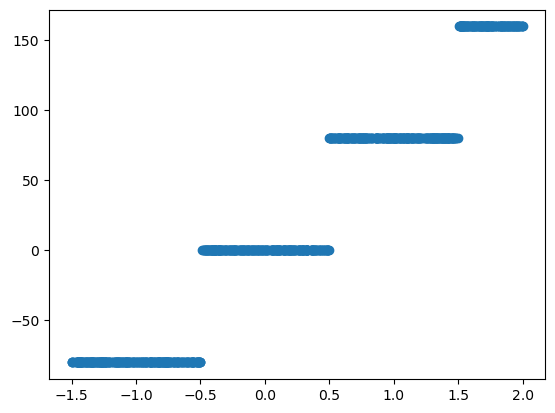

In [115]:
plt.scatter(steps_large_df['x'], steps_large_df['y'])
plt.scatter(steps_large_df['x'], y_pred1, s=5)

In [296]:
model2_2 = MLP(input_size=1, hidden_layer_sizes=[5,5], output_size=1)

In [306]:
model2_2.train(steps_large_df.x.to_numpy().reshape(-1, 1), steps_large_df.y.to_numpy().reshape(-1, 1), learning_rate=0.000001, epochs=500000)

Epoch 0: Loss = 26.659462118040143
Epoch 100: Loss = 26.658341665514193
Epoch 200: Loss = 26.657221311479365
Epoch 300: Loss = 26.656101055921138
Epoch 400: Loss = 26.654980898825006
Epoch 500: Loss = 26.65386084017477
Epoch 600: Loss = 26.652740879957978
Epoch 700: Loss = 26.6516210181572
Epoch 800: Loss = 26.650501254759977
Epoch 900: Loss = 26.649381589749723
Epoch 1000: Loss = 26.648262023112387
Epoch 1100: Loss = 26.64714255483319
Epoch 1200: Loss = 26.64602318489808
Epoch 1300: Loss = 26.644903913292627
Epoch 1400: Loss = 26.64378474000039
Epoch 1500: Loss = 26.642665665006906
Epoch 1600: Loss = 26.641546688298863
Epoch 1700: Loss = 26.64042780986041
Epoch 1800: Loss = 26.639309029677015
Epoch 1900: Loss = 26.638190347733108
Epoch 2000: Loss = 26.63707176401527
Epoch 2100: Loss = 26.635953278508154
Epoch 2200: Loss = 26.634834891198402
Epoch 2300: Loss = 26.633716602068635
Epoch 2400: Loss = 26.632598411106756
Epoch 2500: Loss = 26.631480318296212
Epoch 2600: Loss = 26.6303623236

In [308]:
model2_2.biases

[array([ 3.60266617,  3.2310535 ,  5.59830487,  1.71100552, -2.68950954]),
 array([-0.42605736,  0.15281038, -0.90381384, -2.7355437 , -0.82934771]),
 array([1.11947024])]

In [ ]:
#### Tutaj rozwiązanie z wagami dla 1 warstwy i 10 neuronów####
# Tylko trzeba dobry format zrobić
weights = [array([[ 8.3519067 , -3.43774517, -4.56134835, -3.22323689,  6.7293494 ]]),
 array([[ -5.30915403, 128.73441887,  44.51136448,  47.14581314,
          65.61996331],
        [111.51829378, -10.4406453 , -57.38709398, -61.81231708,
          -5.06917834],
        [130.66422621,  -0.75022535, -32.31133572, -36.19534409,
           1.90430267],
        [ 76.55964897, -38.29115624, -54.5026081 , -59.12963333,
         -21.18537695],
        [-40.40208778,  52.81485201,  96.28066172, 109.90789681,
          34.99162828]]),
 array([[-80.9403863 ],
        [ 80.75459835],
        [ 31.05064383],
        [ 48.83578297],
        [ -1.01992552]])]
biases = [array([ 3.60266617,  3.2310535 ,  5.59830487,  1.71100552, -2.68950954]),
 array([-0.42605736,  0.15281038, -0.90381384, -2.7355437 , -0.82934771]),
 array([1.11947024])]

# Ręczne sprawdzenie czy to w ogóle ma sens

In [172]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
weights = [[[ 3.17757035,  5.39755898, -6.78157881, -1.4942937 ,  3.6407139 ,
         -4.12520695, -4.93819555, -4.53701721, -3.08948761,  8.25573596]],
 [[ -1.9517278 ],
        [-29.72385711],
        [-81.59945682],
        [-28.40259562],
        [155.78406348],
        [192.89698794],
        [ 48.9328099 ],
        [104.45571561],
        [-19.04048899],
        [143.66042623]]]
biases = [[ 5.69724871e+00,  8.23441345e+00,  9.82832157e+00, -5.04632306e-04,
        -3.70365344e+00, -6.75121478e+00, -2.09338537e+00, -4.54799423e+00,
         1.43422980e+00, -1.53966902e+01],
        [2.30287025]]
preds=[]
for y in range(100):
    s=0
    for i in range (0,10):
        s+=weights[1][i][0] * sigmoid(square_simple_df.x[y]*weights[0][0][i]+biases[0][i])
    s+=biases[1][0]
    preds.append(s)
print(preds)
print(square_simple_df.y)

[-43.44645773041461, 3.971261638163347, -128.31300570632004, 5.4579861528752165, -27.41318346852782, 36.732189934672085, -56.50244076664839, 164.17746713451328, -109.61676757134398, -43.83795790247886, -36.67218489783817, -118.0575842768632, 5.026364876499241, -129.17219182413683, -61.25048551430793, 2.73503523805386, -66.28191372215736, 45.809238941681215, -35.28990927772428, -60.36503656960676, 152.1039333822785, -113.60519516844379, -97.45263039810725, -71.0071313754031, -117.27836071979127, -61.79039632836154, -129.21657251997635, -116.28046131927466, -22.125699014260547, -65.34221047616893, -29.935155937239635, -129.98609343484014, -130.03641382727506, -126.6547537202393, -130.10463542105904, -35.79728065141392, 43.311740955031595, -100.90091359517479, 17.39776887673611, -2.3912686085325863, 132.77018326447663, 77.98912298943254, -116.26011435335707, -97.99258226170826, -21.50455094388188, -17.98901545949014, 132.6020018547525, 16.41620641861292, -33.72439845358745, -107.779827577

In [154]:
model2.predict(np.array([square_simple_df.x[1]]))

array([[[3.97126164]]])

In [165]:
model2.forward(np.array([square_simple_df.x[1]]))

[array([-1.21907437]),
 array([8.60992050e-01, 8.39483173e-01, 9.99999986e-01, 8.60704122e-01,
        2.90983074e-04, 1.51577625e-01, 9.80671223e-01, 7.27696567e-01,
        9.94516674e-01, 8.75806357e-12]),
 array([3.97126164])]

In [166]:
sigmoid(square_simple_df.x[1]*weights[0][0][0]+biases[0][0])

0.8609920502269224